In [27]:
# Predict IMDB rating of a movie_fullFeatures-MLP_neuro-architectureSearch

# neuro-architecture search in this notebook.

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import layers

## Baseline MLP

In [3]:
df_raw2= pd.read_csv('df_raw2_train.csv')

In [4]:

df_raw2.drop(columns=['id'], inplace=True)
df_imputed=df_raw2

In [5]:
df_imputed.dtypes

director_name              float64
num_critic_for_reviews     float64
duration                   float64
director_facebook_likes    float64
actor_3_facebook_likes     float64
                            ...   
content_rating_PG-13         int64
content_rating_Passed        int64
content_rating_R             int64
content_rating_Unrated       int64
content_rating_X             int64
Length: 672, dtype: object

In [6]:
if 'imdb_score' in df_imputed:
    y = df_imputed['imdb_score'].values # get the labels we want
    del df_imputed['imdb_score'] # get rid of thelabel
    X = df_imputed.values # use everything else to predict

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1776)

In [8]:
import tensorflow as tf;print("tensorflow:",tf.__version__)
from tensorflow.keras.callbacks import TensorBoard
from time import time

tb = TensorBoard(log_dir=f"logs\\{time()}")
tf.compat.v1.disable_eager_execution() 

tensorflow: 2.1.0


In [9]:
FEATURES=671
weight_decay=1e-5

In [10]:
df_raw2_test=pd.read_csv('df_raw2_test.csv') 

df=df_raw2_test

In [11]:
useless_cols = ["id","imdb_score"]

train_cols = df.columns[~df.columns.isin(useless_cols)]
# X_train2 = df[train_cols]
# y_train2 = df["imdb_score"]

In [12]:

X_test_holdout=df[train_cols]
y_test_holdout=df["imdb_score"]

#y_pred_keras = model.predict(X_test_holdout)
#y_pred_keras

In [13]:
import sklearn.metrics as metrics
import math
#print('MLP - test rmse: ', math.sqrt(metrics.mean_squared_error(y_test_holdout, y_pred_keras)))
# baseline MLP - test rmse:  1.1672249200536071

In [14]:
def tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=1, units=300, activation_func='tanh',learning_rate=2e-5,
                           metrics=['mean_squared_error'],batch_size=500,epochs=1000
                          ,weight_decay=1e-5):   
    model= tf.keras.Sequential()
#     model.add(layers.Dense(units, activation=activation_func,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
#     model.add(layers.Dropout(0.1))
    
    for i in range(Num_layers):
        model.add(layers.Dense(units, activation=activation_func,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
        model.add(layers.Dropout(0.1))
        
    model.add(layers.Dense(1 ,activation='linear'))

    #compile the model
    model.compile(tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9), #optimizer=tf.train.GradientDescentOptimizer(learning_rate),
                  loss = tf.keras.losses.Huber(),# 'sparse_categorical_crossentropy',
                  metrics=metrics)
    # fit the model
    results = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, callbacks=[tb]) #
    
    
    ## y_pred_keras = model.predict(X_test)[:, 0]
    #print(model.summary())
    ##print(y_pred_keras.shape)
    
    if (Num_layers==1):
        figure_Name = "NN_"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    else:
        figure_Name = "DN_"+str(Num_layers)+"_layer"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    
    plt.plot(results.history['loss'], label='train')
    plt.plot(results.history['val_loss'], label='test')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig(figure_Name+"_loss.png")
    plt.show()
    
    return model
    #print('MLP - test rmse: ', math.sqrt(metrics.mean_squared_error(y_test_holdout, y_pred_keras)))

DN- 8  layers; 300 Units; LR- 0.05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 1s 424us/sample - loss: 4.9049 - mean_squared_error: 40.0925 - val_loss: 0.7640 - val_mean_squared_error: 2.1457
Epoch 2/1000
2562/2562 [==============================] - 0s 69us/sample - loss: 2.6520 - mean_squared_error: 19.4975 - val_loss: 2.3153 - val_mean_squared_error: 8.9230
Epoch 3/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 5.8812 - mean_squared_error: 62.8015 - val_loss: 5.5842 - val_mean_squared_error: 37.8500
Epoch 4/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 5.3440 - mean_squared_error: 43.9816 - val_loss: 6.1397 - val_mean_squared_error: 44.8822
Epoch 5/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 5.5653 - mean_squared_error: 42.9273 - val_loss: 8.8681 - val_mean_squared_error: 88.4088
Epoch 6/1000
2562/2562 [====================

2562/2562 [==============================] - 0s 57us/sample - loss: 6.2259 - mean_squared_error: 48.7147 - val_loss: 5.2941 - val_mean_squared_error: 34.4047
Epoch 49/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 6.1172 - mean_squared_error: 47.5416 - val_loss: 6.7481 - val_mean_squared_error: 53.2886
Epoch 50/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 6.2528 - mean_squared_error: 49.7424 - val_loss: 5.0154 - val_mean_squared_error: 31.2678
Epoch 51/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 5.9700 - mean_squared_error: 45.9631 - val_loss: 6.5468 - val_mean_squared_error: 50.4223
Epoch 52/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 6.1288 - mean_squared_error: 47.2967 - val_loss: 6.0267 - val_mean_squared_error: 43.3912
Epoch 53/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 6.0894 - mean_squared_error: 46.9010 - val_loss: 5.9030 - val_mean_squar

Epoch 96/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 6.2107 - mean_squared_error: 49.0554 - val_loss: 5.9288 - val_mean_squared_error: 42.1239
Epoch 97/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 6.1839 - mean_squared_error: 48.5932 - val_loss: 6.0671 - val_mean_squared_error: 43.9136
Epoch 98/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 6.3304 - mean_squared_error: 50.8803 - val_loss: 5.3174 - val_mean_squared_error: 34.6708
Epoch 99/1000
2562/2562 [==============================] - 0s 52us/sample - loss: 6.2734 - mean_squared_error: 50.1179 - val_loss: 6.2514 - val_mean_squared_error: 46.3590
Epoch 100/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 6.1796 - mean_squared_error: 48.4348 - val_loss: 6.2544 - val_mean_squared_error: 46.3980
Epoch 101/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 6.3897 - mean_squared_error: 51.8757 - val_loss: 5.2076 

2562/2562 [==============================] - 0s 59us/sample - loss: 6.2001 - mean_squared_error: 49.5920 - val_loss: 6.3548 - val_mean_squared_error: 47.7574
Epoch 144/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 6.3932 - mean_squared_error: 51.7314 - val_loss: 6.3237 - val_mean_squared_error: 47.3340
Epoch 145/1000
2562/2562 [==============================] - 0s 51us/sample - loss: 6.3073 - mean_squared_error: 50.7131 - val_loss: 5.6166 - val_mean_squared_error: 38.2226
Epoch 146/1000
2562/2562 [==============================] - 0s 52us/sample - loss: 6.1940 - mean_squared_error: 49.1079 - val_loss: 5.3181 - val_mean_squared_error: 34.6776
Epoch 147/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 6.0565 - mean_squared_error: 47.4481 - val_loss: 6.5466 - val_mean_squared_error: 50.4123
Epoch 148/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 6.2758 - mean_squared_error: 50.3033 - val_loss: 5.6455 - val_mean_

2562/2562 [==============================] - 0s 59us/sample - loss: 6.1253 - mean_squared_error: 48.2261 - val_loss: 4.6680 - val_mean_squared_error: 27.5687
Epoch 191/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 5.8844 - mean_squared_error: 45.6504 - val_loss: 6.3727 - val_mean_squared_error: 47.9984
Epoch 192/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 6.1395 - mean_squared_error: 48.2495 - val_loss: 5.3352 - val_mean_squared_error: 34.8728
Epoch 193/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 5.9845 - mean_squared_error: 46.4318 - val_loss: 6.3806 - val_mean_squared_error: 48.1067
Epoch 194/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 6.1309 - mean_squared_error: 48.2690 - val_loss: 5.2669 - val_mean_squared_error: 34.0845
Epoch 195/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 6.1380 - mean_squared_error: 48.2228 - val_loss: 5.6599 - val_mean_

2562/2562 [==============================] - 0s 55us/sample - loss: 6.1462 - mean_squared_error: 48.4923 - val_loss: 6.5571 - val_mean_squared_error: 50.5541
Epoch 238/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 6.3417 - mean_squared_error: 50.7942 - val_loss: 5.8529 - val_mean_squared_error: 41.1499
Epoch 239/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 6.2512 - mean_squared_error: 49.1586 - val_loss: 5.8599 - val_mean_squared_error: 41.2385
Epoch 240/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 6.3495 - mean_squared_error: 50.8829 - val_loss: 5.8351 - val_mean_squared_error: 40.9248
Epoch 241/1000
2562/2562 [==============================] - 0s 52us/sample - loss: 6.3545 - mean_squared_error: 50.9719 - val_loss: 5.8004 - val_mean_squared_error: 40.4885
Epoch 242/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 6.2497 - mean_squared_error: 49.3471 - val_loss: 5.8913 - val_mean_

2562/2562 [==============================] - 0s 56us/sample - loss: 5.9982 - mean_squared_error: 46.7026 - val_loss: 4.9962 - val_mean_squared_error: 31.0462
Epoch 285/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 5.7451 - mean_squared_error: 43.3837 - val_loss: 6.5451 - val_mean_squared_error: 50.3817
Epoch 286/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 6.0693 - mean_squared_error: 47.7410 - val_loss: 5.0050 - val_mean_squared_error: 31.1429
Epoch 287/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 5.9717 - mean_squared_error: 46.1064 - val_loss: 5.9009 - val_mean_squared_error: 41.7588
Epoch 288/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 5.9913 - mean_squared_error: 45.9627 - val_loss: 4.7478 - val_mean_squared_error: 28.3912
Epoch 289/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 5.9441 - mean_squared_error: 46.2819 - val_loss: 6.1794 - val_mean_

2562/2562 [==============================] - 0s 54us/sample - loss: 5.2032 - mean_squared_error: 36.6412 - val_loss: 5.5405 - val_mean_squared_error: 37.2916
Epoch 332/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 5.2598 - mean_squared_error: 36.6836 - val_loss: 5.7277 - val_mean_squared_error: 39.5781
Epoch 333/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 5.3187 - mean_squared_error: 37.6194 - val_loss: 5.2730 - val_mean_squared_error: 34.1477
Epoch 334/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 5.4904 - mean_squared_error: 39.5088 - val_loss: 4.3629 - val_mean_squared_error: 24.5202
Epoch 335/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 5.3446 - mean_squared_error: 38.1076 - val_loss: 4.9484 - val_mean_squared_error: 30.5226
Epoch 336/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 5.3453 - mean_squared_error: 37.7933 - val_loss: 5.0154 - val_mean_

2562/2562 [==============================] - 0s 59us/sample - loss: 4.1535 - mean_squared_error: 24.8908 - val_loss: 3.8629 - val_mean_squared_error: 19.9339
Epoch 379/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 4.2831 - mean_squared_error: 25.9112 - val_loss: 3.7083 - val_mean_squared_error: 18.5867
Epoch 380/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 4.2513 - mean_squared_error: 25.7319 - val_loss: 3.4010 - val_mean_squared_error: 16.1436
Epoch 381/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 4.1556 - mean_squared_error: 24.6964 - val_loss: 3.9179 - val_mean_squared_error: 20.3938
Epoch 382/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 4.1070 - mean_squared_error: 23.9754 - val_loss: 3.6888 - val_mean_squared_error: 18.4544
Epoch 383/1000
2562/2562 [==============================] - 0s 48us/sample - loss: 4.0221 - mean_squared_error: 23.4454 - val_loss: 3.9973 - val_mean_

2562/2562 [==============================] - 0s 60us/sample - loss: 3.3048 - mean_squared_error: 16.7074 - val_loss: 3.6732 - val_mean_squared_error: 18.2916
Epoch 426/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 3.3499 - mean_squared_error: 16.8495 - val_loss: 3.2479 - val_mean_squared_error: 14.9801
Epoch 427/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 3.3474 - mean_squared_error: 16.7217 - val_loss: 3.6552 - val_mean_squared_error: 18.1419
Epoch 428/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 3.1901 - mean_squared_error: 15.7475 - val_loss: 3.3591 - val_mean_squared_error: 15.8197
Epoch 429/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 3.0342 - mean_squared_error: 14.4344 - val_loss: 3.9199 - val_mean_squared_error: 20.4103
Epoch 430/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 3.1468 - mean_squared_error: 15.7245 - val_loss: 3.5825 - val_mean_

2562/2562 [==============================] - 0s 58us/sample - loss: 2.3905 - mean_squared_error: 9.6008 - val_loss: 1.7386 - val_mean_squared_error: 5.9694
Epoch 473/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 2.3956 - mean_squared_error: 9.7466 - val_loss: 2.4934 - val_mean_squared_error: 9.7764
Epoch 474/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 2.4850 - mean_squared_error: 10.1857 - val_loss: 1.9304 - val_mean_squared_error: 6.8820
Epoch 475/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 2.5884 - mean_squared_error: 10.9374 - val_loss: 2.3580 - val_mean_squared_error: 8.9692
Epoch 476/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 2.5959 - mean_squared_error: 10.8709 - val_loss: 1.8679 - val_mean_squared_error: 6.5785
Epoch 477/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 2.4626 - mean_squared_error: 10.1030 - val_loss: 2.3304 - val_mean_squared

Epoch 520/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 1.7025 - mean_squared_error: 5.8002 - val_loss: 1.6131 - val_mean_squared_error: 5.4044
Epoch 521/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 1.7261 - mean_squared_error: 5.8866 - val_loss: 1.6470 - val_mean_squared_error: 5.2899
Epoch 522/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 1.7869 - mean_squared_error: 6.1149 - val_loss: 1.2898 - val_mean_squared_error: 4.0573
Epoch 523/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 1.7454 - mean_squared_error: 6.0095 - val_loss: 1.9126 - val_mean_squared_error: 6.5588
Epoch 524/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 1.6636 - mean_squared_error: 5.6106 - val_loss: 1.8269 - val_mean_squared_error: 6.3818
Epoch 525/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 1.7316 - mean_squared_error: 5.9499 - val_loss: 1.8599 - val_m

Epoch 568/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 1.0123 - mean_squared_error: 2.8948 - val_loss: 0.9187 - val_mean_squared_error: 2.6715
Epoch 569/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 1.3058 - mean_squared_error: 4.0447 - val_loss: 1.4550 - val_mean_squared_error: 4.4476
Epoch 570/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 1.1539 - mean_squared_error: 3.3802 - val_loss: 0.7380 - val_mean_squared_error: 2.0459
Epoch 571/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 1.1051 - mean_squared_error: 3.3218 - val_loss: 0.9802 - val_mean_squared_error: 2.6234
Epoch 572/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 1.2550 - mean_squared_error: 3.8097 - val_loss: 1.2387 - val_mean_squared_error: 3.8577
Epoch 573/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 1.1460 - mean_squared_error: 3.4121 - val_loss: 1.1243 - val_m

Epoch 616/1000
2562/2562 [==============================] - 0s 72us/sample - loss: 0.6631 - mean_squared_error: 1.6783 - val_loss: 0.6687 - val_mean_squared_error: 1.8121
Epoch 617/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.5526 - mean_squared_error: 1.3632 - val_loss: 0.7342 - val_mean_squared_error: 2.0313
Epoch 618/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 0.6200 - mean_squared_error: 1.5728 - val_loss: 0.4970 - val_mean_squared_error: 1.2292
Epoch 619/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 0.5586 - mean_squared_error: 1.3853 - val_loss: 0.5908 - val_mean_squared_error: 1.3918
Epoch 620/1000
2562/2562 [==============================] - 0s 71us/sample - loss: 0.5965 - mean_squared_error: 1.4891 - val_loss: 0.5933 - val_mean_squared_error: 1.3957
Epoch 621/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 0.5755 - mean_squared_error: 1.3871 - val_loss: 0.6788 - val_m

Epoch 664/1000
2562/2562 [==============================] - 0s 72us/sample - loss: 0.5368 - mean_squared_error: 1.2975 - val_loss: 0.5779 - val_mean_squared_error: 1.5087
Epoch 665/1000
2562/2562 [==============================] - 0s 77us/sample - loss: 0.5307 - mean_squared_error: 1.3024 - val_loss: 0.4775 - val_mean_squared_error: 1.1647
Epoch 666/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 0.4860 - mean_squared_error: 1.1564 - val_loss: 0.4635 - val_mean_squared_error: 1.0987
Epoch 667/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 0.4922 - mean_squared_error: 1.1829 - val_loss: 0.4737 - val_mean_squared_error: 1.1033
Epoch 668/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 0.4748 - mean_squared_error: 1.1235 - val_loss: 0.8272 - val_mean_squared_error: 2.0888
Epoch 669/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 0.6127 - mean_squared_error: 1.5185 - val_loss: 0.5177 - val_m

2562/2562 [==============================] - 0s 80us/sample - loss: 0.5652 - mean_squared_error: 1.3986 - val_loss: 0.6095 - val_mean_squared_error: 1.4398
Epoch 712/1000
2562/2562 [==============================] - 0s 76us/sample - loss: 0.5328 - mean_squared_error: 1.2743 - val_loss: 0.4661 - val_mean_squared_error: 1.0893
Epoch 713/1000
2562/2562 [==============================] - 0s 81us/sample - loss: 0.5010 - mean_squared_error: 1.1833 - val_loss: 0.4654 - val_mean_squared_error: 1.0920
Epoch 714/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 0.5066 - mean_squared_error: 1.1971 - val_loss: 0.5748 - val_mean_squared_error: 1.5109
Epoch 715/1000
2562/2562 [==============================] - 0s 83us/sample - loss: 0.5455 - mean_squared_error: 1.3384 - val_loss: 0.5047 - val_mean_squared_error: 1.2736
Epoch 716/1000
2562/2562 [==============================] - 0s 84us/sample - loss: 0.5108 - mean_squared_error: 1.2353 - val_loss: 0.6459 - val_mean_squared_err

Epoch 759/1000
2562/2562 [==============================] - 0s 88us/sample - loss: 0.5389 - mean_squared_error: 1.2889 - val_loss: 0.4638 - val_mean_squared_error: 1.0800
Epoch 760/1000
2562/2562 [==============================] - 0s 87us/sample - loss: 0.4985 - mean_squared_error: 1.1876 - val_loss: 0.4640 - val_mean_squared_error: 1.0794
Epoch 761/1000
2562/2562 [==============================] - 0s 84us/sample - loss: 0.4865 - mean_squared_error: 1.1543 - val_loss: 0.4722 - val_mean_squared_error: 1.1640
Epoch 762/1000
2562/2562 [==============================] - 0s 88us/sample - loss: 0.5037 - mean_squared_error: 1.2064 - val_loss: 0.4583 - val_mean_squared_error: 1.1029
Epoch 763/1000
2562/2562 [==============================] - 0s 89us/sample - loss: 0.4651 - mean_squared_error: 1.1058 - val_loss: 0.5228 - val_mean_squared_error: 1.2088
Epoch 764/1000
2562/2562 [==============================] - 0s 88us/sample - loss: 0.5106 - mean_squared_error: 1.2306 - val_loss: 0.4580 - val_m

Epoch 807/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.5492 - mean_squared_error: 1.3546 - val_loss: 0.5848 - val_mean_squared_error: 1.3733
Epoch 808/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 0.5235 - mean_squared_error: 1.2450 - val_loss: 0.4560 - val_mean_squared_error: 1.0834
Epoch 809/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 0.5243 - mean_squared_error: 1.2559 - val_loss: 0.5942 - val_mean_squared_error: 1.5730
Epoch 810/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 0.5243 - mean_squared_error: 1.2791 - val_loss: 0.5513 - val_mean_squared_error: 1.4314
Epoch 811/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5001 - mean_squared_error: 1.2120 - val_loss: 0.7133 - val_mean_squared_error: 1.9576
Epoch 812/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.5694 - mean_squared_error: 1.4282 - val_loss: 0.4575 - va

Epoch 855/1000
2562/2562 [==============================] - 0s 86us/sample - loss: 0.6388 - mean_squared_error: 1.6057 - val_loss: 0.5189 - val_mean_squared_error: 1.3200
Epoch 856/1000
2562/2562 [==============================] - 0s 88us/sample - loss: 0.5331 - mean_squared_error: 1.2946 - val_loss: 0.4739 - val_mean_squared_error: 1.1619
Epoch 857/1000
2562/2562 [==============================] - 0s 92us/sample - loss: 0.4800 - mean_squared_error: 1.1564 - val_loss: 0.4868 - val_mean_squared_error: 1.1256
Epoch 858/1000
2562/2562 [==============================] - 0s 93us/sample - loss: 0.4582 - mean_squared_error: 1.0801 - val_loss: 0.4904 - val_mean_squared_error: 1.2237
Epoch 859/1000
2562/2562 [==============================] - 0s 85us/sample - loss: 0.4693 - mean_squared_error: 1.1183 - val_loss: 0.5128 - val_mean_squared_error: 1.1925
Epoch 860/1000
2562/2562 [==============================] - 0s 87us/sample - loss: 0.5199 - mean_squared_error: 1.2532 - val_loss: 0.5220 - val_m

Epoch 903/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 0.4900 - mean_squared_error: 1.1894 - val_loss: 0.5034 - val_mean_squared_error: 1.1626
Epoch 904/1000
2562/2562 [==============================] - 0s 83us/sample - loss: 0.5010 - mean_squared_error: 1.1967 - val_loss: 0.4580 - val_mean_squared_error: 1.0739
Epoch 905/1000
2562/2562 [==============================] - 0s 81us/sample - loss: 0.4592 - mean_squared_error: 1.0860 - val_loss: 0.6113 - val_mean_squared_error: 1.6255
Epoch 906/1000
2562/2562 [==============================] - 0s 85us/sample - loss: 0.5436 - mean_squared_error: 1.3290 - val_loss: 0.4668 - val_mean_squared_error: 1.1356
Epoch 907/1000
2562/2562 [==============================] - 0s 79us/sample - loss: 0.4653 - mean_squared_error: 1.1043 - val_loss: 0.4524 - val_mean_squared_error: 1.0759
Epoch 908/1000
2562/2562 [==============================] - 0s 75us/sample - loss: 0.4578 - mean_squared_error: 1.0807 - val_loss: 0.4550 - val_m

Epoch 951/1000
2562/2562 [==============================] - 0s 75us/sample - loss: 0.6057 - mean_squared_error: 1.5048 - val_loss: 0.4636 - val_mean_squared_error: 1.0770
Epoch 952/1000
2562/2562 [==============================] - 0s 77us/sample - loss: 0.4952 - mean_squared_error: 1.1649 - val_loss: 0.4578 - val_mean_squared_error: 1.0726
Epoch 953/1000
2562/2562 [==============================] - 0s 78us/sample - loss: 0.4708 - mean_squared_error: 1.1163 - val_loss: 0.5401 - val_mean_squared_error: 1.3940
Epoch 954/1000
2562/2562 [==============================] - 0s 72us/sample - loss: 0.5097 - mean_squared_error: 1.2289 - val_loss: 0.4544 - val_mean_squared_error: 1.0887
Epoch 955/1000
2562/2562 [==============================] - 0s 75us/sample - loss: 0.4645 - mean_squared_error: 1.0971 - val_loss: 0.4546 - val_mean_squared_error: 1.0733
Epoch 956/1000
2562/2562 [==============================] - 0s 81us/sample - loss: 0.4806 - mean_squared_error: 1.1446 - val_loss: 0.4845 - val_m

Epoch 999/1000
2562/2562 [==============================] - 0s 73us/sample - loss: 0.4819 - mean_squared_error: 1.1431 - val_loss: 0.5688 - val_mean_squared_error: 1.3296
Epoch 1000/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 0.4878 - mean_squared_error: 1.1482 - val_loss: 0.5731 - val_mean_squared_error: 1.3426


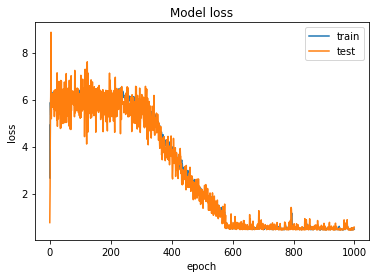

1.5552026660734006
1.247077650378436
DN- 8  layers; 300 Units; LR- 0.05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 1s 479us/sample - loss: 4.0557 - mean_squared_error: 28.5170 - val_loss: 2.7608 - val_mean_squared_error: 11.7989
Epoch 2/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 1.5845 - mean_squared_error: 6.9202 - val_loss: 0.5570 - val_mean_squared_error: 1.3834
Epoch 3/1000
2562/2562 [==============================] - 0s 69us/sample - loss: 3.8594 - mean_squared_error: 28.3216 - val_loss: 2.8580 - val_mean_squared_error: 12.3229
Epoch 4/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 4.5955 - mean_squared_error: 31.3032 - val_loss: 4.8169 - val_mean_squared_error: 29.4163
Epoch 5/1000
2562/2562 [==============================] - 0s 68us/sample - loss: 4.9223 - mean_squared_error: 33.4757 - val_loss: 7.6420 - val_mean_squared_error: 67.4346
Epoch 6/100

Epoch 48/1000
2562/2562 [==============================] - 0s 81us/sample - loss: 6.0799 - mean_squared_error: 47.0748 - val_loss: 5.8322 - val_mean_squared_error: 41.2464
Epoch 49/1000
2562/2562 [==============================] - 0s 69us/sample - loss: 6.0965 - mean_squared_error: 47.3777 - val_loss: 5.8722 - val_mean_squared_error: 41.7553
Epoch 50/1000
2562/2562 [==============================] - 0s 71us/sample - loss: 5.9015 - mean_squared_error: 45.1735 - val_loss: 6.6605 - val_mean_squared_error: 52.4231
Epoch 51/1000
2562/2562 [==============================] - 0s 69us/sample - loss: 6.2570 - mean_squared_error: 49.7582 - val_loss: 5.3367 - val_mean_squared_error: 35.2180
Epoch 52/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 6.1623 - mean_squared_error: 48.3782 - val_loss: 6.0653 - val_mean_squared_error: 44.2535
Epoch 53/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 6.2891 - mean_squared_error: 49.9219 - val_loss: 5.8420 - 

2562/2562 [==============================] - 0s 75us/sample - loss: 6.1203 - mean_squared_error: 48.1288 - val_loss: 5.3718 - val_mean_squared_error: 35.6289
Epoch 96/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 5.9218 - mean_squared_error: 45.6987 - val_loss: 6.2800 - val_mean_squared_error: 47.1194
Epoch 97/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 6.0826 - mean_squared_error: 47.6708 - val_loss: 5.8348 - val_mean_squared_error: 41.2805
Epoch 98/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 6.3080 - mean_squared_error: 50.9419 - val_loss: 5.5391 - val_mean_squared_error: 37.6210
Epoch 99/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 6.3639 - mean_squared_error: 51.4583 - val_loss: 4.9407 - val_mean_squared_error: 30.7512
Epoch 100/1000
2562/2562 [==============================] - ETA: 0s - loss: 5.9077 - mean_squared_error: 46.625 - 0s 67us/sample - loss: 5.9431 - mean_squ

2562/2562 [==============================] - 0s 64us/sample - loss: 6.3648 - mean_squared_error: 51.6199 - val_loss: 5.8336 - val_mean_squared_error: 41.2653
Epoch 143/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 6.3163 - mean_squared_error: 50.9630 - val_loss: 5.6697 - val_mean_squared_error: 39.2152
Epoch 144/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 6.1083 - mean_squared_error: 48.1523 - val_loss: 6.0730 - val_mean_squared_error: 44.3548
Epoch 145/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 6.2782 - mean_squared_error: 50.6454 - val_loss: 5.6018 - val_mean_squared_error: 38.3822
Epoch 146/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 6.3195 - mean_squared_error: 51.2303 - val_loss: 5.6478 - val_mean_squared_error: 38.9456
Epoch 147/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 6.1729 - mean_squared_error: 49.1995 - val_loss: 5.8415 - val_mean_

2562/2562 [==============================] - 0s 68us/sample - loss: 5.8586 - mean_squared_error: 45.0062 - val_loss: 5.3279 - val_mean_squared_error: 35.1153
Epoch 190/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 5.8366 - mean_squared_error: 44.7707 - val_loss: 5.3820 - val_mean_squared_error: 35.7488
Epoch 191/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 5.7138 - mean_squared_error: 43.2510 - val_loss: 5.7351 - val_mean_squared_error: 40.0269
Epoch 192/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 5.7460 - mean_squared_error: 43.5922 - val_loss: 5.8802 - val_mean_squared_error: 41.8578
Epoch 193/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 5.8238 - mean_squared_error: 44.6519 - val_loss: 5.1838 - val_mean_squared_error: 33.4555
Epoch 194/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 5.8072 - mean_squared_error: 44.3853 - val_loss: 5.6965 - val_mean_

2562/2562 [==============================] - ETA: 0s - loss: 5.3692 - mean_squared_error: 38.759 - 0s 59us/sample - loss: 5.3368 - mean_squared_error: 38.1835 - val_loss: 5.4688 - val_mean_squared_error: 36.7765
Epoch 237/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 5.5528 - mean_squared_error: 40.9685 - val_loss: 4.2805 - val_mean_squared_error: 24.0036
Epoch 238/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 5.3055 - mean_squared_error: 38.3501 - val_loss: 5.4664 - val_mean_squared_error: 36.7479
Epoch 239/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 5.1672 - mean_squared_error: 36.2505 - val_loss: 5.3627 - val_mean_squared_error: 35.5215
Epoch 240/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 5.2820 - mean_squared_error: 37.4232 - val_loss: 5.3983 - val_mean_squared_error: 35.9406
Epoch 241/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 5.3385 - mean

2562/2562 [==============================] - 0s 56us/sample - loss: 4.8125 - mean_squared_error: 32.0380 - val_loss: 4.1668 - val_mean_squared_error: 22.9288
Epoch 284/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 4.8763 - mean_squared_error: 32.7201 - val_loss: 4.3101 - val_mean_squared_error: 24.2805
Epoch 285/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 4.8351 - mean_squared_error: 32.1683 - val_loss: 4.6979 - val_mean_squared_error: 28.1686
Epoch 286/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 4.8410 - mean_squared_error: 31.9561 - val_loss: 5.0325 - val_mean_squared_error: 31.7591
Epoch 287/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 4.9796 - mean_squared_error: 33.6273 - val_loss: 4.4453 - val_mean_squared_error: 25.6067
Epoch 288/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 4.8706 - mean_squared_error: 32.3841 - val_loss: 5.1367 - val_mean_

2562/2562 [==============================] - 0s 58us/sample - loss: 4.5822 - mean_squared_error: 29.1730 - val_loss: 5.0647 - val_mean_squared_error: 32.1162
Epoch 331/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 4.7069 - mean_squared_error: 30.4541 - val_loss: 4.6680 - val_mean_squared_error: 27.8580
Epoch 332/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 4.6739 - mean_squared_error: 30.3904 - val_loss: 4.0876 - val_mean_squared_error: 22.1838
Epoch 333/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 4.5990 - mean_squared_error: 29.3456 - val_loss: 3.9125 - val_mean_squared_error: 20.6209
Epoch 334/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 4.5522 - mean_squared_error: 29.0990 - val_loss: 4.8023 - val_mean_squared_error: 29.2639
Epoch 335/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 4.6206 - mean_squared_error: 29.3740 - val_loss: 4.4228 - val_mean_

2562/2562 [==============================] - 0s 62us/sample - loss: 4.5754 - mean_squared_error: 29.0774 - val_loss: 3.4517 - val_mean_squared_error: 16.7661
Epoch 378/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 4.4419 - mean_squared_error: 27.7473 - val_loss: 3.8983 - val_mean_squared_error: 20.4759
Epoch 379/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 4.4670 - mean_squared_error: 27.7961 - val_loss: 4.3314 - val_mean_squared_error: 24.4926
Epoch 380/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 4.4833 - mean_squared_error: 27.7919 - val_loss: 4.8954 - val_mean_squared_error: 30.2602
Epoch 381/1000
2562/2562 [==============================] - 0s 51us/sample - loss: 4.6964 - mean_squared_error: 30.4314 - val_loss: 3.9752 - val_mean_squared_error: 21.1778
Epoch 382/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 4.6270 - mean_squared_error: 29.4734 - val_loss: 3.2746 - val_mean_

2562/2562 [==============================] - 0s 58us/sample - loss: 4.2790 - mean_squared_error: 25.8121 - val_loss: 3.2301 - val_mean_squared_error: 14.9998
Epoch 425/1000
2562/2562 [==============================] - 0s 52us/sample - loss: 4.1146 - mean_squared_error: 24.6793 - val_loss: 4.3866 - val_mean_squared_error: 25.0290
Epoch 426/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 4.1865 - mean_squared_error: 24.7427 - val_loss: 4.5429 - val_mean_squared_error: 26.5786
Epoch 427/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 4.2955 - mean_squared_error: 25.8884 - val_loss: 3.8453 - val_mean_squared_error: 20.0321
Epoch 428/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 4.1849 - mean_squared_error: 24.9136 - val_loss: 3.4369 - val_mean_squared_error: 16.6025
Epoch 429/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 4.2414 - mean_squared_error: 25.4343 - val_loss: 2.9480 - val_mean_

2562/2562 [==============================] - 0s 58us/sample - loss: 4.1342 - mean_squared_error: 24.1869 - val_loss: 3.6932 - val_mean_squared_error: 18.7334
Epoch 472/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 4.0624 - mean_squared_error: 23.2965 - val_loss: 3.6716 - val_mean_squared_error: 18.5216
Epoch 473/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 4.1324 - mean_squared_error: 23.8513 - val_loss: 3.5086 - val_mean_squared_error: 17.2190
Epoch 474/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 4.0314 - mean_squared_error: 23.2437 - val_loss: 4.3581 - val_mean_squared_error: 24.7456
Epoch 475/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 4.1262 - mean_squared_error: 23.8587 - val_loss: 3.8087 - val_mean_squared_error: 19.7156
Epoch 476/1000
2562/2562 [==============================] - 0s 51us/sample - loss: 3.9857 - mean_squared_error: 22.5400 - val_loss: 4.2289 - val_mean_

2562/2562 [==============================] - 0s 53us/sample - loss: 3.8211 - mean_squared_error: 21.3274 - val_loss: 4.3656 - val_mean_squared_error: 24.8190
Epoch 519/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 3.9987 - mean_squared_error: 22.6209 - val_loss: 3.8384 - val_mean_squared_error: 19.9724
Epoch 520/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 3.8457 - mean_squared_error: 21.2554 - val_loss: 4.0618 - val_mean_squared_error: 21.9473
Epoch 521/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 3.9946 - mean_squared_error: 22.7371 - val_loss: 3.2207 - val_mean_squared_error: 14.9939
Epoch 522/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 3.9053 - mean_squared_error: 21.7558 - val_loss: 3.6205 - val_mean_squared_error: 18.0945
Epoch 523/1000
2562/2562 [==============================] - 0s 49us/sample - loss: 3.8206 - mean_squared_error: 21.0233 - val_loss: 3.6671 - val_mean_

2562/2562 [==============================] - 0s 62us/sample - loss: 3.7930 - mean_squared_error: 20.8504 - val_loss: 3.1542 - val_mean_squared_error: 14.5035
Epoch 566/1000
2562/2562 [==============================] - 0s 68us/sample - loss: 3.7898 - mean_squared_error: 20.6859 - val_loss: 3.4075 - val_mean_squared_error: 16.3698
Epoch 567/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 3.8103 - mean_squared_error: 20.7171 - val_loss: 2.9946 - val_mean_squared_error: 13.3625
Epoch 568/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 3.7615 - mean_squared_error: 20.6403 - val_loss: 3.6098 - val_mean_squared_error: 18.0058
Epoch 569/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 3.8276 - mean_squared_error: 20.9200 - val_loss: 3.3246 - val_mean_squared_error: 15.7782
Epoch 570/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 3.6762 - mean_squared_error: 19.7854 - val_loss: 3.9399 - val_mean_

2562/2562 [==============================] - 0s 58us/sample - loss: 4.1616 - mean_squared_error: 23.5774 - val_loss: 4.3523 - val_mean_squared_error: 24.6894
Epoch 613/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 4.2145 - mean_squared_error: 24.0945 - val_loss: 3.2775 - val_mean_squared_error: 15.4197
Epoch 614/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 3.9313 - mean_squared_error: 21.8208 - val_loss: 4.5490 - val_mean_squared_error: 26.6401
Epoch 615/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 4.1998 - mean_squared_error: 24.0230 - val_loss: 3.3575 - val_mean_squared_error: 16.0305
Epoch 616/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 3.9044 - mean_squared_error: 21.4724 - val_loss: 4.5453 - val_mean_squared_error: 26.6029
Epoch 617/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 4.2260 - mean_squared_error: 24.6039 - val_loss: 3.1364 - val_mean_

2562/2562 [==============================] - 0s 71us/sample - loss: 3.9347 - mean_squared_error: 22.3107 - val_loss: 3.2701 - val_mean_squared_error: 15.3642
Epoch 660/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 3.9319 - mean_squared_error: 21.8582 - val_loss: 3.2185 - val_mean_squared_error: 14.9121
Epoch 661/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 3.9018 - mean_squared_error: 21.5835 - val_loss: 3.0501 - val_mean_squared_error: 13.7533
Epoch 662/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 3.7029 - mean_squared_error: 20.6660 - val_loss: 4.2621 - val_mean_squared_error: 23.8200
Epoch 663/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 3.9385 - mean_squared_error: 21.8446 - val_loss: 3.7974 - val_mean_squared_error: 19.6184
Epoch 664/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 3.7446 - mean_squared_error: 20.2784 - val_loss: 4.6771 - val_mean_

2562/2562 [==============================] - 0s 71us/sample - loss: 3.7147 - mean_squared_error: 20.2038 - val_loss: 3.7818 - val_mean_squared_error: 19.4589
Epoch 707/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 3.7681 - mean_squared_error: 20.6573 - val_loss: 3.0451 - val_mean_squared_error: 13.7180
Epoch 708/1000
2562/2562 [==============================] - 0s 79us/sample - loss: 3.7126 - mean_squared_error: 19.9635 - val_loss: 3.7490 - val_mean_squared_error: 19.1779
Epoch 709/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 3.8299 - mean_squared_error: 21.1131 - val_loss: 2.8982 - val_mean_squared_error: 12.6980
Epoch 710/1000
2562/2562 [==============================] - 0s 71us/sample - loss: 3.6655 - mean_squared_error: 19.6879 - val_loss: 3.5303 - val_mean_squared_error: 17.3537
Epoch 711/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 3.7037 - mean_squared_error: 19.9026 - val_loss: 3.4973 - val_mean_

2562/2562 [==============================] - 0s 80us/sample - loss: 3.7853 - mean_squared_error: 20.7654 - val_loss: 2.8666 - val_mean_squared_error: 12.4844
Epoch 754/1000
2562/2562 [==============================] - 0s 74us/sample - loss: 3.7062 - mean_squared_error: 20.0278 - val_loss: 3.3655 - val_mean_squared_error: 16.0400
Epoch 755/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 3.6611 - mean_squared_error: 19.4688 - val_loss: 3.2977 - val_mean_squared_error: 15.5727
Epoch 756/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 3.5639 - mean_squared_error: 18.8378 - val_loss: 3.9086 - val_mean_squared_error: 20.5671
Epoch 757/1000
2562/2562 [==============================] - 0s 75us/sample - loss: 3.6337 - mean_squared_error: 19.2875 - val_loss: 3.7127 - val_mean_squared_error: 18.8971
Epoch 758/1000
2562/2562 [==============================] - 0s 68us/sample - loss: 3.5526 - mean_squared_error: 18.5674 - val_loss: 4.1657 - val_mean_

2562/2562 [==============================] - 0s 82us/sample - loss: 3.4004 - mean_squared_error: 17.1948 - val_loss: 3.5864 - val_mean_squared_error: 17.8128
Epoch 801/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 3.5660 - mean_squared_error: 18.7001 - val_loss: 2.7532 - val_mean_squared_error: 11.7333
Epoch 802/1000
2562/2562 [==============================] - 0s 74us/sample - loss: 3.4721 - mean_squared_error: 17.9007 - val_loss: 3.3404 - val_mean_squared_error: 15.8447
Epoch 803/1000
2562/2562 [==============================] - 0s 75us/sample - loss: 3.5775 - mean_squared_error: 18.6698 - val_loss: 2.6013 - val_mean_squared_error: 10.7677
Epoch 804/1000
2562/2562 [==============================] - 0s 82us/sample - loss: 3.4393 - mean_squared_error: 17.9427 - val_loss: 3.4534 - val_mean_squared_error: 16.7344
Epoch 805/1000
2562/2562 [==============================] - 0s 77us/sample - loss: 3.4808 - mean_squared_error: 17.8019 - val_loss: 3.1368 - val_mean_

2562/2562 [==============================] - 0s 84us/sample - loss: 3.5146 - mean_squared_error: 18.0745 - val_loss: 2.7281 - val_mean_squared_error: 11.5708
Epoch 848/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 3.4427 - mean_squared_error: 17.7803 - val_loss: 3.1607 - val_mean_squared_error: 14.4800
Epoch 849/1000
2562/2562 [==============================] - 0s 78us/sample - loss: 3.4902 - mean_squared_error: 18.0576 - val_loss: 3.3990 - val_mean_squared_error: 16.3528
Epoch 850/1000
2562/2562 [==============================] - 0s 82us/sample - loss: 3.4011 - mean_squared_error: 17.2581 - val_loss: 3.9856 - val_mean_squared_error: 21.2552
Epoch 851/1000
2562/2562 [==============================] - 0s 82us/sample - loss: 3.2924 - mean_squared_error: 16.4915 - val_loss: 3.2545 - val_mean_squared_error: 15.2469
Epoch 852/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 3.3558 - mean_squared_error: 16.9117 - val_loss: 3.6012 - val_mean_

2562/2562 [==============================] - 0s 88us/sample - loss: 3.4105 - mean_squared_error: 17.2098 - val_loss: 3.4782 - val_mean_squared_error: 16.9327
Epoch 895/1000
2562/2562 [==============================] - 0s 91us/sample - loss: 3.4439 - mean_squared_error: 17.6419 - val_loss: 2.9088 - val_mean_squared_error: 12.7706
Epoch 896/1000
2562/2562 [==============================] - 0s 87us/sample - loss: 3.2910 - mean_squared_error: 16.2399 - val_loss: 3.0650 - val_mean_squared_error: 13.7780
Epoch 897/1000
2562/2562 [==============================] - 0s 85us/sample - loss: 3.4636 - mean_squared_error: 17.6804 - val_loss: 2.8717 - val_mean_squared_error: 12.5185
Epoch 898/1000
2562/2562 [==============================] - 0s 90us/sample - loss: 3.2580 - mean_squared_error: 16.1597 - val_loss: 3.3805 - val_mean_squared_error: 16.1572
Epoch 899/1000
2562/2562 [==============================] - 0s 88us/sample - loss: 3.4447 - mean_squared_error: 17.5236 - val_loss: 2.9953 - val_mean_

2562/2562 [==============================] - 0s 102us/sample - loss: 3.5293 - mean_squared_error: 18.1427 - val_loss: 2.4326 - val_mean_squared_error: 9.7476
Epoch 942/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 3.2648 - mean_squared_error: 16.4465 - val_loss: 3.3948 - val_mean_squared_error: 16.2701
Epoch 943/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 3.3636 - mean_squared_error: 16.6439 - val_loss: 2.6311 - val_mean_squared_error: 10.9538
Epoch 944/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 3.2911 - mean_squared_error: 16.4697 - val_loss: 3.6986 - val_mean_squared_error: 18.7490
Epoch 945/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 3.3483 - mean_squared_error: 16.6132 - val_loss: 2.8774 - val_mean_squared_error: 12.5573
Epoch 946/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 3.2231 - mean_squared_error: 15.7540 - val_loss: 3.5249 - val_

2562/2562 [==============================] - 0s 90us/sample - loss: 3.2381 - mean_squared_error: 15.8637 - val_loss: 3.3101 - val_mean_squared_error: 15.6104
Epoch 989/1000
2562/2562 [==============================] - 0s 83us/sample - loss: 3.3274 - mean_squared_error: 16.5050 - val_loss: 2.8446 - val_mean_squared_error: 12.3365
Epoch 990/1000
2562/2562 [==============================] - 0s 83us/sample - loss: 3.2096 - mean_squared_error: 15.6241 - val_loss: 3.2959 - val_mean_squared_error: 15.5004
Epoch 991/1000
2562/2562 [==============================] - 0s 84us/sample - loss: 3.4364 - mean_squared_error: 17.8379 - val_loss: 2.0071 - val_mean_squared_error: 7.4120
Epoch 992/1000
2562/2562 [==============================] - 0s 92us/sample - loss: 3.3960 - mean_squared_error: 17.5932 - val_loss: 2.7196 - val_mean_squared_error: 11.3926
Epoch 993/1000
2562/2562 [==============================] - 0s 87us/sample - loss: 3.4541 - mean_squared_error: 18.4982 - val_loss: 1.5581 - val_mean_s

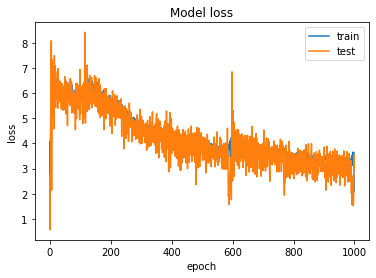

13.532031171948887
3.678590922071777
DN- 8  layers; 300 Units; LR- 2e-05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 1s 560us/sample - loss: 5.8031 - mean_squared_error: 40.6354 - val_loss: 5.7757 - val_mean_squared_error: 40.2294
Epoch 2/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 5.7468 - mean_squared_error: 39.9342 - val_loss: 5.6455 - val_mean_squared_error: 38.6187
Epoch 3/1000
2562/2562 [==============================] - 0s 79us/sample - loss: 5.6230 - mean_squared_error: 38.4011 - val_loss: 5.4797 - val_mean_squared_error: 36.6160
Epoch 4/1000
2562/2562 [==============================] - 0s 87us/sample - loss: 5.4803 - mean_squared_error: 36.6830 - val_loss: 5.2961 - val_mean_squared_error: 34.4630
Epoch 5/1000
2562/2562 [==============================] - 0s 90us/sample - loss: 5.3351 - mean_squared_error: 34.9393 - val_loss: 5.1024 - val_mean_squared_error: 32.2654
Epoc

2562/2562 [==============================] - 0s 88us/sample - loss: 0.5587 - mean_squared_error: 1.3723 - val_loss: 0.7593 - val_mean_squared_error: 2.1244
Epoch 49/1000
2562/2562 [==============================] - 0s 84us/sample - loss: 0.5679 - mean_squared_error: 1.3927 - val_loss: 0.7666 - val_mean_squared_error: 2.1505
Epoch 50/1000
2562/2562 [==============================] - 0s 79us/sample - loss: 0.5589 - mean_squared_error: 1.3644 - val_loss: 0.7730 - val_mean_squared_error: 2.1733
Epoch 51/1000
2562/2562 [==============================] - 0s 79us/sample - loss: 0.5576 - mean_squared_error: 1.3603 - val_loss: 0.7777 - val_mean_squared_error: 2.1898
Epoch 52/1000
2562/2562 [==============================] - 0s 79us/sample - loss: 0.5574 - mean_squared_error: 1.3741 - val_loss: 0.7822 - val_mean_squared_error: 2.2059
Epoch 53/1000
2562/2562 [==============================] - 0s 83us/sample - loss: 0.5615 - mean_squared_error: 1.3772 - val_loss: 0.7851 - val_mean_squared_error: 2

2562/2562 [==============================] - 0s 79us/sample - loss: 0.5390 - mean_squared_error: 1.3290 - val_loss: 0.7625 - val_mean_squared_error: 2.1377
Epoch 97/1000
2562/2562 [==============================] - 0s 72us/sample - loss: 0.5494 - mean_squared_error: 1.3599 - val_loss: 0.7613 - val_mean_squared_error: 2.1338
Epoch 98/1000
2562/2562 [==============================] - 0s 75us/sample - loss: 0.5469 - mean_squared_error: 1.3534 - val_loss: 0.7596 - val_mean_squared_error: 2.1279
Epoch 99/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 0.5347 - mean_squared_error: 1.3127 - val_loss: 0.7606 - val_mean_squared_error: 2.1311
Epoch 100/1000
2562/2562 [==============================] - 0s 73us/sample - loss: 0.5443 - mean_squared_error: 1.3314 - val_loss: 0.7621 - val_mean_squared_error: 2.1364
Epoch 101/1000
2562/2562 [==============================] - 0s 74us/sample - loss: 0.5432 - mean_squared_error: 1.3433 - val_loss: 0.7632 - val_mean_squared_error:

2562/2562 [==============================] - 0s 75us/sample - loss: 0.5355 - mean_squared_error: 1.3046 - val_loss: 0.7423 - val_mean_squared_error: 2.0684
Epoch 145/1000
2562/2562 [==============================] - 0s 72us/sample - loss: 0.5333 - mean_squared_error: 1.3088 - val_loss: 0.7432 - val_mean_squared_error: 2.0713
Epoch 146/1000
2562/2562 [==============================] - 0s 71us/sample - loss: 0.5319 - mean_squared_error: 1.2987 - val_loss: 0.7432 - val_mean_squared_error: 2.0713
Epoch 147/1000
2562/2562 [==============================] - 0s 71us/sample - loss: 0.5369 - mean_squared_error: 1.3179 - val_loss: 0.7431 - val_mean_squared_error: 2.0710
Epoch 148/1000
2562/2562 [==============================] - 0s 69us/sample - loss: 0.5235 - mean_squared_error: 1.2735 - val_loss: 0.7428 - val_mean_squared_error: 2.0700
Epoch 149/1000
2562/2562 [==============================] - 0s 68us/sample - loss: 0.5371 - mean_squared_error: 1.3140 - val_loss: 0.7428 - val_mean_squared_err

Epoch 192/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 0.5322 - mean_squared_error: 1.3143 - val_loss: 0.7361 - val_mean_squared_error: 2.0471
Epoch 193/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 0.5275 - mean_squared_error: 1.2846 - val_loss: 0.7347 - val_mean_squared_error: 2.0424
Epoch 194/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.5213 - mean_squared_error: 1.2671 - val_loss: 0.7338 - val_mean_squared_error: 2.0392
Epoch 195/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 0.5236 - mean_squared_error: 1.2802 - val_loss: 0.7332 - val_mean_squared_error: 2.0371
Epoch 196/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 0.5219 - mean_squared_error: 1.2694 - val_loss: 0.7324 - val_mean_squared_error: 2.0344
Epoch 197/1000
2562/2562 [==============================] - 0s 68us/sample - loss: 0.5319 - mean_squared_error: 1.3051 - val_loss: 0.7323 - val_m

Epoch 240/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 0.5241 - mean_squared_error: 1.2751 - val_loss: 0.7046 - val_mean_squared_error: 1.9404
Epoch 241/1000
2562/2562 [==============================] - ETA: 0s - loss: 0.5251 - mean_squared_error: 1.26 - 0s 64us/sample - loss: 0.5258 - mean_squared_error: 1.2742 - val_loss: 0.7041 - val_mean_squared_error: 1.9387
Epoch 242/1000
2562/2562 [==============================] - 0s 71us/sample - loss: 0.5258 - mean_squared_error: 1.2860 - val_loss: 0.7051 - val_mean_squared_error: 1.9421
Epoch 243/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 0.5187 - mean_squared_error: 1.2571 - val_loss: 0.7064 - val_mean_squared_error: 1.9466
Epoch 244/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 0.5153 - mean_squared_error: 1.2453 - val_loss: 0.7080 - val_mean_squared_error: 1.9520
Epoch 245/1000
2562/2562 [==============================] - 0s 72us/sample - loss: 0.5234 - m

2562/2562 [==============================] - 0s 64us/sample - loss: 0.5282 - mean_squared_error: 1.2851 - val_loss: 0.7047 - val_mean_squared_error: 1.9412
Epoch 288/1000
2562/2562 [==============================] - 0s 72us/sample - loss: 0.5119 - mean_squared_error: 1.2429 - val_loss: 0.7045 - val_mean_squared_error: 1.9408
Epoch 289/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.5129 - mean_squared_error: 1.2451 - val_loss: 0.7047 - val_mean_squared_error: 1.9412
Epoch 290/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 0.5295 - mean_squared_error: 1.2986 - val_loss: 0.7051 - val_mean_squared_error: 1.9427
Epoch 291/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 0.5302 - mean_squared_error: 1.3022 - val_loss: 0.7063 - val_mean_squared_error: 1.9465
Epoch 292/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 0.5269 - mean_squared_error: 1.2829 - val_loss: 0.7069 - val_mean_squared_err

Epoch 335/1000
2562/2562 [==============================] - 0s 69us/sample - loss: 0.5223 - mean_squared_error: 1.2807 - val_loss: 0.6948 - val_mean_squared_error: 1.9084
Epoch 336/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 0.5142 - mean_squared_error: 1.2427 - val_loss: 0.6943 - val_mean_squared_error: 1.9066
Epoch 337/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 0.5176 - mean_squared_error: 1.2535 - val_loss: 0.6931 - val_mean_squared_error: 1.9026
Epoch 338/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 0.5226 - mean_squared_error: 1.2622 - val_loss: 0.6924 - val_mean_squared_error: 1.9002
Epoch 339/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 0.5240 - mean_squared_error: 1.2780 - val_loss: 0.6905 - val_mean_squared_error: 1.8941
Epoch 340/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 0.5200 - mean_squared_error: 1.2754 - val_loss: 0.6895 - val_m

Epoch 383/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 0.5146 - mean_squared_error: 1.2446 - val_loss: 0.6815 - val_mean_squared_error: 1.8643
Epoch 384/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.5144 - mean_squared_error: 1.2459 - val_loss: 0.6824 - val_mean_squared_error: 1.8673
Epoch 385/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.5150 - mean_squared_error: 1.2467 - val_loss: 0.6833 - val_mean_squared_error: 1.8703
Epoch 386/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.5093 - mean_squared_error: 1.2402 - val_loss: 0.6843 - val_mean_squared_error: 1.8734
Epoch 387/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.5213 - mean_squared_error: 1.2511 - val_loss: 0.6848 - val_mean_squared_error: 1.8751
Epoch 388/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.5102 - mean_squared_error: 1.2470 - val_loss: 0.6853 - val_m

Epoch 431/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 0.5108 - mean_squared_error: 1.2366 - val_loss: 0.6744 - val_mean_squared_error: 1.8409
Epoch 432/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.5147 - mean_squared_error: 1.2489 - val_loss: 0.6738 - val_mean_squared_error: 1.8388
Epoch 433/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.5157 - mean_squared_error: 1.2599 - val_loss: 0.6734 - val_mean_squared_error: 1.8374
Epoch 434/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 0.5084 - mean_squared_error: 1.2305 - val_loss: 0.6727 - val_mean_squared_error: 1.8352
Epoch 435/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.5085 - mean_squared_error: 1.2359 - val_loss: 0.6726 - val_mean_squared_error: 1.8350
Epoch 436/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.5068 - mean_squared_error: 1.2260 - val_loss: 0.6726 - val_m

Epoch 479/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 0.5156 - mean_squared_error: 1.2599 - val_loss: 0.6713 - val_mean_squared_error: 1.8306
Epoch 480/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 0.5146 - mean_squared_error: 1.2561 - val_loss: 0.6702 - val_mean_squared_error: 1.8269
Epoch 481/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.5091 - mean_squared_error: 1.2321 - val_loss: 0.6696 - val_mean_squared_error: 1.8250
Epoch 482/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 0.5113 - mean_squared_error: 1.2398 - val_loss: 0.6707 - val_mean_squared_error: 1.8286
Epoch 483/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.5140 - mean_squared_error: 1.2538 - val_loss: 0.6725 - val_mean_squared_error: 1.8347
Epoch 484/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 0.5090 - mean_squared_error: 1.2283 - val_loss: 0.6737 - val_m

Epoch 527/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.5166 - mean_squared_error: 1.2581 - val_loss: 0.6641 - val_mean_squared_error: 1.8071
Epoch 528/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.5173 - mean_squared_error: 1.2563 - val_loss: 0.6647 - val_mean_squared_error: 1.8090
Epoch 529/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.5052 - mean_squared_error: 1.2250 - val_loss: 0.6645 - val_mean_squared_error: 1.8083
Epoch 530/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.5126 - mean_squared_error: 1.2387 - val_loss: 0.6641 - val_mean_squared_error: 1.8071
Epoch 531/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.5132 - mean_squared_error: 1.2407 - val_loss: 0.6632 - val_mean_squared_error: 1.8041
Epoch 532/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.5189 - mean_squared_error: 1.2664 - val_loss: 0.6625 - val_m

Epoch 575/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.5113 - mean_squared_error: 1.2447 - val_loss: 0.6604 - val_mean_squared_error: 1.7949
Epoch 576/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 0.5111 - mean_squared_error: 1.2376 - val_loss: 0.6593 - val_mean_squared_error: 1.7913
Epoch 577/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 0.5132 - mean_squared_error: 1.2479 - val_loss: 0.6579 - val_mean_squared_error: 1.7866
Epoch 578/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.5121 - mean_squared_error: 1.2373 - val_loss: 0.6562 - val_mean_squared_error: 1.7811
Epoch 579/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.5074 - mean_squared_error: 1.2501 - val_loss: 0.6545 - val_mean_squared_error: 1.7756
Epoch 580/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.5045 - mean_squared_error: 1.2171 - val_loss: 0.6532 - val_m

Epoch 623/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.5182 - mean_squared_error: 1.2637 - val_loss: 0.6500 - val_mean_squared_error: 1.7607
Epoch 624/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 0.5159 - mean_squared_error: 1.2556 - val_loss: 0.6496 - val_mean_squared_error: 1.7594
Epoch 625/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 0.5139 - mean_squared_error: 1.2456 - val_loss: 0.6492 - val_mean_squared_error: 1.7580
Epoch 626/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.5123 - mean_squared_error: 1.2517 - val_loss: 0.6499 - val_mean_squared_error: 1.7603
Epoch 627/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.4998 - mean_squared_error: 1.2035 - val_loss: 0.6509 - val_mean_squared_error: 1.7636
Epoch 628/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.5170 - mean_squared_error: 1.2645 - val_loss: 0.6521 - val_m

Epoch 671/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 0.5148 - mean_squared_error: 1.2457 - val_loss: 0.6440 - val_mean_squared_error: 1.7413
Epoch 672/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.4946 - mean_squared_error: 1.2010 - val_loss: 0.6450 - val_mean_squared_error: 1.7443
Epoch 673/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 0.4949 - mean_squared_error: 1.1878 - val_loss: 0.6456 - val_mean_squared_error: 1.7463
Epoch 674/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 0.5056 - mean_squared_error: 1.2223 - val_loss: 0.6454 - val_mean_squared_error: 1.7457
Epoch 675/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 0.5112 - mean_squared_error: 1.2494 - val_loss: 0.6451 - val_mean_squared_error: 1.7449
Epoch 676/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.5073 - mean_squared_error: 1.2284 - val_loss: 0.6434 - val_m

Epoch 719/1000
2562/2562 [==============================] - 0s 72us/sample - loss: 0.5028 - mean_squared_error: 1.2091 - val_loss: 0.6424 - val_mean_squared_error: 1.7361
Epoch 720/1000
2562/2562 [==============================] - 0s 71us/sample - loss: 0.5036 - mean_squared_error: 1.2155 - val_loss: 0.6431 - val_mean_squared_error: 1.7382
Epoch 721/1000
2562/2562 [==============================] - 0s 73us/sample - loss: 0.5167 - mean_squared_error: 1.2566 - val_loss: 0.6436 - val_mean_squared_error: 1.7399
Epoch 722/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 0.5061 - mean_squared_error: 1.2313 - val_loss: 0.6436 - val_mean_squared_error: 1.7400
Epoch 723/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 0.5036 - mean_squared_error: 1.2115 - val_loss: 0.6442 - val_mean_squared_error: 1.7420
Epoch 724/1000
2562/2562 [==============================] - 0s 78us/sample - loss: 0.4931 - mean_squared_error: 1.1788 - val_loss: 0.6449 - val_m

Epoch 767/1000
2562/2562 [==============================] - 0s 81us/sample - loss: 0.5129 - mean_squared_error: 1.2460 - val_loss: 0.6426 - val_mean_squared_error: 1.7366
Epoch 768/1000
2562/2562 [==============================] - 0s 76us/sample - loss: 0.5065 - mean_squared_error: 1.2287 - val_loss: 0.6419 - val_mean_squared_error: 1.7344
Epoch 769/1000
2562/2562 [==============================] - 0s 71us/sample - loss: 0.5036 - mean_squared_error: 1.2269 - val_loss: 0.6415 - val_mean_squared_error: 1.7332
Epoch 770/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 0.5094 - mean_squared_error: 1.2290 - val_loss: 0.6408 - val_mean_squared_error: 1.7309
Epoch 771/1000
2562/2562 [==============================] - 0s 69us/sample - loss: 0.5033 - mean_squared_error: 1.2219 - val_loss: 0.6396 - val_mean_squared_error: 1.7267
Epoch 772/1000
2562/2562 [==============================] - 0s 73us/sample - loss: 0.5107 - mean_squared_error: 1.2493 - val_loss: 0.6389 - val_m

Epoch 815/1000
2562/2562 [==============================] - 0s 76us/sample - loss: 0.5101 - mean_squared_error: 1.2358 - val_loss: 0.6414 - val_mean_squared_error: 1.7327
Epoch 816/1000
2562/2562 [==============================] - 0s 75us/sample - loss: 0.4990 - mean_squared_error: 1.2009 - val_loss: 0.6412 - val_mean_squared_error: 1.7323
Epoch 817/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 0.5134 - mean_squared_error: 1.2483 - val_loss: 0.6415 - val_mean_squared_error: 1.7332
Epoch 818/1000
2562/2562 [==============================] - 0s 75us/sample - loss: 0.5076 - mean_squared_error: 1.2316 - val_loss: 0.6416 - val_mean_squared_error: 1.7336
Epoch 819/1000
2562/2562 [==============================] - 0s 77us/sample - loss: 0.5020 - mean_squared_error: 1.2160 - val_loss: 0.6411 - val_mean_squared_error: 1.7319
Epoch 820/1000
2562/2562 [==============================] - 0s 80us/sample - loss: 0.5094 - mean_squared_error: 1.2397 - val_loss: 0.6405 - val_m

Epoch 863/1000
2562/2562 [==============================] - 0s 87us/sample - loss: 0.5060 - mean_squared_error: 1.2210 - val_loss: 0.6300 - val_mean_squared_error: 1.6953
Epoch 864/1000
2562/2562 [==============================] - 0s 82us/sample - loss: 0.5130 - mean_squared_error: 1.2514 - val_loss: 0.6288 - val_mean_squared_error: 1.6916
Epoch 865/1000
2562/2562 [==============================] - 0s 86us/sample - loss: 0.5143 - mean_squared_error: 1.2569 - val_loss: 0.6285 - val_mean_squared_error: 1.6905
Epoch 866/1000
2562/2562 [==============================] - 0s 89us/sample - loss: 0.5017 - mean_squared_error: 1.2125 - val_loss: 0.6284 - val_mean_squared_error: 1.6902
Epoch 867/1000
2562/2562 [==============================] - 0s 88us/sample - loss: 0.5096 - mean_squared_error: 1.2338 - val_loss: 0.6290 - val_mean_squared_error: 1.6921
Epoch 868/1000
2562/2562 [==============================] - 0s 89us/sample - loss: 0.5089 - mean_squared_error: 1.2378 - val_loss: 0.6294 - val_m

Epoch 911/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 0.5050 - mean_squared_error: 1.2264 - val_loss: 0.6309 - val_mean_squared_error: 1.6984
Epoch 912/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.5069 - mean_squared_error: 1.2260 - val_loss: 0.6309 - val_mean_squared_error: 1.6985
Epoch 913/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 0.5083 - mean_squared_error: 1.2260 - val_loss: 0.6303 - val_mean_squared_error: 1.6965
Epoch 914/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.5151 - mean_squared_error: 1.2602 - val_loss: 0.6305 - val_mean_squared_error: 1.6972
Epoch 915/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 0.5060 - mean_squared_error: 1.2291 - val_loss: 0.6309 - val_mean_squared_error: 1.6984
Epoch 916/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.5038 - mean_squared_error: 1.2149 - val_loss: 0.6306 - va

Epoch 959/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.4995 - mean_squared_error: 1.2068 - val_loss: 0.6247 - val_mean_squared_error: 1.6780
Epoch 960/1000
2562/2562 [==============================] - 0s 93us/sample - loss: 0.5057 - mean_squared_error: 1.2215 - val_loss: 0.6239 - val_mean_squared_error: 1.6754
Epoch 961/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 0.4999 - mean_squared_error: 1.2060 - val_loss: 0.6230 - val_mean_squared_error: 1.6724
Epoch 962/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 0.5110 - mean_squared_error: 1.2350 - val_loss: 0.6219 - val_mean_squared_error: 1.6688
Epoch 963/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.5036 - mean_squared_error: 1.2295 - val_loss: 0.6216 - val_mean_squared_error: 1.6678
Epoch 964/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 0.5027 - mean_squared_error: 1.2232 - val_loss: 0.6216 - val

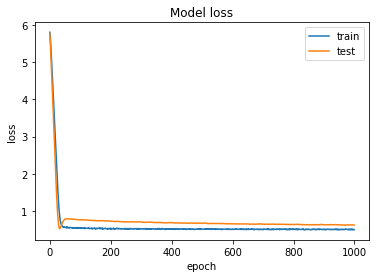

1.8890430680098265
1.3744246316222022
DN- 8  layers; 300 Units; LR- 2e-05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 1s 534us/sample - loss: 5.6602 - mean_squared_error: 39.2312 - val_loss: 5.5701 - val_mean_squared_error: 38.0891
Epoch 2/1000
2562/2562 [==============================] - 0s 77us/sample - loss: 5.5751 - mean_squared_error: 38.1914 - val_loss: 5.4000 - val_mean_squared_error: 36.0618
Epoch 3/1000
2562/2562 [==============================] - 0s 68us/sample - loss: 5.4287 - mean_squared_error: 36.4255 - val_loss: 5.1904 - val_mean_squared_error: 33.6487
Epoch 4/1000
2562/2562 [==============================] - 0s 66us/sample - loss: 5.2606 - mean_squared_error: 34.4866 - val_loss: 4.9595 - val_mean_squared_error: 31.0853
Epoch 5/1000
2562/2562 [==============================] - 0s 67us/sample - loss: 5.0682 - mean_squared_error: 32.3186 - val_loss: 4.7189 - val_mean_squared_error: 28.5228
Epoch 6

2562/2562 [==============================] - 0s 55us/sample - loss: 0.5375 - mean_squared_error: 1.4050 - val_loss: 0.7665 - val_mean_squared_error: 2.2314
Epoch 49/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.5422 - mean_squared_error: 1.4125 - val_loss: 0.7652 - val_mean_squared_error: 2.2272
Epoch 50/1000
2562/2562 [==============================] - 0s 51us/sample - loss: 0.5401 - mean_squared_error: 1.4089 - val_loss: 0.7646 - val_mean_squared_error: 2.2255
Epoch 51/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.5337 - mean_squared_error: 1.3910 - val_loss: 0.7631 - val_mean_squared_error: 2.2204
Epoch 52/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.5336 - mean_squared_error: 1.4007 - val_loss: 0.7626 - val_mean_squared_error: 2.2190
Epoch 53/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.5520 - mean_squared_error: 1.4303 - val_loss: 0.7620 - val_mean_squared_error: 2

2562/2562 [==============================] - 0s 58us/sample - loss: 0.5188 - mean_squared_error: 1.3387 - val_loss: 0.7307 - val_mean_squared_error: 2.1137
Epoch 97/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.5183 - mean_squared_error: 1.3341 - val_loss: 0.7288 - val_mean_squared_error: 2.1073
Epoch 98/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.5164 - mean_squared_error: 1.3317 - val_loss: 0.7269 - val_mean_squared_error: 2.1009
Epoch 99/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.5189 - mean_squared_error: 1.3399 - val_loss: 0.7238 - val_mean_squared_error: 2.0903
Epoch 100/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.5099 - mean_squared_error: 1.3096 - val_loss: 0.7220 - val_mean_squared_error: 2.0842
Epoch 101/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.5207 - mean_squared_error: 1.3486 - val_loss: 0.7187 - val_mean_squared_error:

2562/2562 [==============================] - 0s 57us/sample - loss: 0.5123 - mean_squared_error: 1.3060 - val_loss: 0.7052 - val_mean_squared_error: 2.0280
Epoch 145/1000
2562/2562 [==============================] - 0s 51us/sample - loss: 0.5031 - mean_squared_error: 1.2833 - val_loss: 0.7033 - val_mean_squared_error: 2.0216
Epoch 146/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.5141 - mean_squared_error: 1.3335 - val_loss: 0.7027 - val_mean_squared_error: 2.0196
Epoch 147/1000
2562/2562 [==============================] - 0s 70us/sample - loss: 0.5047 - mean_squared_error: 1.3070 - val_loss: 0.7031 - val_mean_squared_error: 2.0209
Epoch 148/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.4998 - mean_squared_error: 1.2789 - val_loss: 0.7037 - val_mean_squared_error: 2.0230
Epoch 149/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 0.4974 - mean_squared_error: 1.2653 - val_loss: 0.7039 - val_mean_squared_err

Epoch 192/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.5063 - mean_squared_error: 1.2957 - val_loss: 0.6886 - val_mean_squared_error: 1.9724
Epoch 193/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.5007 - mean_squared_error: 1.2822 - val_loss: 0.6866 - val_mean_squared_error: 1.9656
Epoch 194/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4949 - mean_squared_error: 1.2615 - val_loss: 0.6853 - val_mean_squared_error: 1.9616
Epoch 195/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4979 - mean_squared_error: 1.2806 - val_loss: 0.6839 - val_mean_squared_error: 1.9568
Epoch 196/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4973 - mean_squared_error: 1.2700 - val_loss: 0.6817 - val_mean_squared_error: 1.9493
Epoch 197/1000
2562/2562 [==============================] - 0s 49us/sample - loss: 0.4984 - mean_squared_error: 1.2825 - val_loss: 0.6807 - val_m

Epoch 240/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.5061 - mean_squared_error: 1.2960 - val_loss: 0.6721 - val_mean_squared_error: 1.9176
Epoch 241/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.4952 - mean_squared_error: 1.2674 - val_loss: 0.6729 - val_mean_squared_error: 1.9200
Epoch 242/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4955 - mean_squared_error: 1.2581 - val_loss: 0.6737 - val_mean_squared_error: 1.9226
Epoch 243/1000
2562/2562 [==============================] - 0s 51us/sample - loss: 0.4861 - mean_squared_error: 1.2229 - val_loss: 0.6754 - val_mean_squared_error: 1.9285
Epoch 244/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.5045 - mean_squared_error: 1.2935 - val_loss: 0.6772 - val_mean_squared_error: 1.9343
Epoch 245/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4986 - mean_squared_error: 1.2684 - val_loss: 0.6789 - val_m

Epoch 288/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 0.5019 - mean_squared_error: 1.2944 - val_loss: 0.6638 - val_mean_squared_error: 1.8901
Epoch 289/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.4880 - mean_squared_error: 1.2473 - val_loss: 0.6623 - val_mean_squared_error: 1.8850
Epoch 290/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.4906 - mean_squared_error: 1.2585 - val_loss: 0.6611 - val_mean_squared_error: 1.8810
Epoch 291/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.4881 - mean_squared_error: 1.2534 - val_loss: 0.6585 - val_mean_squared_error: 1.8724
Epoch 292/1000
2562/2562 [==============================] - 0s 64us/sample - loss: 0.4893 - mean_squared_error: 1.2459 - val_loss: 0.6571 - val_mean_squared_error: 1.8680
Epoch 293/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.4949 - mean_squared_error: 1.2680 - val_loss: 0.6565 - val_m

Epoch 336/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.4816 - mean_squared_error: 1.2208 - val_loss: 0.6601 - val_mean_squared_error: 1.8777
Epoch 337/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.4914 - mean_squared_error: 1.2611 - val_loss: 0.6579 - val_mean_squared_error: 1.8702
Epoch 338/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.4906 - mean_squared_error: 1.2602 - val_loss: 0.6571 - val_mean_squared_error: 1.8677
Epoch 339/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.4738 - mean_squared_error: 1.2088 - val_loss: 0.6554 - val_mean_squared_error: 1.8620
Epoch 340/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4905 - mean_squared_error: 1.2566 - val_loss: 0.6545 - val_mean_squared_error: 1.8591
Epoch 341/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4807 - mean_squared_error: 1.2286 - val_loss: 0.6535 - val_m

Epoch 384/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4919 - mean_squared_error: 1.2511 - val_loss: 0.6510 - val_mean_squared_error: 1.8475
Epoch 385/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 0.4899 - mean_squared_error: 1.2631 - val_loss: 0.6515 - val_mean_squared_error: 1.8491
Epoch 386/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.4901 - mean_squared_error: 1.2656 - val_loss: 0.6521 - val_mean_squared_error: 1.8511
Epoch 387/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.4913 - mean_squared_error: 1.2782 - val_loss: 0.6517 - val_mean_squared_error: 1.8497
Epoch 388/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.4943 - mean_squared_error: 1.2568 - val_loss: 0.6510 - val_mean_squared_error: 1.8476
Epoch 389/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.4850 - mean_squared_error: 1.2423 - val_loss: 0.6504 - val_m

Epoch 432/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4901 - mean_squared_error: 1.2539 - val_loss: 0.6453 - val_mean_squared_error: 1.8286
Epoch 433/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4843 - mean_squared_error: 1.2360 - val_loss: 0.6470 - val_mean_squared_error: 1.8343
Epoch 434/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4978 - mean_squared_error: 1.2902 - val_loss: 0.6471 - val_mean_squared_error: 1.8347
Epoch 435/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.4850 - mean_squared_error: 1.2599 - val_loss: 0.6459 - val_mean_squared_error: 1.8305
Epoch 436/1000
2562/2562 [==============================] - 0s 48us/sample - loss: 0.4815 - mean_squared_error: 1.2234 - val_loss: 0.6439 - val_mean_squared_error: 1.8241
Epoch 437/1000
2562/2562 [==============================] - 0s 50us/sample - loss: 0.4847 - mean_squared_error: 1.2390 - val_loss: 0.6429 - val_m

Epoch 480/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.4848 - mean_squared_error: 1.2346 - val_loss: 0.6315 - val_mean_squared_error: 1.7834
Epoch 481/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4797 - mean_squared_error: 1.2247 - val_loss: 0.6329 - val_mean_squared_error: 1.7881
Epoch 482/1000
2562/2562 [==============================] - 0s 63us/sample - loss: 0.4785 - mean_squared_error: 1.2243 - val_loss: 0.6334 - val_mean_squared_error: 1.7895
Epoch 483/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.4938 - mean_squared_error: 1.2580 - val_loss: 0.6332 - val_mean_squared_error: 1.7888
Epoch 484/1000
2562/2562 [==============================] - 0s 71us/sample - loss: 0.4812 - mean_squared_error: 1.2246 - val_loss: 0.6344 - val_mean_squared_error: 1.7928
Epoch 485/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4643 - mean_squared_error: 1.1875 - val_loss: 0.6347 - val_m

Epoch 528/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.4871 - mean_squared_error: 1.2405 - val_loss: 0.6259 - val_mean_squared_error: 1.7649
Epoch 529/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4888 - mean_squared_error: 1.2561 - val_loss: 0.6265 - val_mean_squared_error: 1.7668
Epoch 530/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4819 - mean_squared_error: 1.2284 - val_loss: 0.6271 - val_mean_squared_error: 1.7688
Epoch 531/1000
2562/2562 [==============================] - 0s 49us/sample - loss: 0.4873 - mean_squared_error: 1.2421 - val_loss: 0.6272 - val_mean_squared_error: 1.7693
Epoch 532/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4861 - mean_squared_error: 1.2426 - val_loss: 0.6262 - val_mean_squared_error: 1.7660
Epoch 533/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4786 - mean_squared_error: 1.2237 - val_loss: 0.6265 - val_m

Epoch 576/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.4749 - mean_squared_error: 1.2016 - val_loss: 0.6195 - val_mean_squared_error: 1.7441
Epoch 577/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.4843 - mean_squared_error: 1.2412 - val_loss: 0.6192 - val_mean_squared_error: 1.7429
Epoch 578/1000
2562/2562 [==============================] - 0s 52us/sample - loss: 0.4893 - mean_squared_error: 1.2510 - val_loss: 0.6185 - val_mean_squared_error: 1.7407
Epoch 579/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4936 - mean_squared_error: 1.2618 - val_loss: 0.6181 - val_mean_squared_error: 1.7393
Epoch 580/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.4773 - mean_squared_error: 1.2210 - val_loss: 0.6179 - val_mean_squared_error: 1.7388
Epoch 581/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4805 - mean_squared_error: 1.2172 - val_loss: 0.6184 - val_m

Epoch 624/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4822 - mean_squared_error: 1.2224 - val_loss: 0.6140 - val_mean_squared_error: 1.7258
Epoch 625/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.4940 - mean_squared_error: 1.2542 - val_loss: 0.6112 - val_mean_squared_error: 1.7167
Epoch 626/1000
2562/2562 [==============================] - 0s 65us/sample - loss: 0.4783 - mean_squared_error: 1.2205 - val_loss: 0.6092 - val_mean_squared_error: 1.7103
Epoch 627/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.4833 - mean_squared_error: 1.2434 - val_loss: 0.6081 - val_mean_squared_error: 1.7065
Epoch 628/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.4860 - mean_squared_error: 1.2372 - val_loss: 0.6076 - val_mean_squared_error: 1.7052
Epoch 629/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4794 - mean_squared_error: 1.2217 - val_loss: 0.6079 - val_m

Epoch 672/1000
2562/2562 [==============================] - 0s 49us/sample - loss: 0.4852 - mean_squared_error: 1.2385 - val_loss: 0.6101 - val_mean_squared_error: 1.7129
Epoch 673/1000
2562/2562 [==============================] - 0s 52us/sample - loss: 0.4813 - mean_squared_error: 1.2378 - val_loss: 0.6083 - val_mean_squared_error: 1.7073
Epoch 674/1000
2562/2562 [==============================] - 0s 50us/sample - loss: 0.4863 - mean_squared_error: 1.2442 - val_loss: 0.6082 - val_mean_squared_error: 1.7068
Epoch 675/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4833 - mean_squared_error: 1.2314 - val_loss: 0.6080 - val_mean_squared_error: 1.7060
Epoch 676/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4801 - mean_squared_error: 1.2311 - val_loss: 0.6075 - val_mean_squared_error: 1.7044
Epoch 677/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4717 - mean_squared_error: 1.1912 - val_loss: 0.6062 - val_m

Epoch 720/1000
2562/2562 [==============================] - 0s 48us/sample - loss: 0.4843 - mean_squared_error: 1.2408 - val_loss: 0.6117 - val_mean_squared_error: 1.7183
Epoch 721/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4760 - mean_squared_error: 1.2184 - val_loss: 0.6098 - val_mean_squared_error: 1.7118
Epoch 722/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4756 - mean_squared_error: 1.1912 - val_loss: 0.6071 - val_mean_squared_error: 1.7033
Epoch 723/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4737 - mean_squared_error: 1.2080 - val_loss: 0.6041 - val_mean_squared_error: 1.6935
Epoch 724/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4700 - mean_squared_error: 1.1884 - val_loss: 0.6029 - val_mean_squared_error: 1.6896
Epoch 725/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4769 - mean_squared_error: 1.2197 - val_loss: 0.6021 - val_m

Epoch 768/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.4786 - mean_squared_error: 1.2313 - val_loss: 0.6052 - val_mean_squared_error: 1.6971
Epoch 769/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4892 - mean_squared_error: 1.2593 - val_loss: 0.6051 - val_mean_squared_error: 1.6966
Epoch 770/1000
2562/2562 [==============================] - 0s 62us/sample - loss: 0.4953 - mean_squared_error: 1.2679 - val_loss: 0.6044 - val_mean_squared_error: 1.6944
Epoch 771/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 0.4804 - mean_squared_error: 1.2288 - val_loss: 0.6040 - val_mean_squared_error: 1.6929
Epoch 772/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.4867 - mean_squared_error: 1.2471 - val_loss: 0.6027 - val_mean_squared_error: 1.6888
Epoch 773/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4813 - mean_squared_error: 1.2209 - val_loss: 0.6027 - val_m

Epoch 816/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4767 - mean_squared_error: 1.2159 - val_loss: 0.5938 - val_mean_squared_error: 1.6599
Epoch 817/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4793 - mean_squared_error: 1.2317 - val_loss: 0.5961 - val_mean_squared_error: 1.6672
Epoch 818/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4808 - mean_squared_error: 1.2161 - val_loss: 0.5972 - val_mean_squared_error: 1.6709
Epoch 819/1000
2562/2562 [==============================] - 0s 52us/sample - loss: 0.4822 - mean_squared_error: 1.2375 - val_loss: 0.5978 - val_mean_squared_error: 1.6728
Epoch 820/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4888 - mean_squared_error: 1.2481 - val_loss: 0.5972 - val_mean_squared_error: 1.6709
Epoch 821/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4803 - mean_squared_error: 1.2265 - val_loss: 0.5969 - val_m

Epoch 864/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4878 - mean_squared_error: 1.2373 - val_loss: 0.5922 - val_mean_squared_error: 1.6543
Epoch 865/1000
2562/2562 [==============================] - 0s 53us/sample - loss: 0.4679 - mean_squared_error: 1.1935 - val_loss: 0.5943 - val_mean_squared_error: 1.6614
Epoch 866/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4847 - mean_squared_error: 1.2458 - val_loss: 0.5956 - val_mean_squared_error: 1.6654
Epoch 867/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.4761 - mean_squared_error: 1.2066 - val_loss: 0.5954 - val_mean_squared_error: 1.6648
Epoch 868/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.4853 - mean_squared_error: 1.2314 - val_loss: 0.5955 - val_mean_squared_error: 1.6651
Epoch 869/1000
2562/2562 [==============================] - 0s 61us/sample - loss: 0.4833 - mean_squared_error: 1.2268 - val_loss: 0.5969 - val_m

Epoch 912/1000
2562/2562 [==============================] - 0s 57us/sample - loss: 0.4910 - mean_squared_error: 1.2603 - val_loss: 0.5986 - val_mean_squared_error: 1.6751
Epoch 913/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.4776 - mean_squared_error: 1.2205 - val_loss: 0.5975 - val_mean_squared_error: 1.6716
Epoch 914/1000
2562/2562 [==============================] - 0s 60us/sample - loss: 0.4800 - mean_squared_error: 1.2220 - val_loss: 0.5971 - val_mean_squared_error: 1.6702
Epoch 915/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4911 - mean_squared_error: 1.2593 - val_loss: 0.5965 - val_mean_squared_error: 1.6684
Epoch 916/1000
2562/2562 [==============================] - 0s 58us/sample - loss: 0.4833 - mean_squared_error: 1.2349 - val_loss: 0.5965 - val_mean_squared_error: 1.6685
Epoch 917/1000
2562/2562 [==============================] - 0s 59us/sample - loss: 0.4886 - mean_squared_error: 1.2535 - val_loss: 0.5962 - val_m

Epoch 960/1000
2562/2562 [==============================] - 0s 50us/sample - loss: 0.4805 - mean_squared_error: 1.2284 - val_loss: 0.5932 - val_mean_squared_error: 1.6576
Epoch 961/1000
2562/2562 [==============================] - 0s 50us/sample - loss: 0.4807 - mean_squared_error: 1.2203 - val_loss: 0.5929 - val_mean_squared_error: 1.6568
Epoch 962/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.4784 - mean_squared_error: 1.2263 - val_loss: 0.5924 - val_mean_squared_error: 1.6550
Epoch 963/1000
2562/2562 [==============================] - 0s 54us/sample - loss: 0.4836 - mean_squared_error: 1.2323 - val_loss: 0.5913 - val_mean_squared_error: 1.6515
Epoch 964/1000
2562/2562 [==============================] - 0s 56us/sample - loss: 0.4812 - mean_squared_error: 1.2278 - val_loss: 0.5899 - val_mean_squared_error: 1.6468
Epoch 965/1000
2562/2562 [==============================] - 0s 55us/sample - loss: 0.4747 - mean_squared_error: 1.2054 - val_loss: 0.5902 - val_m

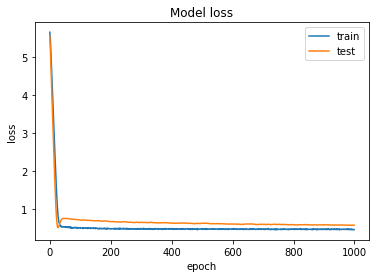

1.8553059909761778
1.3620961753768261
DN- 8  layers; 500 Units; LR- 0.05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 2s 657us/sample - loss: 5.6459 - mean_squared_error: 51.3238 - val_loss: 0.5446 - val_mean_squared_error: 1.1507
Epoch 2/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 3.1191 - mean_squared_error: 22.2771 - val_loss: 3.3844 - val_mean_squared_error: 14.9941
Epoch 3/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 8.9088 - mean_squared_error: 103.0122 - val_loss: 5.7843 - val_mean_squared_error: 37.8191
Epoch 4/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 14.4628 - mean_squared_error: 246.6082 - val_loss: 7.5800 - val_mean_squared_error: 68.8394
Epoch 5/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 7.4226 - mean_squared_error: 76.9671 - val_loss: 17.7344 - val_mean_squared_error: 329.2

Epoch 47/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 12.8911 - mean_squared_error: 182.1318 - val_loss: 12.3318 - val_mean_squared_error: 157.3831
Epoch 48/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 12.9750 - mean_squared_error: 184.7280 - val_loss: 11.4421 - val_mean_squared_error: 135.9345
Epoch 49/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.7258 - mean_squared_error: 179.8363 - val_loss: 14.0133 - val_mean_squared_error: 202.2500
Epoch 50/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 13.0067 - mean_squared_error: 189.0502 - val_loss: 10.3491 - val_mean_squared_error: 111.7522
Epoch 51/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.5943 - mean_squared_error: 179.3821 - val_loss: 14.3593 - val_mean_squared_error: 212.1856
Epoch 52/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 13.1565 - mean_squared_error: 19

2562/2562 [==============================] - 0s 111us/sample - loss: 12.5414 - mean_squared_error: 176.2456 - val_loss: 13.0637 - val_mean_squared_error: 176.2639
Epoch 94/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.9686 - mean_squared_error: 187.0600 - val_loss: 12.0154 - val_mean_squared_error: 149.6190
Epoch 95/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.8555 - mean_squared_error: 183.9922 - val_loss: 12.0968 - val_mean_squared_error: 151.6114
Epoch 96/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 12.6314 - mean_squared_error: 178.1438 - val_loss: 12.6016 - val_mean_squared_error: 164.2507
Epoch 97/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.9690 - mean_squared_error: 186.8712 - val_loss: 11.8506 - val_mean_squared_error: 145.6336
Epoch 98/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.8159 - mean_squared_error: 182.3598 - val_l

2562/2562 [==============================] - 0s 110us/sample - loss: 12.8641 - mean_squared_error: 185.1359 - val_loss: 12.6195 - val_mean_squared_error: 164.7516
Epoch 140/1000
2562/2562 [==============================] - 0s 113us/sample - loss: 13.0065 - mean_squared_error: 189.5631 - val_loss: 12.1743 - val_mean_squared_error: 153.5618
Epoch 141/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 12.8754 - mean_squared_error: 185.5304 - val_loss: 12.0799 - val_mean_squared_error: 151.2412
Epoch 142/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 13.0117 - mean_squared_error: 189.3359 - val_loss: 12.1403 - val_mean_squared_error: 152.7239
Epoch 143/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 12.7232 - mean_squared_error: 181.5307 - val_loss: 13.2727 - val_mean_squared_error: 181.8930
Epoch 144/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 13.2552 - mean_squared_error: 198.2821 - 

2562/2562 [==============================] - 0s 113us/sample - loss: 12.6061 - mean_squared_error: 182.7895 - val_loss: 14.0327 - val_mean_squared_error: 202.9518
Epoch 186/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 12.8214 - mean_squared_error: 187.8368 - val_loss: 10.9997 - val_mean_squared_error: 125.9793
Epoch 187/1000
2562/2562 [==============================] - 0s 112us/sample - loss: 12.5706 - mean_squared_error: 180.3005 - val_loss: 12.1138 - val_mean_squared_error: 152.1160
Epoch 188/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 12.6679 - mean_squared_error: 182.7180 - val_loss: 14.1109 - val_mean_squared_error: 205.1815
Epoch 189/1000
2562/2562 [==============================] - 0s 113us/sample - loss: 13.1918 - mean_squared_error: 197.4903 - val_loss: 10.6783 - val_mean_squared_error: 118.9026
Epoch 190/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.6440 - mean_squared_error: 181.8156 - 

2562/2562 [==============================] - 0s 114us/sample - loss: 12.7314 - mean_squared_error: 185.8114 - val_loss: 12.7621 - val_mean_squared_error: 168.5134
Epoch 232/1000
2562/2562 [==============================] - 0s 113us/sample - loss: 12.6319 - mean_squared_error: 182.4417 - val_loss: 14.1088 - val_mean_squared_error: 205.1727
Epoch 233/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 13.2058 - mean_squared_error: 203.6383 - val_loss: 9.4459 - val_mean_squared_error: 93.7080
Epoch 234/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 12.5769 - mean_squared_error: 185.5277 - val_loss: 12.3883 - val_mean_squared_error: 158.9837
Epoch 235/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 12.7947 - mean_squared_error: 186.0233 - val_loss: 12.4434 - val_mean_squared_error: 160.3731
Epoch 236/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 12.9341 - mean_squared_error: 189.9533 - va

2562/2562 [==============================] - 0s 102us/sample - loss: 12.7207 - mean_squared_error: 184.9049 - val_loss: 12.9776 - val_mean_squared_error: 174.1801
Epoch 278/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 13.0030 - mean_squared_error: 192.9678 - val_loss: 10.1963 - val_mean_squared_error: 108.7464
Epoch 279/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.6745 - mean_squared_error: 187.3059 - val_loss: 12.8507 - val_mean_squared_error: 170.8605
Epoch 280/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.5737 - mean_squared_error: 181.3597 - val_loss: 13.6358 - val_mean_squared_error: 191.9337
Epoch 281/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.8949 - mean_squared_error: 191.3292 - val_loss: 11.3899 - val_mean_squared_error: 134.9356
Epoch 282/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.6585 - mean_squared_error: 183.7933 - 

2562/2562 [==============================] - 0s 108us/sample - loss: 12.6072 - mean_squared_error: 183.8193 - val_loss: 13.3384 - val_mean_squared_error: 183.8529
Epoch 324/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.5886 - mean_squared_error: 182.1167 - val_loss: 12.9549 - val_mean_squared_error: 173.6316
Epoch 325/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 12.7368 - mean_squared_error: 184.8995 - val_loss: 12.5156 - val_mean_squared_error: 162.2871
Epoch 326/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.8798 - mean_squared_error: 190.2931 - val_loss: 11.8035 - val_mean_squared_error: 144.7173
Epoch 327/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.7579 - mean_squared_error: 187.2255 - val_loss: 12.7456 - val_mean_squared_error: 168.1829
Epoch 328/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.8686 - mean_squared_error: 189.6695 - 

2562/2562 [==============================] - 0s 101us/sample - loss: 12.9027 - mean_squared_error: 191.0923 - val_loss: 12.1492 - val_mean_squared_error: 153.1616
Epoch 370/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 12.7757 - mean_squared_error: 187.8338 - val_loss: 11.6326 - val_mean_squared_error: 140.6909
Epoch 371/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.5281 - mean_squared_error: 180.6065 - val_loss: 12.9290 - val_mean_squared_error: 172.9991
Epoch 372/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 12.8314 - mean_squared_error: 188.2243 - val_loss: 12.3813 - val_mean_squared_error: 158.9400
Epoch 373/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 12.8220 - mean_squared_error: 188.4574 - val_loss: 12.8682 - val_mean_squared_error: 171.4105
Epoch 374/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 13.0064 - mean_squared_error: 194.0758 - 

2562/2562 [==============================] - 0s 139us/sample - loss: 12.9645 - mean_squared_error: 191.2192 - val_loss: 11.5641 - val_mean_squared_error: 139.1167
Epoch 416/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 12.6245 - mean_squared_error: 184.2044 - val_loss: 12.7716 - val_mean_squared_error: 168.9426
Epoch 417/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 12.8334 - mean_squared_error: 188.6431 - val_loss: 13.3543 - val_mean_squared_error: 184.3796
Epoch 418/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 12.9876 - mean_squared_error: 193.5362 - val_loss: 10.8096 - val_mean_squared_error: 121.9633
Epoch 419/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 12.6932 - mean_squared_error: 187.1427 - val_loss: 13.3815 - val_mean_squared_error: 185.1187
Epoch 420/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 12.5034 - mean_squared_error: 179.9763 - 

2562/2562 [==============================] - 0s 102us/sample - loss: 12.6884 - mean_squared_error: 186.8759 - val_loss: 10.9801 - val_mean_squared_error: 125.7640
Epoch 462/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 12.4232 - mean_squared_error: 182.0145 - val_loss: 13.6341 - val_mean_squared_error: 192.0836
Epoch 463/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.7400 - mean_squared_error: 187.0771 - val_loss: 12.3273 - val_mean_squared_error: 157.6806
Epoch 464/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.9326 - mean_squared_error: 191.0332 - val_loss: 10.6844 - val_mean_squared_error: 119.2871
Epoch 465/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.6582 - mean_squared_error: 185.8066 - val_loss: 12.5675 - val_mean_squared_error: 163.7850
Epoch 466/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.8080 - mean_squared_error: 188.8142 - v

2562/2562 [==============================] - 0s 102us/sample - loss: 12.6066 - mean_squared_error: 184.3060 - val_loss: 11.1520 - val_mean_squared_error: 129.8370
Epoch 508/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.3581 - mean_squared_error: 177.8299 - val_loss: 11.8540 - val_mean_squared_error: 146.0581
Epoch 509/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.4022 - mean_squared_error: 178.3440 - val_loss: 13.3755 - val_mean_squared_error: 184.9931
Epoch 510/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 12.8174 - mean_squared_error: 188.9381 - val_loss: 11.9404 - val_mean_squared_error: 148.3595
Epoch 511/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 12.7238 - mean_squared_error: 186.5483 - val_loss: 11.6089 - val_mean_squared_error: 140.7314
Epoch 512/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.5943 - mean_squared_error: 183.3340 - v

2562/2562 [==============================] - 0s 105us/sample - loss: 12.4786 - mean_squared_error: 184.1553 - val_loss: 11.2969 - val_mean_squared_error: 136.7793
Epoch 554/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.3254 - mean_squared_error: 180.2493 - val_loss: 12.2183 - val_mean_squared_error: 157.7236
Epoch 555/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 12.3450 - mean_squared_error: 178.9519 - val_loss: 11.8655 - val_mean_squared_error: 148.0851
Epoch 556/1000
2562/2562 [==============================] - 0s 114us/sample - loss: 12.0657 - mean_squared_error: 173.3278 - val_loss: 13.6824 - val_mean_squared_error: 195.1246
Epoch 557/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 12.4450 - mean_squared_error: 180.1547 - val_loss: 13.3399 - val_mean_squared_error: 184.9675
Epoch 558/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.3452 - mean_squared_error: 177.3657 - 

2562/2562 [==============================] - 0s 107us/sample - loss: 12.3563 - mean_squared_error: 178.9680 - val_loss: 11.8714 - val_mean_squared_error: 149.4024
Epoch 600/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 12.1837 - mean_squared_error: 175.1225 - val_loss: 13.3344 - val_mean_squared_error: 186.5796
Epoch 601/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.5467 - mean_squared_error: 182.5910 - val_loss: 11.8357 - val_mean_squared_error: 146.2539
Epoch 602/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.4587 - mean_squared_error: 179.2477 - val_loss: 11.4131 - val_mean_squared_error: 135.7410
Epoch 603/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.2282 - mean_squared_error: 172.3852 - val_loss: 12.8465 - val_mean_squared_error: 171.1449
Epoch 604/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.4710 - mean_squared_error: 179.8223 - v

2562/2562 [==============================] - 0s 104us/sample - loss: 12.6699 - mean_squared_error: 185.7334 - val_loss: 11.6639 - val_mean_squared_error: 141.6556
Epoch 646/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.6167 - mean_squared_error: 183.2665 - val_loss: 13.6010 - val_mean_squared_error: 191.3343
Epoch 647/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.6677 - mean_squared_error: 184.1656 - val_loss: 13.5141 - val_mean_squared_error: 188.9443
Epoch 648/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 13.1154 - mean_squared_error: 197.9187 - val_loss: 10.9653 - val_mean_squared_error: 125.5850
Epoch 649/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.6312 - mean_squared_error: 183.0546 - val_loss: 12.2459 - val_mean_squared_error: 155.7966
Epoch 650/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 12.8904 - mean_squared_error: 190.3492 - 

2562/2562 [==============================] - 0s 110us/sample - loss: 12.7853 - mean_squared_error: 186.9750 - val_loss: 12.0203 - val_mean_squared_error: 150.2733
Epoch 692/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.8220 - mean_squared_error: 188.5894 - val_loss: 13.2096 - val_mean_squared_error: 180.7368
Epoch 693/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.9407 - mean_squared_error: 190.8235 - val_loss: 12.0228 - val_mean_squared_error: 150.3364
Epoch 694/1000
2562/2562 [==============================] - 0s 112us/sample - loss: 12.9320 - mean_squared_error: 190.8638 - val_loss: 10.6592 - val_mean_squared_error: 118.8869
Epoch 695/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 12.8390 - mean_squared_error: 189.2494 - val_loss: 11.0689 - val_mean_squared_error: 127.9470
Epoch 696/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 12.5061 - mean_squared_error: 183.7165 - 

2562/2562 [==============================] - 0s 107us/sample - loss: 12.4783 - mean_squared_error: 183.5319 - val_loss: 13.3108 - val_mean_squared_error: 183.5039
Epoch 738/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.7330 - mean_squared_error: 185.2753 - val_loss: 13.4584 - val_mean_squared_error: 187.5123
Epoch 739/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 13.0109 - mean_squared_error: 193.2369 - val_loss: 12.2679 - val_mean_squared_error: 156.4261
Epoch 740/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.9640 - mean_squared_error: 192.5209 - val_loss: 11.1225 - val_mean_squared_error: 129.1943
Epoch 741/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.7622 - mean_squared_error: 187.0229 - val_loss: 12.5343 - val_mean_squared_error: 163.1391
Epoch 742/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.6808 - mean_squared_error: 184.2462 - 

2562/2562 [==============================] - 0s 106us/sample - loss: 12.7572 - mean_squared_error: 186.4934 - val_loss: 12.6663 - val_mean_squared_error: 166.5570
Epoch 784/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 12.9301 - mean_squared_error: 191.2161 - val_loss: 11.6043 - val_mean_squared_error: 140.3671
Epoch 785/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.8584 - mean_squared_error: 188.9152 - val_loss: 12.4753 - val_mean_squared_error: 161.6805
Epoch 786/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.7049 - mean_squared_error: 185.2782 - val_loss: 12.3813 - val_mean_squared_error: 159.3088
Epoch 787/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.8438 - mean_squared_error: 188.9541 - val_loss: 12.5670 - val_mean_squared_error: 164.0142
Epoch 788/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.5731 - mean_squared_error: 182.6541 - 

2562/2562 [==============================] - 0s 112us/sample - loss: 12.7114 - mean_squared_error: 186.1132 - val_loss: 12.0275 - val_mean_squared_error: 150.5741
Epoch 830/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.5440 - mean_squared_error: 181.7560 - val_loss: 13.1773 - val_mean_squared_error: 180.0063
Epoch 831/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.9429 - mean_squared_error: 191.9756 - val_loss: 11.9307 - val_mean_squared_error: 148.2176
Epoch 832/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.9933 - mean_squared_error: 193.8185 - val_loss: 10.5798 - val_mean_squared_error: 117.2788
Epoch 833/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 13.0038 - mean_squared_error: 194.5868 - val_loss: 10.1918 - val_mean_squared_error: 109.0682
Epoch 834/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.3849 - mean_squared_error: 181.4594 - 

2562/2562 [==============================] - 0s 110us/sample - loss: 13.0537 - mean_squared_error: 196.8920 - val_loss: 10.1946 - val_mean_squared_error: 109.1580
Epoch 876/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 12.8165 - mean_squared_error: 190.1037 - val_loss: 10.5624 - val_mean_squared_error: 116.9386
Epoch 877/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 12.6472 - mean_squared_error: 187.7236 - val_loss: 13.7312 - val_mean_squared_error: 195.1763
Epoch 878/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 12.8724 - mean_squared_error: 191.6461 - val_loss: 12.3196 - val_mean_squared_error: 157.8457
Epoch 879/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.8695 - mean_squared_error: 189.7442 - val_loss: 11.9106 - val_mean_squared_error: 147.7726
Epoch 880/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.6754 - mean_squared_error: 184.8480 - 

2562/2562 [==============================] - 0s 109us/sample - loss: 12.4126 - mean_squared_error: 181.6428 - val_loss: 13.1112 - val_mean_squared_error: 178.3297
Epoch 922/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.6569 - mean_squared_error: 185.5477 - val_loss: 13.9315 - val_mean_squared_error: 200.8414
Epoch 923/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 13.3037 - mean_squared_error: 204.9826 - val_loss: 10.8091 - val_mean_squared_error: 122.3468
Epoch 924/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 12.5936 - mean_squared_error: 183.3057 - val_loss: 11.7083 - val_mean_squared_error: 142.9532
Epoch 925/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 12.6732 - mean_squared_error: 185.5716 - val_loss: 12.7054 - val_mean_squared_error: 167.6950
Epoch 926/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 12.8898 - mean_squared_error: 191.8465 - 

2562/2562 [==============================] - 0s 106us/sample - loss: 12.6304 - mean_squared_error: 183.9969 - val_loss: 12.6520 - val_mean_squared_error: 166.3583
Epoch 968/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.7991 - mean_squared_error: 188.1077 - val_loss: 12.7713 - val_mean_squared_error: 169.4404
Epoch 969/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.8911 - mean_squared_error: 192.0921 - val_loss: 11.5589 - val_mean_squared_error: 139.4560
Epoch 970/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.5902 - mean_squared_error: 182.5988 - val_loss: 12.0863 - val_mean_squared_error: 152.1409
Epoch 971/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 12.7480 - mean_squared_error: 187.0807 - val_loss: 12.5723 - val_mean_squared_error: 164.3201
Epoch 972/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.9867 - mean_squared_error: 193.2433 - 

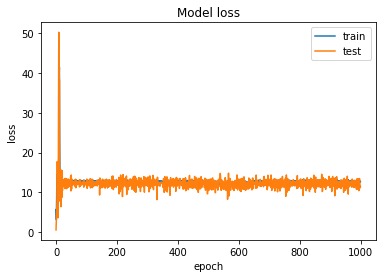

137.7744691089398
11.737736967104851
DN- 8  layers; 500 Units; LR- 0.05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 2s 648us/sample - loss: 4.2050 - mean_squared_error: 38.9284 - val_loss: 3.3459 - val_mean_squared_error: 15.8906
Epoch 2/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 12.0227 - mean_squared_error: 206.8676 - val_loss: 1.9209 - val_mean_squared_error: 6.9795
Epoch 3/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 10.9521 - mean_squared_error: 222.3387 - val_loss: 18.7763 - val_mean_squared_error: 372.7268
Epoch 4/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 13.0455 - mean_squared_error: 219.1389 - val_loss: 8.0910 - val_mean_squared_error: 74.9548
Epoch 5/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 11.9976 - mean_squared_error: 167.4991 - val_loss: 12.3389 - val_mean_squared_error: 165.

Epoch 47/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 12.7059 - mean_squared_error: 183.4408 - val_loss: 10.9110 - val_mean_squared_error: 131.3616
Epoch 48/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 12.3902 - mean_squared_error: 175.7332 - val_loss: 12.9802 - val_mean_squared_error: 182.8665
Epoch 49/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 12.6538 - mean_squared_error: 182.1745 - val_loss: 10.6919 - val_mean_squared_error: 126.4083
Epoch 50/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 12.2768 - mean_squared_error: 173.6367 - val_loss: 13.1415 - val_mean_squared_error: 187.2400
Epoch 51/1000
2562/2562 [==============================] - 0s 129us/sample - loss: 12.6017 - mean_squared_error: 181.2705 - val_loss: 10.6748 - val_mean_squared_error: 126.0271
Epoch 52/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 12.3141 - mean_squared_error: 17

2562/2562 [==============================] - 0s 101us/sample - loss: 12.1788 - mean_squared_error: 174.4396 - val_loss: 12.8999 - val_mean_squared_error: 180.7084
Epoch 94/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 12.5450 - mean_squared_error: 181.0808 - val_loss: 11.8632 - val_mean_squared_error: 153.9993
Epoch 95/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 12.5562 - mean_squared_error: 181.5417 - val_loss: 11.3404 - val_mean_squared_error: 141.3458
Epoch 96/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.3363 - mean_squared_error: 175.9628 - val_loss: 12.5527 - val_mean_squared_error: 171.5237
Epoch 97/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.5258 - mean_squared_error: 180.6820 - val_loss: 12.0044 - val_mean_squared_error: 157.5109
Epoch 98/1000
2562/2562 [==============================] - 0s 93us/sample - loss: 12.5027 - mean_squared_error: 180.6579 - val_loss

2562/2562 [==============================] - 0s 103us/sample - loss: 12.6475 - mean_squared_error: 187.0805 - val_loss: 11.8343 - val_mean_squared_error: 153.2856
Epoch 140/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 12.6795 - mean_squared_error: 187.3064 - val_loss: 11.2948 - val_mean_squared_error: 140.2669
Epoch 141/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 12.3561 - mean_squared_error: 179.4303 - val_loss: 12.7295 - val_mean_squared_error: 176.1704
Epoch 142/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.6222 - mean_squared_error: 185.3025 - val_loss: 11.6822 - val_mean_squared_error: 149.5566
Epoch 143/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 12.5548 - mean_squared_error: 183.6245 - val_loss: 11.9525 - val_mean_squared_error: 156.2152
Epoch 144/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 12.5946 - mean_squared_error: 184.7948 - val_l

2562/2562 [==============================] - 0s 103us/sample - loss: 12.3296 - mean_squared_error: 179.2668 - val_loss: 12.3160 - val_mean_squared_error: 165.4006
Epoch 186/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 12.5413 - mean_squared_error: 183.9433 - val_loss: 11.7489 - val_mean_squared_error: 151.1863
Epoch 187/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.5395 - mean_squared_error: 184.9992 - val_loss: 11.9643 - val_mean_squared_error: 156.5103
Epoch 188/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 12.5176 - mean_squared_error: 183.9507 - val_loss: 11.6035 - val_mean_squared_error: 147.6461
Epoch 189/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.3692 - mean_squared_error: 180.5757 - val_loss: 12.5848 - val_mean_squared_error: 172.3622
Epoch 190/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.6916 - mean_squared_error: 189.2273 - val

2562/2562 [==============================] - 0s 103us/sample - loss: 12.6262 - mean_squared_error: 188.1770 - val_loss: 10.6038 - val_mean_squared_error: 124.4447
Epoch 232/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.1254 - mean_squared_error: 177.3621 - val_loss: 13.0513 - val_mean_squared_error: 184.7872
Epoch 233/1000
2562/2562 [==============================] - 0s 113us/sample - loss: 12.5846 - mean_squared_error: 187.4830 - val_loss: 11.0538 - val_mean_squared_error: 134.6404
Epoch 234/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 12.3048 - mean_squared_error: 180.6788 - val_loss: 12.0875 - val_mean_squared_error: 159.5957
Epoch 235/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.4544 - mean_squared_error: 183.1375 - val_loss: 12.6037 - val_mean_squared_error: 172.8572
Epoch 236/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.4690 - mean_squared_error: 184.4324 - val

2562/2562 [==============================] - 0s 102us/sample - loss: 12.5183 - mean_squared_error: 187.2019 - val_loss: 12.8900 - val_mean_squared_error: 180.4415
Epoch 278/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.4123 - mean_squared_error: 184.3612 - val_loss: 12.7327 - val_mean_squared_error: 176.2551
Epoch 279/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 12.7203 - mean_squared_error: 194.3340 - val_loss: 10.4968 - val_mean_squared_error: 122.0802
Epoch 280/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.3796 - mean_squared_error: 184.0666 - val_loss: 11.6979 - val_mean_squared_error: 149.9402
Epoch 281/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.3929 - mean_squared_error: 183.3105 - val_loss: 12.5526 - val_mean_squared_error: 171.5209
Epoch 282/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.5012 - mean_squared_error: 185.9921 - 

2562/2562 [==============================] - 0s 104us/sample - loss: 12.2220 - mean_squared_error: 180.3422 - val_loss: 13.1576 - val_mean_squared_error: 187.6797
Epoch 324/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.7398 - mean_squared_error: 193.1835 - val_loss: 10.9258 - val_mean_squared_error: 131.6983
Epoch 325/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.3773 - mean_squared_error: 184.1426 - val_loss: 12.1009 - val_mean_squared_error: 159.9340
Epoch 326/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.3410 - mean_squared_error: 182.7464 - val_loss: 12.4616 - val_mean_squared_error: 169.1535
Epoch 327/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.6255 - mean_squared_error: 190.0085 - val_loss: 11.7618 - val_mean_squared_error: 151.5021
Epoch 328/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.3914 - mean_squared_error: 184.9788 - va

2562/2562 [==============================] - 0s 133us/sample - loss: 12.5291 - mean_squared_error: 188.8054 - val_loss: 11.8963 - val_mean_squared_error: 154.8175
Epoch 370/1000
2562/2562 [==============================] - 0s 130us/sample - loss: 12.2621 - mean_squared_error: 180.4778 - val_loss: 12.4908 - val_mean_squared_error: 169.9121
Epoch 371/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 12.6116 - mean_squared_error: 189.9246 - val_loss: 11.1102 - val_mean_squared_error: 135.9473
Epoch 372/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 12.1706 - mean_squared_error: 179.8607 - val_loss: 13.1075 - val_mean_squared_error: 186.3145
Epoch 373/1000
2562/2562 [==============================] - 0s 125us/sample - loss: 12.7069 - mean_squared_error: 194.6636 - val_loss: 10.8386 - val_mean_squared_error: 129.7134
Epoch 374/1000
2562/2562 [==============================] - 0s 130us/sample - loss: 12.7041 - mean_squared_error: 193.5757 - 

2562/2562 [==============================] - 0s 101us/sample - loss: 12.2150 - mean_squared_error: 181.1492 - val_loss: 14.8403 - val_mean_squared_error: 236.4737
Epoch 416/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.8828 - mean_squared_error: 205.0467 - val_loss: 10.2136 - val_mean_squared_error: 115.9321
Epoch 417/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 12.7670 - mean_squared_error: 196.7436 - val_loss: 9.5052 - val_mean_squared_error: 101.2539
Epoch 418/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 12.0930 - mean_squared_error: 182.1119 - val_loss: 12.7952 - val_mean_squared_error: 177.9131
Epoch 419/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.1091 - mean_squared_error: 177.6652 - val_loss: 13.6583 - val_mean_squared_error: 201.6092
Epoch 420/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 12.7071 - mean_squared_error: 195.4585 - val_lo

2562/2562 [==============================] - 0s 102us/sample - loss: 12.1041 - mean_squared_error: 186.2832 - val_loss: 13.2403 - val_mean_squared_error: 189.9456
Epoch 462/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 12.3210 - mean_squared_error: 184.0208 - val_loss: 14.0034 - val_mean_squared_error: 211.4983
Epoch 463/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 12.6242 - mean_squared_error: 193.6252 - val_loss: 11.1457 - val_mean_squared_error: 136.7723
Epoch 464/1000
2562/2562 [==============================] - 0s 92us/sample - loss: 12.5594 - mean_squared_error: 189.4773 - val_loss: 10.6721 - val_mean_squared_error: 125.9664
Epoch 465/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 12.3303 - mean_squared_error: 186.3528 - val_loss: 13.2284 - val_mean_squared_error: 189.6180
Epoch 466/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.2070 - mean_squared_error: 180.1843 - val

2562/2562 [==============================] - 0s 98us/sample - loss: 12.1113 - mean_squared_error: 178.8057 - val_loss: 12.2502 - val_mean_squared_error: 163.7188
Epoch 508/1000
2562/2562 [==============================] - 0s 94us/sample - loss: 12.2159 - mean_squared_error: 180.3922 - val_loss: 13.5193 - val_mean_squared_error: 197.6918
Epoch 509/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.6754 - mean_squared_error: 192.7240 - val_loss: 11.0544 - val_mean_squared_error: 134.6546
Epoch 510/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.5335 - mean_squared_error: 188.4577 - val_loss: 11.5736 - val_mean_squared_error: 146.9228
Epoch 511/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.3158 - mean_squared_error: 182.5145 - val_loss: 12.5006 - val_mean_squared_error: 170.1649
Epoch 512/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 12.6345 - mean_squared_error: 191.5981 - val_lo

2562/2562 [==============================] - 0s 111us/sample - loss: 12.6556 - mean_squared_error: 193.6638 - val_loss: 10.8859 - val_mean_squared_error: 130.7901
Epoch 554/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 12.1793 - mean_squared_error: 179.8881 - val_loss: 12.5957 - val_mean_squared_error: 172.6475
Epoch 555/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.3602 - mean_squared_error: 186.2551 - val_loss: 11.6874 - val_mean_squared_error: 149.6832
Epoch 556/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.5383 - mean_squared_error: 189.0091 - val_loss: 10.6546 - val_mean_squared_error: 125.5765
Epoch 557/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 12.3940 - mean_squared_error: 186.1128 - val_loss: 11.9651 - val_mean_squared_error: 156.5289
Epoch 558/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 12.2087 - mean_squared_error: 181.0018 - val

2562/2562 [==============================] - 0s 104us/sample - loss: 12.6215 - mean_squared_error: 190.1941 - val_loss: 11.5086 - val_mean_squared_error: 145.3578
Epoch 600/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.6539 - mean_squared_error: 191.5368 - val_loss: 11.1522 - val_mean_squared_error: 136.9231
Epoch 601/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 12.3180 - mean_squared_error: 183.0579 - val_loss: 12.9634 - val_mean_squared_error: 182.4124
Epoch 602/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 12.3721 - mean_squared_error: 185.3214 - val_loss: 11.6114 - val_mean_squared_error: 147.8358
Epoch 603/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.6134 - mean_squared_error: 191.2731 - val_loss: 10.4258 - val_mean_squared_error: 120.5225
Epoch 604/1000
2562/2562 [==============================] - 0s 97us/sample - loss: 12.2894 - mean_squared_error: 183.8376 - val_

2562/2562 [==============================] - 0s 105us/sample - loss: 12.2887 - mean_squared_error: 183.8771 - val_loss: 11.6101 - val_mean_squared_error: 147.8049
Epoch 646/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 12.3919 - mean_squared_error: 184.7243 - val_loss: 13.1046 - val_mean_squared_error: 186.2366
Epoch 647/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 12.5929 - mean_squared_error: 189.7608 - val_loss: 11.1305 - val_mean_squared_error: 136.4186
Epoch 648/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.6335 - mean_squared_error: 191.6046 - val_loss: 10.7497 - val_mean_squared_error: 127.7072
Epoch 649/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.2799 - mean_squared_error: 183.7880 - val_loss: 13.3537 - val_mean_squared_error: 193.0760
Epoch 650/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 12.6261 - mean_squared_error: 191.7040 - v

2562/2562 [==============================] - 0s 129us/sample - loss: 12.7089 - mean_squared_error: 192.7629 - val_loss: 10.9693 - val_mean_squared_error: 132.6957
Epoch 692/1000
2562/2562 [==============================] - 0s 125us/sample - loss: 12.4112 - mean_squared_error: 186.3287 - val_loss: 11.6454 - val_mean_squared_error: 148.6612
Epoch 693/1000
2562/2562 [==============================] - 0s 126us/sample - loss: 12.4536 - mean_squared_error: 185.8115 - val_loss: 11.7675 - val_mean_squared_error: 151.6423
Epoch 694/1000
2562/2562 [==============================] - 0s 125us/sample - loss: 12.2979 - mean_squared_error: 182.6085 - val_loss: 12.3026 - val_mean_squared_error: 165.0557
Epoch 695/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 12.5335 - mean_squared_error: 187.6877 - val_loss: 12.3600 - val_mean_squared_error: 166.5310
Epoch 696/1000
2562/2562 [==============================] - 0s 127us/sample - loss: 12.3527 - mean_squared_error: 183.2287 - 

2562/2562 [==============================] - 0s 138us/sample - loss: 12.5304 - mean_squared_error: 188.7800 - val_loss: 11.7356 - val_mean_squared_error: 150.8612
Epoch 738/1000
2562/2562 [==============================] - 0s 129us/sample - loss: 12.5337 - mean_squared_error: 189.0050 - val_loss: 11.8937 - val_mean_squared_error: 154.7543
Epoch 739/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 12.3264 - mean_squared_error: 182.5578 - val_loss: 11.8220 - val_mean_squared_error: 152.9827
Epoch 740/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 12.3945 - mean_squared_error: 184.2771 - val_loss: 12.2119 - val_mean_squared_error: 162.7427
Epoch 741/1000
2562/2562 [==============================] - 0s 128us/sample - loss: 12.6172 - mean_squared_error: 190.7046 - val_loss: 11.4636 - val_mean_squared_error: 144.2788
Epoch 742/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 12.4325 - mean_squared_error: 185.3963 - 

2562/2562 [==============================] - 0s 99us/sample - loss: 12.5535 - mean_squared_error: 191.0281 - val_loss: 11.0134 - val_mean_squared_error: 133.7085
Epoch 784/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 12.2764 - mean_squared_error: 185.8648 - val_loss: 12.8006 - val_mean_squared_error: 178.0551
Epoch 785/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.5362 - mean_squared_error: 189.4640 - val_loss: 12.8047 - val_mean_squared_error: 178.1666
Epoch 786/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 12.6535 - mean_squared_error: 192.3887 - val_loss: 11.1746 - val_mean_squared_error: 137.4469
Epoch 787/1000
2562/2562 [==============================] - 0s 94us/sample - loss: 12.5729 - mean_squared_error: 190.0953 - val_loss: 11.1814 - val_mean_squared_error: 137.6048
Epoch 788/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 12.2904 - mean_squared_error: 183.2112 - val_lo

2562/2562 [==============================] - 0s 101us/sample - loss: 10.2494 - mean_squared_error: 154.8544 - val_loss: 19.9569 - val_mean_squared_error: 419.6337
Epoch 830/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 9.4071 - mean_squared_error: 145.9126 - val_loss: 3.0813 - val_mean_squared_error: 13.9764
Epoch 831/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 11.9062 - mean_squared_error: 219.1913 - val_loss: 8.3022 - val_mean_squared_error: 78.6293
Epoch 832/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 11.8733 - mean_squared_error: 208.5551 - val_loss: 3.5054 - val_mean_squared_error: 17.1932
Epoch 833/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.7054 - mean_squared_error: 212.8238 - val_loss: 7.6217 - val_mean_squared_error: 67.1118
Epoch 834/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 11.7077 - mean_squared_error: 190.5309 - val_loss: 13.1

2562/2562 [==============================] - 0s 101us/sample - loss: 12.4455 - mean_squared_error: 184.6243 - val_loss: 12.0193 - val_mean_squared_error: 157.8836
Epoch 876/1000
2562/2562 [==============================] - 0s 93us/sample - loss: 12.5467 - mean_squared_error: 189.1017 - val_loss: 12.0111 - val_mean_squared_error: 157.6783
Epoch 877/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 12.4945 - mean_squared_error: 185.6255 - val_loss: 11.6947 - val_mean_squared_error: 149.8612
Epoch 878/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.2553 - mean_squared_error: 180.7345 - val_loss: 12.2707 - val_mean_squared_error: 164.2409
Epoch 879/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.4840 - mean_squared_error: 185.5655 - val_loss: 12.0230 - val_mean_squared_error: 157.9760
Epoch 880/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.6449 - mean_squared_error: 190.0534 - val

2562/2562 [==============================] - 0s 100us/sample - loss: 12.1744 - mean_squared_error: 179.0300 - val_loss: 12.8619 - val_mean_squared_error: 179.6918
Epoch 922/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 12.5680 - mean_squared_error: 188.8292 - val_loss: 11.5949 - val_mean_squared_error: 147.4381
Epoch 923/1000
2562/2562 [==============================] - 0s 96us/sample - loss: 12.4396 - mean_squared_error: 186.6162 - val_loss: 11.1560 - val_mean_squared_error: 137.0126
Epoch 924/1000
2562/2562 [==============================] - 0s 95us/sample - loss: 12.3383 - mean_squared_error: 183.9675 - val_loss: 12.9975 - val_mean_squared_error: 183.3336
Epoch 925/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.5734 - mean_squared_error: 191.0233 - val_loss: 11.4216 - val_mean_squared_error: 143.2748
Epoch 926/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.8090 - mean_squared_error: 196.8233 - val_l

2562/2562 [==============================] - 0s 101us/sample - loss: 12.5146 - mean_squared_error: 188.0195 - val_loss: 10.1931 - val_mean_squared_error: 115.4934
Epoch 968/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 12.3221 - mean_squared_error: 185.7492 - val_loss: 13.1777 - val_mean_squared_error: 188.2299
Epoch 969/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 12.5863 - mean_squared_error: 189.4718 - val_loss: 12.3977 - val_mean_squared_error: 167.5005
Epoch 970/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 12.5081 - mean_squared_error: 187.8766 - val_loss: 11.3053 - val_mean_squared_error: 140.5157
Epoch 971/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 12.5069 - mean_squared_error: 187.5562 - val_loss: 12.2542 - val_mean_squared_error: 163.8199
Epoch 972/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 12.4307 - mean_squared_error: 185.4404 - v

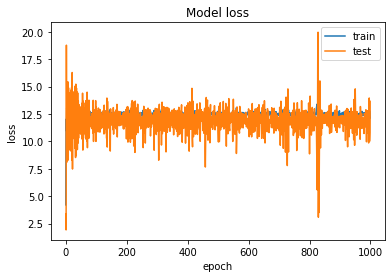

202.1322660788251
14.217322746523871
DN- 8  layers; 500 Units; LR- 2e-05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 2s 737us/sample - loss: 6.0343 - mean_squared_error: 43.5193 - val_loss: 5.9988 - val_mean_squared_error: 43.0277
Epoch 2/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 5.9187 - mean_squared_error: 42.0239 - val_loss: 5.7647 - val_mean_squared_error: 40.0650
Epoch 3/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 5.7001 - mean_squared_error: 39.3035 - val_loss: 5.4695 - val_mean_squared_error: 36.4730
Epoch 4/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 5.4456 - mean_squared_error: 36.2103 - val_loss: 5.1442 - val_mean_squared_error: 32.7201
Epoch 5/1000
2562/2562 [==============================] - 0s 112us/sample - loss: 5.1949 - mean_squared_error: 33.3063 - val_loss: 4.8022 - val_mean_squared_error: 29.0046


Epoch 48/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5760 - mean_squared_error: 1.3940 - val_loss: 0.8814 - val_mean_squared_error: 2.5058
Epoch 49/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5660 - mean_squared_error: 1.3619 - val_loss: 0.8841 - val_mean_squared_error: 2.5154
Epoch 50/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5671 - mean_squared_error: 1.3815 - val_loss: 0.8847 - val_mean_squared_error: 2.5175
Epoch 51/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5710 - mean_squared_error: 1.3951 - val_loss: 0.8865 - val_mean_squared_error: 2.5238
Epoch 52/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5586 - mean_squared_error: 1.3457 - val_loss: 0.8874 - val_mean_squared_error: 2.5270
Epoch 53/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 0.5634 - mean_squared_error: 1.3520 - val_loss: 0.8889 - val_m

Epoch 96/1000
2562/2562 [==============================] - 0s 114us/sample - loss: 0.5533 - mean_squared_error: 1.3277 - val_loss: 0.8617 - val_mean_squared_error: 2.4311
Epoch 97/1000
2562/2562 [==============================] - 0s 112us/sample - loss: 0.5485 - mean_squared_error: 1.3166 - val_loss: 0.8608 - val_mean_squared_error: 2.4277
Epoch 98/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.5524 - mean_squared_error: 1.3237 - val_loss: 0.8584 - val_mean_squared_error: 2.4193
Epoch 99/1000
2562/2562 [==============================] - 0s 112us/sample - loss: 0.5414 - mean_squared_error: 1.2853 - val_loss: 0.8541 - val_mean_squared_error: 2.4043
Epoch 100/1000
2562/2562 [==============================] - 0s 112us/sample - loss: 0.5463 - mean_squared_error: 1.2968 - val_loss: 0.8511 - val_mean_squared_error: 2.3937
Epoch 101/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5478 - mean_squared_error: 1.3053 - val_loss: 0.8468 - val

Epoch 144/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.5348 - mean_squared_error: 1.2660 - val_loss: 0.8243 - val_mean_squared_error: 2.2978
Epoch 145/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5287 - mean_squared_error: 1.2583 - val_loss: 0.8225 - val_mean_squared_error: 2.2912
Epoch 146/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5357 - mean_squared_error: 1.2794 - val_loss: 0.8197 - val_mean_squared_error: 2.2819
Epoch 147/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5323 - mean_squared_error: 1.2682 - val_loss: 0.8174 - val_mean_squared_error: 2.2737
Epoch 148/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5410 - mean_squared_error: 1.2859 - val_loss: 0.8141 - val_mean_squared_error: 2.2625
Epoch 149/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5310 - mean_squared_error: 1.2659 - val_loss: 0.8122 -

2562/2562 [==============================] - 0s 147us/sample - loss: 0.5336 - mean_squared_error: 1.2623 - val_loss: 0.7955 - val_mean_squared_error: 2.1971
Epoch 192/1000
2562/2562 [==============================] - 0s 149us/sample - loss: 0.5327 - mean_squared_error: 1.2696 - val_loss: 0.7995 - val_mean_squared_error: 2.2107
Epoch 193/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.5386 - mean_squared_error: 1.2753 - val_loss: 0.7997 - val_mean_squared_error: 2.2113
Epoch 194/1000
2562/2562 [==============================] - 0s 155us/sample - loss: 0.5330 - mean_squared_error: 1.2590 - val_loss: 0.8017 - val_mean_squared_error: 2.2180
Epoch 195/1000
2562/2562 [==============================] - 0s 147us/sample - loss: 0.5266 - mean_squared_error: 1.2599 - val_loss: 0.8021 - val_mean_squared_error: 2.2193
Epoch 196/1000
2562/2562 [==============================] - 0s 151us/sample - loss: 0.5352 - mean_squared_error: 1.2686 - val_loss: 0.8018 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 0.5327 - mean_squared_error: 1.2508 - val_loss: 0.7799 - val_mean_squared_error: 2.1427
Epoch 240/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.5239 - mean_squared_error: 1.2359 - val_loss: 0.7794 - val_mean_squared_error: 2.1411
Epoch 241/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5291 - mean_squared_error: 1.2506 - val_loss: 0.7792 - val_mean_squared_error: 2.1403
Epoch 242/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5278 - mean_squared_error: 1.2449 - val_loss: 0.7785 - val_mean_squared_error: 2.1378
Epoch 243/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.5236 - mean_squared_error: 1.2226 - val_loss: 0.7809 - val_mean_squared_error: 2.1459
Epoch 244/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5217 - mean_squared_error: 1.2226 - val_loss: 0.7803 -

2562/2562 [==============================] - 0s 112us/sample - loss: 0.5269 - mean_squared_error: 1.2504 - val_loss: 0.7679 - val_mean_squared_error: 2.1012
Epoch 287/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.5305 - mean_squared_error: 1.2543 - val_loss: 0.7671 - val_mean_squared_error: 2.0987
Epoch 288/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5338 - mean_squared_error: 1.2675 - val_loss: 0.7670 - val_mean_squared_error: 2.0980
Epoch 289/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.5291 - mean_squared_error: 1.2488 - val_loss: 0.7665 - val_mean_squared_error: 2.0966
Epoch 290/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.5333 - mean_squared_error: 1.2650 - val_loss: 0.7665 - val_mean_squared_error: 2.0963
Epoch 291/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 0.5263 - mean_squared_error: 1.2557 - val_loss: 0.7654 - val_mean_squar

Epoch 334/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 0.5173 - mean_squared_error: 1.2115 - val_loss: 0.7626 - val_mean_squared_error: 2.0822
Epoch 335/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.5206 - mean_squared_error: 1.2378 - val_loss: 0.7616 - val_mean_squared_error: 2.0792
Epoch 336/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.5239 - mean_squared_error: 1.2391 - val_loss: 0.7616 - val_mean_squared_error: 2.0789
Epoch 337/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5148 - mean_squared_error: 1.2268 - val_loss: 0.7616 - val_mean_squared_error: 2.0790
Epoch 338/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.5210 - mean_squared_error: 1.2272 - val_loss: 0.7638 - val_mean_squared_error: 2.0862
Epoch 339/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5284 - mean_squared_error: 1.2414 - val_loss: 0.7636 -

2562/2562 [==============================] - 0s 110us/sample - loss: 0.5280 - mean_squared_error: 1.2552 - val_loss: 0.7478 - val_mean_squared_error: 2.0324
Epoch 382/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5161 - mean_squared_error: 1.2170 - val_loss: 0.7472 - val_mean_squared_error: 2.0301
Epoch 383/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5138 - mean_squared_error: 1.2196 - val_loss: 0.7473 - val_mean_squared_error: 2.0304
Epoch 384/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.5125 - mean_squared_error: 1.2084 - val_loss: 0.7494 - val_mean_squared_error: 2.0373
Epoch 385/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5240 - mean_squared_error: 1.2463 - val_loss: 0.7501 - val_mean_squared_error: 2.0398
Epoch 386/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5245 - mean_squared_error: 1.2533 - val_loss: 0.7505 - val_mean_squar

Epoch 429/1000
2562/2562 [==============================] - 0s 114us/sample - loss: 0.5200 - mean_squared_error: 1.2164 - val_loss: 0.7447 - val_mean_squared_error: 2.0214
Epoch 430/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 0.5230 - mean_squared_error: 1.2407 - val_loss: 0.7455 - val_mean_squared_error: 2.0240
Epoch 431/1000
2562/2562 [==============================] - 0s 127us/sample - loss: 0.5286 - mean_squared_error: 1.2576 - val_loss: 0.7466 - val_mean_squared_error: 2.0277
Epoch 432/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 0.5217 - mean_squared_error: 1.2360 - val_loss: 0.7471 - val_mean_squared_error: 2.0293
Epoch 433/1000
2562/2562 [==============================] - 0s 112us/sample - loss: 0.5096 - mean_squared_error: 1.2006 - val_loss: 0.7462 - val_mean_squared_error: 2.0261
Epoch 434/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 0.5230 - mean_squared_error: 1.2363 - val_loss: 0.7420 -

2562/2562 [==============================] - 0s 122us/sample - loss: 0.5097 - mean_squared_error: 1.1951 - val_loss: 0.7369 - val_mean_squared_error: 1.9948
Epoch 477/1000
2562/2562 [==============================] - 0s 129us/sample - loss: 0.5170 - mean_squared_error: 1.2266 - val_loss: 0.7371 - val_mean_squared_error: 1.9956
Epoch 478/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 0.5047 - mean_squared_error: 1.1830 - val_loss: 0.7367 - val_mean_squared_error: 1.9941
Epoch 479/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 0.5198 - mean_squared_error: 1.2356 - val_loss: 0.7359 - val_mean_squared_error: 1.9916
Epoch 480/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 0.5221 - mean_squared_error: 1.2351 - val_loss: 0.7348 - val_mean_squared_error: 1.9879
Epoch 481/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5175 - mean_squared_error: 1.2186 - val_loss: 0.7348 - val_mean_squar

Epoch 524/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 0.5167 - mean_squared_error: 1.2130 - val_loss: 0.7366 - val_mean_squared_error: 1.9934
Epoch 525/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 0.5243 - mean_squared_error: 1.2450 - val_loss: 0.7380 - val_mean_squared_error: 1.9978
Epoch 526/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 0.5297 - mean_squared_error: 1.2528 - val_loss: 0.7378 - val_mean_squared_error: 1.9972
Epoch 527/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5214 - mean_squared_error: 1.2292 - val_loss: 0.7370 - val_mean_squared_error: 1.9947
Epoch 528/1000
2562/2562 [==============================] - 0s 114us/sample - loss: 0.5112 - mean_squared_error: 1.1997 - val_loss: 0.7350 - val_mean_squared_error: 1.9881
Epoch 529/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 0.5093 - mean_squared_error: 1.2041 - val_loss: 0.7343 -

2562/2562 [==============================] - 0s 141us/sample - loss: 0.5248 - mean_squared_error: 1.2290 - val_loss: 0.7217 - val_mean_squared_error: 1.9437
Epoch 572/1000
2562/2562 [==============================] - 0s 150us/sample - loss: 0.5049 - mean_squared_error: 1.1799 - val_loss: 0.7209 - val_mean_squared_error: 1.9413
Epoch 573/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.5150 - mean_squared_error: 1.2202 - val_loss: 0.7214 - val_mean_squared_error: 1.9426
Epoch 574/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5075 - mean_squared_error: 1.1879 - val_loss: 0.7214 - val_mean_squared_error: 1.9427
Epoch 575/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5228 - mean_squared_error: 1.2341 - val_loss: 0.7214 - val_mean_squared_error: 1.9427
Epoch 576/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.5135 - mean_squared_error: 1.2072 - val_loss: 0.7225 - val_mean_squar

Epoch 619/1000
2562/2562 [==============================] - 0s 146us/sample - loss: 0.5074 - mean_squared_error: 1.1871 - val_loss: 0.7163 - val_mean_squared_error: 1.9259
Epoch 620/1000
2562/2562 [==============================] - 0s 153us/sample - loss: 0.5155 - mean_squared_error: 1.2134 - val_loss: 0.7139 - val_mean_squared_error: 1.9177
Epoch 621/1000
2562/2562 [==============================] - 0s 168us/sample - loss: 0.5115 - mean_squared_error: 1.1942 - val_loss: 0.7144 - val_mean_squared_error: 1.9193
Epoch 622/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.5078 - mean_squared_error: 1.1912 - val_loss: 0.7164 - val_mean_squared_error: 1.9261
Epoch 623/1000
2562/2562 [==============================] - 0s 147us/sample - loss: 0.5157 - mean_squared_error: 1.2201 - val_loss: 0.7173 - val_mean_squared_error: 1.9291
Epoch 624/1000
2562/2562 [==============================] - 0s 146us/sample - loss: 0.5202 - mean_squared_error: 1.2243 - val_loss: 0.7172 -

2562/2562 [==============================] - 0s 122us/sample - loss: 0.5288 - mean_squared_error: 1.2499 - val_loss: 0.7123 - val_mean_squared_error: 1.9124
Epoch 667/1000
2562/2562 [==============================] - 0s 113us/sample - loss: 0.5241 - mean_squared_error: 1.2367 - val_loss: 0.7110 - val_mean_squared_error: 1.9081
Epoch 668/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.5097 - mean_squared_error: 1.2115 - val_loss: 0.7110 - val_mean_squared_error: 1.9082
Epoch 669/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.5130 - mean_squared_error: 1.2038 - val_loss: 0.7131 - val_mean_squared_error: 1.9150
Epoch 670/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.5165 - mean_squared_error: 1.2125 - val_loss: 0.7149 - val_mean_squared_error: 1.9210
Epoch 671/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.5121 - mean_squared_error: 1.2038 - val_loss: 0.7160 - val_mean_squar

Epoch 714/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.5167 - mean_squared_error: 1.2237 - val_loss: 0.7003 - val_mean_squared_error: 1.8727
Epoch 715/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.5202 - mean_squared_error: 1.2316 - val_loss: 0.7035 - val_mean_squared_error: 1.8835
Epoch 716/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5099 - mean_squared_error: 1.1998 - val_loss: 0.7051 - val_mean_squared_error: 1.8886
Epoch 717/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.5099 - mean_squared_error: 1.2097 - val_loss: 0.7068 - val_mean_squared_error: 1.8941
Epoch 718/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.5191 - mean_squared_error: 1.2179 - val_loss: 0.7081 - val_mean_squared_error: 1.8985
Epoch 719/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.5223 - mean_squared_error: 1.2269 - val_loss: 0.7087 -

2562/2562 [==============================] - 0s 113us/sample - loss: 0.5088 - mean_squared_error: 1.1905 - val_loss: 0.6986 - val_mean_squared_error: 1.8671
Epoch 762/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.5204 - mean_squared_error: 1.2189 - val_loss: 0.6984 - val_mean_squared_error: 1.8666
Epoch 763/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.5137 - mean_squared_error: 1.2125 - val_loss: 0.6984 - val_mean_squared_error: 1.8667
Epoch 764/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5140 - mean_squared_error: 1.2190 - val_loss: 0.7004 - val_mean_squared_error: 1.8731
Epoch 765/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.5157 - mean_squared_error: 1.2137 - val_loss: 0.7022 - val_mean_squared_error: 1.8789
Epoch 766/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.5141 - mean_squared_error: 1.2089 - val_loss: 0.7013 - val_mean_squar

Epoch 809/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 0.5026 - mean_squared_error: 1.1802 - val_loss: 0.7000 - val_mean_squared_error: 1.8716
Epoch 810/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5164 - mean_squared_error: 1.2325 - val_loss: 0.6997 - val_mean_squared_error: 1.8707
Epoch 811/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.5054 - mean_squared_error: 1.1859 - val_loss: 0.6986 - val_mean_squared_error: 1.8669
Epoch 812/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5020 - mean_squared_error: 1.1749 - val_loss: 0.7009 - val_mean_squared_error: 1.8747
Epoch 813/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.5212 - mean_squared_error: 1.2268 - val_loss: 0.7013 - val_mean_squared_error: 1.8760
Epoch 814/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5078 - mean_squared_error: 1.1996 - val_loss: 0.7003 -

2562/2562 [==============================] - 0s 110us/sample - loss: 0.5144 - mean_squared_error: 1.2181 - val_loss: 0.6931 - val_mean_squared_error: 1.8488
Epoch 857/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5101 - mean_squared_error: 1.1937 - val_loss: 0.6934 - val_mean_squared_error: 1.8497
Epoch 858/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 0.5139 - mean_squared_error: 1.2075 - val_loss: 0.6942 - val_mean_squared_error: 1.8524
Epoch 859/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 0.5086 - mean_squared_error: 1.1864 - val_loss: 0.6938 - val_mean_squared_error: 1.8512
Epoch 860/1000
2562/2562 [==============================] - 0s 114us/sample - loss: 0.5135 - mean_squared_error: 1.2118 - val_loss: 0.6941 - val_mean_squared_error: 1.8522
Epoch 861/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.5018 - mean_squared_error: 1.1497 - val_loss: 0.6933 - val_mean_squar

Epoch 904/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 0.5124 - mean_squared_error: 1.2026 - val_loss: 0.6913 - val_mean_squared_error: 1.8427
Epoch 905/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 0.5053 - mean_squared_error: 1.1817 - val_loss: 0.6887 - val_mean_squared_error: 1.8344
Epoch 906/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 0.5032 - mean_squared_error: 1.1792 - val_loss: 0.6854 - val_mean_squared_error: 1.8236
Epoch 907/1000
2562/2562 [==============================] - 0s 113us/sample - loss: 0.5094 - mean_squared_error: 1.1958 - val_loss: 0.6836 - val_mean_squared_error: 1.8177
Epoch 908/1000
2562/2562 [==============================] - 0s 110us/sample - loss: 0.5076 - mean_squared_error: 1.1728 - val_loss: 0.6837 - val_mean_squared_error: 1.8181
Epoch 909/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 0.5092 - mean_squared_error: 1.1943 - val_loss: 0.6842 -

2562/2562 [==============================] - 0s 141us/sample - loss: 0.5049 - mean_squared_error: 1.1845 - val_loss: 0.6865 - val_mean_squared_error: 1.8270
Epoch 952/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5116 - mean_squared_error: 1.2131 - val_loss: 0.6860 - val_mean_squared_error: 1.8253
Epoch 953/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5135 - mean_squared_error: 1.2065 - val_loss: 0.6874 - val_mean_squared_error: 1.8300
Epoch 954/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5104 - mean_squared_error: 1.2027 - val_loss: 0.6872 - val_mean_squared_error: 1.8292
Epoch 955/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5108 - mean_squared_error: 1.2035 - val_loss: 0.6868 - val_mean_squared_error: 1.8280
Epoch 956/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5090 - mean_squared_error: 1.1961 - val_loss: 0.6865 - val_mean_squar

Epoch 999/1000
2562/2562 [==============================] - 0s 149us/sample - loss: 0.5149 - mean_squared_error: 1.2131 - val_loss: 0.6737 - val_mean_squared_error: 1.7854
Epoch 1000/1000
2562/2562 [==============================] - 0s 146us/sample - loss: 0.5045 - mean_squared_error: 1.1767 - val_loss: 0.6759 - val_mean_squared_error: 1.7923


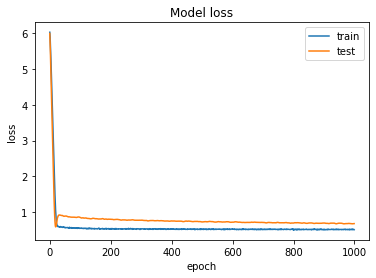

2.003997691217838
1.4156262540719702
DN- 8  layers; 500 Units; LR- 2e-05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 2s 784us/sample - loss: 5.9837 - mean_squared_error: 43.2947 - val_loss: 5.9296 - val_mean_squared_error: 42.5864
Epoch 2/1000
2562/2562 [==============================] - 0s 152us/sample - loss: 5.8796 - mean_squared_error: 41.9621 - val_loss: 5.6989 - val_mean_squared_error: 39.6837
Epoch 3/1000
2562/2562 [==============================] - 0s 148us/sample - loss: 5.6543 - mean_squared_error: 39.1721 - val_loss: 5.4044 - val_mean_squared_error: 36.1326
Epoch 4/1000
2562/2562 [==============================] - 0s 147us/sample - loss: 5.4298 - mean_squared_error: 36.4440 - val_loss: 5.0774 - val_mean_squared_error: 32.3946
Epoch 5/1000
2562/2562 [==============================] - 0s 147us/sample - loss: 5.1406 - mean_squared_error: 33.1432 - val_loss: 4.7347 - val_mean_squared_error: 28.7072
Epoc

2562/2562 [==============================] - 0s 112us/sample - loss: 0.5388 - mean_squared_error: 1.3939 - val_loss: 0.8984 - val_mean_squared_error: 2.7152
Epoch 49/1000
2562/2562 [==============================] - 0s 112us/sample - loss: 0.5433 - mean_squared_error: 1.4154 - val_loss: 0.8996 - val_mean_squared_error: 2.7196
Epoch 50/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.5509 - mean_squared_error: 1.4444 - val_loss: 0.9008 - val_mean_squared_error: 2.7237
Epoch 51/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.5478 - mean_squared_error: 1.4201 - val_loss: 0.9019 - val_mean_squared_error: 2.7277
Epoch 52/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.5435 - mean_squared_error: 1.4191 - val_loss: 0.9007 - val_mean_squared_error: 2.7231
Epoch 53/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.5433 - mean_squared_error: 1.4139 - val_loss: 0.8992 - val_mean_squared_er

2562/2562 [==============================] - 0s 101us/sample - loss: 0.5031 - mean_squared_error: 1.2886 - val_loss: 0.8476 - val_mean_squared_error: 2.5260
Epoch 97/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.5082 - mean_squared_error: 1.3259 - val_loss: 0.8501 - val_mean_squared_error: 2.5347
Epoch 98/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 0.5050 - mean_squared_error: 1.2903 - val_loss: 0.8493 - val_mean_squared_error: 2.5315
Epoch 99/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.5075 - mean_squared_error: 1.2983 - val_loss: 0.8509 - val_mean_squared_error: 2.5370
Epoch 100/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 0.5271 - mean_squared_error: 1.3713 - val_loss: 0.8494 - val_mean_squared_error: 2.5318
Epoch 101/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.5052 - mean_squared_error: 1.2967 - val_loss: 0.8452 - val_mean_squared_

Epoch 144/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 0.4975 - mean_squared_error: 1.2792 - val_loss: 0.8122 - val_mean_squared_error: 2.3977
Epoch 145/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 0.5015 - mean_squared_error: 1.2928 - val_loss: 0.8148 - val_mean_squared_error: 2.4065
Epoch 146/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.4949 - mean_squared_error: 1.2555 - val_loss: 0.8159 - val_mean_squared_error: 2.4102
Epoch 147/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.5061 - mean_squared_error: 1.3114 - val_loss: 0.8164 - val_mean_squared_error: 2.4118
Epoch 148/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.5024 - mean_squared_error: 1.2862 - val_loss: 0.8153 - val_mean_squared_error: 2.4081
Epoch 149/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4880 - mean_squared_error: 1.2381 - val_loss: 0.8123 -

2562/2562 [==============================] - 0s 109us/sample - loss: 0.4932 - mean_squared_error: 1.2763 - val_loss: 0.7971 - val_mean_squared_error: 2.3427
Epoch 192/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.4911 - mean_squared_error: 1.2665 - val_loss: 0.7955 - val_mean_squared_error: 2.3373
Epoch 193/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4884 - mean_squared_error: 1.2553 - val_loss: 0.7925 - val_mean_squared_error: 2.3269
Epoch 194/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4991 - mean_squared_error: 1.2941 - val_loss: 0.7898 - val_mean_squared_error: 2.3178
Epoch 195/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4858 - mean_squared_error: 1.2505 - val_loss: 0.7881 - val_mean_squared_error: 2.3119
Epoch 196/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4917 - mean_squared_error: 1.2591 - val_loss: 0.7860 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.4822 - mean_squared_error: 1.2448 - val_loss: 0.7765 - val_mean_squared_error: 2.2703
Epoch 240/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.4944 - mean_squared_error: 1.2789 - val_loss: 0.7758 - val_mean_squared_error: 2.2679
Epoch 241/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 0.4788 - mean_squared_error: 1.2198 - val_loss: 0.7747 - val_mean_squared_error: 2.2644
Epoch 242/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4821 - mean_squared_error: 1.2428 - val_loss: 0.7712 - val_mean_squared_error: 2.2526
Epoch 243/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.4855 - mean_squared_error: 1.2434 - val_loss: 0.7692 - val_mean_squared_error: 2.2458
Epoch 244/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4814 - mean_squared_error: 1.2177 - val_loss: 0.7693 - 

2562/2562 [==============================] - 0s 108us/sample - loss: 0.4888 - mean_squared_error: 1.2537 - val_loss: 0.7682 - val_mean_squared_error: 2.2406
Epoch 287/1000
2562/2562 [==============================] - 0s 112us/sample - loss: 0.4802 - mean_squared_error: 1.2234 - val_loss: 0.7698 - val_mean_squared_error: 2.2461
Epoch 288/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.4880 - mean_squared_error: 1.2537 - val_loss: 0.7686 - val_mean_squared_error: 2.2419
Epoch 289/1000
2562/2562 [==============================] - 0s 109us/sample - loss: 0.4839 - mean_squared_error: 1.2428 - val_loss: 0.7649 - val_mean_squared_error: 2.2294
Epoch 290/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4914 - mean_squared_error: 1.2697 - val_loss: 0.7626 - val_mean_squared_error: 2.2216
Epoch 291/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4881 - mean_squared_error: 1.2544 - val_loss: 0.7629 - val_mean_squar

Epoch 334/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.4802 - mean_squared_error: 1.2287 - val_loss: 0.7600 - val_mean_squared_error: 2.2117
Epoch 335/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.4773 - mean_squared_error: 1.2254 - val_loss: 0.7584 - val_mean_squared_error: 2.2062
Epoch 336/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4798 - mean_squared_error: 1.2177 - val_loss: 0.7572 - val_mean_squared_error: 2.2023
Epoch 337/1000
2562/2562 [==============================] - 0s 130us/sample - loss: 0.4924 - mean_squared_error: 1.2532 - val_loss: 0.7571 - val_mean_squared_error: 2.2020
Epoch 338/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.4698 - mean_squared_error: 1.1932 - val_loss: 0.7558 - val_mean_squared_error: 2.1977
Epoch 339/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4840 - mean_squared_error: 1.2387 - val_loss: 0.7538 -

2562/2562 [==============================] - 0s 148us/sample - loss: 0.4911 - mean_squared_error: 1.2663 - val_loss: 0.7502 - val_mean_squared_error: 2.1778
Epoch 382/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4830 - mean_squared_error: 1.2417 - val_loss: 0.7480 - val_mean_squared_error: 2.1703
Epoch 383/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.4799 - mean_squared_error: 1.2300 - val_loss: 0.7476 - val_mean_squared_error: 2.1689
Epoch 384/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.4853 - mean_squared_error: 1.2458 - val_loss: 0.7499 - val_mean_squared_error: 2.1767
Epoch 385/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4714 - mean_squared_error: 1.2012 - val_loss: 0.7506 - val_mean_squared_error: 2.1790
Epoch 386/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.4696 - mean_squared_error: 1.1906 - val_loss: 0.7494 - val_mean_squar

Epoch 429/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4726 - mean_squared_error: 1.2109 - val_loss: 0.7492 - val_mean_squared_error: 2.1736
Epoch 430/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 0.4795 - mean_squared_error: 1.2274 - val_loss: 0.7457 - val_mean_squared_error: 2.1619
Epoch 431/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.4761 - mean_squared_error: 1.2257 - val_loss: 0.7398 - val_mean_squared_error: 2.1424
Epoch 432/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 0.4818 - mean_squared_error: 1.2271 - val_loss: 0.7356 - val_mean_squared_error: 2.1283
Epoch 433/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 0.4757 - mean_squared_error: 1.2127 - val_loss: 0.7341 - val_mean_squared_error: 2.1233
Epoch 434/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4841 - mean_squared_error: 1.2345 - val_loss: 0.7327 - va

Epoch 477/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.4864 - mean_squared_error: 1.2413 - val_loss: 0.7320 - val_mean_squared_error: 2.1159
Epoch 478/1000
2562/2562 [==============================] - 0s 111us/sample - loss: 0.4757 - mean_squared_error: 1.2160 - val_loss: 0.7335 - val_mean_squared_error: 2.1207
Epoch 479/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4723 - mean_squared_error: 1.2124 - val_loss: 0.7341 - val_mean_squared_error: 2.1226
Epoch 480/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.4709 - mean_squared_error: 1.1935 - val_loss: 0.7333 - val_mean_squared_error: 2.1201
Epoch 481/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.4724 - mean_squared_error: 1.2108 - val_loss: 0.7312 - val_mean_squared_error: 2.1131
Epoch 482/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4771 - mean_squared_error: 1.2282 - val_loss: 0.7306 -

Epoch 525/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4703 - mean_squared_error: 1.2029 - val_loss: 0.7248 - val_mean_squared_error: 2.0911
Epoch 526/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4789 - mean_squared_error: 1.2401 - val_loss: 0.7261 - val_mean_squared_error: 2.0955
Epoch 527/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 0.4648 - mean_squared_error: 1.1838 - val_loss: 0.7303 - val_mean_squared_error: 2.1094
Epoch 528/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4719 - mean_squared_error: 1.2125 - val_loss: 0.7308 - val_mean_squared_error: 2.1112
Epoch 529/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.4851 - mean_squared_error: 1.2480 - val_loss: 0.7277 - val_mean_squared_error: 2.1008
Epoch 530/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4873 - mean_squared_error: 1.2416 - val_loss: 0.7241 -

2562/2562 [==============================] - 0s 108us/sample - loss: 0.4771 - mean_squared_error: 1.2170 - val_loss: 0.7123 - val_mean_squared_error: 2.0496
Epoch 573/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.4716 - mean_squared_error: 1.2032 - val_loss: 0.7145 - val_mean_squared_error: 2.0566
Epoch 574/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.4730 - mean_squared_error: 1.2163 - val_loss: 0.7164 - val_mean_squared_error: 2.0630
Epoch 575/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.4740 - mean_squared_error: 1.2175 - val_loss: 0.7181 - val_mean_squared_error: 2.0687
Epoch 576/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.4780 - mean_squared_error: 1.2214 - val_loss: 0.7175 - val_mean_squared_error: 2.0666
Epoch 577/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.4678 - mean_squared_error: 1.1867 - val_loss: 0.7160 - val_mean_squar

Epoch 620/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.4664 - mean_squared_error: 1.1975 - val_loss: 0.7088 - val_mean_squared_error: 2.0374
Epoch 621/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.4721 - mean_squared_error: 1.2112 - val_loss: 0.7075 - val_mean_squared_error: 2.0330
Epoch 622/1000
2562/2562 [==============================] - 0s 98us/sample - loss: 0.4886 - mean_squared_error: 1.2590 - val_loss: 0.7081 - val_mean_squared_error: 2.0351
Epoch 623/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4667 - mean_squared_error: 1.1910 - val_loss: 0.7069 - val_mean_squared_error: 2.0310
Epoch 624/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4699 - mean_squared_error: 1.2048 - val_loss: 0.7057 - val_mean_squared_error: 2.0269
Epoch 625/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4683 - mean_squared_error: 1.1866 - val_loss: 0.7054 - 

2562/2562 [==============================] - 0s 112us/sample - loss: 0.4714 - mean_squared_error: 1.1975 - val_loss: 0.6998 - val_mean_squared_error: 2.0075
Epoch 668/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.4745 - mean_squared_error: 1.2104 - val_loss: 0.7007 - val_mean_squared_error: 2.0103
Epoch 669/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4718 - mean_squared_error: 1.2071 - val_loss: 0.7012 - val_mean_squared_error: 2.0119
Epoch 670/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4749 - mean_squared_error: 1.2116 - val_loss: 0.6988 - val_mean_squared_error: 2.0042
Epoch 671/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4696 - mean_squared_error: 1.1846 - val_loss: 0.6959 - val_mean_squared_error: 1.9944
Epoch 672/1000
2562/2562 [==============================] - 0s 107us/sample - loss: 0.4730 - mean_squared_error: 1.2132 - val_loss: 0.6952 - val_mean_squar

Epoch 715/1000
2562/2562 [==============================] - 0s 106us/sample - loss: 0.4751 - mean_squared_error: 1.2237 - val_loss: 0.6967 - val_mean_squared_error: 1.9970
Epoch 716/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.4729 - mean_squared_error: 1.2055 - val_loss: 0.6976 - val_mean_squared_error: 2.0000
Epoch 717/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4678 - mean_squared_error: 1.2038 - val_loss: 0.7002 - val_mean_squared_error: 2.0083
Epoch 718/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.4631 - mean_squared_error: 1.1819 - val_loss: 0.7015 - val_mean_squared_error: 2.0128
Epoch 719/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4682 - mean_squared_error: 1.1986 - val_loss: 0.7033 - val_mean_squared_error: 2.0187
Epoch 720/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.4738 - mean_squared_error: 1.2127 - val_loss: 0.7038 -

2562/2562 [==============================] - 0s 145us/sample - loss: 0.4769 - mean_squared_error: 1.2233 - val_loss: 0.6914 - val_mean_squared_error: 1.9792
Epoch 763/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.4759 - mean_squared_error: 1.2161 - val_loss: 0.6918 - val_mean_squared_error: 1.9806
Epoch 764/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4759 - mean_squared_error: 1.2308 - val_loss: 0.6914 - val_mean_squared_error: 1.9792
Epoch 765/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.4769 - mean_squared_error: 1.2081 - val_loss: 0.6912 - val_mean_squared_error: 1.9787
Epoch 766/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.4667 - mean_squared_error: 1.1906 - val_loss: 0.6936 - val_mean_squared_error: 1.9865
Epoch 767/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.4760 - mean_squared_error: 1.2047 - val_loss: 0.6958 - val_mean_squar

Epoch 810/1000
2562/2562 [==============================] - 0s 153us/sample - loss: 0.4678 - mean_squared_error: 1.1901 - val_loss: 0.6827 - val_mean_squared_error: 1.9504
Epoch 811/1000
2562/2562 [==============================] - 0s 152us/sample - loss: 0.4596 - mean_squared_error: 1.1711 - val_loss: 0.6798 - val_mean_squared_error: 1.9409
Epoch 812/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4745 - mean_squared_error: 1.2075 - val_loss: 0.6771 - val_mean_squared_error: 1.9323
Epoch 813/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4685 - mean_squared_error: 1.1987 - val_loss: 0.6747 - val_mean_squared_error: 1.9244
Epoch 814/1000
2562/2562 [==============================] - 0s 149us/sample - loss: 0.4667 - mean_squared_error: 1.1975 - val_loss: 0.6743 - val_mean_squared_error: 1.9231
Epoch 815/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.4804 - mean_squared_error: 1.2209 - val_loss: 0.6747 -

2562/2562 [==============================] - 0s 107us/sample - loss: 0.4801 - mean_squared_error: 1.2243 - val_loss: 0.6798 - val_mean_squared_error: 1.9408
Epoch 858/1000
2562/2562 [==============================] - 0s 99us/sample - loss: 0.4716 - mean_squared_error: 1.1998 - val_loss: 0.6804 - val_mean_squared_error: 1.9429
Epoch 859/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4700 - mean_squared_error: 1.2096 - val_loss: 0.6817 - val_mean_squared_error: 1.9471
Epoch 860/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 0.4632 - mean_squared_error: 1.1785 - val_loss: 0.6819 - val_mean_squared_error: 1.9476
Epoch 861/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 0.4539 - mean_squared_error: 1.1560 - val_loss: 0.6791 - val_mean_squared_error: 1.9384
Epoch 862/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4723 - mean_squared_error: 1.2061 - val_loss: 0.6778 - val_mean_square

Epoch 905/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4676 - mean_squared_error: 1.1964 - val_loss: 0.6789 - val_mean_squared_error: 1.9376
Epoch 906/1000
2562/2562 [==============================] - 0s 104us/sample - loss: 0.4719 - mean_squared_error: 1.2060 - val_loss: 0.6781 - val_mean_squared_error: 1.9351
Epoch 907/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4664 - mean_squared_error: 1.1864 - val_loss: 0.6769 - val_mean_squared_error: 1.9310
Epoch 908/1000
2562/2562 [==============================] - 0s 100us/sample - loss: 0.4596 - mean_squared_error: 1.1651 - val_loss: 0.6751 - val_mean_squared_error: 1.9253
Epoch 909/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 0.4669 - mean_squared_error: 1.1810 - val_loss: 0.6744 - val_mean_squared_error: 1.9230
Epoch 910/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.4721 - mean_squared_error: 1.2171 - val_loss: 0.6735 -

2562/2562 [==============================] - 0s 103us/sample - loss: 0.4598 - mean_squared_error: 1.1720 - val_loss: 0.6688 - val_mean_squared_error: 1.9045
Epoch 953/1000
2562/2562 [==============================] - 0s 101us/sample - loss: 0.4690 - mean_squared_error: 1.1932 - val_loss: 0.6693 - val_mean_squared_error: 1.9062
Epoch 954/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4709 - mean_squared_error: 1.2116 - val_loss: 0.6696 - val_mean_squared_error: 1.9070
Epoch 955/1000
2562/2562 [==============================] - 0s 103us/sample - loss: 0.4679 - mean_squared_error: 1.1909 - val_loss: 0.6698 - val_mean_squared_error: 1.9078
Epoch 956/1000
2562/2562 [==============================] - 0s 108us/sample - loss: 0.4634 - mean_squared_error: 1.1743 - val_loss: 0.6695 - val_mean_squared_error: 1.9069
Epoch 957/1000
2562/2562 [==============================] - 0s 102us/sample - loss: 0.4709 - mean_squared_error: 1.1989 - val_loss: 0.6692 - val_mean_squar

Epoch 1000/1000
2562/2562 [==============================] - 0s 105us/sample - loss: 0.4757 - mean_squared_error: 1.2173 - val_loss: 0.6736 - val_mean_squared_error: 1.9200


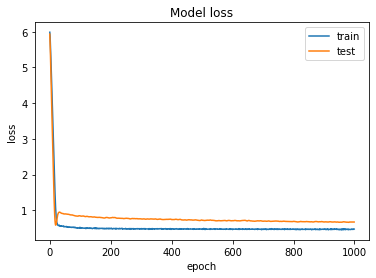

2.126483643960736
1.4582467705984252
DN- 9  layers; 300 Units; LR- 0.05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 2s 819us/sample - loss: 4.7007 - mean_squared_error: 35.0959 - val_loss: 1.3771 - val_mean_squared_error: 4.4113
Epoch 2/1000
2562/2562 [==============================] - 0s 125us/sample - loss: 2.6257 - mean_squared_error: 17.2200 - val_loss: 9.4812 - val_mean_squared_error: 100.1882
Epoch 3/1000
2562/2562 [==============================] - 0s 125us/sample - loss: 6.0394 - mean_squared_error: 54.1353 - val_loss: 4.5984 - val_mean_squared_error: 26.8394
Epoch 4/1000
2562/2562 [==============================] - 0s 127us/sample - loss: 5.7470 - mean_squared_error: 41.0137 - val_loss: 5.3092 - val_mean_squared_error: 34.5432
Epoch 5/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 5.9070 - mean_squared_error: 42.9452 - val_loss: 6.0664 - val_mean_squared_error: 43.8629
E

2562/2562 [==============================] - 0s 137us/sample - loss: 6.4999 - mean_squared_error: 52.0161 - val_loss: 5.9014 - val_mean_squared_error: 41.7233
Epoch 48/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 6.3906 - mean_squared_error: 50.4898 - val_loss: 6.4754 - val_mean_squared_error: 49.3644
Epoch 49/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 6.5193 - mean_squared_error: 52.3642 - val_loss: 5.7929 - val_mean_squared_error: 40.3527
Epoch 50/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 6.3875 - mean_squared_error: 50.7882 - val_loss: 5.8991 - val_mean_squared_error: 41.6931
Epoch 51/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 6.4173 - mean_squared_error: 51.1703 - val_loss: 6.1771 - val_mean_squared_error: 45.3113
Epoch 52/1000
2562/2562 [==============================] - 0s 126us/sample - loss: 6.4142 - mean_squared_error: 51.0421 - val_loss: 6.1528 - val_mean

2562/2562 [==============================] - 0s 129us/sample - loss: 6.1961 - mean_squared_error: 48.3064 - val_loss: 5.6728 - val_mean_squared_error: 38.8623
Epoch 95/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 6.0241 - mean_squared_error: 46.2981 - val_loss: 5.8245 - val_mean_squared_error: 40.7486
Epoch 96/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 6.0438 - mean_squared_error: 46.3969 - val_loss: 6.6765 - val_mean_squared_error: 52.1982
Epoch 97/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 6.3479 - mean_squared_error: 51.5755 - val_loss: 4.9501 - val_mean_squared_error: 30.5089
Epoch 98/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 6.0640 - mean_squared_error: 47.4272 - val_loss: 6.5380 - val_mean_squared_error: 50.2374
Epoch 99/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 6.1909 - mean_squared_error: 48.4528 - val_loss: 5.8364 - val_mean

2562/2562 [==============================] - 0s 126us/sample - loss: 6.0449 - mean_squared_error: 46.6797 - val_loss: 6.0397 - val_mean_squared_error: 43.5025
Epoch 142/1000
2562/2562 [==============================] - 0s 126us/sample - loss: 6.0864 - mean_squared_error: 47.1130 - val_loss: 5.8862 - val_mean_squared_error: 41.5286
Epoch 143/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 6.0324 - mean_squared_error: 46.4446 - val_loss: 6.1928 - val_mean_squared_error: 45.5191
Epoch 144/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 6.1875 - mean_squared_error: 48.7164 - val_loss: 5.0046 - val_mean_squared_error: 31.1015
Epoch 145/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 6.0505 - mean_squared_error: 46.9619 - val_loss: 5.9224 - val_mean_squared_error: 41.9897
Epoch 146/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 6.0672 - mean_squared_error: 47.2497 - val_loss: 6.8554 - val

2562/2562 [==============================] - 0s 129us/sample - loss: 5.9082 - mean_squared_error: 46.5857 - val_loss: 6.5305 - val_mean_squared_error: 50.1301
Epoch 189/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 6.0081 - mean_squared_error: 45.9638 - val_loss: 5.9325 - val_mean_squared_error: 42.1177
Epoch 190/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 6.0905 - mean_squared_error: 47.3038 - val_loss: 5.3882 - val_mean_squared_error: 35.4463
Epoch 191/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 5.9630 - mean_squared_error: 45.7641 - val_loss: 6.0442 - val_mean_squared_error: 43.5600
Epoch 192/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 5.9920 - mean_squared_error: 46.0768 - val_loss: 6.1042 - val_mean_squared_error: 44.3443
Epoch 193/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 6.1935 - mean_squared_error: 49.2813 - val_loss: 5.2591 - val

2562/2562 [==============================] - 0s 129us/sample - loss: 5.4970 - mean_squared_error: 39.6468 - val_loss: 5.4144 - val_mean_squared_error: 35.7519
Epoch 236/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 5.5501 - mean_squared_error: 40.2762 - val_loss: 5.3413 - val_mean_squared_error: 34.8973
Epoch 237/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 5.4914 - mean_squared_error: 39.5841 - val_loss: 5.6236 - val_mean_squared_error: 38.2578
Epoch 238/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 5.5173 - mean_squared_error: 40.0183 - val_loss: 5.9621 - val_mean_squared_error: 42.4957
Epoch 239/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 5.6758 - mean_squared_error: 41.8915 - val_loss: 4.8423 - val_mean_squared_error: 29.3485
Epoch 240/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 5.5491 - mean_squared_error: 40.2095 - val_loss: 5.2908 - val

Epoch 282/1000
2562/2562 [==============================] - 0s 127us/sample - loss: 4.9776 - mean_squared_error: 33.7220 - val_loss: 4.3191 - val_mean_squared_error: 24.0576
Epoch 283/1000
2562/2562 [==============================] - 0s 126us/sample - loss: 5.0243 - mean_squared_error: 33.8893 - val_loss: 4.2600 - val_mean_squared_error: 23.5024
Epoch 284/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 4.8708 - mean_squared_error: 32.0187 - val_loss: 4.7856 - val_mean_squared_error: 28.7473
Epoch 285/1000
2562/2562 [==============================] - 0s 127us/sample - loss: 4.9537 - mean_squared_error: 32.8087 - val_loss: 4.2661 - val_mean_squared_error: 23.5601
Epoch 286/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 4.8752 - mean_squared_error: 32.3893 - val_loss: 4.4049 - val_mean_squared_error: 24.8879
Epoch 287/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 4.7935 - mean_squared_error: 31.2105 - val_los

Epoch 329/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 4.0269 - mean_squared_error: 23.1942 - val_loss: 4.4552 - val_mean_squared_error: 25.3852
Epoch 330/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 4.0428 - mean_squared_error: 23.3640 - val_loss: 4.6216 - val_mean_squared_error: 27.0486
Epoch 331/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 4.2058 - mean_squared_error: 25.3900 - val_loss: 3.4650 - val_mean_squared_error: 16.6159
Epoch 332/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 4.1972 - mean_squared_error: 24.9202 - val_loss: 3.0815 - val_mean_squared_error: 13.6636
Epoch 333/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 4.0488 - mean_squared_error: 23.3777 - val_loss: 3.1756 - val_mean_squared_error: 14.4235
Epoch 334/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 3.7499 - mean_squared_error: 21.3824 - val_los

2562/2562 [==============================] - 0s 123us/sample - loss: 3.4473 - mean_squared_error: 17.8234 - val_loss: 2.8427 - val_mean_squared_error: 11.9963
Epoch 377/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 3.5080 - mean_squared_error: 17.9479 - val_loss: 2.4203 - val_mean_squared_error: 9.4862
Epoch 378/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 3.3348 - mean_squared_error: 17.0016 - val_loss: 3.2956 - val_mean_squared_error: 15.2498
Epoch 379/1000
2562/2562 [==============================] - 0s 125us/sample - loss: 3.3336 - mean_squared_error: 16.4714 - val_loss: 3.2158 - val_mean_squared_error: 14.7175
Epoch 380/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 3.3018 - mean_squared_error: 16.4583 - val_loss: 4.1274 - val_mean_squared_error: 22.2510
Epoch 381/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 3.3917 - mean_squared_error: 17.1766 - val_loss: 3.6157 - val_

2562/2562 [==============================] - 0s 124us/sample - loss: 3.2200 - mean_squared_error: 15.5578 - val_loss: 1.9184 - val_mean_squared_error: 6.8063
Epoch 424/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 3.1217 - mean_squared_error: 14.9420 - val_loss: 2.3604 - val_mean_squared_error: 8.9631
Epoch 425/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 3.2315 - mean_squared_error: 15.5787 - val_loss: 2.5198 - val_mean_squared_error: 10.0717
Epoch 426/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 3.1331 - mean_squared_error: 15.0913 - val_loss: 3.5467 - val_mean_squared_error: 17.2224
Epoch 427/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 3.2745 - mean_squared_error: 15.6828 - val_loss: 2.8373 - val_mean_squared_error: 12.0715
Epoch 428/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 3.1057 - mean_squared_error: 14.4323 - val_loss: 3.4580 - val_m

2562/2562 [==============================] - 0s 120us/sample - loss: 2.7057 - mean_squared_error: 11.8955 - val_loss: 2.7172 - val_mean_squared_error: 11.1628
Epoch 471/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 2.7079 - mean_squared_error: 11.7514 - val_loss: 1.8048 - val_mean_squared_error: 6.2610
Epoch 472/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 2.5842 - mean_squared_error: 10.9795 - val_loss: 2.8003 - val_mean_squared_error: 11.7102
Epoch 473/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 2.7940 - mean_squared_error: 12.0897 - val_loss: 2.3863 - val_mean_squared_error: 9.2883
Epoch 474/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 2.6968 - mean_squared_error: 11.5862 - val_loss: 3.0389 - val_mean_squared_error: 13.3560
Epoch 475/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 2.7046 - mean_squared_error: 11.6120 - val_loss: 2.3525 - val_m

2562/2562 [==============================] - 0s 124us/sample - loss: 2.5546 - mean_squared_error: 10.7873 - val_loss: 2.3184 - val_mean_squared_error: 8.9029
Epoch 518/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 2.5779 - mean_squared_error: 10.6683 - val_loss: 3.0324 - val_mean_squared_error: 13.3093
Epoch 519/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 2.7009 - mean_squared_error: 11.8032 - val_loss: 2.2449 - val_mean_squared_error: 8.4956
Epoch 520/1000
2562/2562 [==============================] - 0s 113us/sample - loss: 2.6170 - mean_squared_error: 10.9336 - val_loss: 2.3547 - val_mean_squared_error: 8.9293
Epoch 521/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 2.5390 - mean_squared_error: 10.6309 - val_loss: 2.0762 - val_mean_squared_error: 7.5988
Epoch 522/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 2.4276 - mean_squared_error: 9.8190 - val_loss: 2.5726 - val_mean

2562/2562 [==============================] - 0s 123us/sample - loss: 2.3054 - mean_squared_error: 9.0887 - val_loss: 2.1897 - val_mean_squared_error: 7.9956
Epoch 565/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 2.4786 - mean_squared_error: 9.9223 - val_loss: 1.5599 - val_mean_squared_error: 5.1568
Epoch 566/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 2.2987 - mean_squared_error: 9.3775 - val_loss: 1.8982 - val_mean_squared_error: 6.4688
Epoch 567/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 2.3355 - mean_squared_error: 9.0899 - val_loss: 1.3334 - val_mean_squared_error: 4.2162
Epoch 568/1000
2562/2562 [==============================] - 0s 114us/sample - loss: 2.3040 - mean_squared_error: 9.3892 - val_loss: 2.2668 - val_mean_squared_error: 8.4250
Epoch 569/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 2.4764 - mean_squared_error: 9.9487 - val_loss: 1.4619 - val_mean_squar

Epoch 612/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 2.1223 - mean_squared_error: 7.9543 - val_loss: 2.3525 - val_mean_squared_error: 8.9159
Epoch 613/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 2.2342 - mean_squared_error: 8.4484 - val_loss: 1.5156 - val_mean_squared_error: 4.9667
Epoch 614/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 2.1471 - mean_squared_error: 8.2041 - val_loss: 2.2259 - val_mean_squared_error: 8.1955
Epoch 615/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 2.2077 - mean_squared_error: 8.3467 - val_loss: 1.8350 - val_mean_squared_error: 6.4033
Epoch 616/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 2.1828 - mean_squared_error: 8.2554 - val_loss: 2.7607 - val_mean_squared_error: 11.4466
Epoch 617/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 2.1789 - mean_squared_error: 8.4100 - val_loss: 2.1276 

2562/2562 [==============================] - 0s 122us/sample - loss: 2.0147 - mean_squared_error: 7.2689 - val_loss: 1.7295 - val_mean_squared_error: 5.9110
Epoch 660/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 1.8828 - mean_squared_error: 6.7115 - val_loss: 1.8925 - val_mean_squared_error: 6.4402
Epoch 661/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 1.9799 - mean_squared_error: 7.0780 - val_loss: 1.3181 - val_mean_squared_error: 4.1551
Epoch 662/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 2.0271 - mean_squared_error: 7.5025 - val_loss: 2.2610 - val_mean_squared_error: 8.3920
Epoch 663/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 2.0297 - mean_squared_error: 7.5188 - val_loss: 1.9239 - val_mean_squared_error: 6.8318
Epoch 664/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.9536 - mean_squared_error: 7.0476 - val_loss: 2.3025 - val_mean_squar

Epoch 707/1000
2562/2562 [==============================] - 0s 126us/sample - loss: 1.8961 - mean_squared_error: 6.6857 - val_loss: 1.5018 - val_mean_squared_error: 4.9083
Epoch 708/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 1.7812 - mean_squared_error: 6.1379 - val_loss: 1.7881 - val_mean_squared_error: 5.9313
Epoch 709/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.8313 - mean_squared_error: 6.3661 - val_loss: 1.8450 - val_mean_squared_error: 6.4507
Epoch 710/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 1.6749 - mean_squared_error: 5.6501 - val_loss: 1.8307 - val_mean_squared_error: 6.1365
Epoch 711/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 1.8102 - mean_squared_error: 6.2386 - val_loss: 1.2909 - val_mean_squared_error: 4.0475
Epoch 712/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 1.8179 - mean_squared_error: 6.4111 - val_loss: 1.8863 -

2562/2562 [==============================] - 0s 124us/sample - loss: 1.7035 - mean_squared_error: 5.7801 - val_loss: 1.8906 - val_mean_squared_error: 6.4310
Epoch 755/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 1.7175 - mean_squared_error: 5.7796 - val_loss: 1.4785 - val_mean_squared_error: 4.8102
Epoch 756/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 1.7332 - mean_squared_error: 5.9439 - val_loss: 1.3850 - val_mean_squared_error: 4.1406
Epoch 757/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 1.8545 - mean_squared_error: 6.4960 - val_loss: 1.3899 - val_mean_squared_error: 4.4439
Epoch 758/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 1.7002 - mean_squared_error: 5.7756 - val_loss: 2.3706 - val_mean_squared_error: 9.0216
Epoch 759/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 1.4862 - mean_squared_error: 4.9017 - val_loss: 1.4513 - val_mean_squar

Epoch 802/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 1.6014 - mean_squared_error: 5.2754 - val_loss: 1.9491 - val_mean_squared_error: 6.7245
Epoch 803/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 1.5461 - mean_squared_error: 4.9950 - val_loss: 1.2571 - val_mean_squared_error: 3.9153
Epoch 804/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 1.5156 - mean_squared_error: 4.9228 - val_loss: 1.4511 - val_mean_squared_error: 4.4155
Epoch 805/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 1.6194 - mean_squared_error: 5.3483 - val_loss: 1.5503 - val_mean_squared_error: 5.1155
Epoch 806/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 1.5403 - mean_squared_error: 5.0461 - val_loss: 1.9651 - val_mean_squared_error: 6.8056
Epoch 807/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 1.4616 - mean_squared_error: 4.6741 - val_loss: 1.3382 -

2562/2562 [==============================] - 0s 127us/sample - loss: 1.2876 - mean_squared_error: 3.9264 - val_loss: 1.0766 - val_mean_squared_error: 3.2300
Epoch 850/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 1.4585 - mean_squared_error: 4.6932 - val_loss: 1.5677 - val_mean_squared_error: 4.9186
Epoch 851/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.5582 - mean_squared_error: 5.0240 - val_loss: 1.2285 - val_mean_squared_error: 3.8044
Epoch 852/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 1.4300 - mean_squared_error: 4.5505 - val_loss: 1.3725 - val_mean_squared_error: 4.0896
Epoch 853/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 1.5167 - mean_squared_error: 4.8632 - val_loss: 1.1956 - val_mean_squared_error: 3.6780
Epoch 854/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.5259 - mean_squared_error: 4.9659 - val_loss: 1.9962 - val_mean_squar

Epoch 897/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 1.4100 - mean_squared_error: 4.4020 - val_loss: 0.8641 - val_mean_squared_error: 2.4673
Epoch 898/1000
2562/2562 [==============================] - 0s 126us/sample - loss: 1.2474 - mean_squared_error: 3.8390 - val_loss: 1.4645 - val_mean_squared_error: 4.4727
Epoch 899/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 1.4179 - mean_squared_error: 4.4336 - val_loss: 1.2679 - val_mean_squared_error: 3.9579
Epoch 900/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 1.4263 - mean_squared_error: 4.5238 - val_loss: 1.5201 - val_mean_squared_error: 4.7106
Epoch 901/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 1.4096 - mean_squared_error: 4.3726 - val_loss: 1.1255 - val_mean_squared_error: 3.4126
Epoch 902/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.2695 - mean_squared_error: 3.8987 - val_loss: 1.1340 -

2562/2562 [==============================] - 0s 120us/sample - loss: 0.6113 - mean_squared_error: 1.5011 - val_loss: 0.7754 - val_mean_squared_error: 2.1614
Epoch 945/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 0.6176 - mean_squared_error: 1.5745 - val_loss: 0.7423 - val_mean_squared_error: 2.0488
Epoch 946/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 0.5766 - mean_squared_error: 1.4608 - val_loss: 0.4883 - val_mean_squared_error: 1.1525
Epoch 947/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 0.5407 - mean_squared_error: 1.3106 - val_loss: 0.5022 - val_mean_squared_error: 1.1683
Epoch 948/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 0.5747 - mean_squared_error: 1.4400 - val_loss: 0.6766 - val_mean_squared_error: 1.8272
Epoch 949/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 0.5808 - mean_squared_error: 1.4385 - val_loss: 0.8879 - val_mean_squar

2562/2562 [==============================] - 0s 128us/sample - loss: 0.8054 - mean_squared_error: 2.1855 - val_loss: 0.6035 - val_mean_squared_error: 1.5821
Epoch 992/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 0.7974 - mean_squared_error: 2.1579 - val_loss: 0.9340 - val_mean_squared_error: 2.4542
Epoch 993/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 0.7124 - mean_squared_error: 1.8256 - val_loss: 0.5611 - val_mean_squared_error: 1.3104
Epoch 994/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 0.6651 - mean_squared_error: 1.6662 - val_loss: 0.6341 - val_mean_squared_error: 1.6850
Epoch 995/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 0.5571 - mean_squared_error: 1.3686 - val_loss: 0.5440 - val_mean_squared_error: 1.3788
Epoch 996/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 0.5410 - mean_squared_error: 1.3138 - val_loss: 0.5468 - val_mean_squar

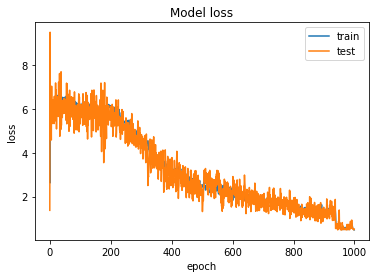

1.40082316172129
1.183563754819017
DN- 9  layers; 300 Units; LR- 0.05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 2s 850us/sample - loss: 5.0342 - mean_squared_error: 41.3686 - val_loss: 1.1501 - val_mean_squared_error: 3.6269
Epoch 2/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 4.0305 - mean_squared_error: 35.9273 - val_loss: 8.5789 - val_mean_squared_error: 83.5757
Epoch 3/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 6.9926 - mean_squared_error: 67.2748 - val_loss: 2.7063 - val_mean_squared_error: 11.3051
Epoch 4/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 5.9133 - mean_squared_error: 49.8989 - val_loss: 6.7152 - val_mean_squared_error: 53.2089
Epoch 5/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 6.3209 - mean_squared_error: 49.2803 - val_loss: 7.1422 - val_mean_squared_error: 59.5532
Epoch 6/

Epoch 48/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 6.1409 - mean_squared_error: 48.8020 - val_loss: 6.0803 - val_mean_squared_error: 44.4504
Epoch 49/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 6.3209 - mean_squared_error: 50.6398 - val_loss: 5.8856 - val_mean_squared_error: 41.9263
Epoch 50/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 6.3629 - mean_squared_error: 51.1234 - val_loss: 5.9911 - val_mean_squared_error: 43.2844
Epoch 51/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 6.1724 - mean_squared_error: 48.5691 - val_loss: 6.1185 - val_mean_squared_error: 44.9550
Epoch 52/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 6.2233 - mean_squared_error: 49.5455 - val_loss: 5.6505 - val_mean_squared_error: 38.9792
Epoch 53/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 6.2367 - mean_squared_error: 49.3906 - val_loss: 6.6

2562/2562 [==============================] - 0s 123us/sample - loss: 6.0881 - mean_squared_error: 47.3563 - val_loss: 5.9362 - val_mean_squared_error: 42.5744
Epoch 96/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 6.1805 - mean_squared_error: 48.8950 - val_loss: 5.3390 - val_mean_squared_error: 35.2442
Epoch 97/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 6.1858 - mean_squared_error: 49.0449 - val_loss: 5.3184 - val_mean_squared_error: 35.0039
Epoch 98/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 6.0567 - mean_squared_error: 47.6342 - val_loss: 6.5773 - val_mean_squared_error: 51.2382
Epoch 99/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 6.1441 - mean_squared_error: 48.0661 - val_loss: 5.7197 - val_mean_squared_error: 39.8350
Epoch 100/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 6.2394 - mean_squared_error: 49.5774 - val_loss: 5.4275 - val_mea

Epoch 142/1000
2562/2562 [==============================] - 0s 130us/sample - loss: 5.8399 - mean_squared_error: 44.2348 - val_loss: 5.7817 - val_mean_squared_error: 40.6104
Epoch 143/1000
2562/2562 [==============================] - 0s 130us/sample - loss: 5.8731 - mean_squared_error: 44.5543 - val_loss: 5.7205 - val_mean_squared_error: 39.8446
Epoch 144/1000
2562/2562 [==============================] - 0s 148us/sample - loss: 6.0570 - mean_squared_error: 47.2750 - val_loss: 4.2711 - val_mean_squared_error: 23.9137
Epoch 145/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 5.6627 - mean_squared_error: 43.6913 - val_loss: 6.1592 - val_mean_squared_error: 45.4950
Epoch 146/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 5.5698 - mean_squared_error: 40.8698 - val_loss: 6.5841 - val_mean_squared_error: 51.3343
Epoch 147/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 5.9752 - mean_squared_error: 46.8073 - val_los

Epoch 189/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 5.9655 - mean_squared_error: 46.6000 - val_loss: 6.1930 - val_mean_squared_error: 45.9467
Epoch 190/1000
2562/2562 [==============================] - 0s 128us/sample - loss: 6.0065 - mean_squared_error: 46.5729 - val_loss: 5.5982 - val_mean_squared_error: 38.3380
Epoch 191/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 5.9882 - mean_squared_error: 46.3419 - val_loss: 6.2918 - val_mean_squared_error: 47.2790
Epoch 192/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 6.1856 - mean_squared_error: 48.9540 - val_loss: 5.3520 - val_mean_squared_error: 35.3964
Epoch 193/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 6.0065 - mean_squared_error: 47.0164 - val_loss: 6.4226 - val_mean_squared_error: 49.0731
Epoch 194/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 6.1272 - mean_squared_error: 48.3604 - val_los

2562/2562 [==============================] - 0s 124us/sample - loss: 5.6019 - mean_squared_error: 41.6535 - val_loss: 4.4937 - val_mean_squared_error: 26.0874
Epoch 237/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 5.3908 - mean_squared_error: 39.6688 - val_loss: 5.7658 - val_mean_squared_error: 40.4105
Epoch 238/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 5.3360 - mean_squared_error: 38.3986 - val_loss: 5.5627 - val_mean_squared_error: 37.9064
Epoch 239/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 5.3422 - mean_squared_error: 38.5100 - val_loss: 5.0185 - val_mean_squared_error: 31.6039
Epoch 240/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 5.3927 - mean_squared_error: 39.3773 - val_loss: 4.7938 - val_mean_squared_error: 29.1745
Epoch 241/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 5.4371 - mean_squared_error: 39.6685 - val_loss: 5.1549 - val

2562/2562 [==============================] - 0s 125us/sample - loss: 4.8907 - mean_squared_error: 32.9464 - val_loss: 4.7920 - val_mean_squared_error: 29.1552
Epoch 284/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 4.9215 - mean_squared_error: 33.4769 - val_loss: 4.5607 - val_mean_squared_error: 26.7607
Epoch 285/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 4.8616 - mean_squared_error: 32.5230 - val_loss: 5.1335 - val_mean_squared_error: 32.8862
Epoch 286/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 4.9874 - mean_squared_error: 34.1341 - val_loss: 4.5777 - val_mean_squared_error: 26.9329
Epoch 287/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 4.9561 - mean_squared_error: 33.5794 - val_loss: 4.4581 - val_mean_squared_error: 25.7295
Epoch 288/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 4.9888 - mean_squared_error: 34.0553 - val_loss: 4.2532 - val

Epoch 330/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 4.2592 - mean_squared_error: 25.8190 - val_loss: 3.8166 - val_mean_squared_error: 19.7833
Epoch 331/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 4.2429 - mean_squared_error: 25.4143 - val_loss: 3.4544 - val_mean_squared_error: 16.7418
Epoch 332/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 4.2826 - mean_squared_error: 26.0769 - val_loss: 3.8414 - val_mean_squared_error: 19.9981
Epoch 333/1000
2562/2562 [==============================] - 0s 126us/sample - loss: 4.1832 - mean_squared_error: 25.0121 - val_loss: 4.7085 - val_mean_squared_error: 28.2774
Epoch 334/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 4.1785 - mean_squared_error: 24.8951 - val_loss: 4.3743 - val_mean_squared_error: 24.9089
Epoch 335/1000
2562/2562 [==============================] - 0s 125us/sample - loss: 4.3140 - mean_squared_error: 26.2206 - val_los

2562/2562 [==============================] - 0s 118us/sample - loss: 3.7611 - mean_squared_error: 20.5190 - val_loss: 3.7617 - val_mean_squared_error: 19.2862
Epoch 378/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 3.8798 - mean_squared_error: 21.6503 - val_loss: 3.2192 - val_mean_squared_error: 14.9825
Epoch 379/1000
2562/2562 [==============================] - 0s 127us/sample - loss: 3.6223 - mean_squared_error: 19.2941 - val_loss: 3.4379 - val_mean_squared_error: 16.6105
Epoch 380/1000
2562/2562 [==============================] - 0s 128us/sample - loss: 3.7104 - mean_squared_error: 20.0337 - val_loss: 2.7485 - val_mean_squared_error: 11.7027
Epoch 381/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 3.6257 - mean_squared_error: 19.7566 - val_loss: 3.5570 - val_mean_squared_error: 17.5711
Epoch 382/1000
2562/2562 [==============================] - 0s 129us/sample - loss: 3.5808 - mean_squared_error: 18.9067 - val_loss: 3.4232 - val

2562/2562 [==============================] - 0s 120us/sample - loss: 3.3736 - mean_squared_error: 17.0580 - val_loss: 2.5476 - val_mean_squared_error: 10.4369
Epoch 425/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 3.2229 - mean_squared_error: 16.2116 - val_loss: 3.2316 - val_mean_squared_error: 15.0109
Epoch 426/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 3.2393 - mean_squared_error: 15.9185 - val_loss: 3.2901 - val_mean_squared_error: 15.5152
Epoch 427/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 3.1985 - mean_squared_error: 15.6192 - val_loss: 4.0105 - val_mean_squared_error: 21.4799
Epoch 428/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 3.1937 - mean_squared_error: 16.1371 - val_loss: 3.2859 - val_mean_squared_error: 15.4837
Epoch 429/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 3.2400 - mean_squared_error: 16.0110 - val_loss: 3.4055 - val

2562/2562 [==============================] - 0s 120us/sample - loss: 2.7838 - mean_squared_error: 12.5998 - val_loss: 2.5774 - val_mean_squared_error: 10.4771
Epoch 472/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 2.8990 - mean_squared_error: 13.1682 - val_loss: 2.1329 - val_mean_squared_error: 8.0681
Epoch 473/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 2.9097 - mean_squared_error: 13.4710 - val_loss: 2.7837 - val_mean_squared_error: 11.8179
Epoch 474/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 2.9804 - mean_squared_error: 13.7388 - val_loss: 2.1496 - val_mean_squared_error: 8.1573
Epoch 475/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 2.7421 - mean_squared_error: 12.2608 - val_loss: 2.9987 - val_mean_squared_error: 13.3026
Epoch 476/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 2.7645 - mean_squared_error: 12.1415 - val_loss: 2.2547 - val_m

2562/2562 [==============================] - 0s 123us/sample - loss: 2.6639 - mean_squared_error: 11.4433 - val_loss: 1.8217 - val_mean_squared_error: 6.4964
Epoch 519/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 2.5508 - mean_squared_error: 11.0079 - val_loss: 2.4803 - val_mean_squared_error: 9.8741
Epoch 520/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 2.5876 - mean_squared_error: 10.9044 - val_loss: 1.9950 - val_mean_squared_error: 7.3505
Epoch 521/1000
2562/2562 [==============================] - 0s 114us/sample - loss: 2.4513 - mean_squared_error: 10.3706 - val_loss: 2.6817 - val_mean_squared_error: 11.1446
Epoch 522/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 2.6237 - mean_squared_error: 11.1716 - val_loss: 2.0336 - val_mean_squared_error: 7.5482
Epoch 523/1000
2562/2562 [==============================] - 0s 113us/sample - loss: 2.4942 - mean_squared_error: 10.4248 - val_loss: 2.9912 - val_mea

2562/2562 [==============================] - 0s 126us/sample - loss: 2.2812 - mean_squared_error: 9.0895 - val_loss: 2.3779 - val_mean_squared_error: 9.2577
Epoch 566/1000
2562/2562 [==============================] - 0s 125us/sample - loss: 2.3716 - mean_squared_error: 9.4449 - val_loss: 1.7239 - val_mean_squared_error: 6.0361
Epoch 567/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 2.2648 - mean_squared_error: 9.0865 - val_loss: 2.5027 - val_mean_squared_error: 10.0113
Epoch 568/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 2.2550 - mean_squared_error: 8.9203 - val_loss: 1.8928 - val_mean_squared_error: 6.8407
Epoch 569/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 2.2351 - mean_squared_error: 8.7758 - val_loss: 2.4662 - val_mean_squared_error: 9.7881
Epoch 570/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 2.3211 - mean_squared_error: 9.2989 - val_loss: 1.7736 - val_mean_squa

Epoch 613/1000
2562/2562 [==============================] - 0s 130us/sample - loss: 1.9495 - mean_squared_error: 7.1689 - val_loss: 2.1951 - val_mean_squared_error: 8.2067
Epoch 614/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 1.9169 - mean_squared_error: 7.0501 - val_loss: 1.9187 - val_mean_squared_error: 6.9682
Epoch 615/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 1.8029 - mean_squared_error: 6.4309 - val_loss: 2.2305 - val_mean_squared_error: 8.4050
Epoch 616/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 1.9790 - mean_squared_error: 7.2807 - val_loss: 1.5851 - val_mean_squared_error: 5.4096
Epoch 617/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 1.9683 - mean_squared_error: 7.3532 - val_loss: 1.7855 - val_mean_squared_error: 6.0767
Epoch 618/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 2.0786 - mean_squared_error: 7.7496 - val_loss: 1.4643 -

2562/2562 [==============================] - 0s 131us/sample - loss: 1.9990 - mean_squared_error: 7.4368 - val_loss: 1.6092 - val_mean_squared_error: 5.5166
Epoch 661/1000
2562/2562 [==============================] - 0s 128us/sample - loss: 1.9321 - mean_squared_error: 7.1187 - val_loss: 2.4112 - val_mean_squared_error: 9.4555
Epoch 662/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.8793 - mean_squared_error: 6.9181 - val_loss: 2.1217 - val_mean_squared_error: 8.0082
Epoch 663/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.8180 - mean_squared_error: 6.5523 - val_loss: 2.4241 - val_mean_squared_error: 9.5331
Epoch 664/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 1.7938 - mean_squared_error: 6.4101 - val_loss: 1.8017 - val_mean_squared_error: 6.4006
Epoch 665/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 1.9079 - mean_squared_error: 6.9453 - val_loss: 2.2833 - val_mean_squar

Epoch 708/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 1.9572 - mean_squared_error: 7.1623 - val_loss: 1.7206 - val_mean_squared_error: 6.0210
Epoch 709/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 1.8550 - mean_squared_error: 6.7472 - val_loss: 1.7218 - val_mean_squared_error: 5.7717
Epoch 710/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 1.9967 - mean_squared_error: 7.3348 - val_loss: 1.6912 - val_mean_squared_error: 5.8858
Epoch 711/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 2.0149 - mean_squared_error: 7.6070 - val_loss: 2.1751 - val_mean_squared_error: 8.0958
Epoch 712/1000
2562/2562 [==============================] - 0s 120us/sample - loss: 1.9696 - mean_squared_error: 7.2354 - val_loss: 1.6210 - val_mean_squared_error: 5.5688
Epoch 713/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 1.7639 - mean_squared_error: 6.2331 - val_loss: 2.0565 -

2562/2562 [==============================] - 0s 127us/sample - loss: 1.7568 - mean_squared_error: 6.2055 - val_loss: 1.8303 - val_mean_squared_error: 6.2952
Epoch 756/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 1.9092 - mean_squared_error: 6.8559 - val_loss: 1.2004 - val_mean_squared_error: 3.8222
Epoch 757/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.8313 - mean_squared_error: 6.6291 - val_loss: 1.8464 - val_mean_squared_error: 6.3745
Epoch 758/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 1.8101 - mean_squared_error: 6.4006 - val_loss: 1.4640 - val_mean_squared_error: 4.8873
Epoch 759/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 1.6863 - mean_squared_error: 5.8250 - val_loss: 1.7563 - val_mean_squared_error: 5.9362
Epoch 760/1000
2562/2562 [==============================] - 0s 152us/sample - loss: 1.7583 - mean_squared_error: 6.1438 - val_loss: 1.4308 - val_mean_squar

Epoch 803/1000
2562/2562 [==============================] - 0s 126us/sample - loss: 1.6963 - mean_squared_error: 5.9500 - val_loss: 1.7887 - val_mean_squared_error: 6.0922
Epoch 804/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.6272 - mean_squared_error: 5.5781 - val_loss: 1.6710 - val_mean_squared_error: 5.7938
Epoch 805/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 1.6928 - mean_squared_error: 5.8711 - val_loss: 2.1870 - val_mean_squared_error: 8.1617
Epoch 806/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 1.6220 - mean_squared_error: 5.5199 - val_loss: 1.5574 - val_mean_squared_error: 5.2884
Epoch 807/1000
2562/2562 [==============================] - 0s 124us/sample - loss: 1.6288 - mean_squared_error: 5.5756 - val_loss: 1.7125 - val_mean_squared_error: 5.7278
Epoch 808/1000
2562/2562 [==============================] - 0s 115us/sample - loss: 1.7726 - mean_squared_error: 6.1613 - val_loss: 1.2783 -

2562/2562 [==============================] - 0s 128us/sample - loss: 1.5467 - mean_squared_error: 5.1107 - val_loss: 1.2726 - val_mean_squared_error: 4.1049
Epoch 851/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 1.5311 - mean_squared_error: 5.1399 - val_loss: 1.5898 - val_mean_squared_error: 5.1625
Epoch 852/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.5501 - mean_squared_error: 5.1204 - val_loss: 1.1672 - val_mean_squared_error: 3.6941
Epoch 853/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 1.5222 - mean_squared_error: 5.1125 - val_loss: 1.7340 - val_mean_squared_error: 5.8294
Epoch 854/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.3943 - mean_squared_error: 4.5300 - val_loss: 1.4453 - val_mean_squared_error: 4.8084
Epoch 855/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 1.5343 - mean_squared_error: 5.1336 - val_loss: 1.5807 - val_mean_squar

Epoch 898/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 1.5654 - mean_squared_error: 5.2669 - val_loss: 1.3238 - val_mean_squared_error: 4.3091
Epoch 899/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 1.4113 - mean_squared_error: 4.5871 - val_loss: 1.5343 - val_mean_squared_error: 4.9152
Epoch 900/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 1.2079 - mean_squared_error: 3.7054 - val_loss: 0.7602 - val_mean_squared_error: 2.2210
Epoch 901/1000
2562/2562 [==============================] - 0s 117us/sample - loss: 1.3536 - mean_squared_error: 4.4249 - val_loss: 1.6269 - val_mean_squared_error: 5.3307
Epoch 902/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 1.4675 - mean_squared_error: 4.7470 - val_loss: 1.2428 - val_mean_squared_error: 3.9873
Epoch 903/1000
2562/2562 [==============================] - 0s 114us/sample - loss: 1.2061 - mean_squared_error: 3.7259 - val_loss: 1.2353 -

2562/2562 [==============================] - 0s 124us/sample - loss: 0.6440 - mean_squared_error: 1.7156 - val_loss: 0.4991 - val_mean_squared_error: 1.2348
Epoch 946/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 0.5782 - mean_squared_error: 1.4946 - val_loss: 0.5777 - val_mean_squared_error: 1.6041
Epoch 947/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 0.6110 - mean_squared_error: 1.6352 - val_loss: 0.6815 - val_mean_squared_error: 1.9534
Epoch 948/1000
2562/2562 [==============================] - 0s 123us/sample - loss: 0.5542 - mean_squared_error: 1.4776 - val_loss: 0.4857 - val_mean_squared_error: 1.2862
Epoch 949/1000
2562/2562 [==============================] - 0s 116us/sample - loss: 0.5007 - mean_squared_error: 1.2954 - val_loss: 0.6491 - val_mean_squared_error: 1.6509
Epoch 950/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 0.5673 - mean_squared_error: 1.4729 - val_loss: 0.6990 - val_mean_squar

Epoch 993/1000
2562/2562 [==============================] - 0s 121us/sample - loss: 0.6854 - mean_squared_error: 1.8546 - val_loss: 0.8746 - val_mean_squared_error: 2.3632
Epoch 994/1000
2562/2562 [==============================] - 0s 119us/sample - loss: 0.7742 - mean_squared_error: 2.1438 - val_loss: 0.6224 - val_mean_squared_error: 1.7546
Epoch 995/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 0.5293 - mean_squared_error: 1.3832 - val_loss: 0.4689 - val_mean_squared_error: 1.2222
Epoch 996/1000
2562/2562 [==============================] - 0s 122us/sample - loss: 0.4760 - mean_squared_error: 1.2174 - val_loss: 0.4556 - val_mean_squared_error: 1.1558
Epoch 997/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 0.4803 - mean_squared_error: 1.2392 - val_loss: 0.8071 - val_mean_squared_error: 2.3825
Epoch 998/1000
2562/2562 [==============================] - 0s 118us/sample - loss: 0.5716 - mean_squared_error: 1.5288 - val_loss: 0.5876 -

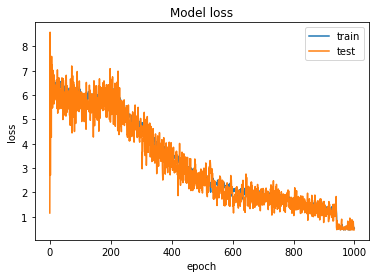

1.3960628071788215
1.1815510175945945
DN- 9  layers; 300 Units; LR- 2e-05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 2s 916us/sample - loss: 5.7925 - mean_squared_error: 40.5472 - val_loss: 5.7349 - val_mean_squared_error: 39.8498
Epoch 2/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 5.7210 - mean_squared_error: 39.6605 - val_loss: 5.6066 - val_mean_squared_error: 38.2775
Epoch 3/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 5.6106 - mean_squared_error: 38.2701 - val_loss: 5.4406 - val_mean_squared_error: 36.2877
Epoch 4/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 5.4793 - mean_squared_error: 36.7412 - val_loss: 5.2544 - val_mean_squared_error: 34.1226
Epoch 5/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 5.3369 - mean_squared_error: 35.0373 - val_loss: 5.0585 - val_mean_squared_error: 31.9187

Epoch 48/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5951 - mean_squared_error: 1.4860 - val_loss: 0.8535 - val_mean_squared_error: 2.4579
Epoch 49/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5778 - mean_squared_error: 1.4303 - val_loss: 0.8561 - val_mean_squared_error: 2.4674
Epoch 50/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5834 - mean_squared_error: 1.4568 - val_loss: 0.8578 - val_mean_squared_error: 2.4735
Epoch 51/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5738 - mean_squared_error: 1.4297 - val_loss: 0.8598 - val_mean_squared_error: 2.4809
Epoch 52/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.5803 - mean_squared_error: 1.4418 - val_loss: 0.8611 - val_mean_squared_error: 2.4855
Epoch 53/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5786 - mean_squared_error: 1.4375 - val_loss: 0.8617 - val_m

Epoch 96/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.5659 - mean_squared_error: 1.4104 - val_loss: 0.8305 - val_mean_squared_error: 2.3764
Epoch 97/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5575 - mean_squared_error: 1.3743 - val_loss: 0.8293 - val_mean_squared_error: 2.3720
Epoch 98/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5613 - mean_squared_error: 1.3983 - val_loss: 0.8283 - val_mean_squared_error: 2.3685
Epoch 99/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5688 - mean_squared_error: 1.4297 - val_loss: 0.8278 - val_mean_squared_error: 2.3668
Epoch 100/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5562 - mean_squared_error: 1.3695 - val_loss: 0.8255 - val_mean_squared_error: 2.3586
Epoch 101/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5460 - mean_squared_error: 1.3413 - val_loss: 0.8218 - val

Epoch 144/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.5446 - mean_squared_error: 1.3383 - val_loss: 0.7955 - val_mean_squared_error: 2.2522
Epoch 145/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5558 - mean_squared_error: 1.3719 - val_loss: 0.7939 - val_mean_squared_error: 2.2467
Epoch 146/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5448 - mean_squared_error: 1.3257 - val_loss: 0.7928 - val_mean_squared_error: 2.2429
Epoch 147/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5456 - mean_squared_error: 1.3357 - val_loss: 0.7927 - val_mean_squared_error: 2.2425
Epoch 148/1000
2562/2562 [==============================] - 0s 130us/sample - loss: 0.5518 - mean_squared_error: 1.3602 - val_loss: 0.7919 - val_mean_squared_error: 2.2397
Epoch 149/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5445 - mean_squared_error: 1.3294 - val_loss: 0.7912 -

2562/2562 [==============================] - 0s 141us/sample - loss: 0.5414 - mean_squared_error: 1.3193 - val_loss: 0.7737 - val_mean_squared_error: 2.1755
Epoch 192/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5437 - mean_squared_error: 1.3343 - val_loss: 0.7729 - val_mean_squared_error: 2.1727
Epoch 193/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.5435 - mean_squared_error: 1.3283 - val_loss: 0.7711 - val_mean_squared_error: 2.1666
Epoch 194/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.5320 - mean_squared_error: 1.2952 - val_loss: 0.7693 - val_mean_squared_error: 2.1605
Epoch 195/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5390 - mean_squared_error: 1.3230 - val_loss: 0.7688 - val_mean_squared_error: 2.1588
Epoch 196/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5351 - mean_squared_error: 1.3088 - val_loss: 0.7710 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5335 - mean_squared_error: 1.3146 - val_loss: 0.7512 - val_mean_squared_error: 2.0974
Epoch 240/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5438 - mean_squared_error: 1.3342 - val_loss: 0.7504 - val_mean_squared_error: 2.0947
Epoch 241/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5338 - mean_squared_error: 1.3109 - val_loss: 0.7490 - val_mean_squared_error: 2.0900
Epoch 242/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5312 - mean_squared_error: 1.2944 - val_loss: 0.7490 - val_mean_squared_error: 2.0900
Epoch 243/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5366 - mean_squared_error: 1.3075 - val_loss: 0.7491 - val_mean_squared_error: 2.0904
Epoch 244/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5335 - mean_squared_error: 1.3050 - val_loss: 0.7491 -

2562/2562 [==============================] - 0s 136us/sample - loss: 0.5264 - mean_squared_error: 1.2769 - val_loss: 0.7436 - val_mean_squared_error: 2.0707
Epoch 287/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5263 - mean_squared_error: 1.2713 - val_loss: 0.7428 - val_mean_squared_error: 2.0680
Epoch 288/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5289 - mean_squared_error: 1.2849 - val_loss: 0.7405 - val_mean_squared_error: 2.0601
Epoch 289/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5323 - mean_squared_error: 1.3020 - val_loss: 0.7392 - val_mean_squared_error: 2.0558
Epoch 290/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5302 - mean_squared_error: 1.2931 - val_loss: 0.7386 - val_mean_squared_error: 2.0537
Epoch 291/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5248 - mean_squared_error: 1.2865 - val_loss: 0.7381 - val_mean_squar

2562/2562 [==============================] - 0s 137us/sample - loss: 0.5330 - mean_squared_error: 1.3045 - val_loss: 0.7248 - val_mean_squared_error: 2.0065
Epoch 334/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5339 - mean_squared_error: 1.2980 - val_loss: 0.7247 - val_mean_squared_error: 2.0061
Epoch 335/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5358 - mean_squared_error: 1.2976 - val_loss: 0.7248 - val_mean_squared_error: 2.0065
Epoch 336/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.5213 - mean_squared_error: 1.2579 - val_loss: 0.7261 - val_mean_squared_error: 2.0107
Epoch 337/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5201 - mean_squared_error: 1.2605 - val_loss: 0.7276 - val_mean_squared_error: 2.0156
Epoch 338/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5166 - mean_squared_error: 1.2668 - val_loss: 0.7284 - val_mean_squar

Epoch 381/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5256 - mean_squared_error: 1.2992 - val_loss: 0.7236 - val_mean_squared_error: 2.0016
Epoch 382/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5223 - mean_squared_error: 1.2754 - val_loss: 0.7236 - val_mean_squared_error: 2.0014
Epoch 383/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5100 - mean_squared_error: 1.2242 - val_loss: 0.7236 - val_mean_squared_error: 2.0015
Epoch 384/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5307 - mean_squared_error: 1.2987 - val_loss: 0.7215 - val_mean_squared_error: 1.9944
Epoch 385/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5231 - mean_squared_error: 1.2721 - val_loss: 0.7195 - val_mean_squared_error: 1.9878
Epoch 386/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5193 - mean_squared_error: 1.2759 - val_loss: 0.7185 -

2562/2562 [==============================] - 0s 138us/sample - loss: 0.5093 - mean_squared_error: 1.2302 - val_loss: 0.7088 - val_mean_squared_error: 1.9516
Epoch 429/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5186 - mean_squared_error: 1.2398 - val_loss: 0.7086 - val_mean_squared_error: 1.9508
Epoch 430/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5223 - mean_squared_error: 1.2670 - val_loss: 0.7086 - val_mean_squared_error: 1.9506
Epoch 431/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5258 - mean_squared_error: 1.2780 - val_loss: 0.7087 - val_mean_squared_error: 1.9512
Epoch 432/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5157 - mean_squared_error: 1.2450 - val_loss: 0.7077 - val_mean_squared_error: 1.9477
Epoch 433/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5262 - mean_squared_error: 1.2898 - val_loss: 0.7069 - val_mean_squar

Epoch 476/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5217 - mean_squared_error: 1.2576 - val_loss: 0.6963 - val_mean_squared_error: 1.9094
Epoch 477/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.5359 - mean_squared_error: 1.2996 - val_loss: 0.6962 - val_mean_squared_error: 1.9089
Epoch 478/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.5168 - mean_squared_error: 1.2566 - val_loss: 0.6959 - val_mean_squared_error: 1.9078
Epoch 479/1000
2562/2562 [==============================] - 0s 130us/sample - loss: 0.5166 - mean_squared_error: 1.2558 - val_loss: 0.6943 - val_mean_squared_error: 1.9024
Epoch 480/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5285 - mean_squared_error: 1.2925 - val_loss: 0.6941 - val_mean_squared_error: 1.9018
Epoch 481/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5184 - mean_squared_error: 1.2573 - val_loss: 0.6953 -

2562/2562 [==============================] - ETA: 0s - loss: 0.5236 - mean_squared_error: 1.26 - 0s 132us/sample - loss: 0.5265 - mean_squared_error: 1.2712 - val_loss: 0.6909 - val_mean_squared_error: 1.8908
Epoch 524/1000
2562/2562 [==============================] - 0s 146us/sample - loss: 0.5178 - mean_squared_error: 1.2566 - val_loss: 0.6923 - val_mean_squared_error: 1.8954
Epoch 525/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5242 - mean_squared_error: 1.2642 - val_loss: 0.6940 - val_mean_squared_error: 1.9012
Epoch 526/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5250 - mean_squared_error: 1.2759 - val_loss: 0.6942 - val_mean_squared_error: 1.9017
Epoch 527/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5098 - mean_squared_error: 1.2306 - val_loss: 0.6939 - val_mean_squared_error: 1.9007
Epoch 528/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.5253 - mean_squar

2562/2562 [==============================] - 0s 135us/sample - loss: 0.5165 - mean_squared_error: 1.2575 - val_loss: 0.6872 - val_mean_squared_error: 1.8779
Epoch 571/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5041 - mean_squared_error: 1.2160 - val_loss: 0.6883 - val_mean_squared_error: 1.8816
Epoch 572/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5187 - mean_squared_error: 1.2715 - val_loss: 0.6885 - val_mean_squared_error: 1.8825
Epoch 573/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5119 - mean_squared_error: 1.2498 - val_loss: 0.6880 - val_mean_squared_error: 1.8807
Epoch 574/1000
2562/2562 [==============================] - 0s 129us/sample - loss: 0.5190 - mean_squared_error: 1.2553 - val_loss: 0.6858 - val_mean_squared_error: 1.8735
Epoch 575/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.5150 - mean_squared_error: 1.2507 - val_loss: 0.6842 - val_mean_squar

Epoch 618/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5163 - mean_squared_error: 1.2576 - val_loss: 0.6774 - val_mean_squared_error: 1.8454
Epoch 619/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5259 - mean_squared_error: 1.2833 - val_loss: 0.6783 - val_mean_squared_error: 1.8484
Epoch 620/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5071 - mean_squared_error: 1.2237 - val_loss: 0.6792 - val_mean_squared_error: 1.8513
Epoch 621/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5156 - mean_squared_error: 1.2531 - val_loss: 0.6801 - val_mean_squared_error: 1.8543
Epoch 622/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5190 - mean_squared_error: 1.2652 - val_loss: 0.6804 - val_mean_squared_error: 1.8552
Epoch 623/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5152 - mean_squared_error: 1.2463 - val_loss: 0.6805 -

2562/2562 [==============================] - 0s 137us/sample - loss: 0.5204 - mean_squared_error: 1.2618 - val_loss: 0.6719 - val_mean_squared_error: 1.8270
Epoch 666/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5098 - mean_squared_error: 1.2247 - val_loss: 0.6705 - val_mean_squared_error: 1.8223
Epoch 667/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5191 - mean_squared_error: 1.2582 - val_loss: 0.6715 - val_mean_squared_error: 1.8254
Epoch 668/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5156 - mean_squared_error: 1.2475 - val_loss: 0.6732 - val_mean_squared_error: 1.8312
Epoch 669/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5220 - mean_squared_error: 1.2686 - val_loss: 0.6733 - val_mean_squared_error: 1.8315
Epoch 670/1000
2562/2562 [==============================] - 0s 127us/sample - loss: 0.5175 - mean_squared_error: 1.2509 - val_loss: 0.6725 - val_mean_squar

Epoch 713/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.5235 - mean_squared_error: 1.2746 - val_loss: 0.6691 - val_mean_squared_error: 1.8175
Epoch 714/1000
2562/2562 [==============================] - 0s 157us/sample - loss: 0.5192 - mean_squared_error: 1.2753 - val_loss: 0.6702 - val_mean_squared_error: 1.8211
Epoch 715/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5088 - mean_squared_error: 1.2355 - val_loss: 0.6703 - val_mean_squared_error: 1.8212
Epoch 716/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5072 - mean_squared_error: 1.2205 - val_loss: 0.6686 - val_mean_squared_error: 1.8157
Epoch 717/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5252 - mean_squared_error: 1.2861 - val_loss: 0.6684 - val_mean_squared_error: 1.8151
Epoch 718/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5157 - mean_squared_error: 1.2536 - val_loss: 0.6686 -

2562/2562 [==============================] - 0s 141us/sample - loss: 0.5212 - mean_squared_error: 1.2683 - val_loss: 0.6577 - val_mean_squared_error: 1.7797
Epoch 761/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.5248 - mean_squared_error: 1.2803 - val_loss: 0.6559 - val_mean_squared_error: 1.7735
Epoch 762/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5237 - mean_squared_error: 1.2804 - val_loss: 0.6560 - val_mean_squared_error: 1.7739
Epoch 763/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5068 - mean_squared_error: 1.2256 - val_loss: 0.6552 - val_mean_squared_error: 1.7714
Epoch 764/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5131 - mean_squared_error: 1.2304 - val_loss: 0.6552 - val_mean_squared_error: 1.7715
Epoch 765/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5024 - mean_squared_error: 1.2179 - val_loss: 0.6558 - val_mean_squar

Epoch 808/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5141 - mean_squared_error: 1.2387 - val_loss: 0.6578 - val_mean_squared_error: 1.7796
Epoch 809/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5107 - mean_squared_error: 1.2379 - val_loss: 0.6549 - val_mean_squared_error: 1.7702
Epoch 810/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5127 - mean_squared_error: 1.2417 - val_loss: 0.6520 - val_mean_squared_error: 1.7605
Epoch 811/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5063 - mean_squared_error: 1.2274 - val_loss: 0.6500 - val_mean_squared_error: 1.7542
Epoch 812/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5199 - mean_squared_error: 1.2559 - val_loss: 0.6477 - val_mean_squared_error: 1.7466
Epoch 813/1000
2562/2562 [==============================] - 0s 129us/sample - loss: 0.5169 - mean_squared_error: 1.2460 - val_loss: 0.6467 -

2562/2562 [==============================] - 0s 155us/sample - loss: 0.5073 - mean_squared_error: 1.2215 - val_loss: 0.6554 - val_mean_squared_error: 1.7717
Epoch 856/1000
2562/2562 [==============================] - 0s 131us/sample - loss: 0.5048 - mean_squared_error: 1.2286 - val_loss: 0.6535 - val_mean_squared_error: 1.7652
Epoch 857/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5154 - mean_squared_error: 1.2498 - val_loss: 0.6517 - val_mean_squared_error: 1.7594
Epoch 858/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5149 - mean_squared_error: 1.2432 - val_loss: 0.6509 - val_mean_squared_error: 1.7567
Epoch 859/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5044 - mean_squared_error: 1.2238 - val_loss: 0.6505 - val_mean_squared_error: 1.7555
Epoch 860/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5064 - mean_squared_error: 1.2201 - val_loss: 0.6497 - val_mean_squar

Epoch 903/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5121 - mean_squared_error: 1.2454 - val_loss: 0.6471 - val_mean_squared_error: 1.7441
Epoch 904/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.5066 - mean_squared_error: 1.2285 - val_loss: 0.6472 - val_mean_squared_error: 1.7443
Epoch 905/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.5073 - mean_squared_error: 1.2157 - val_loss: 0.6477 - val_mean_squared_error: 1.7459
Epoch 906/1000
2562/2562 [==============================] - 0s 129us/sample - loss: 0.5076 - mean_squared_error: 1.2114 - val_loss: 0.6475 - val_mean_squared_error: 1.7452
Epoch 907/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5112 - mean_squared_error: 1.2416 - val_loss: 0.6479 - val_mean_squared_error: 1.7468
Epoch 908/1000
2562/2562 [==============================] - 0s 132us/sample - loss: 0.5030 - mean_squared_error: 1.2107 - val_loss: 0.6497 -

2562/2562 [==============================] - 0s 139us/sample - loss: 0.5113 - mean_squared_error: 1.2354 - val_loss: 0.6434 - val_mean_squared_error: 1.7318
Epoch 951/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5104 - mean_squared_error: 1.2354 - val_loss: 0.6451 - val_mean_squared_error: 1.7374
Epoch 952/1000
2562/2562 [==============================] - 0s 134us/sample - loss: 0.5111 - mean_squared_error: 1.2358 - val_loss: 0.6469 - val_mean_squared_error: 1.7432
Epoch 953/1000
2562/2562 [==============================] - 0s 135us/sample - loss: 0.5115 - mean_squared_error: 1.2326 - val_loss: 0.6469 - val_mean_squared_error: 1.7432
Epoch 954/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.5186 - mean_squared_error: 1.2616 - val_loss: 0.6462 - val_mean_squared_error: 1.7410
Epoch 955/1000
2562/2562 [==============================] - 0s 158us/sample - loss: 0.5085 - mean_squared_error: 1.2306 - val_loss: 0.6453 - val_mean_squar

Epoch 998/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5137 - mean_squared_error: 1.2420 - val_loss: 0.6345 - val_mean_squared_error: 1.7023
Epoch 999/1000
2562/2562 [==============================] - 0s 133us/sample - loss: 0.5189 - mean_squared_error: 1.2415 - val_loss: 0.6344 - val_mean_squared_error: 1.7020
Epoch 1000/1000
2562/2562 [==============================] - 0s 130us/sample - loss: 0.5189 - mean_squared_error: 1.2558 - val_loss: 0.6343 - val_mean_squared_error: 1.7018


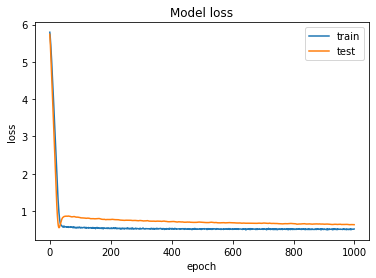

1.910103351268952
1.3820648867795433
DN- 9  layers; 300 Units; LR- 2e-05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 2s 934us/sample - loss: 5.9666 - mean_squared_error: 43.0614 - val_loss: 5.9760 - val_mean_squared_error: 43.1149
Epoch 2/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 5.8940 - mean_squared_error: 42.1316 - val_loss: 5.8463 - val_mean_squared_error: 41.4513
Epoch 3/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 5.7933 - mean_squared_error: 40.8667 - val_loss: 5.6807 - val_mean_squared_error: 39.3784
Epoch 4/1000
2562/2562 [==============================] - ETA: 0s - loss: 5.6546 - mean_squared_error: 39.133 - 0s 141us/sample - loss: 5.6517 - mean_squared_error: 39.0981 - val_loss: 5.4959 - val_mean_squared_error: 37.1294
Epoch 5/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 5.5109 - mean_squared_error: 37.4137 - v

2562/2562 [==============================] - 0s 143us/sample - loss: 0.5583 - mean_squared_error: 1.4595 - val_loss: 0.7381 - val_mean_squared_error: 2.1356
Epoch 48/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.5434 - mean_squared_error: 1.4330 - val_loss: 0.7477 - val_mean_squared_error: 2.1693
Epoch 49/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.5427 - mean_squared_error: 1.4124 - val_loss: 0.7562 - val_mean_squared_error: 2.1994
Epoch 50/1000
2562/2562 [==============================] - 0s 146us/sample - loss: 0.5413 - mean_squared_error: 1.4125 - val_loss: 0.7638 - val_mean_squared_error: 2.2264
Epoch 51/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.5418 - mean_squared_error: 1.4222 - val_loss: 0.7701 - val_mean_squared_error: 2.2486
Epoch 52/1000
2562/2562 [==============================] - 0s 146us/sample - loss: 0.5408 - mean_squared_error: 1.3993 - val_loss: 0.7746 - val_mean_squared_er

Epoch 95/1000
2562/2562 [==============================] - 0s 146us/sample - loss: 0.5217 - mean_squared_error: 1.3545 - val_loss: 0.7632 - val_mean_squared_error: 2.2271
Epoch 96/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.5172 - mean_squared_error: 1.3484 - val_loss: 0.7619 - val_mean_squared_error: 2.2229
Epoch 97/1000
2562/2562 [==============================] - 0s 137us/sample - loss: 0.5257 - mean_squared_error: 1.3579 - val_loss: 0.7607 - val_mean_squared_error: 2.2185
Epoch 98/1000
2562/2562 [==============================] - 0s 162us/sample - loss: 0.5222 - mean_squared_error: 1.3573 - val_loss: 0.7608 - val_mean_squared_error: 2.2190
Epoch 99/1000
2562/2562 [==============================] - 0s 165us/sample - loss: 0.5199 - mean_squared_error: 1.3551 - val_loss: 0.7598 - val_mean_squared_error: 2.2156
Epoch 100/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.5300 - mean_squared_error: 1.3855 - val_loss: 0.7574 - val_

Epoch 143/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.5092 - mean_squared_error: 1.3155 - val_loss: 0.7420 - val_mean_squared_error: 2.1546
Epoch 144/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.5176 - mean_squared_error: 1.3421 - val_loss: 0.7411 - val_mean_squared_error: 2.1516
Epoch 145/1000
2562/2562 [==============================] - 0s 150us/sample - loss: 0.5107 - mean_squared_error: 1.3134 - val_loss: 0.7413 - val_mean_squared_error: 2.1523
Epoch 146/1000
2562/2562 [==============================] - 0s 146us/sample - loss: 0.5006 - mean_squared_error: 1.2875 - val_loss: 0.7416 - val_mean_squared_error: 2.1532
Epoch 147/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.5234 - mean_squared_error: 1.3570 - val_loss: 0.7421 - val_mean_squared_error: 2.1551
Epoch 148/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.5104 - mean_squared_error: 1.3116 - val_loss: 0.7422 -

2562/2562 [==============================] - 0s 142us/sample - loss: 0.5042 - mean_squared_error: 1.2861 - val_loss: 0.7202 - val_mean_squared_error: 2.0806
Epoch 191/1000
2562/2562 [==============================] - 0s 154us/sample - loss: 0.5069 - mean_squared_error: 1.3129 - val_loss: 0.7191 - val_mean_squared_error: 2.0767
Epoch 192/1000
2562/2562 [==============================] - 0s 150us/sample - loss: 0.5082 - mean_squared_error: 1.2958 - val_loss: 0.7180 - val_mean_squared_error: 2.0732
Epoch 193/1000
2562/2562 [==============================] - 0s 153us/sample - loss: 0.5026 - mean_squared_error: 1.2856 - val_loss: 0.7173 - val_mean_squared_error: 2.0705
Epoch 194/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.4959 - mean_squared_error: 1.2839 - val_loss: 0.7173 - val_mean_squared_error: 2.0708
Epoch 195/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4936 - mean_squared_error: 1.2678 - val_loss: 0.7173 - val_mean_squar

Epoch 238/1000
2562/2562 [==============================] - 0s 147us/sample - loss: 0.4975 - mean_squared_error: 1.2733 - val_loss: 0.6990 - val_mean_squared_error: 2.0090
Epoch 239/1000
2562/2562 [==============================] - 0s 155us/sample - loss: 0.5028 - mean_squared_error: 1.2948 - val_loss: 0.6976 - val_mean_squared_error: 2.0043
Epoch 240/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.4918 - mean_squared_error: 1.2626 - val_loss: 0.6961 - val_mean_squared_error: 1.9992
Epoch 241/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.5000 - mean_squared_error: 1.2848 - val_loss: 0.6960 - val_mean_squared_error: 1.9990
Epoch 242/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.4975 - mean_squared_error: 1.2717 - val_loss: 0.6957 - val_mean_squared_error: 1.9978
Epoch 243/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.5002 - mean_squared_error: 1.2790 - val_loss: 0.6945 -

2562/2562 [==============================] - 0s 144us/sample - loss: 0.4880 - mean_squared_error: 1.2497 - val_loss: 0.6852 - val_mean_squared_error: 1.9628
Epoch 286/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.4969 - mean_squared_error: 1.2828 - val_loss: 0.6832 - val_mean_squared_error: 1.9562
Epoch 287/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.5006 - mean_squared_error: 1.2861 - val_loss: 0.6833 - val_mean_squared_error: 1.9563
Epoch 288/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.4921 - mean_squared_error: 1.2538 - val_loss: 0.6853 - val_mean_squared_error: 1.9629
Epoch 289/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.5051 - mean_squared_error: 1.3084 - val_loss: 0.6865 - val_mean_squared_error: 1.9673
Epoch 290/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.4935 - mean_squared_error: 1.2663 - val_loss: 0.6864 - val_mean_squar

Epoch 333/1000
2562/2562 [==============================] - 0s 151us/sample - loss: 0.5045 - mean_squared_error: 1.3090 - val_loss: 0.6839 - val_mean_squared_error: 1.9586
Epoch 334/1000
2562/2562 [==============================] - 0s 149us/sample - loss: 0.4998 - mean_squared_error: 1.2943 - val_loss: 0.6833 - val_mean_squared_error: 1.9566
Epoch 335/1000
2562/2562 [==============================] - 0s 163us/sample - loss: 0.4959 - mean_squared_error: 1.2823 - val_loss: 0.6835 - val_mean_squared_error: 1.9573
Epoch 336/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.4977 - mean_squared_error: 1.2657 - val_loss: 0.6823 - val_mean_squared_error: 1.9533
Epoch 337/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.5000 - mean_squared_error: 1.2960 - val_loss: 0.6811 - val_mean_squared_error: 1.9491
Epoch 338/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.4922 - mean_squared_error: 1.2542 - val_loss: 0.6797 -

2562/2562 [==============================] - 0s 151us/sample - loss: 0.4938 - mean_squared_error: 1.2677 - val_loss: 0.6693 - val_mean_squared_error: 1.9098
Epoch 381/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.4992 - mean_squared_error: 1.2797 - val_loss: 0.6696 - val_mean_squared_error: 1.9110
Epoch 382/1000
2562/2562 [==============================] - 0s 155us/sample - loss: 0.4943 - mean_squared_error: 1.2531 - val_loss: 0.6705 - val_mean_squared_error: 1.9139
Epoch 383/1000
2562/2562 [==============================] - 0s 173us/sample - loss: 0.4961 - mean_squared_error: 1.2709 - val_loss: 0.6696 - val_mean_squared_error: 1.9108
Epoch 384/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.4885 - mean_squared_error: 1.2431 - val_loss: 0.6683 - val_mean_squared_error: 1.9065
Epoch 385/1000
2562/2562 [==============================] - 0s 162us/sample - loss: 0.4855 - mean_squared_error: 1.2470 - val_loss: 0.6676 - val_mean_squar

Epoch 428/1000
2562/2562 [==============================] - 0s 154us/sample - loss: 0.4971 - mean_squared_error: 1.2607 - val_loss: 0.6575 - val_mean_squared_error: 1.8706
Epoch 429/1000
2562/2562 [==============================] - 0s 148us/sample - loss: 0.4926 - mean_squared_error: 1.2706 - val_loss: 0.6580 - val_mean_squared_error: 1.8725
Epoch 430/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.4871 - mean_squared_error: 1.2438 - val_loss: 0.6587 - val_mean_squared_error: 1.8747
Epoch 431/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4974 - mean_squared_error: 1.2765 - val_loss: 0.6600 - val_mean_squared_error: 1.8790
Epoch 432/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.4795 - mean_squared_error: 1.2311 - val_loss: 0.6607 - val_mean_squared_error: 1.8812
Epoch 433/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.5048 - mean_squared_error: 1.2972 - val_loss: 0.6609 -

2562/2562 [==============================] - 0s 155us/sample - loss: 0.4938 - mean_squared_error: 1.2593 - val_loss: 0.6447 - val_mean_squared_error: 1.8282
Epoch 476/1000
2562/2562 [==============================] - 0s 148us/sample - loss: 0.4915 - mean_squared_error: 1.2626 - val_loss: 0.6452 - val_mean_squared_error: 1.8301
Epoch 477/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.4805 - mean_squared_error: 1.2130 - val_loss: 0.6450 - val_mean_squared_error: 1.8294
Epoch 478/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4817 - mean_squared_error: 1.2243 - val_loss: 0.6444 - val_mean_squared_error: 1.8272
Epoch 479/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.4973 - mean_squared_error: 1.2810 - val_loss: 0.6450 - val_mean_squared_error: 1.8293
Epoch 480/1000
2562/2562 [==============================] - 0s 150us/sample - loss: 0.4906 - mean_squared_error: 1.2470 - val_loss: 0.6452 - val_mean_squar

2562/2562 [==============================] - 0s 148us/sample - loss: 0.4952 - mean_squared_error: 1.2659 - val_loss: 0.6439 - val_mean_squared_error: 1.8259
Epoch 523/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.4956 - mean_squared_error: 1.2633 - val_loss: 0.6453 - val_mean_squared_error: 1.8303
Epoch 524/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.4913 - mean_squared_error: 1.2689 - val_loss: 0.6456 - val_mean_squared_error: 1.8313
Epoch 525/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4833 - mean_squared_error: 1.2244 - val_loss: 0.6441 - val_mean_squared_error: 1.8265
Epoch 526/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.5004 - mean_squared_error: 1.2713 - val_loss: 0.6426 - val_mean_squared_error: 1.8215
Epoch 527/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4808 - mean_squared_error: 1.2110 - val_loss: 0.6406 - val_mean_squar

Epoch 570/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.4854 - mean_squared_error: 1.2391 - val_loss: 0.6359 - val_mean_squared_error: 1.7993
Epoch 571/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4948 - mean_squared_error: 1.2669 - val_loss: 0.6354 - val_mean_squared_error: 1.7976
Epoch 572/1000
2562/2562 [==============================] - 0s 149us/sample - loss: 0.4850 - mean_squared_error: 1.2264 - val_loss: 0.6351 - val_mean_squared_error: 1.7965
Epoch 573/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.4908 - mean_squared_error: 1.2646 - val_loss: 0.6337 - val_mean_squared_error: 1.7920
Epoch 574/1000
2562/2562 [==============================] - 0s 153us/sample - loss: 0.4828 - mean_squared_error: 1.2406 - val_loss: 0.6336 - val_mean_squared_error: 1.7916
Epoch 575/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.4889 - mean_squared_error: 1.2458 - val_loss: 0.6343 -

2562/2562 [==============================] - 0s 148us/sample - loss: 0.4850 - mean_squared_error: 1.2369 - val_loss: 0.6259 - val_mean_squared_error: 1.7664
Epoch 618/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.4845 - mean_squared_error: 1.2361 - val_loss: 0.6271 - val_mean_squared_error: 1.7702
Epoch 619/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.4838 - mean_squared_error: 1.2436 - val_loss: 0.6288 - val_mean_squared_error: 1.7759
Epoch 620/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.4767 - mean_squared_error: 1.2132 - val_loss: 0.6300 - val_mean_squared_error: 1.7797
Epoch 621/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.4829 - mean_squared_error: 1.2469 - val_loss: 0.6294 - val_mean_squared_error: 1.7777
Epoch 622/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4857 - mean_squared_error: 1.2343 - val_loss: 0.6288 - val_mean_squar

2562/2562 [==============================] - 0s 144us/sample - loss: 0.4810 - mean_squared_error: 1.2129 - val_loss: 0.6207 - val_mean_squared_error: 1.7493
Epoch 665/1000
2562/2562 [==============================] - 0s 146us/sample - loss: 0.4837 - mean_squared_error: 1.2310 - val_loss: 0.6202 - val_mean_squared_error: 1.7475
Epoch 666/1000
2562/2562 [==============================] - 0s 149us/sample - loss: 0.4858 - mean_squared_error: 1.2354 - val_loss: 0.6187 - val_mean_squared_error: 1.7427
Epoch 667/1000
2562/2562 [==============================] - 0s 147us/sample - loss: 0.4961 - mean_squared_error: 1.2764 - val_loss: 0.6178 - val_mean_squared_error: 1.7397
Epoch 668/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.4814 - mean_squared_error: 1.2274 - val_loss: 0.6183 - val_mean_squared_error: 1.7412
Epoch 669/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4904 - mean_squared_error: 1.2414 - val_loss: 0.6177 - val_mean_squar

2562/2562 [==============================] - 0s 145us/sample - loss: 0.4842 - mean_squared_error: 1.2350 - val_loss: 0.6162 - val_mean_squared_error: 1.7344
Epoch 712/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4715 - mean_squared_error: 1.1998 - val_loss: 0.6162 - val_mean_squared_error: 1.7343
Epoch 713/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4829 - mean_squared_error: 1.2469 - val_loss: 0.6160 - val_mean_squared_error: 1.7338
Epoch 714/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.4830 - mean_squared_error: 1.2196 - val_loss: 0.6160 - val_mean_squared_error: 1.7339
Epoch 715/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.4801 - mean_squared_error: 1.2323 - val_loss: 0.6170 - val_mean_squared_error: 1.7369
Epoch 716/1000
2562/2562 [==============================] - 0s 148us/sample - loss: 0.4851 - mean_squared_error: 1.2343 - val_loss: 0.6170 - val_mean_squar

Epoch 759/1000
2562/2562 [==============================] - 0s 148us/sample - loss: 0.4801 - mean_squared_error: 1.2336 - val_loss: 0.6188 - val_mean_squared_error: 1.7429
Epoch 760/1000
2562/2562 [==============================] - 0s 147us/sample - loss: 0.4808 - mean_squared_error: 1.2262 - val_loss: 0.6173 - val_mean_squared_error: 1.7381
Epoch 761/1000
2562/2562 [==============================] - 0s 147us/sample - loss: 0.4967 - mean_squared_error: 1.2721 - val_loss: 0.6152 - val_mean_squared_error: 1.7313
Epoch 762/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4803 - mean_squared_error: 1.2229 - val_loss: 0.6147 - val_mean_squared_error: 1.7296
Epoch 763/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.4775 - mean_squared_error: 1.2205 - val_loss: 0.6151 - val_mean_squared_error: 1.7307
Epoch 764/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.4809 - mean_squared_error: 1.2348 - val_loss: 0.6154 -

2562/2562 [==============================] - 0s 145us/sample - loss: 0.4777 - mean_squared_error: 1.2282 - val_loss: 0.6089 - val_mean_squared_error: 1.7104
Epoch 807/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.4736 - mean_squared_error: 1.2100 - val_loss: 0.6089 - val_mean_squared_error: 1.7103
Epoch 808/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.4860 - mean_squared_error: 1.2432 - val_loss: 0.6076 - val_mean_squared_error: 1.7061
Epoch 809/1000
2562/2562 [==============================] - 0s 138us/sample - loss: 0.4819 - mean_squared_error: 1.2375 - val_loss: 0.6073 - val_mean_squared_error: 1.7051
Epoch 810/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4762 - mean_squared_error: 1.2077 - val_loss: 0.6058 - val_mean_squared_error: 1.7001
Epoch 811/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.4816 - mean_squared_error: 1.2360 - val_loss: 0.6041 - val_mean_squar

Epoch 854/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4765 - mean_squared_error: 1.2052 - val_loss: 0.6029 - val_mean_squared_error: 1.6908
Epoch 855/1000
2562/2562 [==============================] - 0s 150us/sample - loss: 0.4768 - mean_squared_error: 1.2152 - val_loss: 0.6031 - val_mean_squared_error: 1.6913
Epoch 856/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.4793 - mean_squared_error: 1.2267 - val_loss: 0.6022 - val_mean_squared_error: 1.6883
Epoch 857/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4850 - mean_squared_error: 1.2326 - val_loss: 0.6014 - val_mean_squared_error: 1.6856
Epoch 858/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.4807 - mean_squared_error: 1.2310 - val_loss: 0.6017 - val_mean_squared_error: 1.6868
Epoch 859/1000
2562/2562 [==============================] - 0s 145us/sample - loss: 0.4818 - mean_squared_error: 1.2368 - val_loss: 0.6027 -

2562/2562 [==============================] - 0s 154us/sample - loss: 0.4906 - mean_squared_error: 1.2460 - val_loss: 0.5961 - val_mean_squared_error: 1.6683
Epoch 902/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4795 - mean_squared_error: 1.2167 - val_loss: 0.5957 - val_mean_squared_error: 1.6670
Epoch 903/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.4866 - mean_squared_error: 1.2446 - val_loss: 0.5960 - val_mean_squared_error: 1.6679
Epoch 904/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4827 - mean_squared_error: 1.2330 - val_loss: 0.5970 - val_mean_squared_error: 1.6712
Epoch 905/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.4758 - mean_squared_error: 1.2172 - val_loss: 0.5980 - val_mean_squared_error: 1.6744
Epoch 906/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4747 - mean_squared_error: 1.2179 - val_loss: 0.5987 - val_mean_squar

Epoch 949/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.4753 - mean_squared_error: 1.2079 - val_loss: 0.5910 - val_mean_squared_error: 1.6514
Epoch 950/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4858 - mean_squared_error: 1.2371 - val_loss: 0.5914 - val_mean_squared_error: 1.6526
Epoch 951/1000
2562/2562 [==============================] - 0s 139us/sample - loss: 0.4705 - mean_squared_error: 1.1901 - val_loss: 0.5923 - val_mean_squared_error: 1.6557
Epoch 952/1000
2562/2562 [==============================] - 0s 152us/sample - loss: 0.4714 - mean_squared_error: 1.1960 - val_loss: 0.5933 - val_mean_squared_error: 1.6590
Epoch 953/1000
2562/2562 [==============================] - 0s 136us/sample - loss: 0.4816 - mean_squared_error: 1.2238 - val_loss: 0.5944 - val_mean_squared_error: 1.6625
Epoch 954/1000
2562/2562 [==============================] - 0s 141us/sample - loss: 0.4768 - mean_squared_error: 1.2157 - val_loss: 0.5940 -

2562/2562 [==============================] - 0s 170us/sample - loss: 0.4825 - mean_squared_error: 1.2349 - val_loss: 0.5882 - val_mean_squared_error: 1.6423
Epoch 997/1000
2562/2562 [==============================] - 0s 144us/sample - loss: 0.4719 - mean_squared_error: 1.1957 - val_loss: 0.5885 - val_mean_squared_error: 1.6433
Epoch 998/1000
2562/2562 [==============================] - 0s 142us/sample - loss: 0.4869 - mean_squared_error: 1.2433 - val_loss: 0.5891 - val_mean_squared_error: 1.6452
Epoch 999/1000
2562/2562 [==============================] - 0s 140us/sample - loss: 0.4846 - mean_squared_error: 1.2308 - val_loss: 0.5899 - val_mean_squared_error: 1.6478
Epoch 1000/1000
2562/2562 [==============================] - 0s 143us/sample - loss: 0.4772 - mean_squared_error: 1.2176 - val_loss: 0.5902 - val_mean_squared_error: 1.6490


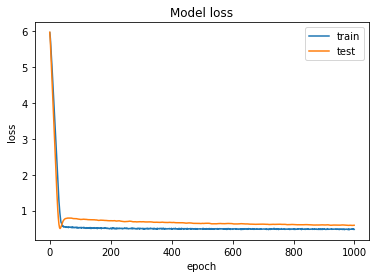

1.8640544534988603
1.3653037953140175
DN- 9  layers; 500 Units; LR- 0.05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 3s 1ms/sample - loss: 3.7425 - mean_squared_error: 25.4112 - val_loss: 6.5844 - val_mean_squared_error: 50.6670
Epoch 2/1000
2562/2562 [==============================] - 1s 244us/sample - loss: 7.8755 - mean_squared_error: 100.6510 - val_loss: 11.5016 - val_mean_squared_error: 143.8251
Epoch 3/1000
2562/2562 [==============================] - 0s 192us/sample - loss: 13.1101 - mean_squared_error: 212.1185 - val_loss: 19.9509 - val_mean_squared_error: 416.6683
Epoch 4/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 13.8817 - mean_squared_error: 247.5627 - val_loss: 5.8910 - val_mean_squared_error: 41.0614
Epoch 5/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 10.9774 - mean_squared_error: 192.0472 - val_loss: 19.5940 - val_mean_squared_error

2562/2562 [==============================] - 1s 213us/sample - loss: 12.1434 - mean_squared_error: 174.2486 - val_loss: 15.9934 - val_mean_squared_error: 270.4498
Epoch 47/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 13.3887 - mean_squared_error: 202.5073 - val_loss: 13.3721 - val_mean_squared_error: 191.2905
Epoch 48/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 12.8154 - mean_squared_error: 184.4017 - val_loss: 11.9478 - val_mean_squared_error: 154.0392
Epoch 49/1000
2562/2562 [==============================] - 1s 199us/sample - loss: 12.4455 - mean_squared_error: 176.1288 - val_loss: 15.1788 - val_mean_squared_error: 244.3798
Epoch 50/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 13.1439 - mean_squared_error: 196.7376 - val_loss: 11.2773 - val_mean_squared_error: 137.9069
Epoch 51/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 12.2944 - mean_squared_error: 172.7130 - val_l

2562/2562 [==============================] - 0s 194us/sample - loss: 12.5305 - mean_squared_error: 180.7330 - val_loss: 15.6629 - val_mean_squared_error: 259.7180
Epoch 93/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 13.2851 - mean_squared_error: 204.1665 - val_loss: 11.7487 - val_mean_squared_error: 149.1577
Epoch 94/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 12.4016 - mean_squared_error: 177.9082 - val_loss: 14.8115 - val_mean_squared_error: 233.0600
Epoch 95/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 12.9827 - mean_squared_error: 193.3934 - val_loss: 12.1198 - val_mean_squared_error: 158.3261
Epoch 96/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 12.5080 - mean_squared_error: 178.7415 - val_loss: 14.2546 - val_mean_squared_error: 216.4095
Epoch 97/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 13.0039 - mean_squared_error: 191.8938 - val_l

2562/2562 [==============================] - 1s 214us/sample - loss: 13.0326 - mean_squared_error: 196.2699 - val_loss: 12.1309 - val_mean_squared_error: 158.6077
Epoch 139/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 12.7360 - mean_squared_error: 187.5586 - val_loss: 14.7463 - val_mean_squared_error: 231.0860
Epoch 140/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 13.1880 - mean_squared_error: 200.4691 - val_loss: 11.7018 - val_mean_squared_error: 148.0241
Epoch 141/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 12.3842 - mean_squared_error: 179.6050 - val_loss: 14.1669 - val_mean_squared_error: 213.8501
Epoch 142/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 12.8919 - mean_squared_error: 191.4581 - val_loss: 13.5909 - val_mean_squared_error: 197.3809
Epoch 143/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 12.8451 - mean_squared_error: 189.9442 - 

2562/2562 [==============================] - 1s 210us/sample - loss: 12.9187 - mean_squared_error: 192.4671 - val_loss: 13.1973 - val_mean_squared_error: 186.5161
Epoch 184/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 12.7571 - mean_squared_error: 188.2124 - val_loss: 13.2652 - val_mean_squared_error: 188.3683
Epoch 185/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 12.7360 - mean_squared_error: 188.4227 - val_loss: 14.1498 - val_mean_squared_error: 213.3590
Epoch 186/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 13.1193 - mean_squared_error: 198.2666 - val_loss: 11.3099 - val_mean_squared_error: 138.6856
Epoch 187/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 12.3063 - mean_squared_error: 186.8107 - val_loss: 16.7249 - val_mean_squared_error: 295.0173
Epoch 188/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 13.4651 - mean_squared_error: 210.8353 - 

2562/2562 [==============================] - 1s 221us/sample - loss: 12.3235 - mean_squared_error: 182.4749 - val_loss: 14.4425 - val_mean_squared_error: 221.9823
Epoch 230/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 12.9878 - mean_squared_error: 196.1819 - val_loss: 14.3973 - val_mean_squared_error: 220.6423
Epoch 231/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 13.0769 - mean_squared_error: 201.9790 - val_loss: 10.6606 - val_mean_squared_error: 123.8842
Epoch 232/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 12.1465 - mean_squared_error: 182.2527 - val_loss: 16.5722 - val_mean_squared_error: 289.8169
Epoch 233/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 13.3950 - mean_squared_error: 215.3835 - val_loss: 11.9336 - val_mean_squared_error: 153.7119
Epoch 234/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 12.3478 - mean_squared_error: 180.2786 - 

2562/2562 [==============================] - 1s 219us/sample - loss: 12.8495 - mean_squared_error: 192.2086 - val_loss: 13.8745 - val_mean_squared_error: 205.4353
Epoch 276/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 12.7143 - mean_squared_error: 189.6462 - val_loss: 12.8883 - val_mean_squared_error: 178.2149
Epoch 277/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 12.7119 - mean_squared_error: 189.1929 - val_loss: 12.4933 - val_mean_squared_error: 167.8587
Epoch 278/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 12.6414 - mean_squared_error: 187.7505 - val_loss: 14.8114 - val_mean_squared_error: 233.0945
Epoch 279/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 13.1164 - mean_squared_error: 202.4526 - val_loss: 12.4540 - val_mean_squared_error: 166.8463
Epoch 280/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 12.6275 - mean_squared_error: 187.8593 - 

2562/2562 [==============================] - 1s 220us/sample - loss: 12.5599 - mean_squared_error: 184.8714 - val_loss: 13.8211 - val_mean_squared_error: 203.9208
Epoch 322/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 12.9819 - mean_squared_error: 196.4847 - val_loss: 13.2842 - val_mean_squared_error: 188.9169
Epoch 323/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 12.8118 - mean_squared_error: 190.7252 - val_loss: 13.7725 - val_mean_squared_error: 202.5393
Epoch 324/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 13.0122 - mean_squared_error: 197.4019 - val_loss: 12.4354 - val_mean_squared_error: 166.3771
Epoch 325/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 12.5982 - mean_squared_error: 186.8812 - val_loss: 13.1128 - val_mean_squared_error: 184.2505
Epoch 326/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 12.6683 - mean_squared_error: 188.2239 - 

2562/2562 [==============================] - 1s 213us/sample - loss: 12.7235 - mean_squared_error: 189.2578 - val_loss: 13.5414 - val_mean_squared_error: 196.0428
Epoch 367/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 12.8258 - mean_squared_error: 192.9366 - val_loss: 13.0155 - val_mean_squared_error: 181.6377
Epoch 368/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 12.6456 - mean_squared_error: 187.6033 - val_loss: 13.1988 - val_mean_squared_error: 186.5966
Epoch 369/1000
2562/2562 [==============================] - ETA: 0s - loss: 12.6846 - mean_squared_error: 188.751 - 1s 209us/sample - loss: 12.6516 - mean_squared_error: 187.9082 - val_loss: 13.7079 - val_mean_squared_error: 200.7196
Epoch 370/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 12.7462 - mean_squared_error: 190.6478 - val_loss: 12.5829 - val_mean_squared_error: 170.2011
Epoch 371/1000
2562/2562 [==============================] - 1s 222us/

Epoch 412/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 13.1482 - mean_squared_error: 202.3375 - val_loss: 13.4166 - val_mean_squared_error: 192.5837
Epoch 413/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 12.8202 - mean_squared_error: 193.7461 - val_loss: 12.7268 - val_mean_squared_error: 173.9727
Epoch 414/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 12.5532 - mean_squared_error: 185.8702 - val_loss: 13.5072 - val_mean_squared_error: 195.0992
Epoch 415/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 12.7565 - mean_squared_error: 191.0366 - val_loss: 13.9693 - val_mean_squared_error: 208.1847
Epoch 416/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 12.8588 - mean_squared_error: 194.2889 - val_loss: 12.8313 - val_mean_squared_error: 176.7316
Epoch 417/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 12.6752 - mean_squared_err

2562/2562 [==============================] - 1s 211us/sample - loss: 12.4803 - mean_squared_error: 186.6783 - val_loss: 14.6168 - val_mean_squared_error: 227.2492
Epoch 459/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 13.0431 - mean_squared_error: 201.4828 - val_loss: 12.3661 - val_mean_squared_error: 164.6293
Epoch 460/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 12.6862 - mean_squared_error: 191.3418 - val_loss: 13.1817 - val_mean_squared_error: 186.1500
Epoch 461/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 12.7053 - mean_squared_error: 190.8326 - val_loss: 12.6567 - val_mean_squared_error: 172.1443
Epoch 462/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 12.5360 - mean_squared_error: 191.8181 - val_loss: 15.8213 - val_mean_squared_error: 264.9254
Epoch 463/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 13.4076 - mean_squared_error: 211.1087 - 

2562/2562 [==============================] - 1s 214us/sample - loss: 12.6012 - mean_squared_error: 188.5785 - val_loss: 14.1836 - val_mean_squared_error: 214.4191
Epoch 504/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 12.9830 - mean_squared_error: 198.0911 - val_loss: 14.4452 - val_mean_squared_error: 222.1288
Epoch 505/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 12.8484 - mean_squared_error: 196.0926 - val_loss: 12.9575 - val_mean_squared_error: 180.1129
Epoch 506/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 12.6885 - mean_squared_error: 191.2325 - val_loss: 12.4424 - val_mean_squared_error: 166.5973
Epoch 507/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 12.5578 - mean_squared_error: 186.4045 - val_loss: 13.5483 - val_mean_squared_error: 196.2686
Epoch 508/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 12.8612 - mean_squared_error: 194.9716 - 

2562/2562 [==============================] - 1s 249us/sample - loss: 13.0770 - mean_squared_error: 201.7890 - val_loss: 15.1973 - val_mean_squared_error: 245.0696
Epoch 550/1000
2562/2562 [==============================] - 1s 201us/sample - loss: 12.9851 - mean_squared_error: 204.5500 - val_loss: 12.4752 - val_mean_squared_error: 167.4518
Epoch 551/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 12.4314 - mean_squared_error: 184.8143 - val_loss: 12.4580 - val_mean_squared_error: 167.0087
Epoch 552/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 12.4227 - mean_squared_error: 183.9537 - val_loss: 13.5453 - val_mean_squared_error: 196.1962
Epoch 553/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 12.6636 - mean_squared_error: 189.9355 - val_loss: 14.0814 - val_mean_squared_error: 211.4588
Epoch 554/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 12.9327 - mean_squared_error: 198.3895 - 

Epoch 595/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 23.0961 - mean_squared_error: 634.6743 - val_loss: 35.9092 - val_mean_squared_error: 1320.9915
Epoch 596/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 22.9566 - mean_squared_error: 628.4114 - val_loss: 36.1275 - val_mean_squared_error: 1336.9008
Epoch 597/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 23.0951 - mean_squared_error: 639.7607 - val_loss: 36.4114 - val_mean_squared_error: 1357.7389
Epoch 598/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 23.2996 - mean_squared_error: 647.0798 - val_loss: 36.3728 - val_mean_squared_error: 1354.8989
Epoch 599/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 23.0583 - mean_squared_error: 637.4374 - val_loss: 36.3690 - val_mean_squared_error: 1354.6185
Epoch 600/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 22.9495 - mean_square

Epoch 641/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 23.9605 - mean_squared_error: 661.9310 - val_loss: 32.5980 - val_mean_squared_error: 1091.3888
Epoch 642/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 23.7911 - mean_squared_error: 654.7932 - val_loss: 32.2699 - val_mean_squared_error: 1069.8298
Epoch 643/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 23.9990 - mean_squared_error: 663.9918 - val_loss: 31.9166 - val_mean_squared_error: 1046.8538
Epoch 644/1000
2562/2562 [==============================] - ETA: 0s - loss: 24.0593 - mean_squared_error: 669.339 - 1s 209us/sample - loss: 23.9841 - mean_squared_error: 664.6132 - val_loss: 31.7669 - val_mean_squared_error: 1037.1931
Epoch 645/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 23.6865 - mean_squared_error: 650.4055 - val_loss: 31.5823 - val_mean_squared_error: 1025.3447
Epoch 646/1000
2562/2562 [=======================

2562/2562 [==============================] - 1s 213us/sample - loss: 23.5167 - mean_squared_error: 646.2101 - val_loss: 33.0106 - val_mean_squared_error: 1118.8263
Epoch 687/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 23.8186 - mean_squared_error: 659.4479 - val_loss: 32.6335 - val_mean_squared_error: 1093.7568
Epoch 688/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 23.6990 - mean_squared_error: 654.4186 - val_loss: 32.8116 - val_mean_squared_error: 1105.5632
Epoch 689/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 23.6331 - mean_squared_error: 649.7500 - val_loss: 33.2989 - val_mean_squared_error: 1138.1921
Epoch 690/1000
2562/2562 [==============================] - ETA: 0s - loss: 23.9772 - mean_squared_error: 668.712 - 1s 218us/sample - loss: 23.9636 - mean_squared_error: 666.6526 - val_loss: 33.2756 - val_mean_squared_error: 1136.6155
Epoch 691/1000
2562/2562 [==============================] - 1s 2

2562/2562 [==============================] - 1s 210us/sample - loss: 23.8609 - mean_squared_error: 660.0596 - val_loss: 32.5265 - val_mean_squared_error: 1086.7124
Epoch 732/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 23.6676 - mean_squared_error: 649.6862 - val_loss: 32.5529 - val_mean_squared_error: 1088.4567
Epoch 733/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 23.8335 - mean_squared_error: 659.9515 - val_loss: 32.1122 - val_mean_squared_error: 1059.5857
Epoch 734/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 23.8602 - mean_squared_error: 660.4149 - val_loss: 31.7755 - val_mean_squared_error: 1037.7917
Epoch 735/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 23.8878 - mean_squared_error: 662.3680 - val_loss: 31.6564 - val_mean_squared_error: 1030.1364
Epoch 736/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 23.9187 - mean_squared_error: 664.54

Epoch 777/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 24.2424 - mean_squared_error: 682.5834 - val_loss: 31.0008 - val_mean_squared_error: 988.5239
Epoch 778/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 24.1775 - mean_squared_error: 683.0607 - val_loss: 30.8429 - val_mean_squared_error: 978.6278
Epoch 779/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 24.2501 - mean_squared_error: 683.9197 - val_loss: 30.8789 - val_mean_squared_error: 980.8783
Epoch 780/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 24.1474 - mean_squared_error: 677.4537 - val_loss: 31.3101 - val_mean_squared_error: 1008.0573
Epoch 781/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 23.8057 - mean_squared_error: 661.8621 - val_loss: 32.0645 - val_mean_squared_error: 1056.5074
Epoch 782/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 23.4544 - mean_squared_e

Epoch 823/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 23.9605 - mean_squared_error: 672.7664 - val_loss: 32.6668 - val_mean_squared_error: 1096.0217
Epoch 824/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 23.7861 - mean_squared_error: 664.3537 - val_loss: 32.3533 - val_mean_squared_error: 1075.3734
Epoch 825/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 23.8306 - mean_squared_error: 667.5422 - val_loss: 32.2286 - val_mean_squared_error: 1067.2147
Epoch 826/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 23.5533 - mean_squared_error: 652.0608 - val_loss: 32.4880 - val_mean_squared_error: 1084.2194
Epoch 827/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 23.7273 - mean_squared_error: 657.7961 - val_loss: 32.3253 - val_mean_squared_error: 1073.5370
Epoch 828/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 24.1896 - mean_square

Epoch 869/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 23.7103 - mean_squared_error: 663.3510 - val_loss: 32.0649 - val_mean_squared_error: 1056.5615
Epoch 870/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 23.6526 - mean_squared_error: 657.1418 - val_loss: 31.9287 - val_mean_squared_error: 1047.7322
Epoch 871/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 24.0290 - mean_squared_error: 676.4735 - val_loss: 31.4711 - val_mean_squared_error: 1018.3328
Epoch 872/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 23.7912 - mean_squared_error: 666.5141 - val_loss: 31.2524 - val_mean_squared_error: 1004.4261
Epoch 873/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 23.7068 - mean_squared_error: 666.5577 - val_loss: 32.0702 - val_mean_squared_error: 1056.9070
Epoch 874/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 23.5920 - mean_square

Epoch 914/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 23.6534 - mean_squared_error: 663.1028 - val_loss: 32.2789 - val_mean_squared_error: 1070.4963
Epoch 915/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 23.6348 - mean_squared_error: 663.1923 - val_loss: 33.1093 - val_mean_squared_error: 1125.4935
Epoch 916/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 23.4797 - mean_squared_error: 657.1685 - val_loss: 32.9726 - val_mean_squared_error: 1116.3485
Epoch 917/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 23.9872 - mean_squared_error: 680.0663 - val_loss: 31.7530 - val_mean_squared_error: 1036.3759
Epoch 918/1000
2562/2562 [==============================] - ETA: 0s - loss: 24.1659 - mean_squared_error: 687.636 - 1s 218us/sample - loss: 24.0901 - mean_squared_error: 682.9694 - val_loss: 31.0192 - val_mean_squared_error: 989.6968
Epoch 919/1000
2562/2562 [========================

2562/2562 [==============================] - ETA: 0s - loss: 24.1904 - mean_squared_error: 690.144 - 1s 216us/sample - loss: 24.0825 - mean_squared_error: 684.2792 - val_loss: 31.3375 - val_mean_squared_error: 1009.8213
Epoch 960/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 23.1267 - mean_squared_error: 641.1782 - val_loss: 35.1335 - val_mean_squared_error: 1265.3462
Epoch 961/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 23.1998 - mean_squared_error: 653.3878 - val_loss: 34.3092 - val_mean_squared_error: 1207.4097
Epoch 962/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 24.3533 - mean_squared_error: 701.6013 - val_loss: 30.9208 - val_mean_squared_error: 983.5266
Epoch 963/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 24.4818 - mean_squared_error: 708.1593 - val_loss: 28.8020 - val_mean_squared_error: 855.1961
Epoch 964/1000
2562/2562 [==============================] - 1s 217

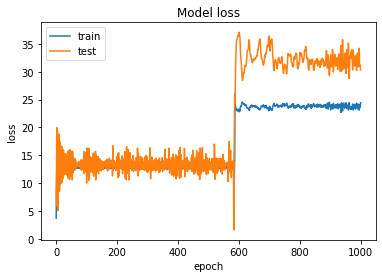

947.5556018636559
30.78239110049211
DN- 9  layers; 500 Units; LR- 0.05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 3s 1ms/sample - loss: 3.4004 - mean_squared_error: 24.0536 - val_loss: 3.2625 - val_mean_squared_error: 15.2426
Epoch 2/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 8.9243 - mean_squared_error: 127.0529 - val_loss: 1.9011 - val_mean_squared_error: 6.8744
Epoch 3/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 12.2537 - mean_squared_error: 253.5049 - val_loss: 4.1831 - val_mean_squared_error: 23.0719
Epoch 4/1000
2562/2562 [==============================] - 0s 192us/sample - loss: 5.4523 - mean_squared_error: 42.0358 - val_loss: 5.6739 - val_mean_squared_error: 39.2677
Epoch 5/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 5.4497 - mean_squared_error: 40.1987 - val_loss: 4.9260 - val_mean_squared_error: 30.5917
Epoch 

Epoch 47/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 24.4832 - mean_squared_error: 675.3695 - val_loss: 21.8714 - val_mean_squared_error: 501.6307
Epoch 48/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 24.5187 - mean_squared_error: 676.5410 - val_loss: 22.3931 - val_mean_squared_error: 525.2427
Epoch 49/1000
2562/2562 [==============================] - 1s 197us/sample - loss: 24.7569 - mean_squared_error: 688.5877 - val_loss: 22.4949 - val_mean_squared_error: 529.9144
Epoch 50/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 24.9664 - mean_squared_error: 698.6804 - val_loss: 22.6936 - val_mean_squared_error: 539.0948
Epoch 51/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 24.7789 - mean_squared_error: 687.6309 - val_loss: 23.1059 - val_mean_squared_error: 558.3889
Epoch 52/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 24.7410 - mean_squared_error: 68

2562/2562 [==============================] - 1s 195us/sample - loss: 24.2978 - mean_squared_error: 680.8250 - val_loss: 18.9491 - val_mean_squared_error: 379.4192
Epoch 94/1000
2562/2562 [==============================] - 1s 201us/sample - loss: 24.2873 - mean_squared_error: 691.3803 - val_loss: 17.9631 - val_mean_squared_error: 342.0370
Epoch 95/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 24.0504 - mean_squared_error: 685.9285 - val_loss: 17.4840 - val_mean_squared_error: 324.5743
Epoch 96/1000
2562/2562 [==============================] - 1s 196us/sample - loss: 23.8527 - mean_squared_error: 676.9375 - val_loss: 17.8368 - val_mean_squared_error: 337.3868
Epoch 97/1000
2562/2562 [==============================] - 1s 195us/sample - loss: 23.9734 - mean_squared_error: 679.3031 - val_loss: 17.8812 - val_mean_squared_error: 339.0190
Epoch 98/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 23.8253 - mean_squared_error: 674.5632 - val_l

2562/2562 [==============================] - 1s 204us/sample - loss: 24.5588 - mean_squared_error: 682.7635 - val_loss: 22.1253 - val_mean_squared_error: 513.0545
Epoch 140/1000
2562/2562 [==============================] - 0s 194us/sample - loss: 24.5839 - mean_squared_error: 683.6385 - val_loss: 22.1957 - val_mean_squared_error: 516.2470
Epoch 141/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 24.6844 - mean_squared_error: 688.4856 - val_loss: 22.0290 - val_mean_squared_error: 508.7084
Epoch 142/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 24.7595 - mean_squared_error: 695.4799 - val_loss: 21.5359 - val_mean_squared_error: 486.7328
Epoch 143/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 24.5604 - mean_squared_error: 686.0668 - val_loss: 21.1018 - val_mean_squared_error: 467.7903
Epoch 144/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 24.5191 - mean_squared_error: 684.2990 - 

2562/2562 [==============================] - 1s 213us/sample - loss: 25.0823 - mean_squared_error: 709.1092 - val_loss: 24.1322 - val_mean_squared_error: 607.8977
Epoch 186/1000
2562/2562 [==============================] - 0s 183us/sample - loss: 25.1072 - mean_squared_error: 710.5569 - val_loss: 24.3198 - val_mean_squared_error: 617.1716
Epoch 187/1000
2562/2562 [==============================] - 1s 199us/sample - loss: 25.2702 - mean_squared_error: 722.2940 - val_loss: 24.4063 - val_mean_squared_error: 621.4727
Epoch 188/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 25.1031 - mean_squared_error: 712.7901 - val_loss: 24.5766 - val_mean_squared_error: 629.9871
Epoch 189/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 25.1710 - mean_squared_error: 714.8702 - val_loss: 24.4912 - val_mean_squared_error: 625.7123
Epoch 190/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 25.2742 - mean_squared_error: 720.8315 - 

2562/2562 [==============================] - 1s 204us/sample - loss: 24.4199 - mean_squared_error: 691.3120 - val_loss: 19.0599 - val_mean_squared_error: 383.7390
Epoch 232/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 24.2130 - mean_squared_error: 687.9114 - val_loss: 18.6113 - val_mean_squared_error: 366.3915
Epoch 233/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 24.0282 - mean_squared_error: 678.1693 - val_loss: 18.9921 - val_mean_squared_error: 381.0915
Epoch 234/1000
2562/2562 [==============================] - 0s 190us/sample - loss: 24.0562 - mean_squared_error: 676.7385 - val_loss: 18.9156 - val_mean_squared_error: 378.1165
Epoch 235/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 24.2071 - mean_squared_error: 690.9935 - val_loss: 18.4110 - val_mean_squared_error: 358.7747
Epoch 236/1000
2562/2562 [==============================] - 1s 197us/sample - loss: 24.0303 - mean_squared_error: 680.3853 - 

2562/2562 [==============================] - 1s 209us/sample - loss: 24.5899 - mean_squared_error: 691.4050 - val_loss: 22.1693 - val_mean_squared_error: 515.0463
Epoch 278/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 24.6398 - mean_squared_error: 693.8358 - val_loss: 22.3036 - val_mean_squared_error: 521.1560
Epoch 279/1000
2562/2562 [==============================] - 1s 198us/sample - loss: 24.6801 - mean_squared_error: 695.6592 - val_loss: 22.4324 - val_mean_squared_error: 527.0447
Epoch 280/1000
2562/2562 [==============================] - 1s 197us/sample - loss: 24.8888 - mean_squared_error: 706.1118 - val_loss: 22.6139 - val_mean_squared_error: 535.4046
Epoch 281/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 24.8257 - mean_squared_error: 701.8809 - val_loss: 22.8190 - val_mean_squared_error: 544.9258
Epoch 282/1000
2562/2562 [==============================] - 0s 193us/sample - loss: 24.8714 - mean_squared_error: 702.7406 - 

Epoch 323/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 24.9924 - mean_squared_error: 714.0247 - val_loss: 22.9624 - val_mean_squared_error: 551.6356
Epoch 324/1000
2562/2562 [==============================] - 0s 195us/sample - loss: 24.6012 - mean_squared_error: 693.1471 - val_loss: 23.4152 - val_mean_squared_error: 573.0856
Epoch 325/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 24.9955 - mean_squared_error: 711.6285 - val_loss: 23.7504 - val_mean_squared_error: 589.2307
Epoch 326/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 24.9887 - mean_squared_error: 712.7963 - val_loss: 24.0144 - val_mean_squared_error: 602.1059
Epoch 327/1000
2562/2562 [==============================] - 1s 198us/sample - loss: 24.9598 - mean_squared_error: 711.4308 - val_loss: 24.2767 - val_mean_squared_error: 615.0364
Epoch 328/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 25.1007 - mean_squared_err

2562/2562 [==============================] - 1s 205us/sample - loss: 24.5040 - mean_squared_error: 692.7466 - val_loss: 21.3542 - val_mean_squared_error: 478.7585
Epoch 370/1000
2562/2562 [==============================] - 0s 192us/sample - loss: 24.5967 - mean_squared_error: 698.7338 - val_loss: 21.2162 - val_mean_squared_error: 472.7450
Epoch 371/1000
2562/2562 [==============================] - 1s 196us/sample - loss: 24.4628 - mean_squared_error: 692.9242 - val_loss: 20.8660 - val_mean_squared_error: 457.6549
Epoch 372/1000
2562/2562 [==============================] - 1s 198us/sample - loss: 24.6656 - mean_squared_error: 704.7642 - val_loss: 20.7478 - val_mean_squared_error: 452.6182
Epoch 373/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 24.4555 - mean_squared_error: 691.8945 - val_loss: 21.2287 - val_mean_squared_error: 473.2887
Epoch 374/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 24.5451 - mean_squared_error: 694.5093 - 

2562/2562 [==============================] - ETA: 0s - loss: 25.2818 - mean_squared_error: 735.590 - 1s 227us/sample - loss: 25.1282 - mean_squared_error: 727.5280 - val_loss: 19.6079 - val_mean_squared_error: 405.4776
Epoch 416/1000
2562/2562 [==============================] - 0s 192us/sample - loss: 24.4454 - mean_squared_error: 702.2936 - val_loss: 18.9669 - val_mean_squared_error: 380.1116
Epoch 417/1000
2562/2562 [==============================] - 1s 201us/sample - loss: 24.0588 - mean_squared_error: 684.0654 - val_loss: 20.0251 - val_mean_squared_error: 422.4288
Epoch 418/1000
2562/2562 [==============================] - 1s 198us/sample - loss: 24.1945 - mean_squared_error: 681.2444 - val_loss: 21.1152 - val_mean_squared_error: 468.3673
Epoch 419/1000
2562/2562 [==============================] - 1s 201us/sample - loss: 24.3122 - mean_squared_error: 685.1332 - val_loss: 21.9211 - val_mean_squared_error: 503.8575
Epoch 420/1000
2562/2562 [==============================] - 1s 198us/

Epoch 461/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 24.7789 - mean_squared_error: 707.0755 - val_loss: 22.2358 - val_mean_squared_error: 518.0652
Epoch 462/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 24.6633 - mean_squared_error: 701.5737 - val_loss: 22.1255 - val_mean_squared_error: 513.0618
Epoch 463/1000
2562/2562 [==============================] - 1s 197us/sample - loss: 24.5416 - mean_squared_error: 695.7407 - val_loss: 22.5094 - val_mean_squared_error: 530.5842
Epoch 464/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 24.9374 - mean_squared_error: 715.8723 - val_loss: 22.5808 - val_mean_squared_error: 533.8754
Epoch 465/1000
2562/2562 [==============================] - 0s 194us/sample - loss: 24.7867 - mean_squared_error: 709.5443 - val_loss: 22.7529 - val_mean_squared_error: 541.8495
Epoch 466/1000
2562/2562 [==============================] - 1s 197us/sample - loss: 24.7235 - mean_squared_err

Epoch 507/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 25.2241 - mean_squared_error: 729.4697 - val_loss: 24.6408 - val_mean_squared_error: 633.2121
Epoch 508/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 24.9074 - mean_squared_error: 711.7010 - val_loss: 24.7899 - val_mean_squared_error: 640.7279
Epoch 509/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 25.0754 - mean_squared_error: 720.9872 - val_loss: 24.5909 - val_mean_squared_error: 630.7028
Epoch 510/1000
2562/2562 [==============================] - 0s 193us/sample - loss: 25.4541 - mean_squared_error: 740.2305 - val_loss: 22.4068 - val_mean_squared_error: 525.8730
Epoch 511/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 25.0231 - mean_squared_error: 720.3303 - val_loss: 21.4677 - val_mean_squared_error: 483.7281
Epoch 512/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 24.6671 - mean_squared_err

2562/2562 [==============================] - 1s 203us/sample - loss: 24.8640 - mean_squared_error: 713.0711 - val_loss: 21.5916 - val_mean_squared_error: 489.1871
Epoch 554/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 24.4960 - mean_squared_error: 698.9125 - val_loss: 21.4340 - val_mean_squared_error: 482.2515
Epoch 555/1000
2562/2562 [==============================] - 1s 197us/sample - loss: 24.5001 - mean_squared_error: 697.6827 - val_loss: 21.5864 - val_mean_squared_error: 488.9596
Epoch 556/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 24.6011 - mean_squared_error: 702.0366 - val_loss: 21.9632 - val_mean_squared_error: 505.7441
Epoch 557/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 24.5815 - mean_squared_error: 695.9427 - val_loss: 22.4773 - val_mean_squared_error: 529.1078
Epoch 558/1000
2562/2562 [==============================] - 1s 201us/sample - loss: 24.6701 - mean_squared_error: 703.9126 - 

2562/2562 [==============================] - 1s 215us/sample - loss: 24.7220 - mean_squared_error: 707.3295 - val_loss: 23.8674 - val_mean_squared_error: 594.9209
Epoch 600/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 25.0363 - mean_squared_error: 723.5530 - val_loss: 24.8729 - val_mean_squared_error: 644.9319
Epoch 601/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 25.2050 - mean_squared_error: 730.7378 - val_loss: 25.0809 - val_mean_squared_error: 655.5314
Epoch 602/1000
2562/2562 [==============================] - 1s 196us/sample - loss: 25.2352 - mean_squared_error: 737.8453 - val_loss: 24.3962 - val_mean_squared_error: 620.9724
Epoch 603/1000
2562/2562 [==============================] - 1s 199us/sample - loss: 25.6788 - mean_squared_error: 757.0455 - val_loss: 21.2239 - val_mean_squared_error: 473.0790
Epoch 604/1000
2562/2562 [==============================] - 1s 199us/sample - loss: 24.7833 - mean_squared_error: 715.9772 - 

2562/2562 [==============================] - 1s 204us/sample - loss: 24.6881 - mean_squared_error: 704.9454 - val_loss: 22.1457 - val_mean_squared_error: 513.9786
Epoch 646/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 24.5355 - mean_squared_error: 698.0878 - val_loss: 21.9152 - val_mean_squared_error: 503.5901
Epoch 647/1000
2562/2562 [==============================] - 0s 195us/sample - loss: 25.1339 - mean_squared_error: 736.5264 - val_loss: 19.5154 - val_mean_squared_error: 401.7674
Epoch 648/1000
2562/2562 [==============================] - 0s 190us/sample - loss: 24.2210 - mean_squared_error: 694.3936 - val_loss: 19.6131 - val_mean_squared_error: 405.6867
Epoch 649/1000
2562/2562 [==============================] - 0s 193us/sample - loss: 23.8094 - mean_squared_error: 670.3494 - val_loss: 21.3842 - val_mean_squared_error: 480.0689
Epoch 650/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 24.4213 - mean_squared_error: 695.1998 - 

2562/2562 [==============================] - 1s 208us/sample - loss: 23.8110 - mean_squared_error: 672.6171 - val_loss: 21.2936 - val_mean_squared_error: 476.1125
Epoch 692/1000
2562/2562 [==============================] - 0s 189us/sample - loss: 24.2412 - mean_squared_error: 685.1635 - val_loss: 22.7772 - val_mean_squared_error: 542.9763
Epoch 693/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 24.7466 - mean_squared_error: 707.2440 - val_loss: 23.8320 - val_mean_squared_error: 593.1959
Epoch 694/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 25.1167 - mean_squared_error: 727.8494 - val_loss: 22.6764 - val_mean_squared_error: 538.2935
Epoch 695/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 25.2333 - mean_squared_error: 742.2885 - val_loss: 19.1152 - val_mean_squared_error: 385.9061
Epoch 696/1000
2562/2562 [==============================] - 1s 195us/sample - loss: 24.2372 - mean_squared_error: 704.0331 - 

2562/2562 [==============================] - 1s 210us/sample - loss: 24.4543 - mean_squared_error: 697.9020 - val_loss: 21.6393 - val_mean_squared_error: 491.2971
Epoch 738/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 24.5570 - mean_squared_error: 703.6881 - val_loss: 21.1511 - val_mean_squared_error: 469.9201
Epoch 739/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 24.5269 - mean_squared_error: 704.2440 - val_loss: 21.0389 - val_mean_squared_error: 465.0758
Epoch 740/1000
2562/2562 [==============================] - 1s 199us/sample - loss: 24.4485 - mean_squared_error: 693.9667 - val_loss: 20.9529 - val_mean_squared_error: 461.3781
Epoch 741/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 24.4695 - mean_squared_error: 699.7486 - val_loss: 21.2325 - val_mean_squared_error: 473.4509
Epoch 742/1000
2562/2562 [==============================] - 1s 196us/sample - loss: 24.3573 - mean_squared_error: 693.9211 - 

2562/2562 [==============================] - 1s 198us/sample - loss: 27.4462 - mean_squared_error: 930.0562 - val_loss: 9.0031 - val_mean_squared_error: 91.4592
Epoch 784/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 18.6585 - mean_squared_error: 480.2777 - val_loss: 31.5107 - val_mean_squared_error: 1025.8374
Epoch 785/1000
2562/2562 [==============================] - 1s 198us/sample - loss: 27.4777 - mean_squared_error: 981.6702 - val_loss: 8.2122 - val_mean_squared_error: 77.0520
Epoch 786/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 9.3176 - mean_squared_error: 132.1882 - val_loss: 15.5779 - val_mean_squared_error: 259.6501
Epoch 787/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 13.7913 - mean_squared_error: 265.3298 - val_loss: 2.7113 - val_mean_squared_error: 11.3379
Epoch 788/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 7.1857 - mean_squared_error: 86.3462 - val_loss

2562/2562 [==============================] - 1s 206us/sample - loss: 12.1822 - mean_squared_error: 174.8107 - val_loss: 13.4531 - val_mean_squared_error: 195.8393
Epoch 830/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 12.6362 - mean_squared_error: 185.9063 - val_loss: 10.5109 - val_mean_squared_error: 122.3910
Epoch 831/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 12.2717 - mean_squared_error: 176.3322 - val_loss: 13.0328 - val_mean_squared_error: 184.2876
Epoch 832/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 12.7192 - mean_squared_error: 186.9850 - val_loss: 10.7210 - val_mean_squared_error: 127.0605
Epoch 833/1000
2562/2562 [==============================] - 1s 196us/sample - loss: 12.3296 - mean_squared_error: 178.1387 - val_loss: 13.1274 - val_mean_squared_error: 186.8555
Epoch 834/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 12.6713 - mean_squared_error: 186.0217 - 

2562/2562 [==============================] - 1s 201us/sample - loss: 12.5649 - mean_squared_error: 183.3263 - val_loss: 11.8276 - val_mean_squared_error: 153.1212
Epoch 876/1000
2562/2562 [==============================] - 1s 198us/sample - loss: 12.4622 - mean_squared_error: 182.3226 - val_loss: 11.8561 - val_mean_squared_error: 153.8236
Epoch 877/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 12.5078 - mean_squared_error: 182.4110 - val_loss: 12.8033 - val_mean_squared_error: 178.1281
Epoch 878/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 12.5872 - mean_squared_error: 185.9125 - val_loss: 10.7903 - val_mean_squared_error: 128.6222
Epoch 879/1000
2562/2562 [==============================] - 1s 199us/sample - loss: 12.3435 - mean_squared_error: 180.3105 - val_loss: 13.1639 - val_mean_squared_error: 187.8525
Epoch 880/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 12.7415 - mean_squared_error: 190.1270 - 

2562/2562 [==============================] - 1s 209us/sample - loss: 12.5268 - mean_squared_error: 184.5020 - val_loss: 12.4877 - val_mean_squared_error: 169.8307
Epoch 922/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 12.5461 - mean_squared_error: 185.3280 - val_loss: 11.4174 - val_mean_squared_error: 143.1738
Epoch 923/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 12.4619 - mean_squared_error: 182.6492 - val_loss: 11.5010 - val_mean_squared_error: 145.1746
Epoch 924/1000
2562/2562 [==============================] - 1s 196us/sample - loss: 12.3899 - mean_squared_error: 181.0248 - val_loss: 12.4921 - val_mean_squared_error: 169.9463
Epoch 925/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 12.4623 - mean_squared_error: 182.2946 - val_loss: 12.4223 - val_mean_squared_error: 168.1356
Epoch 926/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 12.7336 - mean_squared_error: 190.6895 - 

2562/2562 [==============================] - 1s 200us/sample - loss: 12.4730 - mean_squared_error: 183.7750 - val_loss: 11.6680 - val_mean_squared_error: 149.2102
Epoch 968/1000
2562/2562 [==============================] - 0s 193us/sample - loss: 12.6338 - mean_squared_error: 189.0155 - val_loss: 11.0245 - val_mean_squared_error: 133.9648
Epoch 969/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 12.3886 - mean_squared_error: 182.5086 - val_loss: 13.0590 - val_mean_squared_error: 184.9980
Epoch 970/1000
2562/2562 [==============================] - 1s 195us/sample - loss: 12.6461 - mean_squared_error: 188.9261 - val_loss: 11.3353 - val_mean_squared_error: 141.2241
Epoch 971/1000
2562/2562 [==============================] - 0s 193us/sample - loss: 12.5233 - mean_squared_error: 186.7769 - val_loss: 12.2449 - val_mean_squared_error: 163.5838
Epoch 972/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 12.5930 - mean_squared_error: 187.9667 - 

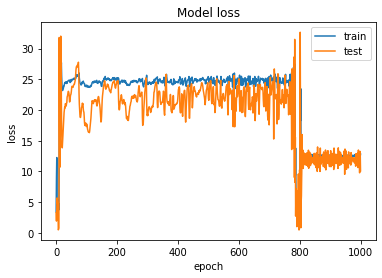

113.73684060156651
10.664747563893227
DN- 9  layers; 500 Units; LR- 2e-05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 3s 1ms/sample - loss: 6.3662 - mean_squared_error: 47.7797 - val_loss: 6.4338 - val_mean_squared_error: 48.6792
Epoch 2/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 6.2570 - mean_squared_error: 46.3371 - val_loss: 6.1993 - val_mean_squared_error: 45.5034
Epoch 3/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 6.0536 - mean_squared_error: 43.6441 - val_loss: 5.9017 - val_mean_squared_error: 41.6310
Epoch 4/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 5.8242 - mean_squared_error: 40.6753 - val_loss: 5.5706 - val_mean_squared_error: 37.5331
Epoch 5/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 5.5590 - mean_squared_error: 37.4087 - val_loss: 5.2236 - val_mean_squared_error: 33.4763
E

Epoch 48/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.5658 - mean_squared_error: 1.3427 - val_loss: 0.9634 - val_mean_squared_error: 2.7846
Epoch 49/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 0.5601 - mean_squared_error: 1.3315 - val_loss: 0.9610 - val_mean_squared_error: 2.7757
Epoch 50/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5635 - mean_squared_error: 1.3452 - val_loss: 0.9628 - val_mean_squared_error: 2.7819
Epoch 51/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5800 - mean_squared_error: 1.3841 - val_loss: 0.9656 - val_mean_squared_error: 2.7917
Epoch 52/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.5799 - mean_squared_error: 1.3944 - val_loss: 0.9653 - val_mean_squared_error: 2.7905
Epoch 53/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5640 - mean_squared_error: 1.3303 - val_loss: 0.9604 - val_m

Epoch 96/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5462 - mean_squared_error: 1.2866 - val_loss: 0.9179 - val_mean_squared_error: 2.6102
Epoch 97/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5616 - mean_squared_error: 1.3250 - val_loss: 0.9179 - val_mean_squared_error: 2.6098
Epoch 98/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.5521 - mean_squared_error: 1.2985 - val_loss: 0.9185 - val_mean_squared_error: 2.6119
Epoch 99/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5499 - mean_squared_error: 1.2842 - val_loss: 0.9171 - val_mean_squared_error: 2.6068
Epoch 100/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5507 - mean_squared_error: 1.3055 - val_loss: 0.9166 - val_mean_squared_error: 2.6048
Epoch 101/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5493 - mean_squared_error: 1.3076 - val_loss: 0.9165 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.5512 - mean_squared_error: 1.2957 - val_loss: 0.8833 - val_mean_squared_error: 2.4831
Epoch 145/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 0.5475 - mean_squared_error: 1.2819 - val_loss: 0.8808 - val_mean_squared_error: 2.4743
Epoch 146/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5348 - mean_squared_error: 1.2541 - val_loss: 0.8794 - val_mean_squared_error: 2.4692
Epoch 147/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5393 - mean_squared_error: 1.2609 - val_loss: 0.8772 - val_mean_squared_error: 2.4615
Epoch 148/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5381 - mean_squared_error: 1.2617 - val_loss: 0.8771 - val_mean_squared_error: 2.4611
Epoch 149/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5404 - mean_squared_error: 1.2695 - val_loss: 0.8762 -

2562/2562 [==============================] - 1s 226us/sample - loss: 0.5470 - mean_squared_error: 1.2757 - val_loss: 0.8644 - val_mean_squared_error: 2.4149
Epoch 192/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5403 - mean_squared_error: 1.2669 - val_loss: 0.8606 - val_mean_squared_error: 2.4014
Epoch 193/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5392 - mean_squared_error: 1.2599 - val_loss: 0.8592 - val_mean_squared_error: 2.3969
Epoch 194/1000
2562/2562 [==============================] - 1s 245us/sample - loss: 0.5421 - mean_squared_error: 1.2744 - val_loss: 0.8607 - val_mean_squared_error: 2.4018
Epoch 195/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5336 - mean_squared_error: 1.2473 - val_loss: 0.8614 - val_mean_squared_error: 2.4041
Epoch 196/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5392 - mean_squared_error: 1.2741 - val_loss: 0.8624 - val_mean_squar

2562/2562 [==============================] - 1s 227us/sample - loss: 0.5378 - mean_squared_error: 1.2625 - val_loss: 0.8450 - val_mean_squared_error: 2.3465
Epoch 239/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5294 - mean_squared_error: 1.2430 - val_loss: 0.8468 - val_mean_squared_error: 2.3526
Epoch 240/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5407 - mean_squared_error: 1.2655 - val_loss: 0.8492 - val_mean_squared_error: 2.3606
Epoch 241/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5272 - mean_squared_error: 1.2270 - val_loss: 0.8475 - val_mean_squared_error: 2.3550
Epoch 242/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 0.5321 - mean_squared_error: 1.2477 - val_loss: 0.8470 - val_mean_squared_error: 2.3532
Epoch 243/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5271 - mean_squared_error: 1.2305 - val_loss: 0.8464 - val_mean_squar

Epoch 286/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5273 - mean_squared_error: 1.2362 - val_loss: 0.8363 - val_mean_squared_error: 2.3158
Epoch 287/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5348 - mean_squared_error: 1.2605 - val_loss: 0.8350 - val_mean_squared_error: 2.3111
Epoch 288/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5311 - mean_squared_error: 1.2329 - val_loss: 0.8322 - val_mean_squared_error: 2.3016
Epoch 289/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5388 - mean_squared_error: 1.2548 - val_loss: 0.8309 - val_mean_squared_error: 2.2972
Epoch 290/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5341 - mean_squared_error: 1.2453 - val_loss: 0.8301 - val_mean_squared_error: 2.2946
Epoch 291/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5303 - mean_squared_error: 1.2388 - val_loss: 0.8266 -

2562/2562 [==============================] - 1s 233us/sample - loss: 0.5315 - mean_squared_error: 1.2422 - val_loss: 0.8227 - val_mean_squared_error: 2.2687
Epoch 334/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5316 - mean_squared_error: 1.2300 - val_loss: 0.8218 - val_mean_squared_error: 2.2657
Epoch 335/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.5317 - mean_squared_error: 1.2469 - val_loss: 0.8185 - val_mean_squared_error: 2.2544
Epoch 336/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5365 - mean_squared_error: 1.2438 - val_loss: 0.8146 - val_mean_squared_error: 2.2412
Epoch 337/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.5231 - mean_squared_error: 1.2169 - val_loss: 0.8118 - val_mean_squared_error: 2.2318
Epoch 338/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5212 - mean_squared_error: 1.2280 - val_loss: 0.8081 - val_mean_squar

2562/2562 [==============================] - 1s 230us/sample - loss: 0.5309 - mean_squared_error: 1.2418 - val_loss: 0.8124 - val_mean_squared_error: 2.2335
Epoch 381/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5300 - mean_squared_error: 1.2300 - val_loss: 0.8132 - val_mean_squared_error: 2.2362
Epoch 382/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.5302 - mean_squared_error: 1.2455 - val_loss: 0.8134 - val_mean_squared_error: 2.2368
Epoch 383/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5222 - mean_squared_error: 1.2091 - val_loss: 0.8104 - val_mean_squared_error: 2.2265
Epoch 384/1000
2562/2562 [==============================] - 1s 238us/sample - loss: 0.5296 - mean_squared_error: 1.2307 - val_loss: 0.8059 - val_mean_squared_error: 2.2114
Epoch 385/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5301 - mean_squared_error: 1.2476 - val_loss: 0.8046 - val_mean_squar

Epoch 428/1000
2562/2562 [==============================] - 1s 238us/sample - loss: 0.5255 - mean_squared_error: 1.2147 - val_loss: 0.8026 - val_mean_squared_error: 2.2000
Epoch 429/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5281 - mean_squared_error: 1.2317 - val_loss: 0.8012 - val_mean_squared_error: 2.1951
Epoch 430/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5357 - mean_squared_error: 1.2607 - val_loss: 0.7999 - val_mean_squared_error: 2.1909
Epoch 431/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5163 - mean_squared_error: 1.1908 - val_loss: 0.7992 - val_mean_squared_error: 2.1885
Epoch 432/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5167 - mean_squared_error: 1.1936 - val_loss: 0.7947 - val_mean_squared_error: 2.1733
Epoch 433/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5182 - mean_squared_error: 1.2094 - val_loss: 0.7914 -

2562/2562 [==============================] - 1s 225us/sample - loss: 0.5237 - mean_squared_error: 1.2074 - val_loss: 0.7870 - val_mean_squared_error: 2.1475
Epoch 476/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 0.5276 - mean_squared_error: 1.2265 - val_loss: 0.7849 - val_mean_squared_error: 2.1403
Epoch 477/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5244 - mean_squared_error: 1.2115 - val_loss: 0.7828 - val_mean_squared_error: 2.1332
Epoch 478/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5256 - mean_squared_error: 1.2238 - val_loss: 0.7811 - val_mean_squared_error: 2.1275
Epoch 479/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5220 - mean_squared_error: 1.2078 - val_loss: 0.7801 - val_mean_squared_error: 2.1244
Epoch 480/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5249 - mean_squared_error: 1.2303 - val_loss: 0.7819 - val_mean_squar

Epoch 523/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 0.5308 - mean_squared_error: 1.2353 - val_loss: 0.7756 - val_mean_squared_error: 2.1092
Epoch 524/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.5292 - mean_squared_error: 1.2358 - val_loss: 0.7746 - val_mean_squared_error: 2.1058
Epoch 525/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5212 - mean_squared_error: 1.2111 - val_loss: 0.7754 - val_mean_squared_error: 2.1083
Epoch 526/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 0.5184 - mean_squared_error: 1.2049 - val_loss: 0.7750 - val_mean_squared_error: 2.1072
Epoch 527/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.5309 - mean_squared_error: 1.2466 - val_loss: 0.7744 - val_mean_squared_error: 2.1052
Epoch 528/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5171 - mean_squared_error: 1.2073 - val_loss: 0.7726 -

2562/2562 [==============================] - 1s 229us/sample - loss: 0.5202 - mean_squared_error: 1.2081 - val_loss: 0.7613 - val_mean_squared_error: 2.0610
Epoch 571/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5237 - mean_squared_error: 1.2295 - val_loss: 0.7651 - val_mean_squared_error: 2.0736
Epoch 572/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 0.5218 - mean_squared_error: 1.2077 - val_loss: 0.7661 - val_mean_squared_error: 2.0770
Epoch 573/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5225 - mean_squared_error: 1.2074 - val_loss: 0.7632 - val_mean_squared_error: 2.0674
Epoch 574/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 0.5170 - mean_squared_error: 1.2024 - val_loss: 0.7615 - val_mean_squared_error: 2.0616
Epoch 575/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5250 - mean_squared_error: 1.2169 - val_loss: 0.7589 - val_mean_squar

Epoch 618/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5225 - mean_squared_error: 1.2150 - val_loss: 0.7613 - val_mean_squared_error: 2.0609
Epoch 619/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5212 - mean_squared_error: 1.2193 - val_loss: 0.7611 - val_mean_squared_error: 2.0601
Epoch 620/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5200 - mean_squared_error: 1.2061 - val_loss: 0.7604 - val_mean_squared_error: 2.0576
Epoch 621/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 0.5186 - mean_squared_error: 1.2036 - val_loss: 0.7581 - val_mean_squared_error: 2.0503
Epoch 622/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5288 - mean_squared_error: 1.2327 - val_loss: 0.7578 - val_mean_squared_error: 2.0491
Epoch 623/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5186 - mean_squared_error: 1.1971 - val_loss: 0.7545 -

2562/2562 [==============================] - 1s 226us/sample - loss: 0.5250 - mean_squared_error: 1.2250 - val_loss: 0.7451 - val_mean_squared_error: 2.0070
Epoch 666/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5102 - mean_squared_error: 1.1824 - val_loss: 0.7445 - val_mean_squared_error: 2.0048
Epoch 667/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5169 - mean_squared_error: 1.2023 - val_loss: 0.7431 - val_mean_squared_error: 2.0001
Epoch 668/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5171 - mean_squared_error: 1.2091 - val_loss: 0.7420 - val_mean_squared_error: 1.9967
Epoch 669/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.5306 - mean_squared_error: 1.2426 - val_loss: 0.7416 - val_mean_squared_error: 1.9952
Epoch 670/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.5097 - mean_squared_error: 1.1777 - val_loss: 0.7413 - val_mean_squar

Epoch 712/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5237 - mean_squared_error: 1.2202 - val_loss: 0.7445 - val_mean_squared_error: 2.0047
Epoch 713/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 0.5167 - mean_squared_error: 1.1979 - val_loss: 0.7432 - val_mean_squared_error: 2.0004
Epoch 714/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5259 - mean_squared_error: 1.2207 - val_loss: 0.7418 - val_mean_squared_error: 1.9957
Epoch 715/1000
2562/2562 [==============================] - 1s 242us/sample - loss: 0.5191 - mean_squared_error: 1.2057 - val_loss: 0.7427 - val_mean_squared_error: 1.9987
Epoch 716/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.5212 - mean_squared_error: 1.2134 - val_loss: 0.7418 - val_mean_squared_error: 1.9958
Epoch 717/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5212 - mean_squared_error: 1.2202 - val_loss: 0.7412 -

2562/2562 [==============================] - 1s 235us/sample - loss: 0.5235 - mean_squared_error: 1.2190 - val_loss: 0.7389 - val_mean_squared_error: 1.9863
Epoch 760/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5157 - mean_squared_error: 1.1888 - val_loss: 0.7395 - val_mean_squared_error: 1.9883
Epoch 761/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5197 - mean_squared_error: 1.2084 - val_loss: 0.7390 - val_mean_squared_error: 1.9868
Epoch 762/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5259 - mean_squared_error: 1.2408 - val_loss: 0.7371 - val_mean_squared_error: 1.9802
Epoch 763/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5125 - mean_squared_error: 1.1812 - val_loss: 0.7365 - val_mean_squared_error: 1.9784
Epoch 764/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5088 - mean_squared_error: 1.1855 - val_loss: 0.7355 - val_mean_squar

Epoch 807/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5166 - mean_squared_error: 1.2047 - val_loss: 0.7278 - val_mean_squared_error: 1.9496
Epoch 808/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5119 - mean_squared_error: 1.1862 - val_loss: 0.7268 - val_mean_squared_error: 1.9463
Epoch 809/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5241 - mean_squared_error: 1.2162 - val_loss: 0.7256 - val_mean_squared_error: 1.9423
Epoch 810/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5138 - mean_squared_error: 1.1919 - val_loss: 0.7237 - val_mean_squared_error: 1.9359
Epoch 811/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5177 - mean_squared_error: 1.1995 - val_loss: 0.7246 - val_mean_squared_error: 1.9389
Epoch 812/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5162 - mean_squared_error: 1.2083 - val_loss: 0.7252 -

2562/2562 [==============================] - 1s 225us/sample - loss: 0.5329 - mean_squared_error: 1.2467 - val_loss: 0.7248 - val_mean_squared_error: 1.9395
Epoch 855/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 0.5168 - mean_squared_error: 1.1978 - val_loss: 0.7244 - val_mean_squared_error: 1.9383
Epoch 856/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5217 - mean_squared_error: 1.2055 - val_loss: 0.7217 - val_mean_squared_error: 1.9294
Epoch 857/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5200 - mean_squared_error: 1.2088 - val_loss: 0.7228 - val_mean_squared_error: 1.9330
Epoch 858/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5168 - mean_squared_error: 1.1876 - val_loss: 0.7242 - val_mean_squared_error: 1.9375
Epoch 859/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5226 - mean_squared_error: 1.2134 - val_loss: 0.7243 - val_mean_squar

Epoch 902/1000
2562/2562 [==============================] - 1s 241us/sample - loss: 0.5085 - mean_squared_error: 1.1730 - val_loss: 0.7210 - val_mean_squared_error: 1.9272
Epoch 903/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5107 - mean_squared_error: 1.1833 - val_loss: 0.7204 - val_mean_squared_error: 1.9250
Epoch 904/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5172 - mean_squared_error: 1.1977 - val_loss: 0.7186 - val_mean_squared_error: 1.9191
Epoch 905/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5173 - mean_squared_error: 1.1967 - val_loss: 0.7172 - val_mean_squared_error: 1.9144
Epoch 906/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 0.5157 - mean_squared_error: 1.1968 - val_loss: 0.7169 - val_mean_squared_error: 1.9134
Epoch 907/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5155 - mean_squared_error: 1.1849 - val_loss: 0.7171 -

2562/2562 [==============================] - 1s 225us/sample - loss: 0.5309 - mean_squared_error: 1.2319 - val_loss: 0.7109 - val_mean_squared_error: 1.8937
Epoch 950/1000
2562/2562 [==============================] - 1s 238us/sample - loss: 0.5136 - mean_squared_error: 1.1950 - val_loss: 0.7076 - val_mean_squared_error: 1.8829
Epoch 951/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5185 - mean_squared_error: 1.2006 - val_loss: 0.7063 - val_mean_squared_error: 1.8788
Epoch 952/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5180 - mean_squared_error: 1.1997 - val_loss: 0.7059 - val_mean_squared_error: 1.8775
Epoch 953/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5116 - mean_squared_error: 1.1828 - val_loss: 0.7044 - val_mean_squared_error: 1.8726
Epoch 954/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5062 - mean_squared_error: 1.1650 - val_loss: 0.7050 - val_mean_squar

Epoch 997/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5224 - mean_squared_error: 1.2067 - val_loss: 0.7071 - val_mean_squared_error: 1.8813
Epoch 998/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 0.5229 - mean_squared_error: 1.2141 - val_loss: 0.7075 - val_mean_squared_error: 1.8827
Epoch 999/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5185 - mean_squared_error: 1.2039 - val_loss: 0.7083 - val_mean_squared_error: 1.8852
Epoch 1000/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5179 - mean_squared_error: 1.1942 - val_loss: 0.7102 - val_mean_squared_error: 1.8916


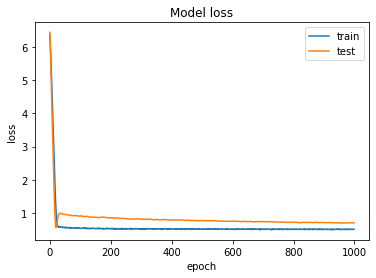

2.1008142245364567
1.449418581547945
DN- 9  layers; 500 Units; LR- 2e-05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 3s 1ms/sample - loss: 5.7481 - mean_squared_error: 40.2321 - val_loss: 5.6300 - val_mean_squared_error: 38.6802
Epoch 2/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 5.6272 - mean_squared_error: 38.7369 - val_loss: 5.4298 - val_mean_squared_error: 36.2718
Epoch 3/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 5.4481 - mean_squared_error: 36.5672 - val_loss: 5.1728 - val_mean_squared_error: 33.2991
Epoch 4/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 5.2511 - mean_squared_error: 34.2768 - val_loss: 4.8883 - val_mean_squared_error: 30.1650
Epoch 5/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 5.0287 - mean_squared_error: 31.8061 - val_loss: 4.5889 - val_mean_squared_error: 27.0425
Epoch 

2562/2562 [==============================] - 1s 232us/sample - loss: 0.5459 - mean_squared_error: 1.4277 - val_loss: 0.9072 - val_mean_squared_error: 2.7479
Epoch 48/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5294 - mean_squared_error: 1.3768 - val_loss: 0.9033 - val_mean_squared_error: 2.7337
Epoch 49/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5367 - mean_squared_error: 1.3950 - val_loss: 0.9011 - val_mean_squared_error: 2.7252
Epoch 50/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 0.5354 - mean_squared_error: 1.3849 - val_loss: 0.8999 - val_mean_squared_error: 2.7207
Epoch 51/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5123 - mean_squared_error: 1.3133 - val_loss: 0.9021 - val_mean_squared_error: 2.7283
Epoch 52/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 0.5371 - mean_squared_error: 1.3922 - val_loss: 0.9044 - val_mean_squared_er

Epoch 95/1000
2562/2562 [==============================] - 1s 237us/sample - loss: 0.5114 - mean_squared_error: 1.3066 - val_loss: 0.8539 - val_mean_squared_error: 2.5469
Epoch 96/1000
2562/2562 [==============================] - 1s 249us/sample - loss: 0.5078 - mean_squared_error: 1.3047 - val_loss: 0.8520 - val_mean_squared_error: 2.5401
Epoch 97/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5109 - mean_squared_error: 1.3139 - val_loss: 0.8515 - val_mean_squared_error: 2.5380
Epoch 98/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.5032 - mean_squared_error: 1.2928 - val_loss: 0.8508 - val_mean_squared_error: 2.5354
Epoch 99/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.5078 - mean_squared_error: 1.3104 - val_loss: 0.8519 - val_mean_squared_error: 2.5389
Epoch 100/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5128 - mean_squared_error: 1.3217 - val_loss: 0.8553 - val_

2562/2562 [==============================] - 1s 220us/sample - loss: 0.5020 - mean_squared_error: 1.2891 - val_loss: 0.8206 - val_mean_squared_error: 2.4249
Epoch 143/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5109 - mean_squared_error: 1.3171 - val_loss: 0.8213 - val_mean_squared_error: 2.4272
Epoch 144/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.4851 - mean_squared_error: 1.2341 - val_loss: 0.8213 - val_mean_squared_error: 2.4268
Epoch 145/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4938 - mean_squared_error: 1.2524 - val_loss: 0.8189 - val_mean_squared_error: 2.4186
Epoch 146/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 0.4985 - mean_squared_error: 1.2725 - val_loss: 0.8200 - val_mean_squared_error: 2.4222
Epoch 147/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.5015 - mean_squared_error: 1.2968 - val_loss: 0.8219 - val_mean_squar

2562/2562 [==============================] - 1s 246us/sample - loss: 0.5020 - mean_squared_error: 1.2886 - val_loss: 0.8019 - val_mean_squared_error: 2.3570
Epoch 190/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4919 - mean_squared_error: 1.2583 - val_loss: 0.8030 - val_mean_squared_error: 2.3607
Epoch 191/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.4891 - mean_squared_error: 1.2699 - val_loss: 0.8044 - val_mean_squared_error: 2.3653
Epoch 192/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.4941 - mean_squared_error: 1.2680 - val_loss: 0.8058 - val_mean_squared_error: 2.3701
Epoch 193/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4894 - mean_squared_error: 1.2401 - val_loss: 0.8086 - val_mean_squared_error: 2.3794
Epoch 194/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4807 - mean_squared_error: 1.2233 - val_loss: 0.8090 - val_mean_squar

Epoch 237/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.4826 - mean_squared_error: 1.2172 - val_loss: 0.7801 - val_mean_squared_error: 2.2808
Epoch 238/1000
2562/2562 [==============================] - ETA: 0s - loss: 0.4958 - mean_squared_error: 1.28 - 1s 219us/sample - loss: 0.4960 - mean_squared_error: 1.2825 - val_loss: 0.7792 - val_mean_squared_error: 2.2777
Epoch 239/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4885 - mean_squared_error: 1.2538 - val_loss: 0.7817 - val_mean_squared_error: 2.2862
Epoch 240/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4957 - mean_squared_error: 1.2599 - val_loss: 0.7854 - val_mean_squared_error: 2.2986
Epoch 241/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 0.4853 - mean_squared_error: 1.2492 - val_loss: 0.7869 - val_mean_squared_error: 2.3035
Epoch 242/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.48

2562/2562 [==============================] - 1s 225us/sample - loss: 0.4754 - mean_squared_error: 1.2110 - val_loss: 0.7782 - val_mean_squared_error: 2.2725
Epoch 285/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.4850 - mean_squared_error: 1.2438 - val_loss: 0.7789 - val_mean_squared_error: 2.2747
Epoch 286/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.4888 - mean_squared_error: 1.2443 - val_loss: 0.7763 - val_mean_squared_error: 2.2660
Epoch 287/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4884 - mean_squared_error: 1.2663 - val_loss: 0.7740 - val_mean_squared_error: 2.2581
Epoch 288/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4880 - mean_squared_error: 1.2471 - val_loss: 0.7751 - val_mean_squared_error: 2.2618
Epoch 289/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4939 - mean_squared_error: 1.2779 - val_loss: 0.7739 - val_mean_squar

2562/2562 [==============================] - 1s 218us/sample - loss: 0.4783 - mean_squared_error: 1.2245 - val_loss: 0.7512 - val_mean_squared_error: 2.1805
Epoch 332/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4928 - mean_squared_error: 1.2605 - val_loss: 0.7537 - val_mean_squared_error: 2.1889
Epoch 333/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.4938 - mean_squared_error: 1.2472 - val_loss: 0.7563 - val_mean_squared_error: 2.1976
Epoch 334/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4823 - mean_squared_error: 1.2321 - val_loss: 0.7604 - val_mean_squared_error: 2.2111
Epoch 335/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 0.4829 - mean_squared_error: 1.2341 - val_loss: 0.7626 - val_mean_squared_error: 2.2185
Epoch 336/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4734 - mean_squared_error: 1.2051 - val_loss: 0.7620 - val_mean_squar

2562/2562 [==============================] - 1s 222us/sample - loss: 0.4795 - mean_squared_error: 1.2334 - val_loss: 0.7438 - val_mean_squared_error: 2.1547
Epoch 379/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4858 - mean_squared_error: 1.2333 - val_loss: 0.7401 - val_mean_squared_error: 2.1423
Epoch 380/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.4839 - mean_squared_error: 1.2297 - val_loss: 0.7371 - val_mean_squared_error: 2.1323
Epoch 381/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.4835 - mean_squared_error: 1.2350 - val_loss: 0.7363 - val_mean_squared_error: 2.1297
Epoch 382/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4926 - mean_squared_error: 1.2660 - val_loss: 0.7360 - val_mean_squared_error: 2.1289
Epoch 383/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4860 - mean_squared_error: 1.2370 - val_loss: 0.7372 - val_mean_squar

2562/2562 [==============================] - 1s 224us/sample - loss: 0.4852 - mean_squared_error: 1.2399 - val_loss: 0.7416 - val_mean_squared_error: 2.1464
Epoch 426/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.4803 - mean_squared_error: 1.2298 - val_loss: 0.7398 - val_mean_squared_error: 2.1405
Epoch 427/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4770 - mean_squared_error: 1.2075 - val_loss: 0.7374 - val_mean_squared_error: 2.1324
Epoch 428/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4741 - mean_squared_error: 1.2059 - val_loss: 0.7365 - val_mean_squared_error: 2.1294
Epoch 429/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4739 - mean_squared_error: 1.2011 - val_loss: 0.7357 - val_mean_squared_error: 2.1267
Epoch 430/1000
2562/2562 [==============================] - 1s 262us/sample - loss: 0.4880 - mean_squared_error: 1.2406 - val_loss: 0.7338 - val_mean_squar

Epoch 473/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4792 - mean_squared_error: 1.2266 - val_loss: 0.7344 - val_mean_squared_error: 2.1216
Epoch 474/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4831 - mean_squared_error: 1.2381 - val_loss: 0.7338 - val_mean_squared_error: 2.1196
Epoch 475/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.4716 - mean_squared_error: 1.2117 - val_loss: 0.7315 - val_mean_squared_error: 2.1120
Epoch 476/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.4876 - mean_squared_error: 1.2453 - val_loss: 0.7330 - val_mean_squared_error: 2.1171
Epoch 477/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.4791 - mean_squared_error: 1.2101 - val_loss: 0.7347 - val_mean_squared_error: 2.1225
Epoch 478/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 0.4818 - mean_squared_error: 1.2238 - val_loss: 0.7349 -

2562/2562 [==============================] - 1s 235us/sample - loss: 0.4800 - mean_squared_error: 1.2196 - val_loss: 0.7130 - val_mean_squared_error: 2.0500
Epoch 521/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.4623 - mean_squared_error: 1.1737 - val_loss: 0.7141 - val_mean_squared_error: 2.0537
Epoch 522/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.4727 - mean_squared_error: 1.2025 - val_loss: 0.7170 - val_mean_squared_error: 2.0634
Epoch 523/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.4791 - mean_squared_error: 1.2225 - val_loss: 0.7184 - val_mean_squared_error: 2.0679
Epoch 524/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 0.4852 - mean_squared_error: 1.2497 - val_loss: 0.7191 - val_mean_squared_error: 2.0702
Epoch 525/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.4761 - mean_squared_error: 1.2143 - val_loss: 0.7178 - val_mean_squar

Epoch 568/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4809 - mean_squared_error: 1.2453 - val_loss: 0.7131 - val_mean_squared_error: 2.0498
Epoch 569/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4885 - mean_squared_error: 1.2388 - val_loss: 0.7136 - val_mean_squared_error: 2.0513
Epoch 570/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.4787 - mean_squared_error: 1.2248 - val_loss: 0.7109 - val_mean_squared_error: 2.0424
Epoch 571/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4809 - mean_squared_error: 1.2197 - val_loss: 0.7089 - val_mean_squared_error: 2.0360
Epoch 572/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4731 - mean_squared_error: 1.2145 - val_loss: 0.7094 - val_mean_squared_error: 2.0376
Epoch 573/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.4752 - mean_squared_error: 1.2108 - val_loss: 0.7118 -

2562/2562 [==============================] - 1s 226us/sample - loss: 0.4765 - mean_squared_error: 1.1989 - val_loss: 0.6965 - val_mean_squared_error: 1.9948
Epoch 616/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4747 - mean_squared_error: 1.2105 - val_loss: 0.6957 - val_mean_squared_error: 1.9920
Epoch 617/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.4765 - mean_squared_error: 1.2106 - val_loss: 0.6961 - val_mean_squared_error: 1.9934
Epoch 618/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4788 - mean_squared_error: 1.2235 - val_loss: 0.6952 - val_mean_squared_error: 1.9903
Epoch 619/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.4767 - mean_squared_error: 1.2138 - val_loss: 0.6943 - val_mean_squared_error: 1.9875
Epoch 620/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 0.4707 - mean_squared_error: 1.1944 - val_loss: 0.6954 - val_mean_squar

2562/2562 [==============================] - 1s 223us/sample - loss: 0.4754 - mean_squared_error: 1.2235 - val_loss: 0.6950 - val_mean_squared_error: 1.9893
Epoch 663/1000
2562/2562 [==============================] - 1s 250us/sample - loss: 0.4682 - mean_squared_error: 1.1876 - val_loss: 0.6961 - val_mean_squared_error: 1.9930
Epoch 664/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4673 - mean_squared_error: 1.1913 - val_loss: 0.6966 - val_mean_squared_error: 1.9948
Epoch 665/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4715 - mean_squared_error: 1.2007 - val_loss: 0.6945 - val_mean_squared_error: 1.9878
Epoch 666/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.4816 - mean_squared_error: 1.2336 - val_loss: 0.6918 - val_mean_squared_error: 1.9788
Epoch 667/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.4742 - mean_squared_error: 1.2102 - val_loss: 0.6901 - val_mean_squar

Epoch 710/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4833 - mean_squared_error: 1.2447 - val_loss: 0.6810 - val_mean_squared_error: 1.9431
Epoch 711/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4683 - mean_squared_error: 1.1969 - val_loss: 0.6784 - val_mean_squared_error: 1.9347
Epoch 712/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.4785 - mean_squared_error: 1.2241 - val_loss: 0.6780 - val_mean_squared_error: 1.9332
Epoch 713/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4891 - mean_squared_error: 1.2542 - val_loss: 0.6797 - val_mean_squared_error: 1.9389
Epoch 714/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 0.4714 - mean_squared_error: 1.2013 - val_loss: 0.6834 - val_mean_squared_error: 1.9509
Epoch 715/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4705 - mean_squared_error: 1.2014 - val_loss: 0.6840 -

2562/2562 [==============================] - 1s 231us/sample - loss: 0.4673 - mean_squared_error: 1.1853 - val_loss: 0.6796 - val_mean_squared_error: 1.9384
Epoch 758/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 0.4714 - mean_squared_error: 1.2031 - val_loss: 0.6804 - val_mean_squared_error: 1.9410
Epoch 759/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.4742 - mean_squared_error: 1.2099 - val_loss: 0.6804 - val_mean_squared_error: 1.9410
Epoch 760/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.4712 - mean_squared_error: 1.2037 - val_loss: 0.6793 - val_mean_squared_error: 1.9372
Epoch 761/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4688 - mean_squared_error: 1.2040 - val_loss: 0.6766 - val_mean_squared_error: 1.9285
Epoch 762/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4674 - mean_squared_error: 1.1905 - val_loss: 0.6751 - val_mean_squar

Epoch 805/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4793 - mean_squared_error: 1.2224 - val_loss: 0.6807 - val_mean_squared_error: 1.9419
Epoch 806/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4756 - mean_squared_error: 1.2137 - val_loss: 0.6800 - val_mean_squared_error: 1.9394
Epoch 807/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4664 - mean_squared_error: 1.1911 - val_loss: 0.6776 - val_mean_squared_error: 1.9316
Epoch 808/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4717 - mean_squared_error: 1.1936 - val_loss: 0.6737 - val_mean_squared_error: 1.9190
Epoch 809/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4748 - mean_squared_error: 1.2051 - val_loss: 0.6697 - val_mean_squared_error: 1.9059
Epoch 810/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4661 - mean_squared_error: 1.1886 - val_loss: 0.6670 -

2562/2562 [==============================] - 1s 233us/sample - loss: 0.4647 - mean_squared_error: 1.1773 - val_loss: 0.6691 - val_mean_squared_error: 1.9037
Epoch 853/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.4644 - mean_squared_error: 1.1874 - val_loss: 0.6673 - val_mean_squared_error: 1.8978
Epoch 854/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 0.4721 - mean_squared_error: 1.1980 - val_loss: 0.6638 - val_mean_squared_error: 1.8862
Epoch 855/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4698 - mean_squared_error: 1.1979 - val_loss: 0.6596 - val_mean_squared_error: 1.8727
Epoch 856/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4750 - mean_squared_error: 1.2034 - val_loss: 0.6566 - val_mean_squared_error: 1.8630
Epoch 857/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4750 - mean_squared_error: 1.2067 - val_loss: 0.6566 - val_mean_squar

2562/2562 [==============================] - 1s 226us/sample - loss: 0.4656 - mean_squared_error: 1.1827 - val_loss: 0.6678 - val_mean_squared_error: 1.8994
Epoch 900/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.4678 - mean_squared_error: 1.1911 - val_loss: 0.6662 - val_mean_squared_error: 1.8941
Epoch 901/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4696 - mean_squared_error: 1.1948 - val_loss: 0.6654 - val_mean_squared_error: 1.8914
Epoch 902/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4757 - mean_squared_error: 1.2202 - val_loss: 0.6664 - val_mean_squared_error: 1.8946
Epoch 903/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 0.4689 - mean_squared_error: 1.1845 - val_loss: 0.6666 - val_mean_squared_error: 1.8953
Epoch 904/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4689 - mean_squared_error: 1.1978 - val_loss: 0.6665 - val_mean_squar

2562/2562 [==============================] - 1s 222us/sample - loss: 0.4675 - mean_squared_error: 1.2008 - val_loss: 0.6689 - val_mean_squared_error: 1.9029
Epoch 947/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.4641 - mean_squared_error: 1.1857 - val_loss: 0.6680 - val_mean_squared_error: 1.8999
Epoch 948/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 0.4673 - mean_squared_error: 1.1922 - val_loss: 0.6647 - val_mean_squared_error: 1.8891
Epoch 949/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.4675 - mean_squared_error: 1.1858 - val_loss: 0.6632 - val_mean_squared_error: 1.8840
Epoch 950/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 0.4769 - mean_squared_error: 1.2165 - val_loss: 0.6643 - val_mean_squared_error: 1.8876
Epoch 951/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 0.4717 - mean_squared_error: 1.2020 - val_loss: 0.6646 - val_mean_squar

Epoch 994/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4759 - mean_squared_error: 1.1972 - val_loss: 0.6480 - val_mean_squared_error: 1.8342
Epoch 995/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4723 - mean_squared_error: 1.2012 - val_loss: 0.6469 - val_mean_squared_error: 1.8309
Epoch 996/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 0.4618 - mean_squared_error: 1.1646 - val_loss: 0.6500 - val_mean_squared_error: 1.8410
Epoch 997/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4718 - mean_squared_error: 1.1947 - val_loss: 0.6503 - val_mean_squared_error: 1.8417
Epoch 998/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4778 - mean_squared_error: 1.2208 - val_loss: 0.6510 - val_mean_squared_error: 1.8441
Epoch 999/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.4647 - mean_squared_error: 1.1744 - val_loss: 0.6531 -

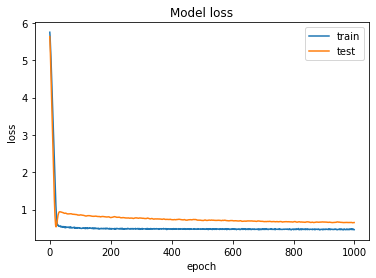

2.067961674236813
1.4380409153556142
DN- 10  layers; 300 Units; LR- 0.05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 3s 1ms/sample - loss: 4.1281 - mean_squared_error: 29.7005 - val_loss: 1.8552 - val_mean_squared_error: 6.4970
Epoch 2/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 2.0353 - mean_squared_error: 9.1987 - val_loss: 2.0287 - val_mean_squared_error: 7.3341
Epoch 3/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 4.7789 - mean_squared_error: 34.3086 - val_loss: 1.4946 - val_mean_squared_error: 4.5703
Epoch 4/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 5.2713 - mean_squared_error: 39.2752 - val_loss: 2.5818 - val_mean_squared_error: 10.3879
Epoch 5/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 5.0532 - mean_squared_error: 38.5333 - val_loss: 6.5741 - val_mean_squared_error: 50.5812
Epoch 

Epoch 47/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 6.4494 - mean_squared_error: 51.1685 - val_loss: 6.9268 - val_mean_squared_error: 55.6100
Epoch 48/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 6.5135 - mean_squared_error: 52.8150 - val_loss: 9.2052 - val_mean_squared_error: 94.4295
Epoch 49/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 6.8670 - mean_squared_error: 63.0646 - val_loss: 5.5429 - val_mean_squared_error: 37.1001
Epoch 50/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 6.4030 - mean_squared_error: 51.3112 - val_loss: 6.4184 - val_mean_squared_error: 48.3650
Epoch 51/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 6.5018 - mean_squared_error: 52.6022 - val_loss: 7.5023 - val_mean_squared_error: 64.4357
Epoch 52/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 6.7480 - mean_squared_error: 55.6538 - val_loss: 6.9

2562/2562 [==============================] - 1s 217us/sample - loss: 6.3168 - mean_squared_error: 50.0097 - val_loss: 6.9177 - val_mean_squared_error: 55.4750
Epoch 95/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 6.3336 - mean_squared_error: 50.2778 - val_loss: 6.3910 - val_mean_squared_error: 47.9885
Epoch 96/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 6.3401 - mean_squared_error: 49.9539 - val_loss: 7.2254 - val_mean_squared_error: 60.1061
Epoch 97/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 6.5697 - mean_squared_error: 53.2664 - val_loss: 6.4821 - val_mean_squared_error: 49.2433
Epoch 98/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 6.4375 - mean_squared_error: 51.4027 - val_loss: 6.5636 - val_mean_squared_error: 50.3808
Epoch 99/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 6.3159 - mean_squared_error: 49.9506 - val_loss: 6.7066 - val_mean

2562/2562 [==============================] - 1s 210us/sample - loss: 6.3852 - mean_squared_error: 51.3735 - val_loss: 6.1662 - val_mean_squared_error: 44.9610
Epoch 142/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 6.1721 - mean_squared_error: 48.1174 - val_loss: 7.1265 - val_mean_squared_error: 58.5952
Epoch 143/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 6.3431 - mean_squared_error: 50.3893 - val_loss: 7.0377 - val_mean_squared_error: 57.2574
Epoch 144/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 6.4277 - mean_squared_error: 51.5876 - val_loss: 7.1343 - val_mean_squared_error: 58.7144
Epoch 145/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 6.3774 - mean_squared_error: 51.1009 - val_loss: 6.3263 - val_mean_squared_error: 47.1063
Epoch 146/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 6.1627 - mean_squared_error: 48.3518 - val_loss: 7.1437 - val

2562/2562 [==============================] - 1s 215us/sample - loss: 5.9162 - mean_squared_error: 44.8073 - val_loss: 6.2579 - val_mean_squared_error: 46.1826
Epoch 189/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 5.9843 - mean_squared_error: 45.6414 - val_loss: 5.7948 - val_mean_squared_error: 40.1819
Epoch 190/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 5.8362 - mean_squared_error: 44.2213 - val_loss: 6.7239 - val_mean_squared_error: 52.6550
Epoch 191/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 5.9699 - mean_squared_error: 45.8140 - val_loss: 7.4430 - val_mean_squared_error: 63.4933
Epoch 192/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 6.0892 - mean_squared_error: 47.4152 - val_loss: 7.1342 - val_mean_squared_error: 58.7116
Epoch 193/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 6.0154 - mean_squared_error: 47.7109 - val_loss: 5.4377 - val

Epoch 235/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 5.9375 - mean_squared_error: 45.1867 - val_loss: 7.5546 - val_mean_squared_error: 65.2682
Epoch 236/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 6.0465 - mean_squared_error: 47.5213 - val_loss: 6.2330 - val_mean_squared_error: 45.8486
Epoch 237/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 5.8337 - mean_squared_error: 44.0507 - val_loss: 5.2087 - val_mean_squared_error: 33.2015
Epoch 238/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 5.5405 - mean_squared_error: 40.7229 - val_loss: 6.0679 - val_mean_squared_error: 43.6692
Epoch 239/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 5.6995 - mean_squared_error: 42.1719 - val_loss: 6.8925 - val_mean_squared_error: 55.1024
Epoch 240/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 5.9705 - mean_squared_error: 45.6989 - val_los

2562/2562 [==============================] - 1s 220us/sample - loss: 5.4091 - mean_squared_error: 39.4809 - val_loss: 6.6149 - val_mean_squared_error: 51.1003
Epoch 283/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 5.4275 - mean_squared_error: 39.3832 - val_loss: 7.8549 - val_mean_squared_error: 70.1659
Epoch 284/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 5.6657 - mean_squared_error: 44.9492 - val_loss: 7.0809 - val_mean_squared_error: 57.9044
Epoch 285/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 5.2564 - mean_squared_error: 39.6804 - val_loss: 7.0754 - val_mean_squared_error: 57.8217
Epoch 286/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 5.0988 - mean_squared_error: 38.4882 - val_loss: 7.7885 - val_mean_squared_error: 69.0667
Epoch 287/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 5.0351 - mean_squared_error: 39.6709 - val_loss: 7.1495 - val

Epoch 328/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 24.8639 - mean_squared_error: 722.5206 - val_loss: 8.1072 - val_mean_squared_error: 74.3728
Epoch 329/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 22.0243 - mean_squared_error: 620.6669 - val_loss: 29.8804 - val_mean_squared_error: 921.0749
Epoch 330/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 24.3235 - mean_squared_error: 707.3066 - val_loss: 12.8212 - val_mean_squared_error: 177.2699
Epoch 331/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 19.6690 - mean_squared_error: 486.1573 - val_loss: 33.3330 - val_mean_squared_error: 1142.4266
Epoch 332/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 25.4279 - mean_squared_error: 756.4147 - val_loss: 11.0465 - val_mean_squared_error: 133.3136
Epoch 333/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 20.2181 - mean_squared_erro

Epoch 374/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 25.0004 - mean_squared_error: 737.4449 - val_loss: 9.4318 - val_mean_squared_error: 98.7862
Epoch 375/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 20.8227 - mean_squared_error: 559.1234 - val_loss: 32.3163 - val_mean_squared_error: 1074.7375
Epoch 376/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 24.7312 - mean_squared_error: 719.0752 - val_loss: 10.0783 - val_mean_squared_error: 111.9800
Epoch 377/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 21.1336 - mean_squared_error: 568.1228 - val_loss: 30.8528 - val_mean_squared_error: 980.9672
Epoch 378/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 24.3333 - mean_squared_error: 703.8721 - val_loss: 11.2776 - val_mean_squared_error: 138.6686
Epoch 379/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 20.5386 - mean_squared_erro

Epoch 420/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 25.0188 - mean_squared_error: 739.6684 - val_loss: 10.8731 - val_mean_squared_error: 129.3367
Epoch 421/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 19.9485 - mean_squared_error: 513.9766 - val_loss: 33.6711 - val_mean_squared_error: 1165.3223
Epoch 422/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 25.1408 - mean_squared_error: 744.7047 - val_loss: 9.1613 - val_mean_squared_error: 93.5049
Epoch 423/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 20.4338 - mean_squared_error: 548.5914 - val_loss: 32.6027 - val_mean_squared_error: 1093.5554
Epoch 424/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 25.0718 - mean_squared_error: 742.9979 - val_loss: 10.9993 - val_mean_squared_error: 132.2077
Epoch 425/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 20.2755 - mean_squared_err

Epoch 466/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 24.6737 - mean_squared_error: 728.2946 - val_loss: 11.3942 - val_mean_squared_error: 141.3990
Epoch 467/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 20.0419 - mean_squared_error: 518.7899 - val_loss: 32.3026 - val_mean_squared_error: 1073.7836
Epoch 468/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 25.0440 - mean_squared_error: 747.2794 - val_loss: 10.9569 - val_mean_squared_error: 131.2319
Epoch 469/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 20.2434 - mean_squared_error: 527.3693 - val_loss: 32.3514 - val_mean_squared_error: 1076.9818
Epoch 470/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 24.6348 - mean_squared_error: 726.3495 - val_loss: 10.3171 - val_mean_squared_error: 117.0471
Epoch 471/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 20.8291 - mean_squared_e

Epoch 512/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 24.9922 - mean_squared_error: 740.8063 - val_loss: 10.2003 - val_mean_squared_error: 114.5473
Epoch 513/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 21.2891 - mean_squared_error: 577.5712 - val_loss: 30.5379 - val_mean_squared_error: 961.3063
Epoch 514/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 24.4894 - mean_squared_error: 719.8905 - val_loss: 11.8834 - val_mean_squared_error: 153.2252
Epoch 515/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 20.3262 - mean_squared_error: 525.4906 - val_loss: 31.9512 - val_mean_squared_error: 1050.8878
Epoch 516/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 24.6401 - mean_squared_error: 729.4977 - val_loss: 10.8450 - val_mean_squared_error: 128.6933
Epoch 517/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 20.1324 - mean_squared_er

2562/2562 [==============================] - 1s 214us/sample - loss: 20.1714 - mean_squared_error: 525.8069 - val_loss: 32.5733 - val_mean_squared_error: 1091.5908
Epoch 558/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 24.8697 - mean_squared_error: 739.2095 - val_loss: 10.8050 - val_mean_squared_error: 127.7916
Epoch 559/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 20.4747 - mean_squared_error: 536.2383 - val_loss: 32.5692 - val_mean_squared_error: 1091.3198
Epoch 560/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 24.8906 - mean_squared_error: 733.5357 - val_loss: 10.3735 - val_mean_squared_error: 118.2667
Epoch 561/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 20.6869 - mean_squared_error: 550.4497 - val_loss: 32.0486 - val_mean_squared_error: 1057.2091
Epoch 562/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 24.6550 - mean_squared_error: 722.9103

Epoch 603/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 20.2371 - mean_squared_error: 531.7286 - val_loss: 32.3975 - val_mean_squared_error: 1080.0101
Epoch 604/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 25.1074 - mean_squared_error: 750.2316 - val_loss: 10.5892 - val_mean_squared_error: 122.9814
Epoch 605/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 20.3066 - mean_squared_error: 532.0902 - val_loss: 32.1731 - val_mean_squared_error: 1065.3170
Epoch 606/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 24.8487 - mean_squared_error: 734.7939 - val_loss: 10.8073 - val_mean_squared_error: 127.8438
Epoch 607/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 19.7853 - mean_squared_error: 507.2076 - val_loss: 33.1728 - val_mean_squared_error: 1131.5400
Epoch 608/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 25.3221 - mean_squared_

Epoch 649/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 20.7568 - mean_squared_error: 550.5002 - val_loss: 31.4604 - val_mean_squared_error: 1019.3311
Epoch 650/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 24.6103 - mean_squared_error: 725.0734 - val_loss: 11.7218 - val_mean_squared_error: 149.2678
Epoch 651/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 20.2587 - mean_squared_error: 522.3777 - val_loss: 32.2870 - val_mean_squared_error: 1072.7638
Epoch 652/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 24.9203 - mean_squared_error: 737.7123 - val_loss: 10.8879 - val_mean_squared_error: 129.6642
Epoch 653/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 20.4278 - mean_squared_error: 536.1494 - val_loss: 31.4794 - val_mean_squared_error: 1020.5372
Epoch 654/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 25.0011 - mean_squared_

Epoch 695/1000
2562/2562 [==============================] - 1s 255us/sample - loss: 20.6731 - mean_squared_error: 550.5112 - val_loss: 31.9993 - val_mean_squared_error: 1054.0177
Epoch 696/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 24.6259 - mean_squared_error: 720.7547 - val_loss: 10.2029 - val_mean_squared_error: 114.6059
Epoch 697/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 20.5393 - mean_squared_error: 546.5231 - val_loss: 32.3128 - val_mean_squared_error: 1074.4648
Epoch 698/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 24.8640 - mean_squared_error: 733.8175 - val_loss: 10.6822 - val_mean_squared_error: 125.0462
Epoch 699/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 20.3429 - mean_squared_error: 535.6974 - val_loss: 31.8533 - val_mean_squared_error: 1044.5637
Epoch 700/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 24.8246 - mean_squared_

Epoch 741/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 20.9789 - mean_squared_error: 565.1822 - val_loss: 31.5052 - val_mean_squared_error: 1022.2094
Epoch 742/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 24.2204 - mean_squared_error: 698.9672 - val_loss: 8.8877 - val_mean_squared_error: 88.3201
Epoch 743/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 21.5551 - mean_squared_error: 601.4692 - val_loss: 30.7681 - val_mean_squared_error: 975.6437
Epoch 744/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 24.3130 - mean_squared_error: 705.1456 - val_loss: 11.1283 - val_mean_squared_error: 135.1792
Epoch 745/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 20.4454 - mean_squared_error: 536.6491 - val_loss: 31.9933 - val_mean_squared_error: 1053.6385
Epoch 746/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 24.7076 - mean_squared_err

Epoch 787/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 20.5127 - mean_squared_error: 539.5860 - val_loss: 31.9858 - val_mean_squared_error: 1053.1562
Epoch 788/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 24.8403 - mean_squared_error: 731.3264 - val_loss: 11.0896 - val_mean_squared_error: 134.2861
Epoch 789/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 20.4664 - mean_squared_error: 533.8097 - val_loss: 32.1613 - val_mean_squared_error: 1064.5681
Epoch 790/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 24.7938 - mean_squared_error: 729.1675 - val_loss: 11.0747 - val_mean_squared_error: 133.9417
Epoch 791/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 19.9923 - mean_squared_error: 513.4351 - val_loss: 32.0980 - val_mean_squared_error: 1060.4474
Epoch 792/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 24.9510 - mean_squared_

Epoch 833/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 21.4351 - mean_squared_error: 595.8180 - val_loss: 30.9818 - val_mean_squared_error: 989.0439
Epoch 834/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 24.4270 - mean_squared_error: 708.7675 - val_loss: 11.0100 - val_mean_squared_error: 132.4579
Epoch 835/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 20.3412 - mean_squared_error: 528.8362 - val_loss: 32.4322 - val_mean_squared_error: 1082.3201
Epoch 836/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 24.9037 - mean_squared_error: 734.0797 - val_loss: 11.1510 - val_mean_squared_error: 135.7089
Epoch 837/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 20.0392 - mean_squared_error: 515.2654 - val_loss: 33.1406 - val_mean_squared_error: 1129.4089
Epoch 838/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 24.8938 - mean_squared_e

Epoch 879/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 20.6808 - mean_squared_error: 546.9081 - val_loss: 31.7872 - val_mean_squared_error: 1040.3202
Epoch 880/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 24.7276 - mean_squared_error: 726.6643 - val_loss: 11.1399 - val_mean_squared_error: 135.4517
Epoch 881/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 20.5142 - mean_squared_error: 533.2128 - val_loss: 32.0712 - val_mean_squared_error: 1058.7109
Epoch 882/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 24.6925 - mean_squared_error: 721.0869 - val_loss: 11.2521 - val_mean_squared_error: 138.0659
Epoch 883/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 20.4362 - mean_squared_error: 531.9751 - val_loss: 32.3509 - val_mean_squared_error: 1076.9805
Epoch 884/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 25.0154 - mean_squared_

Epoch 925/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 21.4876 - mean_squared_error: 595.8962 - val_loss: 31.1029 - val_mean_squared_error: 996.6656
Epoch 926/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 24.4745 - mean_squared_error: 712.5668 - val_loss: 10.6411 - val_mean_squared_error: 124.1381
Epoch 927/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 20.8667 - mean_squared_error: 556.6765 - val_loss: 31.5638 - val_mean_squared_error: 1025.9635
Epoch 928/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 24.7805 - mean_squared_error: 728.9055 - val_loss: 11.5686 - val_mean_squared_error: 145.5702
Epoch 929/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 19.9087 - mean_squared_error: 510.8286 - val_loss: 33.0262 - val_mean_squared_error: 1121.7262
Epoch 930/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 25.2772 - mean_squared_e

Epoch 971/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 20.4064 - mean_squared_error: 530.9790 - val_loss: 32.4601 - val_mean_squared_error: 1084.1638
Epoch 972/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 24.6120 - mean_squared_error: 717.3003 - val_loss: 9.4934 - val_mean_squared_error: 100.0023
Epoch 973/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 21.0017 - mean_squared_error: 569.6467 - val_loss: 31.8593 - val_mean_squared_error: 1044.9830
Epoch 974/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 24.5961 - mean_squared_error: 716.6262 - val_loss: 10.1085 - val_mean_squared_error: 112.6130
Epoch 975/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 21.2235 - mean_squared_error: 573.9350 - val_loss: 30.9975 - val_mean_squared_error: 990.0397
Epoch 976/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 24.6035 - mean_squared_er

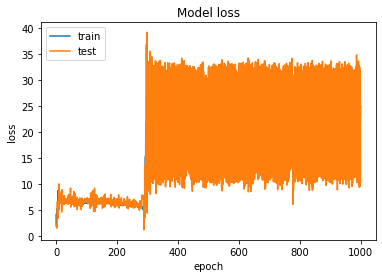

119.39227672798091
10.926677295865423
DN- 10  layers; 300 Units; LR- 0.05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 3s 1ms/sample - loss: 4.1525 - mean_squared_error: 27.9144 - val_loss: 1.1653 - val_mean_squared_error: 3.6878
Epoch 2/1000
2562/2562 [==============================] - 1s 249us/sample - loss: 1.6000 - mean_squared_error: 6.7220 - val_loss: 4.8267 - val_mean_squared_error: 29.5245
Epoch 3/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 4.8616 - mean_squared_error: 34.9486 - val_loss: 7.8484 - val_mean_squared_error: 70.8439
Epoch 4/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 5.6158 - mean_squared_error: 42.3211 - val_loss: 4.3564 - val_mean_squared_error: 24.6805
Epoch 5/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 9.6249 - mean_squared_error: 124.6053 - val_loss: 1.1588 - val_mean_squared_error: 3.3977
Epoch 6

2562/2562 [==============================] - 1s 215us/sample - loss: 6.4312 - mean_squared_error: 53.3537 - val_loss: 7.0508 - val_mean_squared_error: 58.1647
Epoch 48/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 6.6190 - mean_squared_error: 56.1847 - val_loss: 6.1360 - val_mean_squared_error: 45.1864
Epoch 49/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 6.6363 - mean_squared_error: 56.3738 - val_loss: 5.8243 - val_mean_squared_error: 41.1470
Epoch 50/1000
2562/2562 [==============================] - 1s 201us/sample - loss: 6.4787 - mean_squared_error: 54.3395 - val_loss: 6.4425 - val_mean_squared_error: 49.3493
Epoch 51/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 6.5408 - mean_squared_error: 54.6823 - val_loss: 6.2362 - val_mean_squared_error: 46.5270
Epoch 52/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 6.6439 - mean_squared_error: 56.3305 - val_loss: 5.4781 - val_mean

2562/2562 [==============================] - 1s 210us/sample - loss: 6.3339 - mean_squared_error: 52.5549 - val_loss: 5.4659 - val_mean_squared_error: 36.7423
Epoch 95/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 6.2796 - mean_squared_error: 51.6791 - val_loss: 5.3628 - val_mean_squared_error: 35.5228
Epoch 96/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 6.1895 - mean_squared_error: 50.5821 - val_loss: 5.8515 - val_mean_squared_error: 41.4923
Epoch 97/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 6.2090 - mean_squared_error: 50.7297 - val_loss: 6.0434 - val_mean_squared_error: 43.9667
Epoch 98/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 6.3503 - mean_squared_error: 52.4350 - val_loss: 5.3005 - val_mean_squared_error: 34.7964
Epoch 99/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 6.1821 - mean_squared_error: 50.5101 - val_loss: 6.6669 - val_mean

Epoch 141/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 5.8461 - mean_squared_error: 45.1984 - val_loss: 5.1219 - val_mean_squared_error: 32.7562
Epoch 142/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 5.9090 - mean_squared_error: 46.0378 - val_loss: 5.1981 - val_mean_squared_error: 33.6184
Epoch 143/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 5.7515 - mean_squared_error: 44.0219 - val_loss: 5.8413 - val_mean_squared_error: 41.3629
Epoch 144/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 5.8372 - mean_squared_error: 45.0437 - val_loss: 5.7890 - val_mean_squared_error: 40.7013
Epoch 145/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 5.7577 - mean_squared_error: 43.9701 - val_loss: 5.7041 - val_mean_squared_error: 39.6406
Epoch 146/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 5.8973 - mean_squared_error: 45.6309 - val_los

2562/2562 [==============================] - 1s 216us/sample - loss: 5.7859 - mean_squared_error: 44.4011 - val_loss: 4.3468 - val_mean_squared_error: 24.6416
Epoch 189/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 5.5315 - mean_squared_error: 41.4503 - val_loss: 5.4822 - val_mean_squared_error: 36.9368
Epoch 190/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 5.5746 - mean_squared_error: 41.3432 - val_loss: 5.2584 - val_mean_squared_error: 34.3099
Epoch 191/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 5.5845 - mean_squared_error: 41.4870 - val_loss: 5.5795 - val_mean_squared_error: 38.1103
Epoch 192/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 5.5239 - mean_squared_error: 40.5321 - val_loss: 5.5162 - val_mean_squared_error: 37.3452
Epoch 193/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 5.4598 - mean_squared_error: 39.9090 - val_loss: 5.5512 - val

2562/2562 [==============================] - 1s 210us/sample - loss: 5.2652 - mean_squared_error: 37.7267 - val_loss: 4.8270 - val_mean_squared_error: 29.5272
Epoch 236/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 5.2046 - mean_squared_error: 37.0558 - val_loss: 5.5993 - val_mean_squared_error: 38.3521
Epoch 237/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 5.3001 - mean_squared_error: 37.8260 - val_loss: 5.7913 - val_mean_squared_error: 40.7304
Epoch 238/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 5.4636 - mean_squared_error: 39.8327 - val_loss: 4.8128 - val_mean_squared_error: 29.3757
Epoch 239/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 5.3079 - mean_squared_error: 37.8308 - val_loss: 5.5168 - val_mean_squared_error: 37.3524
Epoch 240/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 5.4180 - mean_squared_error: 39.3759 - val_loss: 4.5696 - val

Epoch 282/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 4.9765 - mean_squared_error: 33.8453 - val_loss: 5.0620 - val_mean_squared_error: 32.0866
Epoch 283/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 5.0705 - mean_squared_error: 34.8304 - val_loss: 5.0050 - val_mean_squared_error: 31.4557
Epoch 284/1000
2562/2562 [==============================] - 1s 201us/sample - loss: 5.1349 - mean_squared_error: 35.7073 - val_loss: 4.5519 - val_mean_squared_error: 26.6716
Epoch 285/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 4.9683 - mean_squared_error: 33.9780 - val_loss: 4.8722 - val_mean_squared_error: 30.0103
Epoch 286/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 5.0209 - mean_squared_error: 34.1409 - val_loss: 4.7489 - val_mean_squared_error: 28.7017
Epoch 287/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 5.0530 - mean_squared_error: 34.7169 - val_los

2562/2562 [==============================] - 1s 208us/sample - loss: 4.8890 - mean_squared_error: 32.6732 - val_loss: 5.3596 - val_mean_squared_error: 35.4857
Epoch 330/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 5.0783 - mean_squared_error: 35.3975 - val_loss: 3.9486 - val_mean_squared_error: 20.9405
Epoch 331/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 5.0153 - mean_squared_error: 34.2483 - val_loss: 4.0762 - val_mean_squared_error: 22.0786
Epoch 332/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 4.9386 - mean_squared_error: 33.3867 - val_loss: 3.7894 - val_mean_squared_error: 19.5490
Epoch 333/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 4.8188 - mean_squared_error: 32.0369 - val_loss: 4.3660 - val_mean_squared_error: 24.8222
Epoch 334/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 4.8916 - mean_squared_error: 32.7907 - val_loss: 4.7243 - val

Epoch 376/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 4.5753 - mean_squared_error: 29.2699 - val_loss: 4.9963 - val_mean_squared_error: 31.3595
Epoch 377/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 4.6968 - mean_squared_error: 30.5941 - val_loss: 5.0015 - val_mean_squared_error: 31.4165
Epoch 378/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 4.6879 - mean_squared_error: 30.5059 - val_loss: 4.2743 - val_mean_squared_error: 23.9443
Epoch 379/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 4.7798 - mean_squared_error: 31.3296 - val_loss: 4.1386 - val_mean_squared_error: 22.6558
Epoch 380/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 4.6849 - mean_squared_error: 30.4709 - val_loss: 4.4277 - val_mean_squared_error: 25.4324
Epoch 381/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 4.6401 - mean_squared_error: 29.8945 - val_los

2562/2562 [==============================] - 1s 208us/sample - loss: 4.5411 - mean_squared_error: 28.6576 - val_loss: 4.2399 - val_mean_squared_error: 23.6082
Epoch 424/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 4.6184 - mean_squared_error: 29.3779 - val_loss: 3.9708 - val_mean_squared_error: 21.1382
Epoch 425/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 4.4493 - mean_squared_error: 27.7284 - val_loss: 4.5727 - val_mean_squared_error: 26.8804
Epoch 426/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 4.5878 - mean_squared_error: 28.8804 - val_loss: 4.2770 - val_mean_squared_error: 23.9700
Epoch 427/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 4.5716 - mean_squared_error: 28.7278 - val_loss: 4.8768 - val_mean_squared_error: 30.0600
Epoch 428/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 4.5650 - mean_squared_error: 28.6251 - val_loss: 3.9813 - val

2562/2562 [==============================] - 1s 231us/sample - loss: 4.2607 - mean_squared_error: 25.4306 - val_loss: 4.4774 - val_mean_squared_error: 25.9252
Epoch 471/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 4.3853 - mean_squared_error: 26.6834 - val_loss: 4.5806 - val_mean_squared_error: 26.9602
Epoch 472/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 4.5180 - mean_squared_error: 28.2173 - val_loss: 3.7706 - val_mean_squared_error: 19.3883
Epoch 473/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 4.4132 - mean_squared_error: 26.9653 - val_loss: 3.8681 - val_mean_squared_error: 20.2096
Epoch 474/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 4.3039 - mean_squared_error: 25.9541 - val_loss: 3.8629 - val_mean_squared_error: 20.1855
Epoch 475/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 4.1853 - mean_squared_error: 25.0799 - val_loss: 4.6730 - val

Epoch 517/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 4.1722 - mean_squared_error: 24.9577 - val_loss: 3.4694 - val_mean_squared_error: 16.8623
Epoch 518/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 4.0981 - mean_squared_error: 24.5305 - val_loss: 4.3377 - val_mean_squared_error: 24.5536
Epoch 519/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 4.1603 - mean_squared_error: 24.5119 - val_loss: 4.9976 - val_mean_squared_error: 31.3742
Epoch 520/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 4.2391 - mean_squared_error: 25.7516 - val_loss: 4.0236 - val_mean_squared_error: 21.6137
Epoch 521/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 4.2168 - mean_squared_error: 25.1109 - val_loss: 3.8188 - val_mean_squared_error: 19.7793
Epoch 522/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 4.2489 - mean_squared_error: 25.4153 - val_los

Epoch 564/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 4.3846 - mean_squared_error: 27.2964 - val_loss: 2.8185 - val_mean_squared_error: 12.1626
Epoch 565/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 4.2730 - mean_squared_error: 26.0142 - val_loss: 2.9246 - val_mean_squared_error: 12.7807
Epoch 566/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 4.2500 - mean_squared_error: 25.7831 - val_loss: 3.1080 - val_mean_squared_error: 14.1683
Epoch 567/1000
2562/2562 [==============================] - 1s 202us/sample - loss: 4.0629 - mean_squared_error: 24.3376 - val_loss: 4.2036 - val_mean_squared_error: 23.2645
Epoch 568/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 4.0731 - mean_squared_error: 23.7039 - val_loss: 4.2641 - val_mean_squared_error: 23.8470
Epoch 569/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 4.0757 - mean_squared_error: 23.6190 - val_los

2562/2562 [==============================] - 1s 213us/sample - loss: 4.0357 - mean_squared_error: 23.4071 - val_loss: 4.4227 - val_mean_squared_error: 25.3792
Epoch 612/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 4.1119 - mean_squared_error: 24.0155 - val_loss: 3.6745 - val_mean_squared_error: 18.5766
Epoch 613/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 4.1200 - mean_squared_error: 24.0190 - val_loss: 3.8542 - val_mean_squared_error: 20.0875
Epoch 614/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 4.1377 - mean_squared_error: 24.0762 - val_loss: 3.3990 - val_mean_squared_error: 16.3526
Epoch 615/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 3.9809 - mean_squared_error: 22.9434 - val_loss: 4.2805 - val_mean_squared_error: 23.9961
Epoch 616/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 4.1700 - mean_squared_error: 24.3501 - val_loss: 3.8267 - val

Epoch 658/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 4.0276 - mean_squared_error: 23.0080 - val_loss: 3.6812 - val_mean_squared_error: 18.6330
Epoch 659/1000
2562/2562 [==============================] - 1s 200us/sample - loss: 4.0764 - mean_squared_error: 23.4297 - val_loss: 3.8715 - val_mean_squared_error: 20.2394
Epoch 660/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 4.0072 - mean_squared_error: 22.7434 - val_loss: 3.7418 - val_mean_squared_error: 19.1435
Epoch 661/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 3.9967 - mean_squared_error: 22.7055 - val_loss: 4.5476 - val_mean_squared_error: 26.6261
Epoch 662/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 4.0297 - mean_squared_error: 23.7719 - val_loss: 3.6493 - val_mean_squared_error: 18.3674
Epoch 663/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 4.0152 - mean_squared_error: 23.0142 - val_los

Epoch 705/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 3.9788 - mean_squared_error: 22.6246 - val_loss: 3.9323 - val_mean_squared_error: 20.7773
Epoch 706/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 4.0021 - mean_squared_error: 22.7178 - val_loss: 3.6158 - val_mean_squared_error: 18.0901
Epoch 707/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 3.9051 - mean_squared_error: 21.9351 - val_loss: 3.6871 - val_mean_squared_error: 18.6521
Epoch 708/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 3.9739 - mean_squared_error: 22.4157 - val_loss: 3.2948 - val_mean_squared_error: 15.5507
Epoch 709/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 3.8256 - mean_squared_error: 21.5136 - val_loss: 4.1906 - val_mean_squared_error: 23.1422
Epoch 710/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 3.8843 - mean_squared_error: 21.7629 - val_los

Epoch 752/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 3.8693 - mean_squared_error: 21.3271 - val_loss: 3.3764 - val_mean_squared_error: 16.1771
Epoch 753/1000
2562/2562 [==============================] - 1s 206us/sample - loss: 3.7374 - mean_squared_error: 20.3971 - val_loss: 4.2429 - val_mean_squared_error: 23.6372
Epoch 754/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 3.7895 - mean_squared_error: 20.6452 - val_loss: 3.4734 - val_mean_squared_error: 16.9385
Epoch 755/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 3.6975 - mean_squared_error: 19.7914 - val_loss: 3.9746 - val_mean_squared_error: 21.1561
Epoch 756/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 3.8716 - mean_squared_error: 21.4200 - val_loss: 3.1366 - val_mean_squared_error: 14.3749
Epoch 757/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 3.7773 - mean_squared_error: 20.7075 - val_los

Epoch 799/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 3.6245 - mean_squared_error: 19.3322 - val_loss: 3.4052 - val_mean_squared_error: 16.3513
Epoch 800/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 3.7146 - mean_squared_error: 19.8795 - val_loss: 3.6956 - val_mean_squared_error: 18.7538
Epoch 801/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 3.7090 - mean_squared_error: 19.8934 - val_loss: 3.8310 - val_mean_squared_error: 19.8851
Epoch 802/1000
2562/2562 [==============================] - 1s 237us/sample - loss: 3.9256 - mean_squared_error: 21.9821 - val_loss: 2.7012 - val_mean_squared_error: 11.3975
Epoch 803/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 3.7005 - mean_squared_error: 20.2311 - val_loss: 3.4730 - val_mean_squared_error: 16.8908
Epoch 804/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 3.7625 - mean_squared_error: 20.4240 - val_los

2562/2562 [==============================] - 1s 215us/sample - loss: 3.7054 - mean_squared_error: 19.9346 - val_loss: 3.4246 - val_mean_squared_error: 16.5528
Epoch 847/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 3.7121 - mean_squared_error: 19.7675 - val_loss: 3.6244 - val_mean_squared_error: 18.1275
Epoch 848/1000
2562/2562 [==============================] - 1s 212us/sample - loss: 3.8766 - mean_squared_error: 21.3736 - val_loss: 2.7976 - val_mean_squared_error: 12.0245
Epoch 849/1000
2562/2562 [==============================] - 1s 203us/sample - loss: 3.7115 - mean_squared_error: 20.1588 - val_loss: 3.4357 - val_mean_squared_error: 16.5929
Epoch 850/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 3.7752 - mean_squared_error: 20.4881 - val_loss: 2.8551 - val_mean_squared_error: 12.4070
Epoch 851/1000
2562/2562 [==============================] - 1s 208us/sample - loss: 3.6894 - mean_squared_error: 19.9395 - val_loss: 3.2000 - val

2562/2562 [==============================] - 1s 218us/sample - loss: 3.6134 - mean_squared_error: 19.4458 - val_loss: 3.7032 - val_mean_squared_error: 18.7883
Epoch 894/1000
2562/2562 [==============================] - 1s 209us/sample - loss: 3.6592 - mean_squared_error: 19.4475 - val_loss: 3.5627 - val_mean_squared_error: 17.6558
Epoch 895/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 3.7049 - mean_squared_error: 19.8842 - val_loss: 3.6695 - val_mean_squared_error: 18.5038
Epoch 896/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 3.7276 - mean_squared_error: 20.1395 - val_loss: 3.4058 - val_mean_squared_error: 16.4054
Epoch 897/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 3.6779 - mean_squared_error: 19.7441 - val_loss: 3.5817 - val_mean_squared_error: 17.7737
Epoch 898/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 3.7411 - mean_squared_error: 20.2404 - val_loss: 3.1741 - val

2562/2562 [==============================] - 1s 213us/sample - loss: 3.8118 - mean_squared_error: 21.1683 - val_loss: 2.4748 - val_mean_squared_error: 9.9976
Epoch 941/1000
2562/2562 [==============================] - 1s 210us/sample - loss: 3.7553 - mean_squared_error: 20.7754 - val_loss: 3.5736 - val_mean_squared_error: 17.7077
Epoch 942/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 3.8367 - mean_squared_error: 21.1053 - val_loss: 2.8060 - val_mean_squared_error: 12.0801
Epoch 943/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 3.7638 - mean_squared_error: 20.6398 - val_loss: 3.4384 - val_mean_squared_error: 16.6145
Epoch 944/1000
2562/2562 [==============================] - 1s 205us/sample - loss: 3.7677 - mean_squared_error: 20.4643 - val_loss: 3.2732 - val_mean_squared_error: 15.3875
Epoch 945/1000
2562/2562 [==============================] - 1s 204us/sample - loss: 3.6060 - mean_squared_error: 19.4752 - val_loss: 4.0572 - val_

Epoch 987/1000
2562/2562 [==============================] - 1s 213us/sample - loss: 3.5688 - mean_squared_error: 18.8434 - val_loss: 3.5450 - val_mean_squared_error: 17.4732
Epoch 988/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 3.6670 - mean_squared_error: 19.4425 - val_loss: 3.2589 - val_mean_squared_error: 15.2795
Epoch 989/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 3.5784 - mean_squared_error: 18.9419 - val_loss: 3.8749 - val_mean_squared_error: 20.2695
Epoch 990/1000
2562/2562 [==============================] - 1s 211us/sample - loss: 3.6143 - mean_squared_error: 19.0165 - val_loss: 3.4008 - val_mean_squared_error: 16.3663
Epoch 991/1000
2562/2562 [==============================] - 1s 207us/sample - loss: 3.6682 - mean_squared_error: 19.5418 - val_loss: 3.5519 - val_mean_squared_error: 17.5294
Epoch 992/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 3.7744 - mean_squared_error: 20.7707 - val_los

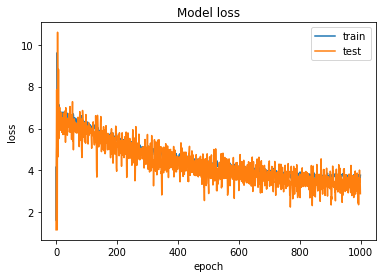

12.962609109543191
3.600362358088862
DN- 10  layers; 300 Units; LR- 2e-05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 4s 1ms/sample - loss: 5.9046 - mean_squared_error: 41.8537 - val_loss: 5.8878 - val_mean_squared_error: 41.5733
Epoch 2/1000
2562/2562 [==============================] - 1s 247us/sample - loss: 5.8101 - mean_squared_error: 40.6821 - val_loss: 5.7507 - val_mean_squared_error: 39.8592
Epoch 3/1000
2562/2562 [==============================] - 1s 254us/sample - loss: 5.7123 - mean_squared_error: 39.4607 - val_loss: 5.5784 - val_mean_squared_error: 37.7585
Epoch 4/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 5.5640 - mean_squared_error: 37.6634 - val_loss: 5.3867 - val_mean_squared_error: 35.4935
Epoch 5/1000
2562/2562 [==============================] - 1s 242us/sample - loss: 5.4343 - mean_squared_error: 36.1191 - val_loss: 5.1848 - val_mean_squared_error: 33.1869
E

Epoch 48/1000
2562/2562 [==============================] - 1s 237us/sample - loss: 0.6071 - mean_squared_error: 1.5144 - val_loss: 0.8663 - val_mean_squared_error: 2.4700
Epoch 49/1000
2562/2562 [==============================] - 1s 243us/sample - loss: 0.5987 - mean_squared_error: 1.5031 - val_loss: 0.8716 - val_mean_squared_error: 2.4900
Epoch 50/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5854 - mean_squared_error: 1.4624 - val_loss: 0.8774 - val_mean_squared_error: 2.5114
Epoch 51/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5723 - mean_squared_error: 1.4131 - val_loss: 0.8829 - val_mean_squared_error: 2.5318
Epoch 52/1000
2562/2562 [==============================] - 1s 249us/sample - loss: 0.5873 - mean_squared_error: 1.4656 - val_loss: 0.8868 - val_mean_squared_error: 2.5463
Epoch 53/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5880 - mean_squared_error: 1.4733 - val_loss: 0.8889 - val_m

Epoch 96/1000
2562/2562 [==============================] - 1s 240us/sample - loss: 0.5482 - mean_squared_error: 1.3432 - val_loss: 0.8546 - val_mean_squared_error: 2.4370
Epoch 97/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5525 - mean_squared_error: 1.3443 - val_loss: 0.8528 - val_mean_squared_error: 2.4304
Epoch 98/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.5576 - mean_squared_error: 1.3592 - val_loss: 0.8526 - val_mean_squared_error: 2.4300
Epoch 99/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5591 - mean_squared_error: 1.3698 - val_loss: 0.8526 - val_mean_squared_error: 2.4301
Epoch 100/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5642 - mean_squared_error: 1.3755 - val_loss: 0.8514 - val_mean_squared_error: 2.4259
Epoch 101/1000
2562/2562 [==============================] - 1s 245us/sample - loss: 0.5537 - mean_squared_error: 1.3536 - val_loss: 0.8503 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 239us/sample - loss: 0.5487 - mean_squared_error: 1.3421 - val_loss: 0.8206 - val_mean_squared_error: 2.3180
Epoch 145/1000
2562/2562 [==============================] - 1s 240us/sample - loss: 0.5420 - mean_squared_error: 1.3097 - val_loss: 0.8206 - val_mean_squared_error: 2.3182
Epoch 146/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5331 - mean_squared_error: 1.2870 - val_loss: 0.8203 - val_mean_squared_error: 2.3172
Epoch 147/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5553 - mean_squared_error: 1.3693 - val_loss: 0.8201 - val_mean_squared_error: 2.3162
Epoch 148/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5479 - mean_squared_error: 1.3306 - val_loss: 0.8192 - val_mean_squared_error: 2.3132
Epoch 149/1000
2562/2562 [==============================] - 1s 249us/sample - loss: 0.5586 - mean_squared_error: 1.3679 - val_loss: 0.8194 -

2562/2562 [==============================] - 1s 239us/sample - loss: 0.5383 - mean_squared_error: 1.3118 - val_loss: 0.7964 - val_mean_squared_error: 2.2342
Epoch 192/1000
2562/2562 [==============================] - 1s 237us/sample - loss: 0.5414 - mean_squared_error: 1.3143 - val_loss: 0.7974 - val_mean_squared_error: 2.2375
Epoch 193/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5444 - mean_squared_error: 1.3194 - val_loss: 0.7972 - val_mean_squared_error: 2.2367
Epoch 194/1000
2562/2562 [==============================] - 1s 237us/sample - loss: 0.5434 - mean_squared_error: 1.3201 - val_loss: 0.7979 - val_mean_squared_error: 2.2392
Epoch 195/1000
2562/2562 [==============================] - 1s 249us/sample - loss: 0.5453 - mean_squared_error: 1.3186 - val_loss: 0.7989 - val_mean_squared_error: 2.2425
Epoch 196/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.5397 - mean_squared_error: 1.3116 - val_loss: 0.7985 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 1s 242us/sample - loss: 0.5316 - mean_squared_error: 1.2790 - val_loss: 0.7704 - val_mean_squared_error: 2.1448
Epoch 240/1000
2562/2562 [==============================] - 1s 238us/sample - loss: 0.5262 - mean_squared_error: 1.2692 - val_loss: 0.7707 - val_mean_squared_error: 2.1458
Epoch 241/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5259 - mean_squared_error: 1.2637 - val_loss: 0.7697 - val_mean_squared_error: 2.1426
Epoch 242/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 0.5331 - mean_squared_error: 1.2790 - val_loss: 0.7693 - val_mean_squared_error: 2.1411
Epoch 243/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5308 - mean_squared_error: 1.2865 - val_loss: 0.7684 - val_mean_squared_error: 2.1382
Epoch 244/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5338 - mean_squared_error: 1.2882 - val_loss: 0.7679 -

2562/2562 [==============================] - 1s 244us/sample - loss: 0.5386 - mean_squared_error: 1.2991 - val_loss: 0.7599 - val_mean_squared_error: 2.1091
Epoch 287/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5355 - mean_squared_error: 1.2892 - val_loss: 0.7593 - val_mean_squared_error: 2.1070
Epoch 288/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5278 - mean_squared_error: 1.2786 - val_loss: 0.7589 - val_mean_squared_error: 2.1056
Epoch 289/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.5300 - mean_squared_error: 1.2766 - val_loss: 0.7599 - val_mean_squared_error: 2.1093
Epoch 290/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5259 - mean_squared_error: 1.2527 - val_loss: 0.7606 - val_mean_squared_error: 2.1115
Epoch 291/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.5370 - mean_squared_error: 1.2947 - val_loss: 0.7620 - val_mean_squar

Epoch 334/1000
2562/2562 [==============================] - 1s 238us/sample - loss: 0.5239 - mean_squared_error: 1.2618 - val_loss: 0.7423 - val_mean_squared_error: 2.0499
Epoch 335/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 0.5367 - mean_squared_error: 1.3040 - val_loss: 0.7442 - val_mean_squared_error: 2.0561
Epoch 336/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5318 - mean_squared_error: 1.2888 - val_loss: 0.7458 - val_mean_squared_error: 2.0616
Epoch 337/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5260 - mean_squared_error: 1.2757 - val_loss: 0.7455 - val_mean_squared_error: 2.0606
Epoch 338/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.5281 - mean_squared_error: 1.2809 - val_loss: 0.7456 - val_mean_squared_error: 2.0607
Epoch 339/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 0.5280 - mean_squared_error: 1.2726 - val_loss: 0.7464 -

2562/2562 [==============================] - 1s 239us/sample - loss: 0.5285 - mean_squared_error: 1.2789 - val_loss: 0.7368 - val_mean_squared_error: 2.0312
Epoch 382/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.5265 - mean_squared_error: 1.2669 - val_loss: 0.7362 - val_mean_squared_error: 2.0291
Epoch 383/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5273 - mean_squared_error: 1.2621 - val_loss: 0.7356 - val_mean_squared_error: 2.0273
Epoch 384/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5213 - mean_squared_error: 1.2533 - val_loss: 0.7354 - val_mean_squared_error: 2.0266
Epoch 385/1000
2562/2562 [==============================] - 1s 240us/sample - loss: 0.5248 - mean_squared_error: 1.2531 - val_loss: 0.7348 - val_mean_squared_error: 2.0245
Epoch 386/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5254 - mean_squared_error: 1.2638 - val_loss: 0.7349 - val_mean_squar

Epoch 429/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 0.5180 - mean_squared_error: 1.2446 - val_loss: 0.7266 - val_mean_squared_error: 1.9971
Epoch 430/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5313 - mean_squared_error: 1.2862 - val_loss: 0.7257 - val_mean_squared_error: 1.9941
Epoch 431/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5233 - mean_squared_error: 1.2637 - val_loss: 0.7231 - val_mean_squared_error: 1.9853
Epoch 432/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5260 - mean_squared_error: 1.2695 - val_loss: 0.7219 - val_mean_squared_error: 1.9815
Epoch 433/1000
2562/2562 [==============================] - 1s 263us/sample - loss: 0.5264 - mean_squared_error: 1.2650 - val_loss: 0.7220 - val_mean_squared_error: 1.9816
Epoch 434/1000
2562/2562 [==============================] - 1s 245us/sample - loss: 0.5233 - mean_squared_error: 1.2574 - val_loss: 0.7212 -

2562/2562 [==============================] - 1s 240us/sample - loss: 0.5205 - mean_squared_error: 1.2529 - val_loss: 0.7164 - val_mean_squared_error: 1.9631
Epoch 477/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5247 - mean_squared_error: 1.2596 - val_loss: 0.7162 - val_mean_squared_error: 1.9624
Epoch 478/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5097 - mean_squared_error: 1.2154 - val_loss: 0.7160 - val_mean_squared_error: 1.9615
Epoch 479/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5312 - mean_squared_error: 1.2763 - val_loss: 0.7151 - val_mean_squared_error: 1.9588
Epoch 480/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5222 - mean_squared_error: 1.2635 - val_loss: 0.7156 - val_mean_squared_error: 1.9602
Epoch 481/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 0.5236 - mean_squared_error: 1.2577 - val_loss: 0.7164 - val_mean_squar

Epoch 524/1000
2562/2562 [==============================] - 1s 244us/sample - loss: 0.5213 - mean_squared_error: 1.2472 - val_loss: 0.7114 - val_mean_squared_error: 1.9464
Epoch 525/1000
2562/2562 [==============================] - 1s 243us/sample - loss: 0.5210 - mean_squared_error: 1.2531 - val_loss: 0.7105 - val_mean_squared_error: 1.9434
Epoch 526/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5243 - mean_squared_error: 1.2516 - val_loss: 0.7107 - val_mean_squared_error: 1.9440
Epoch 527/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.5171 - mean_squared_error: 1.2436 - val_loss: 0.7102 - val_mean_squared_error: 1.9425
Epoch 528/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5253 - mean_squared_error: 1.2550 - val_loss: 0.7113 - val_mean_squared_error: 1.9460
Epoch 529/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5193 - mean_squared_error: 1.2355 - val_loss: 0.7107 -

2562/2562 [==============================] - 1s 236us/sample - loss: 0.5203 - mean_squared_error: 1.2494 - val_loss: 0.7027 - val_mean_squared_error: 1.9173
Epoch 572/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5099 - mean_squared_error: 1.2057 - val_loss: 0.7032 - val_mean_squared_error: 1.9191
Epoch 573/1000
2562/2562 [==============================] - 1s 258us/sample - loss: 0.5157 - mean_squared_error: 1.2340 - val_loss: 0.7028 - val_mean_squared_error: 1.9178
Epoch 574/1000
2562/2562 [==============================] - 1s 257us/sample - loss: 0.5237 - mean_squared_error: 1.2583 - val_loss: 0.7021 - val_mean_squared_error: 1.9154
Epoch 575/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 0.5210 - mean_squared_error: 1.2465 - val_loss: 0.7036 - val_mean_squared_error: 1.9204
Epoch 576/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.5091 - mean_squared_error: 1.2263 - val_loss: 0.7046 - val_mean_squar

Epoch 619/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5212 - mean_squared_error: 1.2399 - val_loss: 0.7007 - val_mean_squared_error: 1.9108
Epoch 620/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5295 - mean_squared_error: 1.2884 - val_loss: 0.7016 - val_mean_squared_error: 1.9138
Epoch 621/1000
2562/2562 [==============================] - 1s 238us/sample - loss: 0.5217 - mean_squared_error: 1.2447 - val_loss: 0.7020 - val_mean_squared_error: 1.9152
Epoch 622/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5165 - mean_squared_error: 1.2320 - val_loss: 0.7012 - val_mean_squared_error: 1.9125
Epoch 623/1000
2562/2562 [==============================] - 1s 240us/sample - loss: 0.5218 - mean_squared_error: 1.2638 - val_loss: 0.7003 - val_mean_squared_error: 1.9096
Epoch 624/1000
2562/2562 [==============================] - 1s 241us/sample - loss: 0.5263 - mean_squared_error: 1.2607 - val_loss: 0.7002 -

2562/2562 [==============================] - 1s 237us/sample - loss: 0.5179 - mean_squared_error: 1.2592 - val_loss: 0.6911 - val_mean_squared_error: 1.8792
Epoch 667/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5137 - mean_squared_error: 1.2258 - val_loss: 0.6922 - val_mean_squared_error: 1.8827
Epoch 668/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5138 - mean_squared_error: 1.2326 - val_loss: 0.6923 - val_mean_squared_error: 1.8830
Epoch 669/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 0.5106 - mean_squared_error: 1.2131 - val_loss: 0.6912 - val_mean_squared_error: 1.8795
Epoch 670/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5099 - mean_squared_error: 1.2287 - val_loss: 0.6923 - val_mean_squared_error: 1.8831
Epoch 671/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5115 - mean_squared_error: 1.2227 - val_loss: 0.6926 - val_mean_squar

Epoch 714/1000
2562/2562 [==============================] - 1s 250us/sample - loss: 0.4998 - mean_squared_error: 1.1977 - val_loss: 0.6901 - val_mean_squared_error: 1.8757
Epoch 715/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 0.5204 - mean_squared_error: 1.2437 - val_loss: 0.6901 - val_mean_squared_error: 1.8756
Epoch 716/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5085 - mean_squared_error: 1.2201 - val_loss: 0.6889 - val_mean_squared_error: 1.8717
Epoch 717/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5068 - mean_squared_error: 1.2167 - val_loss: 0.6866 - val_mean_squared_error: 1.8642
Epoch 718/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5118 - mean_squared_error: 1.2353 - val_loss: 0.6857 - val_mean_squared_error: 1.8612
Epoch 719/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5103 - mean_squared_error: 1.2195 - val_loss: 0.6845 -

2562/2562 [==============================] - 1s 239us/sample - loss: 0.5097 - mean_squared_error: 1.2105 - val_loss: 0.6747 - val_mean_squared_error: 1.8250
Epoch 762/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5176 - mean_squared_error: 1.2378 - val_loss: 0.6748 - val_mean_squared_error: 1.8251
Epoch 763/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 0.5166 - mean_squared_error: 1.2382 - val_loss: 0.6755 - val_mean_squared_error: 1.8274
Epoch 764/1000
2562/2562 [==============================] - 1s 240us/sample - loss: 0.5111 - mean_squared_error: 1.2251 - val_loss: 0.6755 - val_mean_squared_error: 1.8275
Epoch 765/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.5144 - mean_squared_error: 1.2366 - val_loss: 0.6749 - val_mean_squared_error: 1.8257
Epoch 766/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5121 - mean_squared_error: 1.2277 - val_loss: 0.6737 - val_mean_squar

Epoch 809/1000
2562/2562 [==============================] - 1s 239us/sample - loss: 0.5013 - mean_squared_error: 1.1946 - val_loss: 0.6708 - val_mean_squared_error: 1.8119
Epoch 810/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.5146 - mean_squared_error: 1.2401 - val_loss: 0.6709 - val_mean_squared_error: 1.8124
Epoch 811/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5135 - mean_squared_error: 1.2317 - val_loss: 0.6711 - val_mean_squared_error: 1.8128
Epoch 812/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5114 - mean_squared_error: 1.2368 - val_loss: 0.6705 - val_mean_squared_error: 1.8110
Epoch 813/1000
2562/2562 [==============================] - 1s 240us/sample - loss: 0.5160 - mean_squared_error: 1.2471 - val_loss: 0.6708 - val_mean_squared_error: 1.8119
Epoch 814/1000
2562/2562 [==============================] - 1s 240us/sample - loss: 0.4947 - mean_squared_error: 1.1701 - val_loss: 0.6714 -

2562/2562 [==============================] - 1s 232us/sample - loss: 0.5034 - mean_squared_error: 1.2114 - val_loss: 0.6697 - val_mean_squared_error: 1.8085
Epoch 857/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5129 - mean_squared_error: 1.2194 - val_loss: 0.6700 - val_mean_squared_error: 1.8092
Epoch 858/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5156 - mean_squared_error: 1.2412 - val_loss: 0.6697 - val_mean_squared_error: 1.8085
Epoch 859/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5044 - mean_squared_error: 1.2068 - val_loss: 0.6696 - val_mean_squared_error: 1.8080
Epoch 860/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5129 - mean_squared_error: 1.2307 - val_loss: 0.6696 - val_mean_squared_error: 1.8081
Epoch 861/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5158 - mean_squared_error: 1.2423 - val_loss: 0.6701 - val_mean_squar

Epoch 904/1000
2562/2562 [==============================] - 1s 252us/sample - loss: 0.5212 - mean_squared_error: 1.2534 - val_loss: 0.6652 - val_mean_squared_error: 1.7936
Epoch 905/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 0.5054 - mean_squared_error: 1.2069 - val_loss: 0.6645 - val_mean_squared_error: 1.7913
Epoch 906/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5107 - mean_squared_error: 1.2262 - val_loss: 0.6638 - val_mean_squared_error: 1.7891
Epoch 907/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.5221 - mean_squared_error: 1.2623 - val_loss: 0.6638 - val_mean_squared_error: 1.7891
Epoch 908/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 0.5134 - mean_squared_error: 1.2374 - val_loss: 0.6644 - val_mean_squared_error: 1.7911
Epoch 909/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5029 - mean_squared_error: 1.2022 - val_loss: 0.6646 -

2562/2562 [==============================] - 1s 239us/sample - loss: 0.5126 - mean_squared_error: 1.2218 - val_loss: 0.6575 - val_mean_squared_error: 1.7685
Epoch 952/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5001 - mean_squared_error: 1.1919 - val_loss: 0.6569 - val_mean_squared_error: 1.7664
Epoch 953/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5087 - mean_squared_error: 1.2174 - val_loss: 0.6570 - val_mean_squared_error: 1.7666
Epoch 954/1000
2562/2562 [==============================] - 1s 237us/sample - loss: 0.5096 - mean_squared_error: 1.2159 - val_loss: 0.6564 - val_mean_squared_error: 1.7647
Epoch 955/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.5072 - mean_squared_error: 1.2049 - val_loss: 0.6566 - val_mean_squared_error: 1.7653
Epoch 956/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.5132 - mean_squared_error: 1.2341 - val_loss: 0.6563 - val_mean_squar

Epoch 999/1000
2562/2562 [==============================] - 1s 241us/sample - loss: 0.5083 - mean_squared_error: 1.2180 - val_loss: 0.6517 - val_mean_squared_error: 1.7493
Epoch 1000/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5195 - mean_squared_error: 1.2441 - val_loss: 0.6515 - val_mean_squared_error: 1.7485


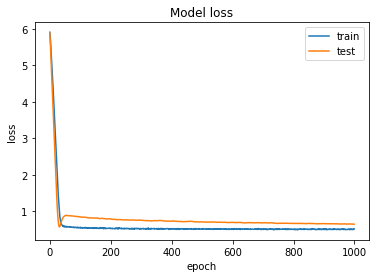

1.9678800863313903
1.4028114935127207
DN- 10  layers; 300 Units; LR- 2e-05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 4s 1ms/sample - loss: 5.5982 - mean_squared_error: 38.5629 - val_loss: 5.4046 - val_mean_squared_error: 36.2463
Epoch 2/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 5.4725 - mean_squared_error: 37.0822 - val_loss: 5.2138 - val_mean_squared_error: 34.0320
Epoch 3/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 5.3039 - mean_squared_error: 35.0986 - val_loss: 4.9047 - val_mean_squared_error: 30.6006
Epoch 4/1000
2562/2562 [==============================] - 1s 216us/sample - loss: 5.0819 - mean_squared_error: 32.5676 - val_loss: 4.6329 - val_mean_squared_error: 27.7361
Epoch 5/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 4.8807 - mean_squared_error: 30.3458 - val_loss: 4.3466 - val_mean_squared_error: 24.8792
Epoc

Epoch 48/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5623 - mean_squared_error: 1.4740 - val_loss: 0.9023 - val_mean_squared_error: 2.7323
Epoch 49/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5591 - mean_squared_error: 1.4743 - val_loss: 0.9023 - val_mean_squared_error: 2.7322
Epoch 50/1000
2562/2562 [==============================] - 1s 214us/sample - loss: 0.5515 - mean_squared_error: 1.4439 - val_loss: 0.9023 - val_mean_squared_error: 2.7321
Epoch 51/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.5676 - mean_squared_error: 1.4926 - val_loss: 0.9005 - val_mean_squared_error: 2.7252
Epoch 52/1000
2562/2562 [==============================] - 1s 243us/sample - loss: 0.5616 - mean_squared_error: 1.4642 - val_loss: 0.8948 - val_mean_squared_error: 2.7046
Epoch 53/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5560 - mean_squared_error: 1.4689 - val_loss: 0.8895 - val_m

Epoch 96/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 0.5424 - mean_squared_error: 1.4087 - val_loss: 0.8378 - val_mean_squared_error: 2.4963
Epoch 97/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.5375 - mean_squared_error: 1.3993 - val_loss: 0.8376 - val_mean_squared_error: 2.4955
Epoch 98/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5228 - mean_squared_error: 1.3450 - val_loss: 0.8408 - val_mean_squared_error: 2.5068
Epoch 99/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5216 - mean_squared_error: 1.3527 - val_loss: 0.8422 - val_mean_squared_error: 2.5116
Epoch 100/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5436 - mean_squared_error: 1.4252 - val_loss: 0.8418 - val_mean_squared_error: 2.5104
Epoch 101/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5222 - mean_squared_error: 1.3577 - val_loss: 0.8412 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5269 - mean_squared_error: 1.3570 - val_loss: 0.8059 - val_mean_squared_error: 2.3825
Epoch 145/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5188 - mean_squared_error: 1.3284 - val_loss: 0.8053 - val_mean_squared_error: 2.3806
Epoch 146/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.5208 - mean_squared_error: 1.3339 - val_loss: 0.8033 - val_mean_squared_error: 2.3736
Epoch 147/1000
2562/2562 [==============================] - 1s 236us/sample - loss: 0.5265 - mean_squared_error: 1.3725 - val_loss: 0.8035 - val_mean_squared_error: 2.3739
Epoch 148/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5140 - mean_squared_error: 1.3215 - val_loss: 0.8031 - val_mean_squared_error: 2.3727
Epoch 149/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5178 - mean_squared_error: 1.3390 - val_loss: 0.8029 -

2562/2562 [==============================] - 1s 227us/sample - loss: 0.5064 - mean_squared_error: 1.3027 - val_loss: 0.7875 - val_mean_squared_error: 2.3174
Epoch 192/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5053 - mean_squared_error: 1.3091 - val_loss: 0.7873 - val_mean_squared_error: 2.3167
Epoch 193/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.5149 - mean_squared_error: 1.3291 - val_loss: 0.7870 - val_mean_squared_error: 2.3158
Epoch 194/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5268 - mean_squared_error: 1.3630 - val_loss: 0.7852 - val_mean_squared_error: 2.3094
Epoch 195/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5147 - mean_squared_error: 1.3240 - val_loss: 0.7826 - val_mean_squared_error: 2.3006
Epoch 196/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.5258 - mean_squared_error: 1.3595 - val_loss: 0.7819 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 1s 249us/sample - loss: 0.5118 - mean_squared_error: 1.3179 - val_loss: 0.7629 - val_mean_squared_error: 2.2323
Epoch 240/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5122 - mean_squared_error: 1.3237 - val_loss: 0.7617 - val_mean_squared_error: 2.2282
Epoch 241/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5072 - mean_squared_error: 1.2923 - val_loss: 0.7589 - val_mean_squared_error: 2.2188
Epoch 242/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5151 - mean_squared_error: 1.3275 - val_loss: 0.7559 - val_mean_squared_error: 2.2085
Epoch 243/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4965 - mean_squared_error: 1.2702 - val_loss: 0.7550 - val_mean_squared_error: 2.2053
Epoch 244/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.5138 - mean_squared_error: 1.3215 - val_loss: 0.7557 -

2562/2562 [==============================] - 1s 232us/sample - loss: 0.5059 - mean_squared_error: 1.3012 - val_loss: 0.7575 - val_mean_squared_error: 2.2130
Epoch 287/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.5005 - mean_squared_error: 1.2912 - val_loss: 0.7549 - val_mean_squared_error: 2.2041
Epoch 288/1000
2562/2562 [==============================] - 1s 239us/sample - loss: 0.5091 - mean_squared_error: 1.3184 - val_loss: 0.7515 - val_mean_squared_error: 2.1925
Epoch 289/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.5021 - mean_squared_error: 1.2871 - val_loss: 0.7487 - val_mean_squared_error: 2.1832
Epoch 290/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.5016 - mean_squared_error: 1.2945 - val_loss: 0.7467 - val_mean_squared_error: 2.1764
Epoch 291/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.5065 - mean_squared_error: 1.3035 - val_loss: 0.7458 - val_mean_squar

Epoch 334/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.4896 - mean_squared_error: 1.2457 - val_loss: 0.7334 - val_mean_squared_error: 2.1311
Epoch 335/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5016 - mean_squared_error: 1.2790 - val_loss: 0.7331 - val_mean_squared_error: 2.1299
Epoch 336/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4915 - mean_squared_error: 1.2553 - val_loss: 0.7306 - val_mean_squared_error: 2.1215
Epoch 337/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.4842 - mean_squared_error: 1.2446 - val_loss: 0.7301 - val_mean_squared_error: 2.1198
Epoch 338/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.5043 - mean_squared_error: 1.2994 - val_loss: 0.7291 - val_mean_squared_error: 2.1165
Epoch 339/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4988 - mean_squared_error: 1.2657 - val_loss: 0.7288 -

2562/2562 [==============================] - 1s 235us/sample - loss: 0.4881 - mean_squared_error: 1.2587 - val_loss: 0.7174 - val_mean_squared_error: 2.0768
Epoch 382/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4887 - mean_squared_error: 1.2424 - val_loss: 0.7160 - val_mean_squared_error: 2.0720
Epoch 383/1000
2562/2562 [==============================] - 1s 231us/sample - loss: 0.5058 - mean_squared_error: 1.3037 - val_loss: 0.7158 - val_mean_squared_error: 2.0714
Epoch 384/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4988 - mean_squared_error: 1.2796 - val_loss: 0.7178 - val_mean_squared_error: 2.0779
Epoch 385/1000
2562/2562 [==============================] - 1s 246us/sample - loss: 0.4998 - mean_squared_error: 1.2893 - val_loss: 0.7184 - val_mean_squared_error: 2.0798
Epoch 386/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4992 - mean_squared_error: 1.2773 - val_loss: 0.7182 - val_mean_squar

2562/2562 [==============================] - 1s 223us/sample - loss: 0.4982 - mean_squared_error: 1.2790 - val_loss: 0.7071 - val_mean_squared_error: 2.0419
Epoch 429/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.4937 - mean_squared_error: 1.2612 - val_loss: 0.7084 - val_mean_squared_error: 2.0460
Epoch 430/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.4858 - mean_squared_error: 1.2519 - val_loss: 0.7080 - val_mean_squared_error: 2.0449
Epoch 431/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4986 - mean_squared_error: 1.2742 - val_loss: 0.7082 - val_mean_squared_error: 2.0454
Epoch 432/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.4840 - mean_squared_error: 1.2261 - val_loss: 0.7085 - val_mean_squared_error: 2.0463
Epoch 433/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.4828 - mean_squared_error: 1.2308 - val_loss: 0.7086 - val_mean_squar

Epoch 476/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 0.4929 - mean_squared_error: 1.2583 - val_loss: 0.6902 - val_mean_squared_error: 1.9852
Epoch 477/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.4927 - mean_squared_error: 1.2570 - val_loss: 0.6905 - val_mean_squared_error: 1.9862
Epoch 478/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 0.4942 - mean_squared_error: 1.2571 - val_loss: 0.6922 - val_mean_squared_error: 1.9919
Epoch 479/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.5033 - mean_squared_error: 1.2840 - val_loss: 0.6941 - val_mean_squared_error: 1.9980
Epoch 480/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.5007 - mean_squared_error: 1.2768 - val_loss: 0.6959 - val_mean_squared_error: 2.0041
Epoch 481/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4861 - mean_squared_error: 1.2361 - val_loss: 0.6958 -

2562/2562 [==============================] - 1s 230us/sample - loss: 0.4989 - mean_squared_error: 1.2752 - val_loss: 0.6829 - val_mean_squared_error: 1.9605
Epoch 524/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4939 - mean_squared_error: 1.2635 - val_loss: 0.6827 - val_mean_squared_error: 1.9598
Epoch 525/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.5008 - mean_squared_error: 1.2795 - val_loss: 0.6828 - val_mean_squared_error: 1.9601
Epoch 526/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.5060 - mean_squared_error: 1.3163 - val_loss: 0.6815 - val_mean_squared_error: 1.9558
Epoch 527/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4840 - mean_squared_error: 1.2330 - val_loss: 0.6813 - val_mean_squared_error: 1.9553
Epoch 528/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 0.4784 - mean_squared_error: 1.2271 - val_loss: 0.6815 - val_mean_squar

Epoch 571/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.4893 - mean_squared_error: 1.2446 - val_loss: 0.6811 - val_mean_squared_error: 1.9542
Epoch 572/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.4972 - mean_squared_error: 1.2746 - val_loss: 0.6817 - val_mean_squared_error: 1.9561
Epoch 573/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4935 - mean_squared_error: 1.2677 - val_loss: 0.6822 - val_mean_squared_error: 1.9580
Epoch 574/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4987 - mean_squared_error: 1.2777 - val_loss: 0.6824 - val_mean_squared_error: 1.9586
Epoch 575/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4911 - mean_squared_error: 1.2583 - val_loss: 0.6831 - val_mean_squared_error: 1.9610
Epoch 576/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.4969 - mean_squared_error: 1.2753 - val_loss: 0.6834 -

2562/2562 [==============================] - 1s 227us/sample - loss: 0.4830 - mean_squared_error: 1.2340 - val_loss: 0.6700 - val_mean_squared_error: 1.9173
Epoch 619/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.4779 - mean_squared_error: 1.2122 - val_loss: 0.6717 - val_mean_squared_error: 1.9230
Epoch 620/1000
2562/2562 [==============================] - 1s 215us/sample - loss: 0.4803 - mean_squared_error: 1.2300 - val_loss: 0.6730 - val_mean_squared_error: 1.9271
Epoch 621/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4854 - mean_squared_error: 1.2529 - val_loss: 0.6751 - val_mean_squared_error: 1.9340
Epoch 622/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4983 - mean_squared_error: 1.2800 - val_loss: 0.6752 - val_mean_squared_error: 1.9344
Epoch 623/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4843 - mean_squared_error: 1.2335 - val_loss: 0.6761 - val_mean_squar

Epoch 666/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.4953 - mean_squared_error: 1.2618 - val_loss: 0.6674 - val_mean_squared_error: 1.9085
Epoch 667/1000
2562/2562 [==============================] - 1s 222us/sample - loss: 0.4920 - mean_squared_error: 1.2582 - val_loss: 0.6673 - val_mean_squared_error: 1.9082
Epoch 668/1000
2562/2562 [==============================] - 1s 230us/sample - loss: 0.4889 - mean_squared_error: 1.2533 - val_loss: 0.6682 - val_mean_squared_error: 1.9111
Epoch 669/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.4917 - mean_squared_error: 1.2604 - val_loss: 0.6693 - val_mean_squared_error: 1.9147
Epoch 670/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4924 - mean_squared_error: 1.2689 - val_loss: 0.6680 - val_mean_squared_error: 1.9104
Epoch 671/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4917 - mean_squared_error: 1.2603 - val_loss: 0.6666 -

2562/2562 [==============================] - 1s 230us/sample - loss: 0.4950 - mean_squared_error: 1.2699 - val_loss: 0.6622 - val_mean_squared_error: 1.8910
Epoch 714/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4834 - mean_squared_error: 1.2347 - val_loss: 0.6610 - val_mean_squared_error: 1.8873
Epoch 715/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.4869 - mean_squared_error: 1.2540 - val_loss: 0.6583 - val_mean_squared_error: 1.8781
Epoch 716/1000
2562/2562 [==============================] - 1s 235us/sample - loss: 0.4776 - mean_squared_error: 1.2167 - val_loss: 0.6561 - val_mean_squared_error: 1.8709
Epoch 717/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.4834 - mean_squared_error: 1.2371 - val_loss: 0.6554 - val_mean_squared_error: 1.8686
Epoch 718/1000
2562/2562 [==============================] - 1s 226us/sample - loss: 0.4960 - mean_squared_error: 1.2778 - val_loss: 0.6557 - val_mean_squar

Epoch 761/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4857 - mean_squared_error: 1.2389 - val_loss: 0.6585 - val_mean_squared_error: 1.8785
Epoch 762/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.4880 - mean_squared_error: 1.2443 - val_loss: 0.6562 - val_mean_squared_error: 1.8710
Epoch 763/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.4922 - mean_squared_error: 1.2597 - val_loss: 0.6538 - val_mean_squared_error: 1.8632
Epoch 764/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4887 - mean_squared_error: 1.2401 - val_loss: 0.6536 - val_mean_squared_error: 1.8625
Epoch 765/1000
2562/2562 [==============================] - 1s 217us/sample - loss: 0.4952 - mean_squared_error: 1.2739 - val_loss: 0.6531 - val_mean_squared_error: 1.8610
Epoch 766/1000
2562/2562 [==============================] - 1s 218us/sample - loss: 0.4888 - mean_squared_error: 1.2449 - val_loss: 0.6529 -

2562/2562 [==============================] - 1s 225us/sample - loss: 0.4784 - mean_squared_error: 1.2090 - val_loss: 0.6461 - val_mean_squared_error: 1.8374
Epoch 809/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4952 - mean_squared_error: 1.2619 - val_loss: 0.6475 - val_mean_squared_error: 1.8421
Epoch 810/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4904 - mean_squared_error: 1.2485 - val_loss: 0.6490 - val_mean_squared_error: 1.8472
Epoch 811/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4959 - mean_squared_error: 1.2765 - val_loss: 0.6500 - val_mean_squared_error: 1.8503
Epoch 812/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4839 - mean_squared_error: 1.2336 - val_loss: 0.6500 - val_mean_squared_error: 1.8502
Epoch 813/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4907 - mean_squared_error: 1.2543 - val_loss: 0.6494 - val_mean_squar

Epoch 856/1000
2562/2562 [==============================] - 1s 224us/sample - loss: 0.4782 - mean_squared_error: 1.2110 - val_loss: 0.6454 - val_mean_squared_error: 1.8351
Epoch 857/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4939 - mean_squared_error: 1.2596 - val_loss: 0.6463 - val_mean_squared_error: 1.8381
Epoch 858/1000
2562/2562 [==============================] - 1s 234us/sample - loss: 0.4852 - mean_squared_error: 1.2434 - val_loss: 0.6470 - val_mean_squared_error: 1.8403
Epoch 859/1000
2562/2562 [==============================] - 1s 240us/sample - loss: 0.4885 - mean_squared_error: 1.2548 - val_loss: 0.6459 - val_mean_squared_error: 1.8365
Epoch 860/1000
2562/2562 [==============================] - 1s 221us/sample - loss: 0.4846 - mean_squared_error: 1.2443 - val_loss: 0.6444 - val_mean_squared_error: 1.8319
Epoch 861/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4912 - mean_squared_error: 1.2526 - val_loss: 0.6428 -

2562/2562 [==============================] - 1s 226us/sample - loss: 0.4782 - mean_squared_error: 1.2118 - val_loss: 0.6375 - val_mean_squared_error: 1.8088
Epoch 904/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4780 - mean_squared_error: 1.2041 - val_loss: 0.6375 - val_mean_squared_error: 1.8089
Epoch 905/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4800 - mean_squared_error: 1.2187 - val_loss: 0.6387 - val_mean_squared_error: 1.8128
Epoch 906/1000
2562/2562 [==============================] - ETA: 0s - loss: 0.4768 - mean_squared_error: 1.21 - 1s 224us/sample - loss: 0.4757 - mean_squared_error: 1.2091 - val_loss: 0.6391 - val_mean_squared_error: 1.8143
Epoch 907/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4890 - mean_squared_error: 1.2551 - val_loss: 0.6387 - val_mean_squared_error: 1.8129
Epoch 908/1000
2562/2562 [==============================] - 1s 233us/sample - loss: 0.4954 - mean_squar

2562/2562 [==============================] - 1s 231us/sample - loss: 0.4770 - mean_squared_error: 1.2095 - val_loss: 0.6399 - val_mean_squared_error: 1.8167
Epoch 951/1000
2562/2562 [==============================] - 1s 229us/sample - loss: 0.4836 - mean_squared_error: 1.2361 - val_loss: 0.6397 - val_mean_squared_error: 1.8159
Epoch 952/1000
2562/2562 [==============================] - 1s 227us/sample - loss: 0.4875 - mean_squared_error: 1.2411 - val_loss: 0.6375 - val_mean_squared_error: 1.8086
Epoch 953/1000
2562/2562 [==============================] - 1s 232us/sample - loss: 0.4837 - mean_squared_error: 1.2538 - val_loss: 0.6370 - val_mean_squared_error: 1.8071
Epoch 954/1000
2562/2562 [==============================] - 1s 228us/sample - loss: 0.4833 - mean_squared_error: 1.2366 - val_loss: 0.6371 - val_mean_squared_error: 1.8074
Epoch 955/1000
2562/2562 [==============================] - 1s 220us/sample - loss: 0.4874 - mean_squared_error: 1.2380 - val_loss: 0.6368 - val_mean_squar

2562/2562 [==============================] - 1s 229us/sample - loss: 0.4784 - mean_squared_error: 1.2225 - val_loss: 0.6288 - val_mean_squared_error: 1.7800
Epoch 998/1000
2562/2562 [==============================] - 1s 219us/sample - loss: 0.4945 - mean_squared_error: 1.2671 - val_loss: 0.6292 - val_mean_squared_error: 1.7815
Epoch 999/1000
2562/2562 [==============================] - 1s 225us/sample - loss: 0.4942 - mean_squared_error: 1.2713 - val_loss: 0.6295 - val_mean_squared_error: 1.7823
Epoch 1000/1000
2562/2562 [==============================] - 1s 223us/sample - loss: 0.4731 - mean_squared_error: 1.2081 - val_loss: 0.6305 - val_mean_squared_error: 1.7855


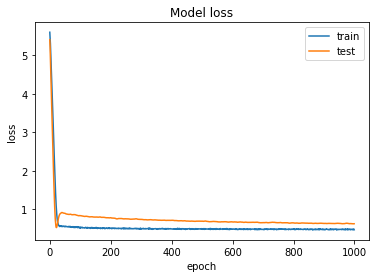

2.0094813455603697
1.417561760756959
DN- 10  layers; 500 Units; LR- 0.05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 4s 2ms/sample - loss: 5.2238 - mean_squared_error: 61.2232 - val_loss: 20.9536 - val_mean_squared_error: 452.0023
Epoch 2/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 9.1912 - mean_squared_error: 137.8611 - val_loss: 8.8936 - val_mean_squared_error: 79.7677
Epoch 3/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 10.8237 - mean_squared_error: 160.9315 - val_loss: 8.8315 - val_mean_squared_error: 74.7271
Epoch 4/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 19.8217 - mean_squared_error: 538.8882 - val_loss: 30.3296 - val_mean_squared_error: 897.3869
Epoch 5/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 17.0990 - mean_squared_error: 380.4889 - val_loss: 6.6744 - val_mean_squared_error:

2562/2562 [==============================] - 1s 313us/sample - loss: 14.2046 - mean_squared_error: 197.9000 - val_loss: 13.1989 - val_mean_squared_error: 160.8831
Epoch 47/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 13.5640 - mean_squared_error: 179.4066 - val_loss: 14.9563 - val_mean_squared_error: 208.3990
Epoch 48/1000
2562/2562 [==============================] - 1s 339us/sample - loss: 13.9469 - mean_squared_error: 189.3815 - val_loss: 14.0174 - val_mean_squared_error: 182.2501
Epoch 49/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 13.8685 - mean_squared_error: 186.9677 - val_loss: 14.8907 - val_mean_squared_error: 206.5215
Epoch 50/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 13.9206 - mean_squared_error: 189.3401 - val_loss: 13.3315 - val_mean_squared_error: 164.2653
Epoch 51/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 13.5336 - mean_squared_error: 179.0322 - val_l

2562/2562 [==============================] - 1s 306us/sample - loss: 13.9049 - mean_squared_error: 190.4426 - val_loss: 13.3722 - val_mean_squared_error: 165.4424
Epoch 93/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 13.6454 - mean_squared_error: 184.8470 - val_loss: 16.1557 - val_mean_squared_error: 244.5506
Epoch 94/1000
2562/2562 [==============================] - 1s 295us/sample - loss: 14.2286 - mean_squared_error: 203.9000 - val_loss: 12.0204 - val_mean_squared_error: 132.6214
Epoch 95/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 13.2874 - mean_squared_error: 178.5354 - val_loss: 16.6577 - val_mean_squared_error: 260.4724
Epoch 96/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 14.1713 - mean_squared_error: 202.2714 - val_loss: 12.2534 - val_mean_squared_error: 138.0238
Epoch 97/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 13.2754 - mean_squared_error: 176.7822 - val_l

2562/2562 [==============================] - 1s 309us/sample - loss: 14.0882 - mean_squared_error: 196.1721 - val_loss: 14.5756 - val_mean_squared_error: 197.9014
Epoch 139/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 13.8127 - mean_squared_error: 189.1716 - val_loss: 13.5533 - val_mean_squared_error: 170.2706
Epoch 140/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 13.6119 - mean_squared_error: 184.7809 - val_loss: 15.3512 - val_mean_squared_error: 220.2676
Epoch 141/1000
2562/2562 [==============================] - 1s 344us/sample - loss: 13.9567 - mean_squared_error: 193.9088 - val_loss: 13.8368 - val_mean_squared_error: 177.7295
Epoch 142/1000
2562/2562 [==============================] - 1s 293us/sample - loss: 13.6825 - mean_squared_error: 185.4827 - val_loss: 14.3929 - val_mean_squared_error: 192.8219
Epoch 143/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 13.8611 - mean_squared_error: 190.2208 - 

2562/2562 [==============================] - 1s 312us/sample - loss: 13.8370 - mean_squared_error: 191.8222 - val_loss: 14.1532 - val_mean_squared_error: 186.3839
Epoch 185/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 13.7839 - mean_squared_error: 190.1950 - val_loss: 13.3882 - val_mean_squared_error: 166.1508
Epoch 186/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 13.5355 - mean_squared_error: 184.6660 - val_loss: 15.3095 - val_mean_squared_error: 219.2050
Epoch 187/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 13.7990 - mean_squared_error: 190.9657 - val_loss: 14.9407 - val_mean_squared_error: 208.4512
Epoch 188/1000
2562/2562 [==============================] - 1s 296us/sample - loss: 14.0006 - mean_squared_error: 197.3588 - val_loss: 12.8776 - val_mean_squared_error: 153.3014
Epoch 189/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 13.4361 - mean_squared_error: 181.9455 - 

2562/2562 [==============================] - 1s 314us/sample - loss: 14.0257 - mean_squared_error: 198.2143 - val_loss: 14.3169 - val_mean_squared_error: 191.0249
Epoch 231/1000
2562/2562 [==============================] - 1s 295us/sample - loss: 13.7611 - mean_squared_error: 191.7455 - val_loss: 13.9131 - val_mean_squared_error: 180.0621
Epoch 232/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 13.6413 - mean_squared_error: 187.6488 - val_loss: 15.2496 - val_mean_squared_error: 217.6056
Epoch 233/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 13.9517 - mean_squared_error: 197.7810 - val_loss: 12.4154 - val_mean_squared_error: 142.2442
Epoch 234/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 13.3525 - mean_squared_error: 182.7150 - val_loss: 15.3758 - val_mean_squared_error: 221.3425
Epoch 235/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 13.9731 - mean_squared_error: 196.7525 - 

2562/2562 [==============================] - 1s 338us/sample - loss: 13.4855 - mean_squared_error: 184.6498 - val_loss: 15.1794 - val_mean_squared_error: 215.7041
Epoch 277/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 13.9471 - mean_squared_error: 197.7255 - val_loss: 14.2324 - val_mean_squared_error: 188.8624
Epoch 278/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 13.7773 - mean_squared_error: 192.0972 - val_loss: 13.8054 - val_mean_squared_error: 177.3455
Epoch 279/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 13.7609 - mean_squared_error: 191.5250 - val_loss: 14.4341 - val_mean_squared_error: 194.4353
Epoch 280/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 13.6059 - mean_squared_error: 187.4848 - val_loss: 14.2424 - val_mean_squared_error: 189.1453
Epoch 281/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 13.7944 - mean_squared_error: 191.9826 - 

2562/2562 [==============================] - 1s 307us/sample - loss: 13.6568 - mean_squared_error: 191.5694 - val_loss: 12.7581 - val_mean_squared_error: 150.7715
Epoch 323/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 13.3333 - mean_squared_error: 182.7359 - val_loss: 15.2595 - val_mean_squared_error: 218.2278
Epoch 324/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 13.9862 - mean_squared_error: 199.4273 - val_loss: 13.9855 - val_mean_squared_error: 182.3124
Epoch 325/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 13.7427 - mean_squared_error: 192.3266 - val_loss: 14.1703 - val_mean_squared_error: 187.3233
Epoch 326/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 13.6412 - mean_squared_error: 189.8492 - val_loss: 14.6846 - val_mean_squared_error: 201.6285
Epoch 327/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 13.9870 - mean_squared_error: 199.8459 - 

2562/2562 [==============================] - 1s 302us/sample - loss: 14.0830 - mean_squared_error: 203.7380 - val_loss: 13.0877 - val_mean_squared_error: 159.0852
Epoch 369/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 13.5981 - mean_squared_error: 189.6847 - val_loss: 14.1172 - val_mean_squared_error: 186.0233
Epoch 370/1000
2562/2562 [==============================] - 1s 338us/sample - loss: 13.6863 - mean_squared_error: 191.9118 - val_loss: 14.3375 - val_mean_squared_error: 192.0673
Epoch 371/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 13.6747 - mean_squared_error: 192.1047 - val_loss: 15.7494 - val_mean_squared_error: 233.0822
Epoch 372/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 14.0668 - mean_squared_error: 204.0986 - val_loss: 14.1172 - val_mean_squared_error: 186.0338
Epoch 373/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 13.6203 - mean_squared_error: 191.6795 - 

2562/2562 [==============================] - 1s 337us/sample - loss: 13.9715 - mean_squared_error: 203.2612 - val_loss: 13.2681 - val_mean_squared_error: 163.7929
Epoch 415/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 13.4990 - mean_squared_error: 187.9532 - val_loss: 13.2128 - val_mean_squared_error: 162.3889
Epoch 416/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 13.4078 - mean_squared_error: 185.7513 - val_loss: 15.4444 - val_mean_squared_error: 224.0464
Epoch 417/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 13.8997 - mean_squared_error: 199.1565 - val_loss: 13.9521 - val_mean_squared_error: 181.7171
Epoch 418/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 13.7619 - mean_squared_error: 194.7547 - val_loss: 14.0025 - val_mean_squared_error: 183.0785
Epoch 419/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 13.8044 - mean_squared_error: 194.5623 - 

2562/2562 [==============================] - 1s 306us/sample - loss: 14.2346 - mean_squared_error: 210.1096 - val_loss: 15.0964 - val_mean_squared_error: 213.9339
Epoch 461/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 13.6915 - mean_squared_error: 195.6170 - val_loss: 13.3114 - val_mean_squared_error: 165.0467
Epoch 462/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 13.6411 - mean_squared_error: 192.0580 - val_loss: 13.1990 - val_mean_squared_error: 162.1841
Epoch 463/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 13.5156 - mean_squared_error: 189.6479 - val_loss: 15.1101 - val_mean_squared_error: 214.3437
Epoch 464/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 13.9566 - mean_squared_error: 200.3490 - val_loss: 15.8061 - val_mean_squared_error: 235.1563
Epoch 465/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 13.9002 - mean_squared_error: 200.1068 - 

2562/2562 [==============================] - 1s 304us/sample - loss: 13.9796 - mean_squared_error: 204.9438 - val_loss: 13.1168 - val_mean_squared_error: 160.2388
Epoch 507/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 13.4507 - mean_squared_error: 187.7839 - val_loss: 14.7611 - val_mean_squared_error: 204.4240
Epoch 508/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 13.8536 - mean_squared_error: 198.1274 - val_loss: 14.1484 - val_mean_squared_error: 187.3308
Epoch 509/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 13.7218 - mean_squared_error: 194.8843 - val_loss: 14.2903 - val_mean_squared_error: 191.2267
Epoch 510/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 13.6180 - mean_squared_error: 191.9126 - val_loss: 14.1599 - val_mean_squared_error: 187.6522
Epoch 511/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 13.7259 - mean_squared_error: 194.0450 - 

2562/2562 [==============================] - 1s 307us/sample - loss: 13.4218 - mean_squared_error: 188.2186 - val_loss: 14.6299 - val_mean_squared_error: 200.8511
Epoch 553/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 13.7900 - mean_squared_error: 195.8665 - val_loss: 15.2866 - val_mean_squared_error: 219.8464
Epoch 554/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 13.9362 - mean_squared_error: 200.7011 - val_loss: 13.0971 - val_mean_squared_error: 159.8849
Epoch 555/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 13.5187 - mean_squared_error: 190.1432 - val_loss: 14.1655 - val_mean_squared_error: 187.9529
Epoch 556/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 13.6992 - mean_squared_error: 192.9976 - val_loss: 14.9182 - val_mean_squared_error: 209.0962
Epoch 557/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 13.9894 - mean_squared_error: 201.8911 - 

2562/2562 [==============================] - 1s 340us/sample - loss: 26.3600 - mean_squared_error: 839.7259 - val_loss: 28.1322 - val_mean_squared_error: 765.0864
Epoch 599/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 24.0450 - mean_squared_error: 620.0594 - val_loss: 33.8064 - val_mean_squared_error: 1110.9514
Epoch 600/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 23.8391 - mean_squared_error: 609.0660 - val_loss: 36.8747 - val_mean_squared_error: 1324.8105
Epoch 601/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 23.6376 - mean_squared_error: 616.9206 - val_loss: 38.4846 - val_mean_squared_error: 1444.5530
Epoch 602/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 23.8444 - mean_squared_error: 637.2142 - val_loss: 38.7731 - val_mean_squared_error: 1466.5677
Epoch 603/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 23.6344 - mean_squared_error: 632.439

Epoch 644/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 25.5245 - mean_squared_error: 697.3195 - val_loss: 29.4212 - val_mean_squared_error: 838.3109
Epoch 645/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 25.4871 - mean_squared_error: 701.2360 - val_loss: 29.3286 - val_mean_squared_error: 832.9651
Epoch 646/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 25.2213 - mean_squared_error: 687.2026 - val_loss: 30.0799 - val_mean_squared_error: 876.8730
Epoch 647/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 25.1305 - mean_squared_error: 679.2856 - val_loss: 30.6063 - val_mean_squared_error: 908.3145
Epoch 648/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 25.0418 - mean_squared_error: 670.7445 - val_loss: 31.1026 - val_mean_squared_error: 938.4634
Epoch 649/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 25.0118 - mean_squared_err

Epoch 690/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 24.1589 - mean_squared_error: 633.9030 - val_loss: 36.0675 - val_mean_squared_error: 1267.4604
Epoch 691/1000
2562/2562 [==============================] - 1s 296us/sample - loss: 24.0607 - mean_squared_error: 634.8983 - val_loss: 36.8113 - val_mean_squared_error: 1320.9619
Epoch 692/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 23.9918 - mean_squared_error: 633.3875 - val_loss: 36.8394 - val_mean_squared_error: 1323.0090
Epoch 693/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 24.3528 - mean_squared_error: 649.4675 - val_loss: 36.1104 - val_mean_squared_error: 1270.5424
Epoch 694/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 24.2727 - mean_squared_error: 640.4284 - val_loss: 35.6024 - val_mean_squared_error: 1234.6097
Epoch 695/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 24.4688 - mean_square

Epoch 736/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 24.8377 - mean_squared_error: 659.4971 - val_loss: 31.7740 - val_mean_squared_error: 980.6530
Epoch 737/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 24.9642 - mean_squared_error: 668.0453 - val_loss: 31.7053 - val_mean_squared_error: 976.3643
Epoch 738/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 24.9461 - mean_squared_error: 669.8647 - val_loss: 31.9129 - val_mean_squared_error: 989.3792
Epoch 739/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 25.1203 - mean_squared_error: 677.2227 - val_loss: 31.9223 - val_mean_squared_error: 989.9791
Epoch 740/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 24.9116 - mean_squared_error: 669.3315 - val_loss: 31.9118 - val_mean_squared_error: 989.3265
Epoch 741/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 25.0233 - mean_squared_err

Epoch 782/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 24.6349 - mean_squared_error: 656.8676 - val_loss: 33.8626 - val_mean_squared_error: 1116.1006
Epoch 783/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 24.6594 - mean_squared_error: 657.8036 - val_loss: 33.9714 - val_mean_squared_error: 1123.3839
Epoch 784/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 24.6088 - mean_squared_error: 656.5574 - val_loss: 34.1174 - val_mean_squared_error: 1133.1941
Epoch 785/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 24.6119 - mean_squared_error: 655.1640 - val_loss: 33.9299 - val_mean_squared_error: 1120.6189
Epoch 786/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 24.5737 - mean_squared_error: 651.4420 - val_loss: 33.8360 - val_mean_squared_error: 1114.3557
Epoch 787/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 24.7158 - mean_square

Epoch 828/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 24.6995 - mean_squared_error: 659.3311 - val_loss: 32.7243 - val_mean_squared_error: 1041.7163
Epoch 829/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 24.6553 - mean_squared_error: 657.7953 - val_loss: 32.9966 - val_mean_squared_error: 1059.3634
Epoch 830/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 24.9186 - mean_squared_error: 667.7855 - val_loss: 32.7184 - val_mean_squared_error: 1041.3514
Epoch 831/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 24.7788 - mean_squared_error: 663.5261 - val_loss: 32.2917 - val_mean_squared_error: 1014.0164
Epoch 832/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 24.8915 - mean_squared_error: 666.3979 - val_loss: 31.6964 - val_mean_squared_error: 976.4842
Epoch 833/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 25.1545 - mean_squared

Epoch 874/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 24.6438 - mean_squared_error: 657.4770 - val_loss: 33.5511 - val_mean_squared_error: 1096.0889
Epoch 875/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 24.7643 - mean_squared_error: 665.8496 - val_loss: 33.1079 - val_mean_squared_error: 1066.9650
Epoch 876/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 25.1786 - mean_squared_error: 685.5687 - val_loss: 32.3195 - val_mean_squared_error: 1016.1119
Epoch 877/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 25.0512 - mean_squared_error: 679.5333 - val_loss: 32.0877 - val_mean_squared_error: 1001.4050
Epoch 878/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 25.1012 - mean_squared_error: 681.6363 - val_loss: 31.8439 - val_mean_squared_error: 986.0524
Epoch 879/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 25.1114 - mean_squared

Epoch 920/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 24.7401 - mean_squared_error: 669.0357 - val_loss: 33.0633 - val_mean_squared_error: 1064.3782
Epoch 921/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 24.8755 - mean_squared_error: 673.3719 - val_loss: 32.6494 - val_mean_squared_error: 1037.5703
Epoch 922/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 24.5917 - mean_squared_error: 660.5516 - val_loss: 33.4475 - val_mean_squared_error: 1089.6011
Epoch 923/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 24.5960 - mean_squared_error: 659.3939 - val_loss: 34.0926 - val_mean_squared_error: 1132.5859
Epoch 924/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 24.4785 - mean_squared_error: 659.3250 - val_loss: 34.5014 - val_mean_squared_error: 1160.2666
Epoch 925/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 24.5475 - mean_square

Epoch 966/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 24.3541 - mean_squared_error: 646.5236 - val_loss: 33.4902 - val_mean_squared_error: 1092.7434
Epoch 967/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 24.5647 - mean_squared_error: 658.6946 - val_loss: 33.4500 - val_mean_squared_error: 1090.1001
Epoch 968/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 24.5598 - mean_squared_error: 658.6315 - val_loss: 33.7442 - val_mean_squared_error: 1109.6107
Epoch 969/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 24.5670 - mean_squared_error: 661.1882 - val_loss: 33.5641 - val_mean_squared_error: 1097.6586
Epoch 970/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 24.5948 - mean_squared_error: 664.9021 - val_loss: 34.0640 - val_mean_squared_error: 1131.0228
Epoch 971/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 24.4348 - mean_square

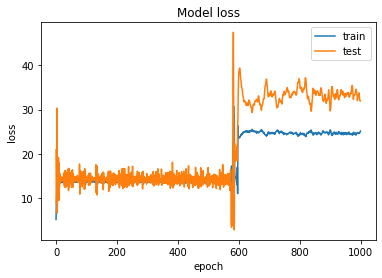

992.9225326176626
31.510673312667606
DN- 10  layers; 500 Units; LR- 0.05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 4s 2ms/sample - loss: 5.1927 - mean_squared_error: 43.4985 - val_loss: 6.6040 - val_mean_squared_error: 51.5749
Epoch 2/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 5.6811 - mean_squared_error: 55.5950 - val_loss: 13.1519 - val_mean_squared_error: 187.5251
Epoch 3/1000
2562/2562 [==============================] - 1s 285us/sample - loss: 11.9230 - mean_squared_error: 166.0695 - val_loss: 9.0527 - val_mean_squared_error: 92.4048
Epoch 4/1000
2562/2562 [==============================] - 1s 282us/sample - loss: 11.6151 - mean_squared_error: 155.6156 - val_loss: 14.2486 - val_mean_squared_error: 218.6709
Epoch 5/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.8830 - mean_squared_error: 193.0348 - val_loss: 7.9727 - val_mean_squared_error: 72.9

Epoch 47/1000
2562/2562 [==============================] - 1s 291us/sample - loss: 12.4487 - mean_squared_error: 177.0260 - val_loss: 11.9410 - val_mean_squared_error: 155.9298
Epoch 48/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 12.4101 - mean_squared_error: 175.7322 - val_loss: 11.7143 - val_mean_squared_error: 150.3385
Epoch 49/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 12.3476 - mean_squared_error: 174.5794 - val_loss: 12.5137 - val_mean_squared_error: 170.5067
Epoch 50/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.6273 - mean_squared_error: 182.1472 - val_loss: 11.5952 - val_mean_squared_error: 147.4431
Epoch 51/1000
2562/2562 [==============================] - 1s 282us/sample - loss: 12.3641 - mean_squared_error: 175.6834 - val_loss: 11.4931 - val_mean_squared_error: 144.9858
Epoch 52/1000
2562/2562 [==============================] - 1s 288us/sample - loss: 12.4260 - mean_squared_error: 17

2562/2562 [==============================] - 1s 289us/sample - loss: 12.6052 - mean_squared_error: 183.7529 - val_loss: 10.9651 - val_mean_squared_error: 132.5977
Epoch 94/1000
2562/2562 [==============================] - 1s 281us/sample - loss: 12.4207 - mean_squared_error: 179.4066 - val_loss: 12.1038 - val_mean_squared_error: 160.0055
Epoch 95/1000
2562/2562 [==============================] - 1s 284us/sample - loss: 12.3726 - mean_squared_error: 176.7040 - val_loss: 12.3001 - val_mean_squared_error: 164.9935
Epoch 96/1000
2562/2562 [==============================] - 1s 291us/sample - loss: 12.5921 - mean_squared_error: 183.0479 - val_loss: 11.2682 - val_mean_squared_error: 139.6407
Epoch 97/1000
2562/2562 [==============================] - 1s 283us/sample - loss: 12.4334 - mean_squared_error: 179.0732 - val_loss: 11.8545 - val_mean_squared_error: 153.7838
Epoch 98/1000
2562/2562 [==============================] - 1s 282us/sample - loss: 12.4130 - mean_squared_error: 177.9526 - val_l

2562/2562 [==============================] - 1s 289us/sample - loss: 12.4469 - mean_squared_error: 181.7602 - val_loss: 12.1373 - val_mean_squared_error: 160.8520
Epoch 140/1000
2562/2562 [==============================] - 1s 288us/sample - loss: 12.6241 - mean_squared_error: 186.1372 - val_loss: 11.6281 - val_mean_squared_error: 148.2410
Epoch 141/1000
2562/2562 [==============================] - 1s 285us/sample - loss: 12.5763 - mean_squared_error: 184.8572 - val_loss: 11.9786 - val_mean_squared_error: 156.8657
Epoch 142/1000
2562/2562 [==============================] - 1s 291us/sample - loss: 12.4045 - mean_squared_error: 180.0634 - val_loss: 11.6511 - val_mean_squared_error: 148.7989
Epoch 143/1000
2562/2562 [==============================] - 1s 293us/sample - loss: 12.4306 - mean_squared_error: 181.2024 - val_loss: 12.7646 - val_mean_squared_error: 177.1006
Epoch 144/1000
2562/2562 [==============================] - 1s 284us/sample - loss: 12.7385 - mean_squared_error: 189.7813 - 

2562/2562 [==============================] - 1s 291us/sample - loss: 12.5523 - mean_squared_error: 185.6527 - val_loss: 11.5002 - val_mean_squared_error: 145.1553
Epoch 186/1000
2562/2562 [==============================] - 1s 289us/sample - loss: 12.5803 - mean_squared_error: 186.3089 - val_loss: 12.3952 - val_mean_squared_error: 167.4364
Epoch 187/1000
2562/2562 [==============================] - 1s 288us/sample - loss: 12.7463 - mean_squared_error: 190.1573 - val_loss: 11.2921 - val_mean_squared_error: 140.2040
Epoch 188/1000
2562/2562 [==============================] - 1s 291us/sample - loss: 12.3489 - mean_squared_error: 180.2194 - val_loss: 12.2827 - val_mean_squared_error: 164.5487
Epoch 189/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 12.6591 - mean_squared_error: 188.4545 - val_loss: 10.8206 - val_mean_squared_error: 129.3053
Epoch 190/1000
2562/2562 [==============================] - 1s 288us/sample - loss: 12.4920 - mean_squared_error: 184.7202 - 

2562/2562 [==============================] - 1s 293us/sample - loss: 12.4088 - mean_squared_error: 182.3498 - val_loss: 12.6437 - val_mean_squared_error: 173.9085
Epoch 232/1000
2562/2562 [==============================] - 1s 289us/sample - loss: 12.3054 - mean_squared_error: 179.8141 - val_loss: 12.7567 - val_mean_squared_error: 176.8903
Epoch 233/1000
2562/2562 [==============================] - 1s 285us/sample - loss: 12.7632 - mean_squared_error: 196.7404 - val_loss: 8.9590 - val_mean_squared_error: 90.6222
Epoch 234/1000
2562/2562 [==============================] - 1s 288us/sample - loss: 12.1044 - mean_squared_error: 182.7474 - val_loss: 13.4093 - val_mean_squared_error: 194.6203
Epoch 235/1000
2562/2562 [==============================] - 1s 281us/sample - loss: 12.4160 - mean_squared_error: 183.2749 - val_loss: 12.3256 - val_mean_squared_error: 165.6472
Epoch 236/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 12.6287 - mean_squared_error: 189.4189 - va

2562/2562 [==============================] - 1s 305us/sample - loss: 12.5991 - mean_squared_error: 189.6406 - val_loss: 11.8520 - val_mean_squared_error: 153.7226
Epoch 278/1000
2562/2562 [==============================] - 1s 279us/sample - loss: 12.4827 - mean_squared_error: 184.9372 - val_loss: 11.5075 - val_mean_squared_error: 145.3306
Epoch 279/1000
2562/2562 [==============================] - 1s 285us/sample - loss: 12.2290 - mean_squared_error: 179.8489 - val_loss: 12.8416 - val_mean_squared_error: 179.1483
Epoch 280/1000
2562/2562 [==============================] - 1s 290us/sample - loss: 12.5944 - mean_squared_error: 188.7463 - val_loss: 11.7193 - val_mean_squared_error: 150.4624
Epoch 281/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 12.5870 - mean_squared_error: 188.9866 - val_loss: 11.3941 - val_mean_squared_error: 142.6188
Epoch 282/1000
2562/2562 [==============================] - 1s 284us/sample - loss: 12.3026 - mean_squared_error: 181.2652 - 

2562/2562 [==============================] - 1s 288us/sample - loss: 12.5800 - mean_squared_error: 189.0199 - val_loss: 11.6604 - val_mean_squared_error: 149.0263
Epoch 324/1000
2562/2562 [==============================] - 1s 293us/sample - loss: 12.3570 - mean_squared_error: 183.7244 - val_loss: 12.2885 - val_mean_squared_error: 164.6963
Epoch 325/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.4269 - mean_squared_error: 184.2150 - val_loss: 12.0964 - val_mean_squared_error: 159.8189
Epoch 326/1000
2562/2562 [==============================] - 1s 282us/sample - loss: 12.5080 - mean_squared_error: 186.9624 - val_loss: 11.5405 - val_mean_squared_error: 146.1231
Epoch 327/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 12.3073 - mean_squared_error: 181.5921 - val_loss: 12.2238 - val_mean_squared_error: 163.0443
Epoch 328/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 12.6223 - mean_squared_error: 190.2059 - 

2562/2562 [==============================] - 1s 289us/sample - loss: 12.4915 - mean_squared_error: 186.2388 - val_loss: 12.1068 - val_mean_squared_error: 160.0829
Epoch 370/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 12.4936 - mean_squared_error: 186.6402 - val_loss: 11.8862 - val_mean_squared_error: 154.5677
Epoch 371/1000
2562/2562 [==============================] - 1s 288us/sample - loss: 12.4369 - mean_squared_error: 185.3873 - val_loss: 12.6181 - val_mean_squared_error: 173.2347
Epoch 372/1000
2562/2562 [==============================] - 1s 283us/sample - loss: 12.8661 - mean_squared_error: 197.8840 - val_loss: 10.5833 - val_mean_squared_error: 123.9891
Epoch 373/1000
2562/2562 [==============================] - 1s 288us/sample - loss: 12.4003 - mean_squared_error: 185.1142 - val_loss: 12.1256 - val_mean_squared_error: 160.5559
Epoch 374/1000
2562/2562 [==============================] - 1s 285us/sample - loss: 12.3813 - mean_squared_error: 184.2306 - 

2562/2562 [==============================] - 1s 291us/sample - loss: 12.3628 - mean_squared_error: 185.9529 - val_loss: 12.1342 - val_mean_squared_error: 160.7724
Epoch 416/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.1983 - mean_squared_error: 180.3153 - val_loss: 13.6088 - val_mean_squared_error: 200.2094
Epoch 417/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 12.5707 - mean_squared_error: 191.7005 - val_loss: 11.2996 - val_mean_squared_error: 140.3808
Epoch 418/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.6793 - mean_squared_error: 191.9819 - val_loss: 10.2662 - val_mean_squared_error: 117.0604
Epoch 419/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.0866 - mean_squared_error: 181.2222 - val_loss: 13.3616 - val_mean_squared_error: 193.2935
Epoch 420/1000
2562/2562 [==============================] - 1s 282us/sample - loss: 12.5881 - mean_squared_error: 190.7234 - 

2562/2562 [==============================] - 1s 290us/sample - loss: 12.3382 - mean_squared_error: 184.8730 - val_loss: 12.7386 - val_mean_squared_error: 176.4103
Epoch 462/1000
2562/2562 [==============================] - 1s 283us/sample - loss: 12.3607 - mean_squared_error: 185.1740 - val_loss: 13.2240 - val_mean_squared_error: 189.4973
Epoch 463/1000
2562/2562 [==============================] - 1s 280us/sample - loss: 12.7334 - mean_squared_error: 194.9488 - val_loss: 11.2180 - val_mean_squared_error: 138.4626
Epoch 464/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 12.5948 - mean_squared_error: 191.1438 - val_loss: 11.0158 - val_mean_squared_error: 133.7635
Epoch 465/1000
2562/2562 [==============================] - 1s 285us/sample - loss: 12.3487 - mean_squared_error: 185.1518 - val_loss: 12.0782 - val_mean_squared_error: 159.3605
Epoch 466/1000
2562/2562 [==============================] - 1s 285us/sample - loss: 12.6197 - mean_squared_error: 190.6720 - 

2562/2562 [==============================] - 1s 291us/sample - loss: 12.4542 - mean_squared_error: 186.0950 - val_loss: 12.0822 - val_mean_squared_error: 159.4633
Epoch 508/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.6082 - mean_squared_error: 191.3834 - val_loss: 11.0591 - val_mean_squared_error: 134.7638
Epoch 509/1000
2562/2562 [==============================] - 1s 284us/sample - loss: 12.2894 - mean_squared_error: 182.0844 - val_loss: 11.9647 - val_mean_squared_error: 156.5202
Epoch 510/1000
2562/2562 [==============================] - 1s 295us/sample - loss: 12.3363 - mean_squared_error: 184.4736 - val_loss: 12.7953 - val_mean_squared_error: 177.9164
Epoch 511/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.4508 - mean_squared_error: 187.6504 - val_loss: 12.2136 - val_mean_squared_error: 162.7869
Epoch 512/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.3979 - mean_squared_error: 185.2509 - 

2562/2562 [==============================] - 1s 291us/sample - loss: 12.7686 - mean_squared_error: 197.3596 - val_loss: 10.0232 - val_mean_squared_error: 111.8880
Epoch 554/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.3082 - mean_squared_error: 185.1980 - val_loss: 11.5397 - val_mean_squared_error: 146.1041
Epoch 555/1000
2562/2562 [==============================] - 1s 282us/sample - loss: 12.2960 - mean_squared_error: 183.0549 - val_loss: 12.2823 - val_mean_squared_error: 164.5386
Epoch 556/1000
2562/2562 [==============================] - 1s 275us/sample - loss: 12.3953 - mean_squared_error: 185.1203 - val_loss: 12.5739 - val_mean_squared_error: 172.0769
Epoch 557/1000
2562/2562 [==============================] - 1s 293us/sample - loss: 12.3625 - mean_squared_error: 184.4313 - val_loss: 12.7311 - val_mean_squared_error: 176.2133
Epoch 558/1000
2562/2562 [==============================] - 1s 291us/sample - loss: 12.6054 - mean_squared_error: 191.1767 - 

2562/2562 [==============================] - 1s 294us/sample - loss: 12.3260 - mean_squared_error: 186.1658 - val_loss: 12.5797 - val_mean_squared_error: 172.2285
Epoch 600/1000
2562/2562 [==============================] - 1s 284us/sample - loss: 12.3876 - mean_squared_error: 185.3476 - val_loss: 12.0660 - val_mean_squared_error: 159.0550
Epoch 601/1000
2562/2562 [==============================] - 1s 284us/sample - loss: 12.4275 - mean_squared_error: 185.8239 - val_loss: 10.6491 - val_mean_squared_error: 125.4534
Epoch 602/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 12.4146 - mean_squared_error: 187.4685 - val_loss: 11.7501 - val_mean_squared_error: 151.2164
Epoch 603/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.3896 - mean_squared_error: 185.6314 - val_loss: 12.1866 - val_mean_squared_error: 162.1011
Epoch 604/1000
2562/2562 [==============================] - 1s 290us/sample - loss: 12.2975 - mean_squared_error: 182.2934 - 

2562/2562 [==============================] - 1s 290us/sample - loss: 12.4257 - mean_squared_error: 185.3573 - val_loss: 11.0429 - val_mean_squared_error: 134.3897
Epoch 646/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.2477 - mean_squared_error: 182.4601 - val_loss: 13.6182 - val_mean_squared_error: 200.4748
Epoch 647/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.6906 - mean_squared_error: 194.3923 - val_loss: 10.4810 - val_mean_squared_error: 121.7325
Epoch 648/1000
2562/2562 [==============================] - 1s 291us/sample - loss: 12.3305 - mean_squared_error: 184.3651 - val_loss: 11.1165 - val_mean_squared_error: 136.0922
Epoch 649/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 12.1276 - mean_squared_error: 179.8234 - val_loss: 13.2876 - val_mean_squared_error: 191.2482
Epoch 650/1000
2562/2562 [==============================] - 1s 289us/sample - loss: 12.6720 - mean_squared_error: 191.1571 - 

2562/2562 [==============================] - 1s 295us/sample - loss: 12.7339 - mean_squared_error: 194.5970 - val_loss: 10.2578 - val_mean_squared_error: 116.8809
Epoch 692/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.2340 - mean_squared_error: 181.6095 - val_loss: 11.2791 - val_mean_squared_error: 139.8968
Epoch 693/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.0951 - mean_squared_error: 178.7510 - val_loss: 13.4068 - val_mean_squared_error: 194.5502
Epoch 694/1000
2562/2562 [==============================] - 1s 289us/sample - loss: 12.4926 - mean_squared_error: 189.2714 - val_loss: 11.1513 - val_mean_squared_error: 136.9033
Epoch 695/1000
2562/2562 [==============================] - 1s 288us/sample - loss: 12.4301 - mean_squared_error: 186.8704 - val_loss: 11.2093 - val_mean_squared_error: 138.2576
Epoch 696/1000
2562/2562 [==============================] - 1s 282us/sample - loss: 12.3358 - mean_squared_error: 183.9912 - 

2562/2562 [==============================] - 1s 295us/sample - loss: 12.4274 - mean_squared_error: 187.1377 - val_loss: 12.4026 - val_mean_squared_error: 167.6266
Epoch 738/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 12.6155 - mean_squared_error: 191.1654 - val_loss: 10.9265 - val_mean_squared_error: 131.7141
Epoch 739/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.4180 - mean_squared_error: 187.5530 - val_loss: 12.3187 - val_mean_squared_error: 165.4704
Epoch 740/1000
2562/2562 [==============================] - 1s 282us/sample - loss: 12.4807 - mean_squared_error: 186.4370 - val_loss: 11.9368 - val_mean_squared_error: 155.8255
Epoch 741/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.4665 - mean_squared_error: 187.6414 - val_loss: 11.3037 - val_mean_squared_error: 140.4771
Epoch 742/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.5203 - mean_squared_error: 189.3569 - 

2562/2562 [==============================] - 1s 298us/sample - loss: 12.4240 - mean_squared_error: 188.4198 - val_loss: 12.1138 - val_mean_squared_error: 160.2586
Epoch 784/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.3262 - mean_squared_error: 185.0757 - val_loss: 12.3124 - val_mean_squared_error: 165.3084
Epoch 785/1000
2562/2562 [==============================] - 1s 290us/sample - loss: 12.4248 - mean_squared_error: 185.9837 - val_loss: 12.1877 - val_mean_squared_error: 162.1270
Epoch 786/1000
2562/2562 [==============================] - 1s 291us/sample - loss: 12.5709 - mean_squared_error: 191.0995 - val_loss: 11.6345 - val_mean_squared_error: 148.3956
Epoch 787/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.5657 - mean_squared_error: 191.3115 - val_loss: 10.7109 - val_mean_squared_error: 126.8337
Epoch 788/1000
2562/2562 [==============================] - 1s 285us/sample - loss: 12.2023 - mean_squared_error: 182.5529 - 

2562/2562 [==============================] - 1s 293us/sample - loss: 12.4119 - mean_squared_error: 186.8575 - val_loss: 12.4341 - val_mean_squared_error: 168.4401
Epoch 830/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 12.2818 - mean_squared_error: 182.7917 - val_loss: 12.4250 - val_mean_squared_error: 168.2050
Epoch 831/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.3929 - mean_squared_error: 185.8707 - val_loss: 11.4472 - val_mean_squared_error: 143.8856
Epoch 832/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 12.5543 - mean_squared_error: 190.8073 - val_loss: 10.6874 - val_mean_squared_error: 126.3077
Epoch 833/1000
2562/2562 [==============================] - 1s 293us/sample - loss: 12.2833 - mean_squared_error: 184.5787 - val_loss: 12.0861 - val_mean_squared_error: 159.5609
Epoch 834/1000
2562/2562 [==============================] - 1s 282us/sample - loss: 12.2596 - mean_squared_error: 182.3633 - 

2562/2562 [==============================] - 1s 290us/sample - loss: 12.5603 - mean_squared_error: 190.3471 - val_loss: 10.4693 - val_mean_squared_error: 121.4750
Epoch 876/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.4275 - mean_squared_error: 188.6296 - val_loss: 11.4665 - val_mean_squared_error: 144.3482
Epoch 877/1000
2562/2562 [==============================] - 1s 286us/sample - loss: 12.5115 - mean_squared_error: 189.8212 - val_loss: 11.9139 - val_mean_squared_error: 155.2557
Epoch 878/1000
2562/2562 [==============================] - 1s 284us/sample - loss: 12.2069 - mean_squared_error: 182.7254 - val_loss: 13.3128 - val_mean_squared_error: 191.9435
Epoch 879/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.4529 - mean_squared_error: 190.0967 - val_loss: 11.5803 - val_mean_squared_error: 147.0846
Epoch 880/1000
2562/2562 [==============================] - 1s 287us/sample - loss: 12.5671 - mean_squared_error: 190.5205 - 

2562/2562 [==============================] - 1s 294us/sample - loss: 12.1174 - mean_squared_error: 180.1728 - val_loss: 13.5087 - val_mean_squared_error: 197.3941
Epoch 922/1000
2562/2562 [==============================] - 1s 285us/sample - loss: 12.5717 - mean_squared_error: 191.6456 - val_loss: 12.4266 - val_mean_squared_error: 168.2468
Epoch 923/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 12.6793 - mean_squared_error: 194.2405 - val_loss: 10.5613 - val_mean_squared_error: 123.5023
Epoch 924/1000
2562/2562 [==============================] - 1s 283us/sample - loss: 12.3046 - mean_squared_error: 185.8000 - val_loss: 11.3769 - val_mean_squared_error: 142.2102
Epoch 925/1000
2562/2562 [==============================] - 1s 284us/sample - loss: 12.0319 - mean_squared_error: 178.0422 - val_loss: 13.0300 - val_mean_squared_error: 184.2102
Epoch 926/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 12.3576 - mean_squared_error: 186.3213 - 

2562/2562 [==============================] - 1s 295us/sample - loss: 12.0810 - mean_squared_error: 177.8866 - val_loss: 14.0309 - val_mean_squared_error: 212.2966
Epoch 968/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 12.7189 - mean_squared_error: 198.3848 - val_loss: 10.0427 - val_mean_squared_error: 112.2986
Epoch 969/1000
2562/2562 [==============================] - 1s 291us/sample - loss: 12.4719 - mean_squared_error: 188.2137 - val_loss: 11.2780 - val_mean_squared_error: 139.8713
Epoch 970/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 12.1692 - mean_squared_error: 180.6591 - val_loss: 12.5760 - val_mean_squared_error: 172.1310
Epoch 971/1000
2562/2562 [==============================] - 1s 289us/sample - loss: 12.3037 - mean_squared_error: 183.2742 - val_loss: 12.1566 - val_mean_squared_error: 161.3386
Epoch 972/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 12.4592 - mean_squared_error: 186.2476 - 

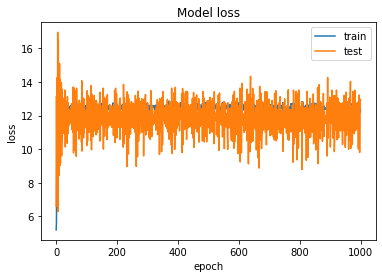

182.71239613330883
13.517114933790747
DN- 10  layers; 500 Units; LR- 2e-05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 4s 2ms/sample - loss: 5.8676 - mean_squared_error: 41.1041 - val_loss: 5.7344 - val_mean_squared_error: 39.3508
Epoch 2/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 5.7233 - mean_squared_error: 39.3200 - val_loss: 5.4715 - val_mean_squared_error: 36.1753
Epoch 3/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 5.5149 - mean_squared_error: 36.8094 - val_loss: 5.1358 - val_mean_squared_error: 32.3231
Epoch 4/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 5.2288 - mean_squared_error: 33.4615 - val_loss: 4.7645 - val_mean_squared_error: 28.3249
Epoch 5/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 4.9622 - mean_squared_error: 30.5118 - val_loss: 4.3777 - val_mean_squared_error: 24.4532


2562/2562 [==============================] - 1s 321us/sample - loss: 0.5598 - mean_squared_error: 1.3118 - val_loss: 0.9700 - val_mean_squared_error: 2.7894
Epoch 49/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.5652 - mean_squared_error: 1.3316 - val_loss: 0.9698 - val_mean_squared_error: 2.7883
Epoch 50/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5616 - mean_squared_error: 1.3131 - val_loss: 0.9719 - val_mean_squared_error: 2.7956
Epoch 51/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5747 - mean_squared_error: 1.3515 - val_loss: 0.9748 - val_mean_squared_error: 2.8059
Epoch 52/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.5622 - mean_squared_error: 1.3239 - val_loss: 0.9742 - val_mean_squared_error: 2.8037
Epoch 53/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5703 - mean_squared_error: 1.3424 - val_loss: 0.9708 - val_mean_squared_er

Epoch 96/1000
2562/2562 [==============================] - 1s 337us/sample - loss: 0.5512 - mean_squared_error: 1.2802 - val_loss: 0.9205 - val_mean_squared_error: 2.6032
Epoch 97/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.5612 - mean_squared_error: 1.3154 - val_loss: 0.9202 - val_mean_squared_error: 2.6021
Epoch 98/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.5584 - mean_squared_error: 1.3142 - val_loss: 0.9194 - val_mean_squared_error: 2.5992
Epoch 99/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5479 - mean_squared_error: 1.2773 - val_loss: 0.9208 - val_mean_squared_error: 2.6039
Epoch 100/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5597 - mean_squared_error: 1.3160 - val_loss: 0.9209 - val_mean_squared_error: 2.6040
Epoch 101/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5612 - mean_squared_error: 1.3217 - val_loss: 0.9225 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5454 - mean_squared_error: 1.2756 - val_loss: 0.8899 - val_mean_squared_error: 2.4915
Epoch 145/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5410 - mean_squared_error: 1.2629 - val_loss: 0.8923 - val_mean_squared_error: 2.4998
Epoch 146/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5406 - mean_squared_error: 1.2503 - val_loss: 0.8897 - val_mean_squared_error: 2.4906
Epoch 147/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5392 - mean_squared_error: 1.2399 - val_loss: 0.8881 - val_mean_squared_error: 2.4850
Epoch 148/1000
2562/2562 [==============================] - 1s 337us/sample - loss: 0.5433 - mean_squared_error: 1.2540 - val_loss: 0.8887 - val_mean_squared_error: 2.4871
Epoch 149/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5429 - mean_squared_error: 1.2714 - val_loss: 0.8912 -

2562/2562 [==============================] - 1s 327us/sample - loss: 0.5454 - mean_squared_error: 1.2718 - val_loss: 0.8796 - val_mean_squared_error: 2.4531
Epoch 192/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.5377 - mean_squared_error: 1.2462 - val_loss: 0.8801 - val_mean_squared_error: 2.4546
Epoch 193/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5410 - mean_squared_error: 1.2527 - val_loss: 0.8809 - val_mean_squared_error: 2.4573
Epoch 194/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5433 - mean_squared_error: 1.2726 - val_loss: 0.8811 - val_mean_squared_error: 2.4581
Epoch 195/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.5341 - mean_squared_error: 1.2349 - val_loss: 0.8791 - val_mean_squared_error: 2.4511
Epoch 196/1000
2562/2562 [==============================] - 1s 332us/sample - loss: 0.5394 - mean_squared_error: 1.2468 - val_loss: 0.8788 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5497 - mean_squared_error: 1.2803 - val_loss: 0.8512 - val_mean_squared_error: 2.3541
Epoch 240/1000
2562/2562 [==============================] - 1s 332us/sample - loss: 0.5413 - mean_squared_error: 1.2510 - val_loss: 0.8496 - val_mean_squared_error: 2.3488
Epoch 241/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.5337 - mean_squared_error: 1.2521 - val_loss: 0.8496 - val_mean_squared_error: 2.3485
Epoch 242/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5301 - mean_squared_error: 1.2144 - val_loss: 0.8493 - val_mean_squared_error: 2.3477
Epoch 243/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5390 - mean_squared_error: 1.2488 - val_loss: 0.8498 - val_mean_squared_error: 2.3493
Epoch 244/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5314 - mean_squared_error: 1.2377 - val_loss: 0.8518 -

2562/2562 [==============================] - 1s 344us/sample - loss: 0.5461 - mean_squared_error: 1.2715 - val_loss: 0.8442 - val_mean_squared_error: 2.3291
Epoch 287/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5218 - mean_squared_error: 1.2010 - val_loss: 0.8426 - val_mean_squared_error: 2.3237
Epoch 288/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.5242 - mean_squared_error: 1.2060 - val_loss: 0.8428 - val_mean_squared_error: 2.3242
Epoch 289/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.5333 - mean_squared_error: 1.2319 - val_loss: 0.8450 - val_mean_squared_error: 2.3316
Epoch 290/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.5319 - mean_squared_error: 1.2229 - val_loss: 0.8463 - val_mean_squared_error: 2.3360
Epoch 291/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5368 - mean_squared_error: 1.2500 - val_loss: 0.8456 - val_mean_squar

Epoch 334/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5277 - mean_squared_error: 1.2147 - val_loss: 0.8336 - val_mean_squared_error: 2.2922
Epoch 335/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.5293 - mean_squared_error: 1.2212 - val_loss: 0.8307 - val_mean_squared_error: 2.2825
Epoch 336/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.5233 - mean_squared_error: 1.2064 - val_loss: 0.8298 - val_mean_squared_error: 2.2793
Epoch 337/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.5345 - mean_squared_error: 1.2431 - val_loss: 0.8311 - val_mean_squared_error: 2.2838
Epoch 338/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5331 - mean_squared_error: 1.2451 - val_loss: 0.8331 - val_mean_squared_error: 2.2905
Epoch 339/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5362 - mean_squared_error: 1.2554 - val_loss: 0.8330 -

2562/2562 [==============================] - 1s 328us/sample - loss: 0.5247 - mean_squared_error: 1.2020 - val_loss: 0.8113 - val_mean_squared_error: 2.2163
Epoch 382/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5246 - mean_squared_error: 1.2112 - val_loss: 0.8082 - val_mean_squared_error: 2.2060
Epoch 383/1000
2562/2562 [==============================] - 1s 341us/sample - loss: 0.5351 - mean_squared_error: 1.2460 - val_loss: 0.8067 - val_mean_squared_error: 2.2008
Epoch 384/1000
2562/2562 [==============================] - 1s 330us/sample - loss: 0.5338 - mean_squared_error: 1.2289 - val_loss: 0.8087 - val_mean_squared_error: 2.2078
Epoch 385/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5219 - mean_squared_error: 1.2113 - val_loss: 0.8130 - val_mean_squared_error: 2.2220
Epoch 386/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5323 - mean_squared_error: 1.2321 - val_loss: 0.8152 - val_mean_squar

Epoch 429/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5322 - mean_squared_error: 1.2247 - val_loss: 0.8007 - val_mean_squared_error: 2.1804
Epoch 430/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5313 - mean_squared_error: 1.2337 - val_loss: 0.8002 - val_mean_squared_error: 2.1788
Epoch 431/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5271 - mean_squared_error: 1.2111 - val_loss: 0.7993 - val_mean_squared_error: 2.1755
Epoch 432/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.5345 - mean_squared_error: 1.2326 - val_loss: 0.7984 - val_mean_squared_error: 2.1726
Epoch 433/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5359 - mean_squared_error: 1.2466 - val_loss: 0.7987 - val_mean_squared_error: 2.1736
Epoch 434/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.5397 - mean_squared_error: 1.2510 - val_loss: 0.7991 -

2562/2562 [==============================] - 1s 358us/sample - loss: 0.5226 - mean_squared_error: 1.2082 - val_loss: 0.7886 - val_mean_squared_error: 2.1392
Epoch 477/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5352 - mean_squared_error: 1.2345 - val_loss: 0.7851 - val_mean_squared_error: 2.1275
Epoch 478/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5129 - mean_squared_error: 1.1738 - val_loss: 0.7825 - val_mean_squared_error: 2.1188
Epoch 479/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5333 - mean_squared_error: 1.2343 - val_loss: 0.7803 - val_mean_squared_error: 2.1115
Epoch 480/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.5221 - mean_squared_error: 1.1994 - val_loss: 0.7806 - val_mean_squared_error: 2.1125
Epoch 481/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5434 - mean_squared_error: 1.2564 - val_loss: 0.7793 - val_mean_squar

Epoch 524/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5285 - mean_squared_error: 1.2277 - val_loss: 0.7739 - val_mean_squared_error: 2.0899
Epoch 525/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5269 - mean_squared_error: 1.2091 - val_loss: 0.7774 - val_mean_squared_error: 2.1016
Epoch 526/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5245 - mean_squared_error: 1.2092 - val_loss: 0.7802 - val_mean_squared_error: 2.1110
Epoch 527/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5231 - mean_squared_error: 1.2073 - val_loss: 0.7797 - val_mean_squared_error: 2.1093
Epoch 528/1000
2562/2562 [==============================] - 1s 330us/sample - loss: 0.5284 - mean_squared_error: 1.2219 - val_loss: 0.7789 - val_mean_squared_error: 2.1065
Epoch 529/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5324 - mean_squared_error: 1.2357 - val_loss: 0.7773 -

2562/2562 [==============================] - 1s 320us/sample - loss: 0.5258 - mean_squared_error: 1.2222 - val_loss: 0.7698 - val_mean_squared_error: 2.0760
Epoch 572/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5109 - mean_squared_error: 1.1717 - val_loss: 0.7664 - val_mean_squared_error: 2.0645
Epoch 573/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5283 - mean_squared_error: 1.2137 - val_loss: 0.7662 - val_mean_squared_error: 2.0638
Epoch 574/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5248 - mean_squared_error: 1.2079 - val_loss: 0.7658 - val_mean_squared_error: 2.0626
Epoch 575/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5312 - mean_squared_error: 1.2363 - val_loss: 0.7643 - val_mean_squared_error: 2.0575
Epoch 576/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5260 - mean_squared_error: 1.2041 - val_loss: 0.7613 - val_mean_squar

Epoch 619/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5338 - mean_squared_error: 1.2280 - val_loss: 0.7687 - val_mean_squared_error: 2.0721
Epoch 620/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5250 - mean_squared_error: 1.2040 - val_loss: 0.7643 - val_mean_squared_error: 2.0574
Epoch 621/1000
2562/2562 [==============================] - 1s 332us/sample - loss: 0.5222 - mean_squared_error: 1.2026 - val_loss: 0.7615 - val_mean_squared_error: 2.0482
Epoch 622/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5193 - mean_squared_error: 1.1848 - val_loss: 0.7599 - val_mean_squared_error: 2.0428
Epoch 623/1000
2562/2562 [==============================] - 1s 334us/sample - loss: 0.5260 - mean_squared_error: 1.2083 - val_loss: 0.7582 - val_mean_squared_error: 2.0370
Epoch 624/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5082 - mean_squared_error: 1.1601 - val_loss: 0.7551 -

2562/2562 [==============================] - 1s 323us/sample - loss: 0.5307 - mean_squared_error: 1.2163 - val_loss: 0.7577 - val_mean_squared_error: 2.0351
Epoch 667/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5180 - mean_squared_error: 1.1953 - val_loss: 0.7574 - val_mean_squared_error: 2.0344
Epoch 668/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5198 - mean_squared_error: 1.1945 - val_loss: 0.7562 - val_mean_squared_error: 2.0301
Epoch 669/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5210 - mean_squared_error: 1.1874 - val_loss: 0.7576 - val_mean_squared_error: 2.0348
Epoch 670/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5257 - mean_squared_error: 1.2187 - val_loss: 0.7576 - val_mean_squared_error: 2.0349
Epoch 671/1000
2562/2562 [==============================] - 1s 336us/sample - loss: 0.5292 - mean_squared_error: 1.2195 - val_loss: 0.7556 - val_mean_squar

Epoch 714/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5239 - mean_squared_error: 1.1967 - val_loss: 0.7481 - val_mean_squared_error: 2.0032
Epoch 715/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5272 - mean_squared_error: 1.2071 - val_loss: 0.7486 - val_mean_squared_error: 2.0049
Epoch 716/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5177 - mean_squared_error: 1.1903 - val_loss: 0.7494 - val_mean_squared_error: 2.0075
Epoch 717/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5272 - mean_squared_error: 1.2285 - val_loss: 0.7494 - val_mean_squared_error: 2.0075
Epoch 718/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5257 - mean_squared_error: 1.2256 - val_loss: 0.7481 - val_mean_squared_error: 2.0033
Epoch 719/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5324 - mean_squared_error: 1.2267 - val_loss: 0.7466 -

2562/2562 [==============================] - 1s 335us/sample - loss: 0.5237 - mean_squared_error: 1.2054 - val_loss: 0.7290 - val_mean_squared_error: 1.9400
Epoch 762/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5165 - mean_squared_error: 1.1727 - val_loss: 0.7278 - val_mean_squared_error: 1.9359
Epoch 763/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5222 - mean_squared_error: 1.2011 - val_loss: 0.7255 - val_mean_squared_error: 1.9284
Epoch 764/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5191 - mean_squared_error: 1.1876 - val_loss: 0.7241 - val_mean_squared_error: 1.9238
Epoch 765/1000
2562/2562 [==============================] - 1s 346us/sample - loss: 0.5182 - mean_squared_error: 1.1989 - val_loss: 0.7253 - val_mean_squared_error: 1.9277
Epoch 766/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.5182 - mean_squared_error: 1.1939 - val_loss: 0.7261 - val_mean_squar

Epoch 809/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.5244 - mean_squared_error: 1.2143 - val_loss: 0.7372 - val_mean_squared_error: 1.9667
Epoch 810/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5261 - mean_squared_error: 1.2134 - val_loss: 0.7381 - val_mean_squared_error: 1.9696
Epoch 811/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5265 - mean_squared_error: 1.2227 - val_loss: 0.7374 - val_mean_squared_error: 1.9673
Epoch 812/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5196 - mean_squared_error: 1.1803 - val_loss: 0.7350 - val_mean_squared_error: 1.9597
Epoch 813/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.5213 - mean_squared_error: 1.1987 - val_loss: 0.7337 - val_mean_squared_error: 1.9551
Epoch 814/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5321 - mean_squared_error: 1.2297 - val_loss: 0.7348 -

2562/2562 [==============================] - 1s 328us/sample - loss: 0.5266 - mean_squared_error: 1.2123 - val_loss: 0.7255 - val_mean_squared_error: 1.9281
Epoch 857/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 0.5222 - mean_squared_error: 1.1981 - val_loss: 0.7286 - val_mean_squared_error: 1.9383
Epoch 858/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5284 - mean_squared_error: 1.2202 - val_loss: 0.7289 - val_mean_squared_error: 1.9393
Epoch 859/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5102 - mean_squared_error: 1.1695 - val_loss: 0.7270 - val_mean_squared_error: 1.9329
Epoch 860/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5236 - mean_squared_error: 1.2055 - val_loss: 0.7253 - val_mean_squared_error: 1.9274
Epoch 861/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.5248 - mean_squared_error: 1.2108 - val_loss: 0.7234 - val_mean_squar

Epoch 904/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5191 - mean_squared_error: 1.1880 - val_loss: 0.7244 - val_mean_squared_error: 1.9244
Epoch 905/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5196 - mean_squared_error: 1.1901 - val_loss: 0.7239 - val_mean_squared_error: 1.9228
Epoch 906/1000
2562/2562 [==============================] - 1s 330us/sample - loss: 0.5270 - mean_squared_error: 1.2031 - val_loss: 0.7225 - val_mean_squared_error: 1.9182
Epoch 907/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.5264 - mean_squared_error: 1.2037 - val_loss: 0.7219 - val_mean_squared_error: 1.9161
Epoch 908/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5235 - mean_squared_error: 1.2058 - val_loss: 0.7196 - val_mean_squared_error: 1.9086
Epoch 909/1000
2562/2562 [==============================] - 1s 370us/sample - loss: 0.5248 - mean_squared_error: 1.2044 - val_loss: 0.7200 -

2562/2562 [==============================] - 1s 324us/sample - loss: 0.5234 - mean_squared_error: 1.2026 - val_loss: 0.7158 - val_mean_squared_error: 1.8959
Epoch 952/1000
2562/2562 [==============================] - 1s 313us/sample - loss: 0.5159 - mean_squared_error: 1.1942 - val_loss: 0.7179 - val_mean_squared_error: 1.9028
Epoch 953/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5185 - mean_squared_error: 1.1907 - val_loss: 0.7196 - val_mean_squared_error: 1.9086
Epoch 954/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5266 - mean_squared_error: 1.2146 - val_loss: 0.7199 - val_mean_squared_error: 1.9096
Epoch 955/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.5183 - mean_squared_error: 1.1955 - val_loss: 0.7183 - val_mean_squared_error: 1.9041
Epoch 956/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5295 - mean_squared_error: 1.2216 - val_loss: 0.7165 - val_mean_squar

Epoch 999/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5233 - mean_squared_error: 1.2046 - val_loss: 0.7094 - val_mean_squared_error: 1.8750
Epoch 1000/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5130 - mean_squared_error: 1.1747 - val_loss: 0.7103 - val_mean_squared_error: 1.8779


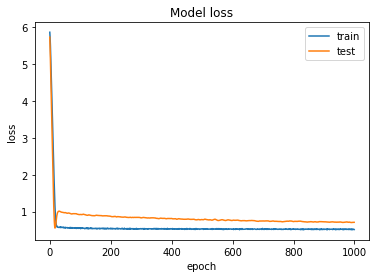

2.0947951175342756
1.4473407054091567
DN- 10  layers; 500 Units; LR- 2e-05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 4s 2ms/sample - loss: 5.5340 - mean_squared_error: 37.6730 - val_loss: 5.3561 - val_mean_squared_error: 35.5264
Epoch 2/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 5.4420 - mean_squared_error: 36.5538 - val_loss: 5.1396 - val_mean_squared_error: 33.0664
Epoch 3/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 5.2546 - mean_squared_error: 34.3782 - val_loss: 4.8658 - val_mean_squared_error: 30.0862
Epoch 4/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 5.0439 - mean_squared_error: 32.0353 - val_loss: 4.5673 - val_mean_squared_error: 27.0084
Epoch 5/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 4.8210 - mean_squared_error: 29.6136 - val_loss: 4.2526 - val_mean_squared_error: 23.9571
Epoc

2562/2562 [==============================] - 1s 322us/sample - loss: 0.5605 - mean_squared_error: 1.4794 - val_loss: 1.0014 - val_mean_squared_error: 3.0897
Epoch 49/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5552 - mean_squared_error: 1.4706 - val_loss: 1.0011 - val_mean_squared_error: 3.0879
Epoch 50/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5724 - mean_squared_error: 1.5051 - val_loss: 1.0013 - val_mean_squared_error: 3.0881
Epoch 51/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.5621 - mean_squared_error: 1.4887 - val_loss: 1.0005 - val_mean_squared_error: 3.0848
Epoch 52/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5534 - mean_squared_error: 1.4641 - val_loss: 0.9961 - val_mean_squared_error: 3.0678
Epoch 53/1000
2562/2562 [==============================] - 1s 359us/sample - loss: 0.5474 - mean_squared_error: 1.4362 - val_loss: 0.9937 - val_mean_squared_er

Epoch 96/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.5131 - mean_squared_error: 1.3258 - val_loss: 0.9291 - val_mean_squared_error: 2.8069
Epoch 97/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5240 - mean_squared_error: 1.3584 - val_loss: 0.9243 - val_mean_squared_error: 2.7895
Epoch 98/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5240 - mean_squared_error: 1.3693 - val_loss: 0.9210 - val_mean_squared_error: 2.7776
Epoch 99/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5114 - mean_squared_error: 1.3095 - val_loss: 0.9216 - val_mean_squared_error: 2.7794
Epoch 100/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.5158 - mean_squared_error: 1.3323 - val_loss: 0.9253 - val_mean_squared_error: 2.7926
Epoch 101/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4975 - mean_squared_error: 1.2767 - val_loss: 0.9291 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4996 - mean_squared_error: 1.2782 - val_loss: 0.9061 - val_mean_squared_error: 2.7175
Epoch 145/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5028 - mean_squared_error: 1.2878 - val_loss: 0.9081 - val_mean_squared_error: 2.7244
Epoch 146/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.5047 - mean_squared_error: 1.2881 - val_loss: 0.9090 - val_mean_squared_error: 2.7273
Epoch 147/1000
2562/2562 [==============================] - 1s 313us/sample - loss: 0.5007 - mean_squared_error: 1.3043 - val_loss: 0.9059 - val_mean_squared_error: 2.7164
Epoch 148/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5000 - mean_squared_error: 1.2891 - val_loss: 0.8998 - val_mean_squared_error: 2.6946
Epoch 149/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.4920 - mean_squared_error: 1.2687 - val_loss: 0.8948 -

2562/2562 [==============================] - 1s 327us/sample - loss: 0.4806 - mean_squared_error: 1.2401 - val_loss: 0.8715 - val_mean_squared_error: 2.5922
Epoch 192/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4991 - mean_squared_error: 1.2757 - val_loss: 0.8683 - val_mean_squared_error: 2.5812
Epoch 193/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4928 - mean_squared_error: 1.2582 - val_loss: 0.8670 - val_mean_squared_error: 2.5765
Epoch 194/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4774 - mean_squared_error: 1.2240 - val_loss: 0.8637 - val_mean_squared_error: 2.5652
Epoch 195/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4947 - mean_squared_error: 1.2553 - val_loss: 0.8611 - val_mean_squared_error: 2.5559
Epoch 196/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.4929 - mean_squared_error: 1.2631 - val_loss: 0.8594 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 1s 338us/sample - loss: 0.4791 - mean_squared_error: 1.2220 - val_loss: 0.8451 - val_mean_squared_error: 2.4992
Epoch 240/1000
2562/2562 [==============================] - 1s 344us/sample - loss: 0.4846 - mean_squared_error: 1.2370 - val_loss: 0.8469 - val_mean_squared_error: 2.5053
Epoch 241/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.4921 - mean_squared_error: 1.2673 - val_loss: 0.8423 - val_mean_squared_error: 2.4895
Epoch 242/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4942 - mean_squared_error: 1.2616 - val_loss: 0.8422 - val_mean_squared_error: 2.4894
Epoch 243/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4837 - mean_squared_error: 1.2338 - val_loss: 0.8424 - val_mean_squared_error: 2.4899
Epoch 244/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4936 - mean_squared_error: 1.2693 - val_loss: 0.8354 -

2562/2562 [==============================] - 1s 327us/sample - loss: 0.4845 - mean_squared_error: 1.2303 - val_loss: 0.8191 - val_mean_squared_error: 2.4093
Epoch 287/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5018 - mean_squared_error: 1.2799 - val_loss: 0.8172 - val_mean_squared_error: 2.4027
Epoch 288/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.4785 - mean_squared_error: 1.2310 - val_loss: 0.8162 - val_mean_squared_error: 2.3994
Epoch 289/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.4885 - mean_squared_error: 1.2446 - val_loss: 0.8197 - val_mean_squared_error: 2.4111
Epoch 290/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.4720 - mean_squared_error: 1.1968 - val_loss: 0.8227 - val_mean_squared_error: 2.4212
Epoch 291/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4877 - mean_squared_error: 1.2477 - val_loss: 0.8250 - val_mean_squar

Epoch 334/1000
2562/2562 [==============================] - 1s 330us/sample - loss: 0.4820 - mean_squared_error: 1.2232 - val_loss: 0.8086 - val_mean_squared_error: 2.3727
Epoch 335/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.4798 - mean_squared_error: 1.2198 - val_loss: 0.8092 - val_mean_squared_error: 2.3748
Epoch 336/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4903 - mean_squared_error: 1.2457 - val_loss: 0.8078 - val_mean_squared_error: 2.3700
Epoch 337/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4771 - mean_squared_error: 1.2043 - val_loss: 0.8080 - val_mean_squared_error: 2.3707
Epoch 338/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4842 - mean_squared_error: 1.2337 - val_loss: 0.8103 - val_mean_squared_error: 2.3786
Epoch 339/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4783 - mean_squared_error: 1.2143 - val_loss: 0.8103 -

2562/2562 [==============================] - 1s 322us/sample - loss: 0.4815 - mean_squared_error: 1.2262 - val_loss: 0.7996 - val_mean_squared_error: 2.3419
Epoch 382/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4805 - mean_squared_error: 1.2151 - val_loss: 0.8015 - val_mean_squared_error: 2.3483
Epoch 383/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.4776 - mean_squared_error: 1.2120 - val_loss: 0.8005 - val_mean_squared_error: 2.3449
Epoch 384/1000
2562/2562 [==============================] - 1s 352us/sample - loss: 0.4772 - mean_squared_error: 1.2308 - val_loss: 0.7997 - val_mean_squared_error: 2.3421
Epoch 385/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4695 - mean_squared_error: 1.1945 - val_loss: 0.7991 - val_mean_squared_error: 2.3401
Epoch 386/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4865 - mean_squared_error: 1.2453 - val_loss: 0.7990 - val_mean_squar

Epoch 429/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4896 - mean_squared_error: 1.2432 - val_loss: 0.7868 - val_mean_squared_error: 2.2984
Epoch 430/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.4763 - mean_squared_error: 1.2143 - val_loss: 0.7879 - val_mean_squared_error: 2.3021
Epoch 431/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4738 - mean_squared_error: 1.2112 - val_loss: 0.7885 - val_mean_squared_error: 2.3040
Epoch 432/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4760 - mean_squared_error: 1.2263 - val_loss: 0.7874 - val_mean_squared_error: 2.3004
Epoch 433/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4788 - mean_squared_error: 1.2293 - val_loss: 0.7892 - val_mean_squared_error: 2.3067
Epoch 434/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4811 - mean_squared_error: 1.2280 - val_loss: 0.7897 -

2562/2562 [==============================] - 1s 327us/sample - loss: 0.4658 - mean_squared_error: 1.1838 - val_loss: 0.7725 - val_mean_squared_error: 2.2501
Epoch 477/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4821 - mean_squared_error: 1.2385 - val_loss: 0.7693 - val_mean_squared_error: 2.2394
Epoch 478/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.4855 - mean_squared_error: 1.2388 - val_loss: 0.7665 - val_mean_squared_error: 2.2301
Epoch 479/1000
2562/2562 [==============================] - 1s 313us/sample - loss: 0.4715 - mean_squared_error: 1.2021 - val_loss: 0.7661 - val_mean_squared_error: 2.2287
Epoch 480/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.4731 - mean_squared_error: 1.2050 - val_loss: 0.7665 - val_mean_squared_error: 2.2300
Epoch 481/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.4801 - mean_squared_error: 1.2246 - val_loss: 0.7675 - val_mean_squar

Epoch 524/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.4706 - mean_squared_error: 1.2106 - val_loss: 0.7629 - val_mean_squared_error: 2.2178
Epoch 525/1000
2562/2562 [==============================] - 1s 313us/sample - loss: 0.4730 - mean_squared_error: 1.2125 - val_loss: 0.7626 - val_mean_squared_error: 2.2166
Epoch 526/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4762 - mean_squared_error: 1.2139 - val_loss: 0.7625 - val_mean_squared_error: 2.2163
Epoch 527/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.4738 - mean_squared_error: 1.2048 - val_loss: 0.7618 - val_mean_squared_error: 2.2139
Epoch 528/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.4738 - mean_squared_error: 1.2079 - val_loss: 0.7599 - val_mean_squared_error: 2.2078
Epoch 529/1000
2562/2562 [==============================] - 1s 357us/sample - loss: 0.4718 - mean_squared_error: 1.2114 - val_loss: 0.7592 -

2562/2562 [==============================] - 1s 328us/sample - loss: 0.4661 - mean_squared_error: 1.1800 - val_loss: 0.7578 - val_mean_squared_error: 2.2004
Epoch 572/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4742 - mean_squared_error: 1.2179 - val_loss: 0.7579 - val_mean_squared_error: 2.2007
Epoch 573/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4761 - mean_squared_error: 1.2254 - val_loss: 0.7542 - val_mean_squared_error: 2.1885
Epoch 574/1000
2562/2562 [==============================] - 1s 313us/sample - loss: 0.4653 - mean_squared_error: 1.1830 - val_loss: 0.7523 - val_mean_squared_error: 2.1821
Epoch 575/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.4693 - mean_squared_error: 1.2117 - val_loss: 0.7478 - val_mean_squared_error: 2.1671
Epoch 576/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.4811 - mean_squared_error: 1.2432 - val_loss: 0.7452 - val_mean_squar

Epoch 619/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.4666 - mean_squared_error: 1.1771 - val_loss: 0.7322 - val_mean_squared_error: 2.1151
Epoch 620/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.4817 - mean_squared_error: 1.2216 - val_loss: 0.7323 - val_mean_squared_error: 2.1154
Epoch 621/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.4718 - mean_squared_error: 1.1998 - val_loss: 0.7327 - val_mean_squared_error: 2.1166
Epoch 622/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4773 - mean_squared_error: 1.2102 - val_loss: 0.7322 - val_mean_squared_error: 2.1151
Epoch 623/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.4745 - mean_squared_error: 1.2028 - val_loss: 0.7312 - val_mean_squared_error: 2.1116
Epoch 624/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4796 - mean_squared_error: 1.2245 - val_loss: 0.7311 -

2562/2562 [==============================] - 1s 318us/sample - loss: 0.4751 - mean_squared_error: 1.2119 - val_loss: 0.7297 - val_mean_squared_error: 2.1066
Epoch 667/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 0.4787 - mean_squared_error: 1.2164 - val_loss: 0.7261 - val_mean_squared_error: 2.0945
Epoch 668/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4580 - mean_squared_error: 1.1669 - val_loss: 0.7255 - val_mean_squared_error: 2.0925
Epoch 669/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4686 - mean_squared_error: 1.1856 - val_loss: 0.7269 - val_mean_squared_error: 2.0974
Epoch 670/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4737 - mean_squared_error: 1.2045 - val_loss: 0.7288 - val_mean_squared_error: 2.1034
Epoch 671/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4641 - mean_squared_error: 1.1859 - val_loss: 0.7300 - val_mean_squar

Epoch 714/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.4756 - mean_squared_error: 1.2039 - val_loss: 0.7294 - val_mean_squared_error: 2.1054
Epoch 715/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4836 - mean_squared_error: 1.2377 - val_loss: 0.7281 - val_mean_squared_error: 2.1012
Epoch 716/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.4725 - mean_squared_error: 1.2027 - val_loss: 0.7277 - val_mean_squared_error: 2.0998
Epoch 717/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4699 - mean_squared_error: 1.1815 - val_loss: 0.7246 - val_mean_squared_error: 2.0897
Epoch 718/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4681 - mean_squared_error: 1.1905 - val_loss: 0.7220 - val_mean_squared_error: 2.0808
Epoch 719/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4787 - mean_squared_error: 1.2275 - val_loss: 0.7203 -

2562/2562 [==============================] - 1s 317us/sample - loss: 0.4611 - mean_squared_error: 1.1694 - val_loss: 0.7245 - val_mean_squared_error: 2.0891
Epoch 762/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4663 - mean_squared_error: 1.1870 - val_loss: 0.7252 - val_mean_squared_error: 2.0915
Epoch 763/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4702 - mean_squared_error: 1.1880 - val_loss: 0.7259 - val_mean_squared_error: 2.0938
Epoch 764/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4710 - mean_squared_error: 1.1995 - val_loss: 0.7261 - val_mean_squared_error: 2.0946
Epoch 765/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.4830 - mean_squared_error: 1.2284 - val_loss: 0.7252 - val_mean_squared_error: 2.0916
Epoch 766/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.4711 - mean_squared_error: 1.1922 - val_loss: 0.7230 - val_mean_squar

Epoch 809/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4713 - mean_squared_error: 1.1960 - val_loss: 0.7026 - val_mean_squared_error: 2.0167
Epoch 810/1000
2562/2562 [==============================] - 1s 334us/sample - loss: 0.4618 - mean_squared_error: 1.1667 - val_loss: 0.6998 - val_mean_squared_error: 2.0076
Epoch 811/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.4623 - mean_squared_error: 1.1742 - val_loss: 0.6989 - val_mean_squared_error: 2.0045
Epoch 812/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4621 - mean_squared_error: 1.1702 - val_loss: 0.6999 - val_mean_squared_error: 2.0077
Epoch 813/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.4728 - mean_squared_error: 1.2063 - val_loss: 0.7027 - val_mean_squared_error: 2.0170
Epoch 814/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4677 - mean_squared_error: 1.1881 - val_loss: 0.7065 -

2562/2562 [==============================] - 1s 326us/sample - loss: 0.4681 - mean_squared_error: 1.1887 - val_loss: 0.7140 - val_mean_squared_error: 2.0543
Epoch 857/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4715 - mean_squared_error: 1.2082 - val_loss: 0.7137 - val_mean_squared_error: 2.0534
Epoch 858/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.4587 - mean_squared_error: 1.1590 - val_loss: 0.7111 - val_mean_squared_error: 2.0449
Epoch 859/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4742 - mean_squared_error: 1.2162 - val_loss: 0.7108 - val_mean_squared_error: 2.0439
Epoch 860/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.4610 - mean_squared_error: 1.1682 - val_loss: 0.7105 - val_mean_squared_error: 2.0426
Epoch 861/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.4754 - mean_squared_error: 1.2063 - val_loss: 0.7115 - val_mean_squar

Epoch 904/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.4616 - mean_squared_error: 1.1716 - val_loss: 0.7025 - val_mean_squared_error: 2.0163
Epoch 905/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4762 - mean_squared_error: 1.2177 - val_loss: 0.6996 - val_mean_squared_error: 2.0069
Epoch 906/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.4685 - mean_squared_error: 1.1936 - val_loss: 0.6989 - val_mean_squared_error: 2.0046
Epoch 907/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.4769 - mean_squared_error: 1.1996 - val_loss: 0.6971 - val_mean_squared_error: 1.9985
Epoch 908/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.4696 - mean_squared_error: 1.1939 - val_loss: 0.6971 - val_mean_squared_error: 1.9987
Epoch 909/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.4613 - mean_squared_error: 1.1725 - val_loss: 0.6967 -

2562/2562 [==============================] - 1s 325us/sample - loss: 0.4670 - mean_squared_error: 1.1927 - val_loss: 0.6927 - val_mean_squared_error: 1.9841
Epoch 952/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.4679 - mean_squared_error: 1.1865 - val_loss: 0.6914 - val_mean_squared_error: 1.9796
Epoch 953/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.4676 - mean_squared_error: 1.1947 - val_loss: 0.6915 - val_mean_squared_error: 1.9801
Epoch 954/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.4711 - mean_squared_error: 1.1955 - val_loss: 0.6923 - val_mean_squared_error: 1.9827
Epoch 955/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4584 - mean_squared_error: 1.1659 - val_loss: 0.6908 - val_mean_squared_error: 1.9778
Epoch 956/1000
2562/2562 [==============================] - 1s 332us/sample - loss: 0.4710 - mean_squared_error: 1.1984 - val_loss: 0.6891 - val_mean_squar

Epoch 999/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.4784 - mean_squared_error: 1.2142 - val_loss: 0.6810 - val_mean_squared_error: 1.9454
Epoch 1000/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.4715 - mean_squared_error: 1.2031 - val_loss: 0.6833 - val_mean_squared_error: 1.9529


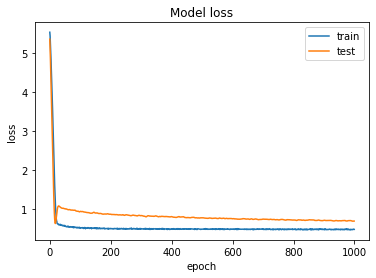

2.1772185444530643
1.4755400856815326
DN- 11  layers; 300 Units; LR- 0.05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 5s 2ms/sample - loss: 4.7932 - mean_squared_error: 36.9992 - val_loss: 1.8648 - val_mean_squared_error: 6.5361
Epoch 2/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 2.0238 - mean_squared_error: 11.0811 - val_loss: 2.1616 - val_mean_squared_error: 7.8329
Epoch 3/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 6.0356 - mean_squared_error: 57.8791 - val_loss: 5.9937 - val_mean_squared_error: 42.8678
Epoch 4/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 2.7659 - mean_squared_error: 15.7275 - val_loss: 1.1174 - val_mean_squared_error: 3.3732
Epoch 5/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 1.9925 - mean_squared_error: 8.6271 - val_loss: 3.9499 - val_mean_squared_error: 20.6412
Epoch

2562/2562 [==============================] - 1s 303us/sample - loss: 0.5259 - mean_squared_error: 1.2421 - val_loss: 0.5679 - val_mean_squared_error: 1.3212
Epoch 49/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5321 - mean_squared_error: 1.2519 - val_loss: 0.4931 - val_mean_squared_error: 1.1506
Epoch 50/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.5082 - mean_squared_error: 1.1965 - val_loss: 0.5030 - val_mean_squared_error: 1.2187
Epoch 51/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.5055 - mean_squared_error: 1.1837 - val_loss: 0.5514 - val_mean_squared_error: 1.3950
Epoch 52/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 0.5493 - mean_squared_error: 1.3267 - val_loss: 0.6019 - val_mean_squared_error: 1.5678
Epoch 53/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.5366 - mean_squared_error: 1.2938 - val_loss: 0.4910 - val_mean_squared_er

Epoch 96/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5211 - mean_squared_error: 1.2302 - val_loss: 0.5428 - val_mean_squared_error: 1.3657
Epoch 97/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.5202 - mean_squared_error: 1.2526 - val_loss: 0.4931 - val_mean_squared_error: 1.1759
Epoch 98/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4957 - mean_squared_error: 1.1709 - val_loss: 0.4955 - val_mean_squared_error: 1.1532
Epoch 99/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.5055 - mean_squared_error: 1.1968 - val_loss: 0.5371 - val_mean_squared_error: 1.3459
Epoch 100/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.5149 - mean_squared_error: 1.2342 - val_loss: 0.4912 - val_mean_squared_error: 1.1644
Epoch 101/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 0.5336 - mean_squared_error: 1.2760 - val_loss: 0.5563 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.5259 - mean_squared_error: 1.2399 - val_loss: 0.5845 - val_mean_squared_error: 1.3671
Epoch 145/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.5477 - mean_squared_error: 1.3123 - val_loss: 0.4903 - val_mean_squared_error: 1.1583
Epoch 146/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4926 - mean_squared_error: 1.1585 - val_loss: 0.5116 - val_mean_squared_error: 1.2536
Epoch 147/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.5051 - mean_squared_error: 1.2036 - val_loss: 0.6369 - val_mean_squared_error: 1.5139
Epoch 148/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.5591 - mean_squared_error: 1.3490 - val_loss: 0.6738 - val_mean_squared_error: 1.8111
Epoch 149/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.5559 - mean_squared_error: 1.3454 - val_loss: 0.4940 -

2562/2562 [==============================] - 1s 314us/sample - loss: 0.4816 - mean_squared_error: 1.1263 - val_loss: 0.5143 - val_mean_squared_error: 1.2647
Epoch 192/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.4968 - mean_squared_error: 1.1735 - val_loss: 0.5561 - val_mean_squared_error: 1.2918
Epoch 193/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.5118 - mean_squared_error: 1.2023 - val_loss: 0.5350 - val_mean_squared_error: 1.3397
Epoch 194/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 0.5120 - mean_squared_error: 1.2198 - val_loss: 0.4918 - val_mean_squared_error: 1.1503
Epoch 195/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4880 - mean_squared_error: 1.1408 - val_loss: 0.5036 - val_mean_squared_error: 1.1675
Epoch 196/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4880 - mean_squared_error: 1.1392 - val_loss: 0.5226 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4816 - mean_squared_error: 1.1298 - val_loss: 0.4979 - val_mean_squared_error: 1.2010
Epoch 240/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4803 - mean_squared_error: 1.1269 - val_loss: 0.5259 - val_mean_squared_error: 1.3081
Epoch 241/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4874 - mean_squared_error: 1.1461 - val_loss: 0.4930 - val_mean_squared_error: 1.1785
Epoch 242/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4819 - mean_squared_error: 1.1250 - val_loss: 0.4997 - val_mean_squared_error: 1.2085
Epoch 243/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4845 - mean_squared_error: 1.1384 - val_loss: 0.4976 - val_mean_squared_error: 1.1999
Epoch 244/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.4772 - mean_squared_error: 1.1211 - val_loss: 0.5299 -

2562/2562 [==============================] - 1s 311us/sample - loss: 0.4838 - mean_squared_error: 1.1295 - val_loss: 0.4905 - val_mean_squared_error: 1.1508
Epoch 287/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4790 - mean_squared_error: 1.1200 - val_loss: 0.5063 - val_mean_squared_error: 1.2358
Epoch 288/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 0.4863 - mean_squared_error: 1.1428 - val_loss: 0.6153 - val_mean_squared_error: 1.6165
Epoch 289/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.5238 - mean_squared_error: 1.2599 - val_loss: 0.5716 - val_mean_squared_error: 1.4683
Epoch 290/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.5202 - mean_squared_error: 1.2260 - val_loss: 0.4999 - val_mean_squared_error: 1.2103
Epoch 291/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4908 - mean_squared_error: 1.1373 - val_loss: 0.5243 - val_mean_squar

Epoch 334/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4744 - mean_squared_error: 1.1088 - val_loss: 0.4902 - val_mean_squared_error: 1.1506
Epoch 335/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4739 - mean_squared_error: 1.1044 - val_loss: 0.5027 - val_mean_squared_error: 1.1668
Epoch 336/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 0.4824 - mean_squared_error: 1.1236 - val_loss: 0.4909 - val_mean_squared_error: 1.1696
Epoch 337/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4841 - mean_squared_error: 1.1384 - val_loss: 0.5610 - val_mean_squared_error: 1.3063
Epoch 338/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4971 - mean_squared_error: 1.1804 - val_loss: 0.5328 - val_mean_squared_error: 1.2345
Epoch 339/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4859 - mean_squared_error: 1.1422 - val_loss: 0.5335 -

2562/2562 [==============================] - 1s 306us/sample - loss: 0.4916 - mean_squared_error: 1.1550 - val_loss: 0.5379 - val_mean_squared_error: 1.3530
Epoch 382/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.5004 - mean_squared_error: 1.1985 - val_loss: 0.4914 - val_mean_squared_error: 1.1505
Epoch 383/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 0.4814 - mean_squared_error: 1.1461 - val_loss: 0.5326 - val_mean_squared_error: 1.2346
Epoch 384/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.4893 - mean_squared_error: 1.1456 - val_loss: 0.4953 - val_mean_squared_error: 1.1925
Epoch 385/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4791 - mean_squared_error: 1.1140 - val_loss: 0.4998 - val_mean_squared_error: 1.2119
Epoch 386/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4820 - mean_squared_error: 1.1391 - val_loss: 0.4931 - val_mean_squar

Epoch 429/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4702 - mean_squared_error: 1.0869 - val_loss: 0.4891 - val_mean_squared_error: 1.1595
Epoch 430/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4754 - mean_squared_error: 1.1104 - val_loss: 0.5085 - val_mean_squared_error: 1.2469
Epoch 431/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.4828 - mean_squared_error: 1.1304 - val_loss: 0.4894 - val_mean_squared_error: 1.1512
Epoch 432/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.4734 - mean_squared_error: 1.1034 - val_loss: 0.4890 - val_mean_squared_error: 1.1582
Epoch 433/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4778 - mean_squared_error: 1.1110 - val_loss: 0.4965 - val_mean_squared_error: 1.1985
Epoch 434/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.4774 - mean_squared_error: 1.1095 - val_loss: 0.5042 -

2562/2562 [==============================] - 1s 317us/sample - loss: 0.4763 - mean_squared_error: 1.1118 - val_loss: 0.4910 - val_mean_squared_error: 1.1734
Epoch 477/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.4745 - mean_squared_error: 1.1034 - val_loss: 0.4941 - val_mean_squared_error: 1.1536
Epoch 478/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4814 - mean_squared_error: 1.1241 - val_loss: 0.5447 - val_mean_squared_error: 1.2657
Epoch 479/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 0.5013 - mean_squared_error: 1.1815 - val_loss: 0.4889 - val_mean_squared_error: 1.1522
Epoch 480/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 0.4740 - mean_squared_error: 1.1088 - val_loss: 0.4899 - val_mean_squared_error: 1.1673
Epoch 481/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.4776 - mean_squared_error: 1.1260 - val_loss: 0.4975 - val_mean_squar

Epoch 524/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4761 - mean_squared_error: 1.1203 - val_loss: 0.4890 - val_mean_squared_error: 1.1514
Epoch 525/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4746 - mean_squared_error: 1.1192 - val_loss: 0.5144 - val_mean_squared_error: 1.1932
Epoch 526/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.4793 - mean_squared_error: 1.1218 - val_loss: 0.4998 - val_mean_squared_error: 1.1631
Epoch 527/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4793 - mean_squared_error: 1.1136 - val_loss: 0.4887 - val_mean_squared_error: 1.1586
Epoch 528/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4759 - mean_squared_error: 1.1107 - val_loss: 0.4925 - val_mean_squared_error: 1.1518
Epoch 529/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4732 - mean_squared_error: 1.0934 - val_loss: 0.4938 -

2562/2562 [==============================] - 1s 313us/sample - loss: 0.4768 - mean_squared_error: 1.1130 - val_loss: 0.4885 - val_mean_squared_error: 1.1524
Epoch 572/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4780 - mean_squared_error: 1.1273 - val_loss: 0.4891 - val_mean_squared_error: 1.1508
Epoch 573/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4777 - mean_squared_error: 1.1118 - val_loss: 0.4915 - val_mean_squared_error: 1.1511
Epoch 574/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4768 - mean_squared_error: 1.1150 - val_loss: 0.4885 - val_mean_squared_error: 1.1592
Epoch 575/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4753 - mean_squared_error: 1.1100 - val_loss: 0.4933 - val_mean_squared_error: 1.1873
Epoch 576/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4803 - mean_squared_error: 1.1190 - val_loss: 0.4894 - val_mean_squar

Epoch 619/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4720 - mean_squared_error: 1.1047 - val_loss: 0.4892 - val_mean_squared_error: 1.1505
Epoch 620/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.4796 - mean_squared_error: 1.1241 - val_loss: 0.4888 - val_mean_squared_error: 1.1641
Epoch 621/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.4736 - mean_squared_error: 1.1112 - val_loss: 0.4916 - val_mean_squared_error: 1.1513
Epoch 622/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4733 - mean_squared_error: 1.1040 - val_loss: 0.5083 - val_mean_squared_error: 1.1808
Epoch 623/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4798 - mean_squared_error: 1.1268 - val_loss: 0.4905 - val_mean_squared_error: 1.1744
Epoch 624/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 0.4853 - mean_squared_error: 1.1374 - val_loss: 0.4908 -

2562/2562 [==============================] - 1s 318us/sample - loss: 0.4866 - mean_squared_error: 1.1465 - val_loss: 0.5846 - val_mean_squared_error: 1.3736
Epoch 667/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.5091 - mean_squared_error: 1.2075 - val_loss: 0.4998 - val_mean_squared_error: 1.1643
Epoch 668/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4839 - mean_squared_error: 1.1227 - val_loss: 0.4900 - val_mean_squared_error: 1.1724
Epoch 669/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.4757 - mean_squared_error: 1.1030 - val_loss: 0.5144 - val_mean_squared_error: 1.2729
Epoch 670/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 0.4864 - mean_squared_error: 1.1485 - val_loss: 0.4944 - val_mean_squared_error: 1.1941
Epoch 671/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 0.4784 - mean_squared_error: 1.1377 - val_loss: 0.5146 - val_mean_squar

Epoch 714/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.4748 - mean_squared_error: 1.1084 - val_loss: 0.4936 - val_mean_squared_error: 1.1913
Epoch 715/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4766 - mean_squared_error: 1.1174 - val_loss: 0.4877 - val_mean_squared_error: 1.1530
Epoch 716/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4729 - mean_squared_error: 1.1097 - val_loss: 0.4910 - val_mean_squared_error: 1.1511
Epoch 717/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4805 - mean_squared_error: 1.1277 - val_loss: 0.4927 - val_mean_squared_error: 1.1872
Epoch 718/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4776 - mean_squared_error: 1.1217 - val_loss: 0.4891 - val_mean_squared_error: 1.1501
Epoch 719/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4764 - mean_squared_error: 1.1156 - val_loss: 0.4877 -

2562/2562 [==============================] - 1s 317us/sample - loss: 0.4884 - mean_squared_error: 1.1366 - val_loss: 0.4875 - val_mean_squared_error: 1.1535
Epoch 762/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.4776 - mean_squared_error: 1.1084 - val_loss: 0.4918 - val_mean_squared_error: 1.1837
Epoch 763/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 0.4762 - mean_squared_error: 1.1097 - val_loss: 0.4930 - val_mean_squared_error: 1.1894
Epoch 764/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4744 - mean_squared_error: 1.1149 - val_loss: 0.4913 - val_mean_squared_error: 1.1815
Epoch 765/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.4797 - mean_squared_error: 1.1405 - val_loss: 0.5026 - val_mean_squared_error: 1.1703
Epoch 766/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4746 - mean_squared_error: 1.1154 - val_loss: 0.4900 - val_mean_squar

2562/2562 [==============================] - 1s 313us/sample - loss: 0.4689 - mean_squared_error: 1.0860 - val_loss: 0.5009 - val_mean_squared_error: 1.2238
Epoch 809/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4805 - mean_squared_error: 1.1438 - val_loss: 0.4938 - val_mean_squared_error: 1.1550
Epoch 810/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 0.4739 - mean_squared_error: 1.1154 - val_loss: 0.4875 - val_mean_squared_error: 1.1522
Epoch 811/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4731 - mean_squared_error: 1.1061 - val_loss: 0.4882 - val_mean_squared_error: 1.1655
Epoch 812/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4777 - mean_squared_error: 1.1208 - val_loss: 0.4876 - val_mean_squared_error: 1.1514
Epoch 813/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 0.4780 - mean_squared_error: 1.1228 - val_loss: 0.4872 - val_mean_squar

Epoch 856/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4753 - mean_squared_error: 1.1065 - val_loss: 0.4902 - val_mean_squared_error: 1.1785
Epoch 857/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4715 - mean_squared_error: 1.1001 - val_loss: 0.5014 - val_mean_squared_error: 1.2265
Epoch 858/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 0.4772 - mean_squared_error: 1.1307 - val_loss: 0.4896 - val_mean_squared_error: 1.1502
Epoch 859/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4707 - mean_squared_error: 1.1078 - val_loss: 0.4904 - val_mean_squared_error: 1.1507
Epoch 860/1000
2562/2562 [==============================] - 1s 336us/sample - loss: 0.4710 - mean_squared_error: 1.1029 - val_loss: 0.4870 - val_mean_squared_error: 1.1530
Epoch 861/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4751 - mean_squared_error: 1.1084 - val_loss: 0.4870 -

2562/2562 [==============================] - 1s 309us/sample - loss: 0.4719 - mean_squared_error: 1.1068 - val_loss: 0.4876 - val_mean_squared_error: 1.1774
Epoch 904/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.4773 - mean_squared_error: 1.1171 - val_loss: 0.4799 - val_mean_squared_error: 1.1370
Epoch 905/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4800 - mean_squared_error: 1.1374 - val_loss: 0.5364 - val_mean_squared_error: 1.2434
Epoch 906/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4884 - mean_squared_error: 1.1638 - val_loss: 0.5396 - val_mean_squared_error: 1.2536
Epoch 907/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4844 - mean_squared_error: 1.1414 - val_loss: 0.4803 - val_mean_squared_error: 1.1335
Epoch 908/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.4688 - mean_squared_error: 1.0936 - val_loss: 0.4714 - val_mean_squar

Epoch 951/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4573 - mean_squared_error: 1.0622 - val_loss: 0.4575 - val_mean_squared_error: 1.0860
Epoch 952/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.4564 - mean_squared_error: 1.0714 - val_loss: 0.4547 - val_mean_squared_error: 1.0677
Epoch 953/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4584 - mean_squared_error: 1.0677 - val_loss: 0.4718 - val_mean_squared_error: 1.1452
Epoch 954/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4614 - mean_squared_error: 1.0755 - val_loss: 0.5546 - val_mean_squared_error: 1.4323
Epoch 955/1000
2562/2562 [==============================] - 1s 313us/sample - loss: 0.4980 - mean_squared_error: 1.1798 - val_loss: 0.4733 - val_mean_squared_error: 1.1293
Epoch 956/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4604 - mean_squared_error: 1.0777 - val_loss: 0.4869 -

2562/2562 [==============================] - 1s 311us/sample - loss: 0.4707 - mean_squared_error: 1.1012 - val_loss: 0.4652 - val_mean_squared_error: 1.0951
Epoch 999/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.4626 - mean_squared_error: 1.0929 - val_loss: 0.4645 - val_mean_squared_error: 1.0850
Epoch 1000/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4579 - mean_squared_error: 1.0825 - val_loss: 0.4621 - val_mean_squared_error: 1.0686


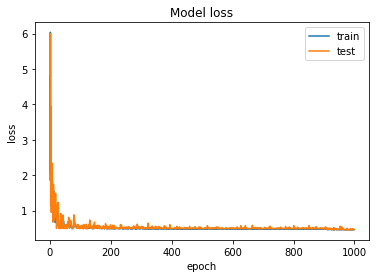

1.2903623436945113
1.135941170877485
DN- 11  layers; 300 Units; LR- 0.05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 5s 2ms/sample - loss: 4.9174 - mean_squared_error: 38.0947 - val_loss: 0.7149 - val_mean_squared_error: 2.0663
Epoch 2/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 4.2028 - mean_squared_error: 30.8640 - val_loss: 5.3694 - val_mean_squared_error: 35.6007
Epoch 3/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 5.4691 - mean_squared_error: 40.1831 - val_loss: 8.1459 - val_mean_squared_error: 75.9024
Epoch 4/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 6.0310 - mean_squared_error: 48.4732 - val_loss: 4.6635 - val_mean_squared_error: 27.8102
Epoch 5/1000
2562/2562 [==============================] - 1s 295us/sample - loss: 5.3490 - mean_squared_error: 37.4596 - val_loss: 7.2721 - val_mean_squared_error: 61.5566
Epoch 6

2562/2562 [==============================] - 1s 303us/sample - loss: 6.6280 - mean_squared_error: 54.6646 - val_loss: 7.7855 - val_mean_squared_error: 69.7993
Epoch 48/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 6.9003 - mean_squared_error: 58.6653 - val_loss: 6.7985 - val_mean_squared_error: 54.4178
Epoch 49/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 6.7100 - mean_squared_error: 55.6451 - val_loss: 6.6295 - val_mean_squared_error: 51.9803
Epoch 50/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 6.6624 - mean_squared_error: 55.1378 - val_loss: 7.9118 - val_mean_squared_error: 71.9094
Epoch 51/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 6.8413 - mean_squared_error: 58.5173 - val_loss: 5.8296 - val_mean_squared_error: 41.2137
Epoch 52/1000
2562/2562 [==============================] - 1s 296us/sample - loss: 6.4235 - mean_squared_error: 53.0527 - val_loss: 8.5335 - val_mean

2562/2562 [==============================] - 1s 306us/sample - loss: 6.3295 - mean_squared_error: 51.4204 - val_loss: 6.7896 - val_mean_squared_error: 54.2880
Epoch 95/1000
2562/2562 [==============================] - 1s 296us/sample - loss: 6.5713 - mean_squared_error: 54.4959 - val_loss: 7.4744 - val_mean_squared_error: 64.7412
Epoch 96/1000
2562/2562 [==============================] - 1s 293us/sample - loss: 6.7018 - mean_squared_error: 56.5342 - val_loss: 6.6616 - val_mean_squared_error: 52.4383
Epoch 97/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 6.5429 - mean_squared_error: 54.0717 - val_loss: 6.5732 - val_mean_squared_error: 51.1804
Epoch 98/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 6.4419 - mean_squared_error: 52.6021 - val_loss: 7.4251 - val_mean_squared_error: 63.9583
Epoch 99/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 6.7092 - mean_squared_error: 56.5578 - val_loss: 6.3321 - val_mean

2562/2562 [==============================] - 1s 302us/sample - loss: 6.3930 - mean_squared_error: 51.7533 - val_loss: 6.9212 - val_mean_squared_error: 56.2246
Epoch 142/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 6.3577 - mean_squared_error: 51.5851 - val_loss: 6.8542 - val_mean_squared_error: 55.2340
Epoch 143/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 6.4048 - mean_squared_error: 52.2264 - val_loss: 6.1239 - val_mean_squared_error: 45.0268
Epoch 144/1000
2562/2562 [==============================] - 1s 295us/sample - loss: 6.3045 - mean_squared_error: 50.8243 - val_loss: 6.3609 - val_mean_squared_error: 48.2229
Epoch 145/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 6.2304 - mean_squared_error: 50.8053 - val_loss: 8.3378 - val_mean_squared_error: 79.2572
Epoch 146/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 6.6464 - mean_squared_error: 58.0381 - val_loss: 6.1478 - val

2562/2562 [==============================] - 1s 297us/sample - loss: 6.1096 - mean_squared_error: 48.4821 - val_loss: 6.4193 - val_mean_squared_error: 49.0276
Epoch 189/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 6.1580 - mean_squared_error: 48.8473 - val_loss: 6.7470 - val_mean_squared_error: 53.6699
Epoch 190/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 6.2509 - mean_squared_error: 50.0878 - val_loss: 7.2550 - val_mean_squared_error: 61.2901
Epoch 191/1000
2562/2562 [==============================] - 1s 293us/sample - loss: 6.2832 - mean_squared_error: 51.4145 - val_loss: 5.6396 - val_mean_squared_error: 38.8448
Epoch 192/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 6.0347 - mean_squared_error: 47.4561 - val_loss: 6.5964 - val_mean_squared_error: 51.5088
Epoch 193/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 6.1483 - mean_squared_error: 48.6716 - val_loss: 6.6744 - val

2562/2562 [==============================] - 1s 310us/sample - loss: 5.8491 - mean_squared_error: 44.9272 - val_loss: 5.8633 - val_mean_squared_error: 41.6420
Epoch 236/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 5.8680 - mean_squared_error: 45.3171 - val_loss: 6.8655 - val_mean_squared_error: 55.4005
Epoch 237/1000
2562/2562 [==============================] - 1s 296us/sample - loss: 6.0486 - mean_squared_error: 47.7407 - val_loss: 5.7155 - val_mean_squared_error: 39.7829
Epoch 238/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 5.7757 - mean_squared_error: 44.0937 - val_loss: 6.4150 - val_mean_squared_error: 48.9673
Epoch 239/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 6.0088 - mean_squared_error: 46.8450 - val_loss: 6.6812 - val_mean_squared_error: 52.7195
Epoch 240/1000
2562/2562 [==============================] - 1s 295us/sample - loss: 5.9700 - mean_squared_error: 46.4541 - val_loss: 6.2791 - val

2562/2562 [==============================] - 1s 312us/sample - loss: 5.5289 - mean_squared_error: 40.8248 - val_loss: 6.2514 - val_mean_squared_error: 46.7320
Epoch 283/1000
2562/2562 [==============================] - 1s 289us/sample - loss: 5.5848 - mean_squared_error: 41.3543 - val_loss: 6.8190 - val_mean_squared_error: 54.7176
Epoch 284/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 5.6138 - mean_squared_error: 41.8593 - val_loss: 6.3719 - val_mean_squared_error: 48.3728
Epoch 285/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 5.6482 - mean_squared_error: 42.0320 - val_loss: 5.4751 - val_mean_squared_error: 36.8524
Epoch 286/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 5.5950 - mean_squared_error: 41.1152 - val_loss: 6.0445 - val_mean_squared_error: 43.9812
Epoch 287/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 5.5611 - mean_squared_error: 40.8653 - val_loss: 5.8311 - val

2562/2562 [==============================] - 1s 300us/sample - loss: 5.4346 - mean_squared_error: 39.0836 - val_loss: 5.9138 - val_mean_squared_error: 42.2873
Epoch 330/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 5.3476 - mean_squared_error: 37.9733 - val_loss: 6.2180 - val_mean_squared_error: 46.2818
Epoch 331/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 5.4303 - mean_squared_error: 39.3625 - val_loss: 4.7120 - val_mean_squared_error: 28.3149
Epoch 332/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 5.0911 - mean_squared_error: 35.0683 - val_loss: 5.4968 - val_mean_squared_error: 37.1116
Epoch 333/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 5.1376 - mean_squared_error: 35.4356 - val_loss: 5.2323 - val_mean_squared_error: 34.0097
Epoch 334/1000
2562/2562 [==============================] - 1s 295us/sample - loss: 5.0446 - mean_squared_error: 34.3836 - val_loss: 5.4817 - val

2562/2562 [==============================] - 1s 300us/sample - loss: 4.8663 - mean_squared_error: 31.2306 - val_loss: 5.0513 - val_mean_squared_error: 31.9670
Epoch 377/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 4.8948 - mean_squared_error: 31.5609 - val_loss: 5.2366 - val_mean_squared_error: 34.0593
Epoch 378/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 4.8925 - mean_squared_error: 31.5741 - val_loss: 5.2814 - val_mean_squared_error: 34.5744
Epoch 379/1000
2562/2562 [==============================] - 1s 293us/sample - loss: 4.8600 - mean_squared_error: 31.3686 - val_loss: 4.7547 - val_mean_squared_error: 28.7618
Epoch 380/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 4.8214 - mean_squared_error: 30.9624 - val_loss: 5.8323 - val_mean_squared_error: 41.2480
Epoch 381/1000
2562/2562 [==============================] - 1s 330us/sample - loss: 5.0793 - mean_squared_error: 33.8293 - val_loss: 4.8113 - val

2562/2562 [==============================] - 1s 317us/sample - loss: 4.7408 - mean_squared_error: 30.2094 - val_loss: 4.7522 - val_mean_squared_error: 28.7364
Epoch 424/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 4.6946 - mean_squared_error: 29.8850 - val_loss: 5.3570 - val_mean_squared_error: 35.4544
Epoch 425/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 4.7014 - mean_squared_error: 29.8253 - val_loss: 4.5166 - val_mean_squared_error: 26.3169
Epoch 426/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 4.5460 - mean_squared_error: 28.2211 - val_loss: 5.0736 - val_mean_squared_error: 32.2153
Epoch 427/1000
2562/2562 [==============================] - 1s 296us/sample - loss: 4.6744 - mean_squared_error: 29.5097 - val_loss: 4.8428 - val_mean_squared_error: 29.6961
Epoch 428/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 4.5952 - mean_squared_error: 28.7835 - val_loss: 5.0429 - val

2562/2562 [==============================] - 1s 305us/sample - loss: 4.5189 - mean_squared_error: 28.0650 - val_loss: 5.5721 - val_mean_squared_error: 38.0210
Epoch 471/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 4.6387 - mean_squared_error: 29.2926 - val_loss: 5.1773 - val_mean_squared_error: 33.3824
Epoch 472/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 4.6461 - mean_squared_error: 29.5171 - val_loss: 4.3558 - val_mean_squared_error: 24.7230
Epoch 473/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 4.4374 - mean_squared_error: 27.3587 - val_loss: 3.8105 - val_mean_squared_error: 19.7308
Epoch 474/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 4.1879 - mean_squared_error: 25.2902 - val_loss: 4.8565 - val_mean_squared_error: 29.8419
Epoch 475/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 4.5261 - mean_squared_error: 28.0953 - val_loss: 4.9018 - val

2562/2562 [==============================] - 1s 299us/sample - loss: 4.2819 - mean_squared_error: 29.3419 - val_loss: 3.9664 - val_mean_squared_error: 21.0988
Epoch 518/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 4.1794 - mean_squared_error: 27.7763 - val_loss: 5.6276 - val_mean_squared_error: 38.6974
Epoch 519/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 4.6452 - mean_squared_error: 29.4794 - val_loss: 5.4918 - val_mean_squared_error: 37.0515
Epoch 520/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 4.4979 - mean_squared_error: 27.8774 - val_loss: 6.1463 - val_mean_squared_error: 45.3231
Epoch 521/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 4.6218 - mean_squared_error: 29.4685 - val_loss: 4.9999 - val_mean_squared_error: 31.3988
Epoch 522/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 4.3441 - mean_squared_error: 26.0671 - val_loss: 4.5764 - val

2562/2562 [==============================] - 1s 313us/sample - loss: 4.1681 - mean_squared_error: 24.2501 - val_loss: 4.7022 - val_mean_squared_error: 28.2117
Epoch 565/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 4.2754 - mean_squared_error: 25.4380 - val_loss: 3.2935 - val_mean_squared_error: 15.5406
Epoch 566/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 3.9525 - mean_squared_error: 22.6767 - val_loss: 4.7549 - val_mean_squared_error: 28.7637
Epoch 567/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 4.2634 - mean_squared_error: 24.9390 - val_loss: 4.8499 - val_mean_squared_error: 29.7714
Epoch 568/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 4.2188 - mean_squared_error: 24.6862 - val_loss: 4.7066 - val_mean_squared_error: 28.2583
Epoch 569/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 4.2448 - mean_squared_error: 25.1383 - val_loss: 3.6883 - val

2562/2562 [==============================] - 1s 302us/sample - loss: 4.0701 - mean_squared_error: 23.4591 - val_loss: 4.5855 - val_mean_squared_error: 27.0129
Epoch 612/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 4.0719 - mean_squared_error: 23.2902 - val_loss: 4.2419 - val_mean_squared_error: 23.6280
Epoch 613/1000
2562/2562 [==============================] - 1s 336us/sample - loss: 4.0125 - mean_squared_error: 22.6946 - val_loss: 4.1014 - val_mean_squared_error: 22.3230
Epoch 614/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 4.0200 - mean_squared_error: 22.9455 - val_loss: 5.0334 - val_mean_squared_error: 31.7694
Epoch 615/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 4.1170 - mean_squared_error: 24.2078 - val_loss: 3.9885 - val_mean_squared_error: 21.2971
Epoch 616/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 3.9573 - mean_squared_error: 22.1488 - val_loss: 4.1971 - val

2562/2562 [==============================] - 1s 318us/sample - loss: 3.7761 - mean_squared_error: 20.6830 - val_loss: 4.5498 - val_mean_squared_error: 26.6477
Epoch 659/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 3.9634 - mean_squared_error: 22.0956 - val_loss: 3.9765 - val_mean_squared_error: 21.1892
Epoch 660/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 3.8271 - mean_squared_error: 21.0285 - val_loss: 4.5851 - val_mean_squared_error: 27.0059
Epoch 661/1000
2562/2562 [==============================] - 1s 295us/sample - loss: 3.9433 - mean_squared_error: 22.0459 - val_loss: 3.8360 - val_mean_squared_error: 19.9511
Epoch 662/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 3.7536 - mean_squared_error: 20.4157 - val_loss: 4.4209 - val_mean_squared_error: 25.3609
Epoch 663/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 3.9249 - mean_squared_error: 21.8377 - val_loss: 3.9491 - val

2562/2562 [==============================] - 1s 307us/sample - loss: 4.6349 - mean_squared_error: 28.8947 - val_loss: 5.0559 - val_mean_squared_error: 32.0187
Epoch 706/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 4.7414 - mean_squared_error: 29.8793 - val_loss: 3.9689 - val_mean_squared_error: 21.1213
Epoch 707/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 4.6367 - mean_squared_error: 28.8717 - val_loss: 4.5789 - val_mean_squared_error: 26.9427
Epoch 708/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 4.5665 - mean_squared_error: 27.8936 - val_loss: 4.4508 - val_mean_squared_error: 25.6605
Epoch 709/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 4.6195 - mean_squared_error: 28.5076 - val_loss: 4.5858 - val_mean_squared_error: 27.0130
Epoch 710/1000
2562/2562 [==============================] - 1s 293us/sample - loss: 4.6835 - mean_squared_error: 29.3310 - val_loss: 3.5794 - val

2562/2562 [==============================] - 1s 315us/sample - loss: 4.2510 - mean_squared_error: 24.9985 - val_loss: 3.5548 - val_mean_squared_error: 17.5916
Epoch 753/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 4.0359 - mean_squared_error: 23.4092 - val_loss: 4.5471 - val_mean_squared_error: 26.6210
Epoch 754/1000
2562/2562 [==============================] - 1s 291us/sample - loss: 4.2240 - mean_squared_error: 25.0596 - val_loss: 3.7166 - val_mean_squared_error: 18.9298
Epoch 755/1000
2562/2562 [==============================] - 1s 301us/sample - loss: 4.2139 - mean_squared_error: 24.8226 - val_loss: 3.8681 - val_mean_squared_error: 20.2100
Epoch 756/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 4.1483 - mean_squared_error: 24.1888 - val_loss: 3.3170 - val_mean_squared_error: 15.7195
Epoch 757/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 4.0545 - mean_squared_error: 23.7647 - val_loss: 4.2165 - val

2562/2562 [==============================] - 1s 300us/sample - loss: 4.0174 - mean_squared_error: 23.0106 - val_loss: 4.3698 - val_mean_squared_error: 24.8595
Epoch 800/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 4.0310 - mean_squared_error: 23.1957 - val_loss: 3.6329 - val_mean_squared_error: 18.2310
Epoch 801/1000
2562/2562 [==============================] - 1s 292us/sample - loss: 4.0110 - mean_squared_error: 22.8285 - val_loss: 3.7367 - val_mean_squared_error: 19.0724
Epoch 802/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 4.0693 - mean_squared_error: 23.4000 - val_loss: 3.4186 - val_mean_squared_error: 16.5060
Epoch 803/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 3.9325 - mean_squared_error: 22.3240 - val_loss: 4.2601 - val_mean_squared_error: 23.8012
Epoch 804/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 4.0922 - mean_squared_error: 23.6544 - val_loss: 3.5697 - val

2562/2562 [==============================] - 1s 298us/sample - loss: 4.1818 - mean_squared_error: 24.7516 - val_loss: 2.4658 - val_mean_squared_error: 9.9441
Epoch 847/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 3.9407 - mean_squared_error: 22.5785 - val_loss: 3.4241 - val_mean_squared_error: 16.5011
Epoch 848/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 3.8567 - mean_squared_error: 21.5147 - val_loss: 3.9212 - val_mean_squared_error: 20.6975
Epoch 849/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 3.8500 - mean_squared_error: 21.2986 - val_loss: 4.3509 - val_mean_squared_error: 24.6754
Epoch 850/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 4.0167 - mean_squared_error: 22.6342 - val_loss: 3.5847 - val_mean_squared_error: 17.8349
Epoch 851/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 3.9055 - mean_squared_error: 21.7445 - val_loss: 4.1950 - val_

2562/2562 [==============================] - 1s 302us/sample - loss: 19.7833 - mean_squared_error: 500.2638 - val_loss: 34.9492 - val_mean_squared_error: 1257.7957
Epoch 894/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 25.0924 - mean_squared_error: 728.7150 - val_loss: 6.7960 - val_mean_squared_error: 54.3821
Epoch 895/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 22.6819 - mean_squared_error: 662.9032 - val_loss: 28.2267 - val_mean_squared_error: 826.3724
Epoch 896/1000
2562/2562 [==============================] - 1s 296us/sample - loss: 24.1148 - mean_squared_error: 702.6550 - val_loss: 14.2112 - val_mean_squared_error: 217.5710
Epoch 897/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 18.3419 - mean_squared_error: 420.6033 - val_loss: 35.4148 - val_mean_squared_error: 1291.0261
Epoch 898/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 25.7140 - mean_squared_error: 767.0182 - 

2562/2562 [==============================] - 1s 341us/sample - loss: 19.9795 - mean_squared_error: 503.9104 - val_loss: 33.1892 - val_mean_squared_error: 1136.1156
Epoch 940/1000
2562/2562 [==============================] - 1s 294us/sample - loss: 24.8359 - mean_squared_error: 724.2949 - val_loss: 9.3302 - val_mean_squared_error: 97.7840
Epoch 941/1000
2562/2562 [==============================] - 1s 296us/sample - loss: 21.4672 - mean_squared_error: 587.4890 - val_loss: 30.4493 - val_mean_squared_error: 959.0104
Epoch 942/1000
2562/2562 [==============================] - 1s 296us/sample - loss: 24.5274 - mean_squared_error: 714.2322 - val_loss: 11.5060 - val_mean_squared_error: 145.2943
Epoch 943/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 20.7779 - mean_squared_error: 540.7535 - val_loss: 31.3288 - val_mean_squared_error: 1014.2208
Epoch 944/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 24.7568 - mean_squared_error: 725.7874 - 

2562/2562 [==============================] - 1s 323us/sample - loss: 20.0057 - mean_squared_error: 516.1742 - val_loss: 32.7259 - val_mean_squared_error: 1105.1083
Epoch 986/1000
2562/2562 [==============================] - 1s 300us/sample - loss: 25.2755 - mean_squared_error: 754.5385 - val_loss: 11.7475 - val_mean_squared_error: 151.1513
Epoch 987/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 19.5539 - mean_squared_error: 493.5573 - val_loss: 33.5361 - val_mean_squared_error: 1159.6086
Epoch 988/1000
2562/2562 [==============================] - 1s 298us/sample - loss: 25.1766 - mean_squared_error: 750.5048 - val_loss: 10.8220 - val_mean_squared_error: 129.3374
Epoch 989/1000
2562/2562 [==============================] - 1s 297us/sample - loss: 20.1082 - mean_squared_error: 519.4957 - val_loss: 32.4574 - val_mean_squared_error: 1087.3417
Epoch 990/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 24.9589 - mean_squared_error: 734.0685

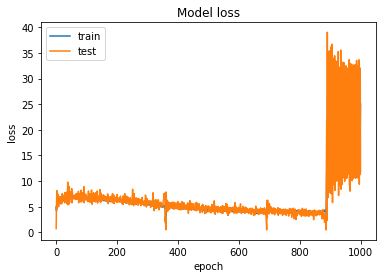

153.76342437882275
12.400138079022456
DN- 11  layers; 300 Units; LR- 2e-05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 5s 2ms/sample - loss: 5.9359 - mean_squared_error: 42.1960 - val_loss: 5.9255 - val_mean_squared_error: 42.0055
Epoch 2/1000
2562/2562 [==============================] - 1s 343us/sample - loss: 5.8809 - mean_squared_error: 41.4710 - val_loss: 5.8171 - val_mean_squared_error: 40.6360
Epoch 3/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 5.7903 - mean_squared_error: 40.3465 - val_loss: 5.6860 - val_mean_squared_error: 39.0085
Epoch 4/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 5.6932 - mean_squared_error: 39.1629 - val_loss: 5.5407 - val_mean_squared_error: 37.2432
Epoch 5/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 5.5755 - mean_squared_error: 37.6937 - val_loss: 5.3873 - val_mean_squared_error: 35.4269


Epoch 48/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.5587 - mean_squared_error: 1.3550 - val_loss: 0.8124 - val_mean_squared_error: 2.2782
Epoch 49/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5627 - mean_squared_error: 1.3675 - val_loss: 0.8286 - val_mean_squared_error: 2.3350
Epoch 50/1000
2562/2562 [==============================] - 1s 336us/sample - loss: 0.5649 - mean_squared_error: 1.3708 - val_loss: 0.8409 - val_mean_squared_error: 2.3781
Epoch 51/1000
2562/2562 [==============================] - 1s 341us/sample - loss: 0.5583 - mean_squared_error: 1.3474 - val_loss: 0.8503 - val_mean_squared_error: 2.4113
Epoch 52/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5628 - mean_squared_error: 1.3559 - val_loss: 0.8571 - val_mean_squared_error: 2.4352
Epoch 53/1000
2562/2562 [==============================] - 1s 348us/sample - loss: 0.5532 - mean_squared_error: 1.3390 - val_loss: 0.8608 - val_m

Epoch 96/1000
2562/2562 [==============================] - 1s 338us/sample - loss: 0.5515 - mean_squared_error: 1.3487 - val_loss: 0.8627 - val_mean_squared_error: 2.4543
Epoch 97/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.5452 - mean_squared_error: 1.3150 - val_loss: 0.8611 - val_mean_squared_error: 2.4487
Epoch 98/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5451 - mean_squared_error: 1.3160 - val_loss: 0.8600 - val_mean_squared_error: 2.4447
Epoch 99/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5489 - mean_squared_error: 1.3321 - val_loss: 0.8588 - val_mean_squared_error: 2.4407
Epoch 100/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5496 - mean_squared_error: 1.3257 - val_loss: 0.8586 - val_mean_squared_error: 2.4398
Epoch 101/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5544 - mean_squared_error: 1.3354 - val_loss: 0.8588 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 336us/sample - loss: 0.5413 - mean_squared_error: 1.3048 - val_loss: 0.8454 - val_mean_squared_error: 2.3929
Epoch 145/1000
2562/2562 [==============================] - 1s 330us/sample - loss: 0.5420 - mean_squared_error: 1.3031 - val_loss: 0.8437 - val_mean_squared_error: 2.3871
Epoch 146/1000
2562/2562 [==============================] - 1s 337us/sample - loss: 0.5300 - mean_squared_error: 1.2655 - val_loss: 0.8418 - val_mean_squared_error: 2.3804
Epoch 147/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.5521 - mean_squared_error: 1.3217 - val_loss: 0.8396 - val_mean_squared_error: 2.3729
Epoch 148/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5414 - mean_squared_error: 1.3127 - val_loss: 0.8374 - val_mean_squared_error: 2.3654
Epoch 149/1000
2562/2562 [==============================] - 1s 336us/sample - loss: 0.5464 - mean_squared_error: 1.3247 - val_loss: 0.8355 -

2562/2562 [==============================] - 1s 324us/sample - loss: 0.5430 - mean_squared_error: 1.3196 - val_loss: 0.8191 - val_mean_squared_error: 2.3014
Epoch 192/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5446 - mean_squared_error: 1.3265 - val_loss: 0.8191 - val_mean_squared_error: 2.3014
Epoch 193/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5352 - mean_squared_error: 1.2821 - val_loss: 0.8178 - val_mean_squared_error: 2.2971
Epoch 194/1000
2562/2562 [==============================] - 1s 360us/sample - loss: 0.5459 - mean_squared_error: 1.3212 - val_loss: 0.8159 - val_mean_squared_error: 2.2905
Epoch 195/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5472 - mean_squared_error: 1.3260 - val_loss: 0.8143 - val_mean_squared_error: 2.2849
Epoch 196/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5374 - mean_squared_error: 1.2908 - val_loss: 0.8125 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5433 - mean_squared_error: 1.3148 - val_loss: 0.8072 - val_mean_squared_error: 2.2604
Epoch 240/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5198 - mean_squared_error: 1.2503 - val_loss: 0.8065 - val_mean_squared_error: 2.2577
Epoch 241/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5422 - mean_squared_error: 1.3012 - val_loss: 0.8063 - val_mean_squared_error: 2.2570
Epoch 242/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.5341 - mean_squared_error: 1.2798 - val_loss: 0.8062 - val_mean_squared_error: 2.2569
Epoch 243/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5362 - mean_squared_error: 1.2872 - val_loss: 0.8067 - val_mean_squared_error: 2.2585
Epoch 244/1000
2562/2562 [==============================] - 1s 339us/sample - loss: 0.5242 - mean_squared_error: 1.2499 - val_loss: 0.8072 -

2562/2562 [==============================] - 1s 331us/sample - loss: 0.5321 - mean_squared_error: 1.2762 - val_loss: 0.7763 - val_mean_squared_error: 2.1549
Epoch 287/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5340 - mean_squared_error: 1.2739 - val_loss: 0.7759 - val_mean_squared_error: 2.1534
Epoch 288/1000
2562/2562 [==============================] - 1s 330us/sample - loss: 0.5216 - mean_squared_error: 1.2422 - val_loss: 0.7756 - val_mean_squared_error: 2.1527
Epoch 289/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5367 - mean_squared_error: 1.2939 - val_loss: 0.7766 - val_mean_squared_error: 2.1560
Epoch 290/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5189 - mean_squared_error: 1.2402 - val_loss: 0.7770 - val_mean_squared_error: 2.1573
Epoch 291/1000
2562/2562 [==============================] - ETA: 0s - loss: 0.5290 - mean_squared_error: 1.26 - 1s 324us/sample - loss: 0.5323 - mean_squar

2562/2562 [==============================] - 1s 327us/sample - loss: 0.5207 - mean_squared_error: 1.2463 - val_loss: 0.7741 - val_mean_squared_error: 2.1474
Epoch 334/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5380 - mean_squared_error: 1.2841 - val_loss: 0.7753 - val_mean_squared_error: 2.1513
Epoch 335/1000
2562/2562 [==============================] - 1s 347us/sample - loss: 0.5294 - mean_squared_error: 1.2653 - val_loss: 0.7754 - val_mean_squared_error: 2.1516
Epoch 336/1000
2562/2562 [==============================] - 1s 338us/sample - loss: 0.5306 - mean_squared_error: 1.2761 - val_loss: 0.7740 - val_mean_squared_error: 2.1469
Epoch 337/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5255 - mean_squared_error: 1.2527 - val_loss: 0.7711 - val_mean_squared_error: 2.1374
Epoch 338/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5319 - mean_squared_error: 1.2759 - val_loss: 0.7690 - val_mean_squar

Epoch 381/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5238 - mean_squared_error: 1.2510 - val_loss: 0.7611 - val_mean_squared_error: 2.1035
Epoch 382/1000
2562/2562 [==============================] - 1s 335us/sample - loss: 0.5339 - mean_squared_error: 1.2735 - val_loss: 0.7614 - val_mean_squared_error: 2.1044
Epoch 383/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.5372 - mean_squared_error: 1.2860 - val_loss: 0.7616 - val_mean_squared_error: 2.1051
Epoch 384/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.5274 - mean_squared_error: 1.2591 - val_loss: 0.7610 - val_mean_squared_error: 2.1030
Epoch 385/1000
2562/2562 [==============================] - 1s 345us/sample - loss: 0.5329 - mean_squared_error: 1.2808 - val_loss: 0.7607 - val_mean_squared_error: 2.1019
Epoch 386/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5272 - mean_squared_error: 1.2587 - val_loss: 0.7602 -

2562/2562 [==============================] - 1s 334us/sample - loss: 0.5335 - mean_squared_error: 1.2761 - val_loss: 0.7514 - val_mean_squared_error: 2.0708
Epoch 429/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5368 - mean_squared_error: 1.2896 - val_loss: 0.7520 - val_mean_squared_error: 2.0727
Epoch 430/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5278 - mean_squared_error: 1.2673 - val_loss: 0.7527 - val_mean_squared_error: 2.0750
Epoch 431/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5226 - mean_squared_error: 1.2456 - val_loss: 0.7524 - val_mean_squared_error: 2.0740
Epoch 432/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 0.5186 - mean_squared_error: 1.2367 - val_loss: 0.7516 - val_mean_squared_error: 2.0715
Epoch 433/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5271 - mean_squared_error: 1.2676 - val_loss: 0.7513 - val_mean_squar

Epoch 476/1000
2562/2562 [==============================] - 1s 338us/sample - loss: 0.5359 - mean_squared_error: 1.2819 - val_loss: 0.7481 - val_mean_squared_error: 2.0597
Epoch 477/1000
2562/2562 [==============================] - 1s 370us/sample - loss: 0.5209 - mean_squared_error: 1.2449 - val_loss: 0.7470 - val_mean_squared_error: 2.0557
Epoch 478/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5301 - mean_squared_error: 1.2606 - val_loss: 0.7459 - val_mean_squared_error: 2.0523
Epoch 479/1000
2562/2562 [==============================] - 1s 335us/sample - loss: 0.5334 - mean_squared_error: 1.2835 - val_loss: 0.7462 - val_mean_squared_error: 2.0532
Epoch 480/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5258 - mean_squared_error: 1.2493 - val_loss: 0.7475 - val_mean_squared_error: 2.0574
Epoch 481/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 0.5321 - mean_squared_error: 1.2842 - val_loss: 0.7477 -

2562/2562 [==============================] - 1s 337us/sample - loss: 0.5333 - mean_squared_error: 1.2722 - val_loss: 0.7362 - val_mean_squared_error: 2.0196
Epoch 524/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 0.5172 - mean_squared_error: 1.2221 - val_loss: 0.7376 - val_mean_squared_error: 2.0242
Epoch 525/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5371 - mean_squared_error: 1.2959 - val_loss: 0.7372 - val_mean_squared_error: 2.0230
Epoch 526/1000
2562/2562 [==============================] - 1s 338us/sample - loss: 0.5339 - mean_squared_error: 1.2901 - val_loss: 0.7377 - val_mean_squared_error: 2.0248
Epoch 527/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5277 - mean_squared_error: 1.2619 - val_loss: 0.7382 - val_mean_squared_error: 2.0265
Epoch 528/1000
2562/2562 [==============================] - 1s 337us/sample - loss: 0.5145 - mean_squared_error: 1.2329 - val_loss: 0.7381 - val_mean_squar

Epoch 571/1000
2562/2562 [==============================] - 1s 336us/sample - loss: 0.5235 - mean_squared_error: 1.2477 - val_loss: 0.7305 - val_mean_squared_error: 2.0005
Epoch 572/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5231 - mean_squared_error: 1.2452 - val_loss: 0.7287 - val_mean_squared_error: 1.9945
Epoch 573/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.5258 - mean_squared_error: 1.2607 - val_loss: 0.7279 - val_mean_squared_error: 1.9919
Epoch 574/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.5257 - mean_squared_error: 1.2430 - val_loss: 0.7277 - val_mean_squared_error: 1.9913
Epoch 575/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5198 - mean_squared_error: 1.2369 - val_loss: 0.7269 - val_mean_squared_error: 1.9887
Epoch 576/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5294 - mean_squared_error: 1.2722 - val_loss: 0.7270 -

2562/2562 [==============================] - 1s 360us/sample - loss: 0.5258 - mean_squared_error: 1.2621 - val_loss: 0.7273 - val_mean_squared_error: 1.9900
Epoch 619/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.5211 - mean_squared_error: 1.2492 - val_loss: 0.7270 - val_mean_squared_error: 1.9889
Epoch 620/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5240 - mean_squared_error: 1.2471 - val_loss: 0.7271 - val_mean_squared_error: 1.9892
Epoch 621/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5218 - mean_squared_error: 1.2488 - val_loss: 0.7275 - val_mean_squared_error: 1.9907
Epoch 622/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5263 - mean_squared_error: 1.2531 - val_loss: 0.7282 - val_mean_squared_error: 1.9928
Epoch 623/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5292 - mean_squared_error: 1.2722 - val_loss: 0.7287 - val_mean_squar

Epoch 666/1000
2562/2562 [==============================] - 1s 337us/sample - loss: 0.5203 - mean_squared_error: 1.2323 - val_loss: 0.7133 - val_mean_squared_error: 1.9434
Epoch 667/1000
2562/2562 [==============================] - 1s 332us/sample - loss: 0.5199 - mean_squared_error: 1.2373 - val_loss: 0.7126 - val_mean_squared_error: 1.9408
Epoch 668/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5192 - mean_squared_error: 1.2420 - val_loss: 0.7119 - val_mean_squared_error: 1.9385
Epoch 669/1000
2562/2562 [==============================] - 1s 345us/sample - loss: 0.5193 - mean_squared_error: 1.2430 - val_loss: 0.7112 - val_mean_squared_error: 1.9361
Epoch 670/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.5219 - mean_squared_error: 1.2492 - val_loss: 0.7113 - val_mean_squared_error: 1.9364
Epoch 671/1000
2562/2562 [==============================] - 1s 338us/sample - loss: 0.5220 - mean_squared_error: 1.2560 - val_loss: 0.7113 -

2562/2562 [==============================] - 1s 331us/sample - loss: 0.5164 - mean_squared_error: 1.2271 - val_loss: 0.7103 - val_mean_squared_error: 1.9334
Epoch 714/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5174 - mean_squared_error: 1.2298 - val_loss: 0.7091 - val_mean_squared_error: 1.9292
Epoch 715/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5184 - mean_squared_error: 1.2396 - val_loss: 0.7088 - val_mean_squared_error: 1.9284
Epoch 716/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5259 - mean_squared_error: 1.2607 - val_loss: 0.7079 - val_mean_squared_error: 1.9254
Epoch 717/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5170 - mean_squared_error: 1.2280 - val_loss: 0.7077 - val_mean_squared_error: 1.9246
Epoch 718/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 0.5112 - mean_squared_error: 1.2090 - val_loss: 0.7086 - val_mean_squar

Epoch 761/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5184 - mean_squared_error: 1.2360 - val_loss: 0.7044 - val_mean_squared_error: 1.9137
Epoch 762/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5077 - mean_squared_error: 1.2040 - val_loss: 0.7055 - val_mean_squared_error: 1.9172
Epoch 763/1000
2562/2562 [==============================] - 1s 342us/sample - loss: 0.5171 - mean_squared_error: 1.2260 - val_loss: 0.7064 - val_mean_squared_error: 1.9203
Epoch 764/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5190 - mean_squared_error: 1.2375 - val_loss: 0.7064 - val_mean_squared_error: 1.9204
Epoch 765/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5213 - mean_squared_error: 1.2499 - val_loss: 0.7062 - val_mean_squared_error: 1.9195
Epoch 766/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5251 - mean_squared_error: 1.2552 - val_loss: 0.7061 -

2562/2562 [==============================] - 1s 332us/sample - loss: 0.5216 - mean_squared_error: 1.2500 - val_loss: 0.6982 - val_mean_squared_error: 1.8929
Epoch 809/1000
2562/2562 [==============================] - 1s 335us/sample - loss: 0.5227 - mean_squared_error: 1.2432 - val_loss: 0.6990 - val_mean_squared_error: 1.8956
Epoch 810/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5270 - mean_squared_error: 1.2693 - val_loss: 0.6981 - val_mean_squared_error: 1.8926
Epoch 811/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.5238 - mean_squared_error: 1.2468 - val_loss: 0.6968 - val_mean_squared_error: 1.8885
Epoch 812/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5238 - mean_squared_error: 1.2505 - val_loss: 0.6957 - val_mean_squared_error: 1.8848
Epoch 813/1000
2562/2562 [==============================] - 1s 336us/sample - loss: 0.5062 - mean_squared_error: 1.2003 - val_loss: 0.6954 - val_mean_squar

Epoch 856/1000
2562/2562 [==============================] - 1s 345us/sample - loss: 0.5213 - mean_squared_error: 1.2446 - val_loss: 0.6964 - val_mean_squared_error: 1.8872
Epoch 857/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5182 - mean_squared_error: 1.2329 - val_loss: 0.6963 - val_mean_squared_error: 1.8869
Epoch 858/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5101 - mean_squared_error: 1.2207 - val_loss: 0.6963 - val_mean_squared_error: 1.8866
Epoch 859/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5134 - mean_squared_error: 1.2179 - val_loss: 0.6948 - val_mean_squared_error: 1.8818
Epoch 860/1000
2562/2562 [==============================] - 1s 330us/sample - loss: 0.5237 - mean_squared_error: 1.2582 - val_loss: 0.6953 - val_mean_squared_error: 1.8833
Epoch 861/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 0.5138 - mean_squared_error: 1.2338 - val_loss: 0.6956 -

2562/2562 [==============================] - 1s 336us/sample - loss: 0.5160 - mean_squared_error: 1.2254 - val_loss: 0.6903 - val_mean_squared_error: 1.8667
Epoch 904/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5176 - mean_squared_error: 1.2431 - val_loss: 0.6904 - val_mean_squared_error: 1.8672
Epoch 905/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5069 - mean_squared_error: 1.2061 - val_loss: 0.6903 - val_mean_squared_error: 1.8669
Epoch 906/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5116 - mean_squared_error: 1.2234 - val_loss: 0.6916 - val_mean_squared_error: 1.8711
Epoch 907/1000
2562/2562 [==============================] - 1s 329us/sample - loss: 0.5139 - mean_squared_error: 1.2264 - val_loss: 0.6924 - val_mean_squared_error: 1.8737
Epoch 908/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5126 - mean_squared_error: 1.2243 - val_loss: 0.6932 - val_mean_squar

Epoch 951/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5189 - mean_squared_error: 1.2318 - val_loss: 0.6799 - val_mean_squared_error: 1.8324
Epoch 952/1000
2562/2562 [==============================] - 1s 333us/sample - loss: 0.5203 - mean_squared_error: 1.2479 - val_loss: 0.6793 - val_mean_squared_error: 1.8305
Epoch 953/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.5178 - mean_squared_error: 1.2248 - val_loss: 0.6792 - val_mean_squared_error: 1.8301
Epoch 954/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.5195 - mean_squared_error: 1.2406 - val_loss: 0.6792 - val_mean_squared_error: 1.8300
Epoch 955/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.5102 - mean_squared_error: 1.2150 - val_loss: 0.6795 - val_mean_squared_error: 1.8310
Epoch 956/1000
2562/2562 [==============================] - 1s 326us/sample - loss: 0.5075 - mean_squared_error: 1.2077 - val_loss: 0.6805 -

2562/2562 [==============================] - 1s 333us/sample - loss: 0.5180 - mean_squared_error: 1.2327 - val_loss: 0.6830 - val_mean_squared_error: 1.8426
Epoch 999/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.5154 - mean_squared_error: 1.2299 - val_loss: 0.6841 - val_mean_squared_error: 1.8461
Epoch 1000/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5251 - mean_squared_error: 1.2568 - val_loss: 0.6852 - val_mean_squared_error: 1.8499


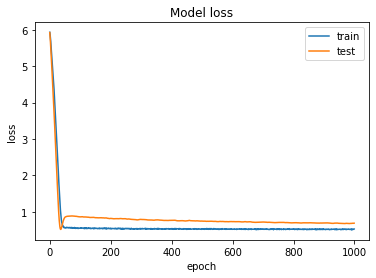

2.065759877347415
1.437275157145428
DN- 11  layers; 300 Units; LR- 2e-05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 5s 2ms/sample - loss: 5.8646 - mean_squared_error: 41.8167 - val_loss: 5.7538 - val_mean_squared_error: 40.3991
Epoch 2/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 5.7855 - mean_squared_error: 40.8067 - val_loss: 5.6078 - val_mean_squared_error: 38.6005
Epoch 3/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 5.6724 - mean_squared_error: 39.4473 - val_loss: 5.4187 - val_mean_squared_error: 36.3369
Epoch 4/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 5.5298 - mean_squared_error: 37.6572 - val_loss: 5.2078 - val_mean_squared_error: 33.8967
Epoch 5/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 5.3805 - mean_squared_error: 35.9181 - val_loss: 4.9863 - val_mean_squared_error: 31.4318
Epoch 

Epoch 48/1000
2562/2562 [==============================] - 1s 322us/sample - loss: 0.5509 - mean_squared_error: 1.4379 - val_loss: 0.9605 - val_mean_squared_error: 2.9462
Epoch 49/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.5609 - mean_squared_error: 1.4790 - val_loss: 0.9626 - val_mean_squared_error: 2.9536
Epoch 50/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.5538 - mean_squared_error: 1.4615 - val_loss: 0.9627 - val_mean_squared_error: 2.9538
Epoch 51/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.5571 - mean_squared_error: 1.4550 - val_loss: 0.9631 - val_mean_squared_error: 2.9547
Epoch 52/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.5503 - mean_squared_error: 1.4488 - val_loss: 0.9623 - val_mean_squared_error: 2.9518
Epoch 53/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 0.5596 - mean_squared_error: 1.4764 - val_loss: 0.9619 - val_m

Epoch 96/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.5250 - mean_squared_error: 1.3588 - val_loss: 0.9026 - val_mean_squared_error: 2.7256
Epoch 97/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.5237 - mean_squared_error: 1.3730 - val_loss: 0.9019 - val_mean_squared_error: 2.7231
Epoch 98/1000
2562/2562 [==============================] - 1s 299us/sample - loss: 0.5309 - mean_squared_error: 1.3929 - val_loss: 0.9000 - val_mean_squared_error: 2.7162
Epoch 99/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.5251 - mean_squared_error: 1.3594 - val_loss: 0.8986 - val_mean_squared_error: 2.7107
Epoch 100/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 0.5373 - mean_squared_error: 1.4047 - val_loss: 0.8978 - val_mean_squared_error: 2.7077
Epoch 101/1000
2562/2562 [==============================] - 1s 340us/sample - loss: 0.5290 - mean_squared_error: 1.3758 - val_loss: 0.8968 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.5326 - mean_squared_error: 1.3810 - val_loss: 0.8520 - val_mean_squared_error: 2.5407
Epoch 145/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.5127 - mean_squared_error: 1.3272 - val_loss: 0.8529 - val_mean_squared_error: 2.5438
Epoch 146/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.5180 - mean_squared_error: 1.3399 - val_loss: 0.8518 - val_mean_squared_error: 2.5399
Epoch 147/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.5311 - mean_squared_error: 1.3825 - val_loss: 0.8526 - val_mean_squared_error: 2.5426
Epoch 148/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.5147 - mean_squared_error: 1.3332 - val_loss: 0.8523 - val_mean_squared_error: 2.5417
Epoch 149/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.5210 - mean_squared_error: 1.3497 - val_loss: 0.8517 -

2562/2562 [==============================] - 1s 315us/sample - loss: 0.5041 - mean_squared_error: 1.3032 - val_loss: 0.8301 - val_mean_squared_error: 2.4613
Epoch 192/1000
2562/2562 [==============================] - 1s 331us/sample - loss: 0.5168 - mean_squared_error: 1.3428 - val_loss: 0.8297 - val_mean_squared_error: 2.4598
Epoch 193/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.5061 - mean_squared_error: 1.3041 - val_loss: 0.8290 - val_mean_squared_error: 2.4573
Epoch 194/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.5083 - mean_squared_error: 1.3234 - val_loss: 0.8295 - val_mean_squared_error: 2.4589
Epoch 195/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.5150 - mean_squared_error: 1.3332 - val_loss: 0.8300 - val_mean_squared_error: 2.4607
Epoch 196/1000
2562/2562 [==============================] - 1s 321us/sample - loss: 0.5099 - mean_squared_error: 1.3193 - val_loss: 0.8319 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4988 - mean_squared_error: 1.2894 - val_loss: 0.8056 - val_mean_squared_error: 2.3745
Epoch 240/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.5016 - mean_squared_error: 1.2876 - val_loss: 0.8049 - val_mean_squared_error: 2.3723
Epoch 241/1000
2562/2562 [==============================] - 1s 303us/sample - loss: 0.5110 - mean_squared_error: 1.3268 - val_loss: 0.8056 - val_mean_squared_error: 2.3745
Epoch 242/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.5014 - mean_squared_error: 1.2893 - val_loss: 0.8036 - val_mean_squared_error: 2.3676
Epoch 243/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.5010 - mean_squared_error: 1.2937 - val_loss: 0.8006 - val_mean_squared_error: 2.3575
Epoch 244/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 0.5026 - mean_squared_error: 1.2850 - val_loss: 0.7972 -

2562/2562 [==============================] - 1s 309us/sample - loss: 0.5048 - mean_squared_error: 1.3035 - val_loss: 0.7914 - val_mean_squared_error: 2.3247
Epoch 287/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.5019 - mean_squared_error: 1.2909 - val_loss: 0.7911 - val_mean_squared_error: 2.3236
Epoch 288/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.5036 - mean_squared_error: 1.2892 - val_loss: 0.7923 - val_mean_squared_error: 2.3277
Epoch 289/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.5007 - mean_squared_error: 1.2856 - val_loss: 0.7917 - val_mean_squared_error: 2.3256
Epoch 290/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4995 - mean_squared_error: 1.2723 - val_loss: 0.7910 - val_mean_squared_error: 2.3233
Epoch 291/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.5069 - mean_squared_error: 1.3051 - val_loss: 0.7894 - val_mean_squar

Epoch 334/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.5008 - mean_squared_error: 1.2927 - val_loss: 0.7633 - val_mean_squared_error: 2.2283
Epoch 335/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.5042 - mean_squared_error: 1.2880 - val_loss: 0.7636 - val_mean_squared_error: 2.2293
Epoch 336/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.5012 - mean_squared_error: 1.2876 - val_loss: 0.7633 - val_mean_squared_error: 2.2281
Epoch 337/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.4924 - mean_squared_error: 1.2538 - val_loss: 0.7649 - val_mean_squared_error: 2.2336
Epoch 338/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.5129 - mean_squared_error: 1.3242 - val_loss: 0.7653 - val_mean_squared_error: 2.2350
Epoch 339/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.4868 - mean_squared_error: 1.2506 - val_loss: 0.7667 -

2562/2562 [==============================] - 1s 325us/sample - loss: 0.4968 - mean_squared_error: 1.2885 - val_loss: 0.7496 - val_mean_squared_error: 2.1812
Epoch 382/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4997 - mean_squared_error: 1.2798 - val_loss: 0.7507 - val_mean_squared_error: 2.1850
Epoch 383/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.4914 - mean_squared_error: 1.2603 - val_loss: 0.7517 - val_mean_squared_error: 2.1882
Epoch 384/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.4981 - mean_squared_error: 1.2738 - val_loss: 0.7516 - val_mean_squared_error: 2.1879
Epoch 385/1000
2562/2562 [==============================] - 1s 325us/sample - loss: 0.5072 - mean_squared_error: 1.3186 - val_loss: 0.7506 - val_mean_squared_error: 2.1847
Epoch 386/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4920 - mean_squared_error: 1.2524 - val_loss: 0.7511 - val_mean_squar

Epoch 429/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4813 - mean_squared_error: 1.2255 - val_loss: 0.7313 - val_mean_squared_error: 2.1192
Epoch 430/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4978 - mean_squared_error: 1.2755 - val_loss: 0.7336 - val_mean_squared_error: 2.1270
Epoch 431/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.4964 - mean_squared_error: 1.2739 - val_loss: 0.7362 - val_mean_squared_error: 2.1356
Epoch 432/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4985 - mean_squared_error: 1.2749 - val_loss: 0.7373 - val_mean_squared_error: 2.1394
Epoch 433/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.4905 - mean_squared_error: 1.2599 - val_loss: 0.7372 - val_mean_squared_error: 2.1391
Epoch 434/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4892 - mean_squared_error: 1.2432 - val_loss: 0.7365 -

2562/2562 [==============================] - 1s 324us/sample - loss: 0.4968 - mean_squared_error: 1.2751 - val_loss: 0.7323 - val_mean_squared_error: 2.1221
Epoch 477/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4935 - mean_squared_error: 1.2636 - val_loss: 0.7335 - val_mean_squared_error: 2.1263
Epoch 478/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.4974 - mean_squared_error: 1.2611 - val_loss: 0.7331 - val_mean_squared_error: 2.1249
Epoch 479/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4945 - mean_squared_error: 1.2570 - val_loss: 0.7329 - val_mean_squared_error: 2.1242
Epoch 480/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4964 - mean_squared_error: 1.2671 - val_loss: 0.7327 - val_mean_squared_error: 2.1236
Epoch 481/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.4929 - mean_squared_error: 1.2544 - val_loss: 0.7330 - val_mean_squar

Epoch 524/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.4905 - mean_squared_error: 1.2576 - val_loss: 0.7144 - val_mean_squared_error: 2.0619
Epoch 525/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4960 - mean_squared_error: 1.2746 - val_loss: 0.7145 - val_mean_squared_error: 2.0623
Epoch 526/1000
2562/2562 [==============================] - 1s 323us/sample - loss: 0.4883 - mean_squared_error: 1.2462 - val_loss: 0.7146 - val_mean_squared_error: 2.0626
Epoch 527/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4943 - mean_squared_error: 1.2624 - val_loss: 0.7132 - val_mean_squared_error: 2.0581
Epoch 528/1000
2562/2562 [==============================] - 1s 305us/sample - loss: 0.4873 - mean_squared_error: 1.2430 - val_loss: 0.7113 - val_mean_squared_error: 2.0516
Epoch 529/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.5029 - mean_squared_error: 1.2883 - val_loss: 0.7115 -

2562/2562 [==============================] - 1s 313us/sample - loss: 0.4938 - mean_squared_error: 1.2620 - val_loss: 0.7040 - val_mean_squared_error: 2.0270
Epoch 572/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4837 - mean_squared_error: 1.2265 - val_loss: 0.7043 - val_mean_squared_error: 2.0281
Epoch 573/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4881 - mean_squared_error: 1.2501 - val_loss: 0.7035 - val_mean_squared_error: 2.0254
Epoch 574/1000
2562/2562 [==============================] - 1s 315us/sample - loss: 0.4882 - mean_squared_error: 1.2370 - val_loss: 0.7030 - val_mean_squared_error: 2.0238
Epoch 575/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4833 - mean_squared_error: 1.2304 - val_loss: 0.7034 - val_mean_squared_error: 2.0251
Epoch 576/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4921 - mean_squared_error: 1.2552 - val_loss: 0.7043 - val_mean_squar

Epoch 619/1000
2562/2562 [==============================] - 1s 314us/sample - loss: 0.4861 - mean_squared_error: 1.2378 - val_loss: 0.6950 - val_mean_squared_error: 1.9969
Epoch 620/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4909 - mean_squared_error: 1.2696 - val_loss: 0.6943 - val_mean_squared_error: 1.9948
Epoch 621/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4873 - mean_squared_error: 1.2633 - val_loss: 0.6946 - val_mean_squared_error: 1.9956
Epoch 622/1000
2562/2562 [==============================] - 1s 313us/sample - loss: 0.4837 - mean_squared_error: 1.2428 - val_loss: 0.6948 - val_mean_squared_error: 1.9962
Epoch 623/1000
2562/2562 [==============================] - 1s 327us/sample - loss: 0.4951 - mean_squared_error: 1.2621 - val_loss: 0.6960 - val_mean_squared_error: 2.0005
Epoch 624/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4834 - mean_squared_error: 1.2276 - val_loss: 0.6956 -

2562/2562 [==============================] - 1s 321us/sample - loss: 0.4886 - mean_squared_error: 1.2465 - val_loss: 0.6908 - val_mean_squared_error: 1.9828
Epoch 667/1000
2562/2562 [==============================] - 1s 324us/sample - loss: 0.4919 - mean_squared_error: 1.2555 - val_loss: 0.6908 - val_mean_squared_error: 1.9831
Epoch 668/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4917 - mean_squared_error: 1.2634 - val_loss: 0.6901 - val_mean_squared_error: 1.9807
Epoch 669/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4902 - mean_squared_error: 1.2593 - val_loss: 0.6894 - val_mean_squared_error: 1.9783
Epoch 670/1000
2562/2562 [==============================] - 1s 302us/sample - loss: 0.4979 - mean_squared_error: 1.2729 - val_loss: 0.6897 - val_mean_squared_error: 1.9793
Epoch 671/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4926 - mean_squared_error: 1.2633 - val_loss: 0.6918 - val_mean_squar

Epoch 714/1000
2562/2562 [==============================] - 1s 345us/sample - loss: 0.4900 - mean_squared_error: 1.2645 - val_loss: 0.6874 - val_mean_squared_error: 1.9715
Epoch 715/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4880 - mean_squared_error: 1.2360 - val_loss: 0.6870 - val_mean_squared_error: 1.9703
Epoch 716/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4818 - mean_squared_error: 1.2268 - val_loss: 0.6858 - val_mean_squared_error: 1.9661
Epoch 717/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4893 - mean_squared_error: 1.2545 - val_loss: 0.6856 - val_mean_squared_error: 1.9654
Epoch 718/1000
2562/2562 [==============================] - 1s 313us/sample - loss: 0.4929 - mean_squared_error: 1.2601 - val_loss: 0.6845 - val_mean_squared_error: 1.9617
Epoch 719/1000
2562/2562 [==============================] - 1s 316us/sample - loss: 0.4991 - mean_squared_error: 1.2809 - val_loss: 0.6822 -

2562/2562 [==============================] - 1s 320us/sample - loss: 0.4853 - mean_squared_error: 1.2470 - val_loss: 0.6789 - val_mean_squared_error: 1.9432
Epoch 762/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4919 - mean_squared_error: 1.2553 - val_loss: 0.6785 - val_mean_squared_error: 1.9419
Epoch 763/1000
2562/2562 [==============================] - 1s 306us/sample - loss: 0.4815 - mean_squared_error: 1.2334 - val_loss: 0.6774 - val_mean_squared_error: 1.9384
Epoch 764/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4927 - mean_squared_error: 1.2672 - val_loss: 0.6760 - val_mean_squared_error: 1.9335
Epoch 765/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4769 - mean_squared_error: 1.2069 - val_loss: 0.6751 - val_mean_squared_error: 1.9306
Epoch 766/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4853 - mean_squared_error: 1.2377 - val_loss: 0.6742 - val_mean_squar

Epoch 809/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4939 - mean_squared_error: 1.2604 - val_loss: 0.6665 - val_mean_squared_error: 1.9021
Epoch 810/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4891 - mean_squared_error: 1.2549 - val_loss: 0.6666 - val_mean_squared_error: 1.9024
Epoch 811/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4899 - mean_squared_error: 1.2557 - val_loss: 0.6675 - val_mean_squared_error: 1.9053
Epoch 812/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.5009 - mean_squared_error: 1.2873 - val_loss: 0.6688 - val_mean_squared_error: 1.9098
Epoch 813/1000
2562/2562 [==============================] - 1s 304us/sample - loss: 0.4777 - mean_squared_error: 1.2114 - val_loss: 0.6689 - val_mean_squared_error: 1.9099
Epoch 814/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4936 - mean_squared_error: 1.2720 - val_loss: 0.6695 -

2562/2562 [==============================] - 1s 317us/sample - loss: 0.4798 - mean_squared_error: 1.2207 - val_loss: 0.6669 - val_mean_squared_error: 1.9032
Epoch 857/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4895 - mean_squared_error: 1.2512 - val_loss: 0.6667 - val_mean_squared_error: 1.9028
Epoch 858/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4764 - mean_squared_error: 1.2130 - val_loss: 0.6668 - val_mean_squared_error: 1.9031
Epoch 859/1000
2562/2562 [==============================] - 1s 310us/sample - loss: 0.4838 - mean_squared_error: 1.2263 - val_loss: 0.6670 - val_mean_squared_error: 1.9038
Epoch 860/1000
2562/2562 [==============================] - 1s 312us/sample - loss: 0.4792 - mean_squared_error: 1.2279 - val_loss: 0.6671 - val_mean_squared_error: 1.9041
Epoch 861/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4803 - mean_squared_error: 1.2244 - val_loss: 0.6660 - val_mean_squar

Epoch 904/1000
2562/2562 [==============================] - 1s 309us/sample - loss: 0.4774 - mean_squared_error: 1.2108 - val_loss: 0.6617 - val_mean_squared_error: 1.8863
Epoch 905/1000
2562/2562 [==============================] - 1s 318us/sample - loss: 0.4778 - mean_squared_error: 1.2280 - val_loss: 0.6616 - val_mean_squared_error: 1.8860
Epoch 906/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4773 - mean_squared_error: 1.2087 - val_loss: 0.6617 - val_mean_squared_error: 1.8863
Epoch 907/1000
2562/2562 [==============================] - 1s 328us/sample - loss: 0.4820 - mean_squared_error: 1.2295 - val_loss: 0.6619 - val_mean_squared_error: 1.8868
Epoch 908/1000
2562/2562 [==============================] - 1s 307us/sample - loss: 0.4951 - mean_squared_error: 1.2632 - val_loss: 0.6615 - val_mean_squared_error: 1.8854
Epoch 909/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4785 - mean_squared_error: 1.2208 - val_loss: 0.6612 -

2562/2562 [==============================] - 1s 314us/sample - loss: 0.4835 - mean_squared_error: 1.2332 - val_loss: 0.6525 - val_mean_squared_error: 1.8557
Epoch 952/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4956 - mean_squared_error: 1.2659 - val_loss: 0.6528 - val_mean_squared_error: 1.8567
Epoch 953/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4782 - mean_squared_error: 1.2210 - val_loss: 0.6538 - val_mean_squared_error: 1.8601
Epoch 954/1000
2562/2562 [==============================] - 1s 311us/sample - loss: 0.4814 - mean_squared_error: 1.2341 - val_loss: 0.6541 - val_mean_squared_error: 1.8609
Epoch 955/1000
2562/2562 [==============================] - 1s 319us/sample - loss: 0.4813 - mean_squared_error: 1.2297 - val_loss: 0.6536 - val_mean_squared_error: 1.8594
Epoch 956/1000
2562/2562 [==============================] - 1s 308us/sample - loss: 0.4828 - mean_squared_error: 1.2324 - val_loss: 0.6542 - val_mean_squar

Epoch 999/1000
2562/2562 [==============================] - 1s 320us/sample - loss: 0.4897 - mean_squared_error: 1.2562 - val_loss: 0.6507 - val_mean_squared_error: 1.8498
Epoch 1000/1000
2562/2562 [==============================] - 1s 317us/sample - loss: 0.4795 - mean_squared_error: 1.2187 - val_loss: 0.6494 - val_mean_squared_error: 1.8454


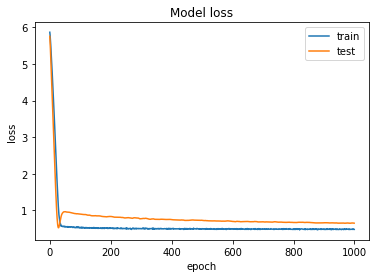

2.054947144409017
1.4335086830602097
DN- 11  layers; 500 Units; LR- 0.05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 6s 2ms/sample - loss: 4.0149 - mean_squared_error: 28.6583 - val_loss: 2.0615 - val_mean_squared_error: 1.2267
Epoch 2/1000
2562/2562 [==============================] - 1s 407us/sample - loss: 4.9460 - mean_squared_error: 16.7305 - val_loss: 9.2797 - val_mean_squared_error: 38.6355
Epoch 3/1000
2562/2562 [==============================] - 1s 420us/sample - loss: 10.8121 - mean_squared_error: 64.2199 - val_loss: 22.4356 - val_mean_squared_error: 318.9825
Epoch 4/1000
2562/2562 [==============================] - 1s 406us/sample - loss: 21.1225 - mean_squared_error: 329.1076 - val_loss: 9.4109 - val_mean_squared_error: 16.6104
Epoch 5/1000
2562/2562 [==============================] - 1s 416us/sample - loss: 28.9545 - mean_squared_error: 815.9054 - val_loss: 41.6995 - val_mean_squared_error: 127

2562/2562 [==============================] - 1s 416us/sample - loss: 43.5755 - mean_squared_error: 1552.3193 - val_loss: 57.3196 - val_mean_squared_error: 2581.0969
Epoch 47/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 46.7307 - mean_squared_error: 1796.9873 - val_loss: 40.6888 - val_mean_squared_error: 1168.2810
Epoch 48/1000
2562/2562 [==============================] - 1s 415us/sample - loss: 45.5605 - mean_squared_error: 1708.4906 - val_loss: 54.3831 - val_mean_squared_error: 2291.5745
Epoch 49/1000
2562/2562 [==============================] - 1s 417us/sample - loss: 47.2040 - mean_squared_error: 1863.2719 - val_loss: 38.0412 - val_mean_squared_error: 994.4955
Epoch 50/1000
2562/2562 [==============================] - 1s 415us/sample - loss: 43.7112 - mean_squared_error: 1555.6855 - val_loss: 57.3372 - val_mean_squared_error: 2583.2295
Epoch 51/1000
2562/2562 [==============================] - 1s 453us/sample - loss: 46.4720 - mean_squared_error: 1773.70

Epoch 92/1000
2562/2562 [==============================] - 1s 410us/sample - loss: 43.2803 - mean_squared_error: 1531.7212 - val_loss: 57.2165 - val_mean_squared_error: 2574.5461
Epoch 93/1000
2562/2562 [==============================] - 1s 403us/sample - loss: 46.7684 - mean_squared_error: 1811.2227 - val_loss: 40.4770 - val_mean_squared_error: 1156.4651
Epoch 94/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 45.2644 - mean_squared_error: 1690.3318 - val_loss: 54.5917 - val_mean_squared_error: 2315.2849
Epoch 95/1000
2562/2562 [==============================] - 1s 440us/sample - loss: 47.1645 - mean_squared_error: 1862.3158 - val_loss: 38.4185 - val_mean_squared_error: 1020.8738
Epoch 96/1000
2562/2562 [==============================] - 1s 406us/sample - loss: 44.0698 - mean_squared_error: 1596.3490 - val_loss: 55.9129 - val_mean_squared_error: 2444.3164
Epoch 97/1000
2562/2562 [==============================] - 1s 415us/sample - loss: 47.1116 - mean_squared

2562/2562 [==============================] - 1s 413us/sample - loss: 45.7234 - mean_squared_error: 1717.4316 - val_loss: 44.1783 - val_mean_squared_error: 1424.5503
Epoch 138/1000
2562/2562 [==============================] - 1s 405us/sample - loss: 47.3730 - mean_squared_error: 1890.3154 - val_loss: 49.9226 - val_mean_squared_error: 1891.0626
Epoch 139/1000
2562/2562 [==============================] - 1s 410us/sample - loss: 48.1570 - mean_squared_error: 2029.1581 - val_loss: 33.2344 - val_mean_squared_error: 718.6246
Epoch 140/1000
2562/2562 [==============================] - 1s 436us/sample - loss: 41.0808 - mean_squared_error: 1391.8998 - val_loss: 61.7950 - val_mean_squared_error: 3064.4558
Epoch 141/1000
2562/2562 [==============================] - 1s 428us/sample - loss: 45.6541 - mean_squared_error: 1712.6202 - val_loss: 45.3563 - val_mean_squared_error: 1515.0806
Epoch 142/1000
2562/2562 [==============================] - 1s 405us/sample - loss: 47.8781 - mean_squared_error: 19

2562/2562 [==============================] - 1s 410us/sample - loss: 44.9172 - mean_squared_error: 1670.9143 - val_loss: 54.6510 - val_mean_squared_error: 2328.0552
Epoch 183/1000
2562/2562 [==============================] - 1s 406us/sample - loss: 47.2447 - mean_squared_error: 1881.0909 - val_loss: 37.8432 - val_mean_squared_error: 989.0576
Epoch 184/1000
2562/2562 [==============================] - 1s 435us/sample - loss: 43.7202 - mean_squared_error: 1576.4757 - val_loss: 57.7654 - val_mean_squared_error: 2638.3875
Epoch 185/1000
2562/2562 [==============================] - 1s 420us/sample - loss: 46.1528 - mean_squared_error: 1760.7701 - val_loss: 42.1180 - val_mean_squared_error: 1276.1727
Epoch 186/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 46.3406 - mean_squared_error: 1799.9410 - val_loss: 52.2538 - val_mean_squared_error: 2102.8376
Epoch 187/1000
2562/2562 [==============================] - 1s 420us/sample - loss: 47.6244 - mean_squared_error: 19

2562/2562 [==============================] - 1s 443us/sample - loss: 46.6889 - mean_squared_error: 1823.1167 - val_loss: 40.4491 - val_mean_squared_error: 1162.1354
Epoch 228/1000
2562/2562 [==============================] - 1s 432us/sample - loss: 45.4565 - mean_squared_error: 1725.0281 - val_loss: 53.9886 - val_mean_squared_error: 2268.1997
Epoch 229/1000
2562/2562 [==============================] - 1s 429us/sample - loss: 47.0739 - mean_squared_error: 1880.0234 - val_loss: 37.4067 - val_mean_squared_error: 964.1692
Epoch 230/1000
2562/2562 [==============================] - 1s 426us/sample - loss: 43.5301 - mean_squared_error: 1567.2983 - val_loss: 57.2827 - val_mean_squared_error: 2592.9111
Epoch 231/1000
2562/2562 [==============================] - 1s 463us/sample - loss: 46.4641 - mean_squared_error: 1798.3710 - val_loss: 40.8887 - val_mean_squared_error: 1192.5156
Epoch 232/1000
2562/2562 [==============================] - 1s 522us/sample - loss: 45.4431 - mean_squared_error: 17

2562/2562 [==============================] - 1s 490us/sample - loss: 43.6562 - mean_squared_error: 1583.8461 - val_loss: 57.7485 - val_mean_squared_error: 2644.1062
Epoch 273/1000
2562/2562 [==============================] - 1s 503us/sample - loss: 46.2712 - mean_squared_error: 1779.7324 - val_loss: 42.1313 - val_mean_squared_error: 1282.3112
Epoch 274/1000
2562/2562 [==============================] - 1s 481us/sample - loss: 46.1745 - mean_squared_error: 1794.9338 - val_loss: 51.9079 - val_mean_squared_error: 2077.8372
Epoch 275/1000
2562/2562 [==============================] - 1s 474us/sample - loss: 47.6530 - mean_squared_error: 1967.2073 - val_loss: 35.2042 - val_mean_squared_error: 834.5028
Epoch 276/1000
2562/2562 [==============================] - 1s 488us/sample - loss: 42.1560 - mean_squared_error: 1474.4968 - val_loss: 59.5078 - val_mean_squared_error: 2828.4426
Epoch 277/1000
2562/2562 [==============================] - 1s 462us/sample - loss: 45.9260 - mean_squared_error: 17

Epoch 318/1000
2562/2562 [==============================] - 1s 446us/sample - loss: 43.1743 - mean_squared_error: 1551.9994 - val_loss: 56.7589 - val_mean_squared_error: 2547.1201
Epoch 319/1000
2562/2562 [==============================] - 1s 482us/sample - loss: 46.7129 - mean_squared_error: 1837.3529 - val_loss: 39.5809 - val_mean_squared_error: 1108.7311
Epoch 320/1000
2562/2562 [==============================] - 1s 492us/sample - loss: 44.6547 - mean_squared_error: 1665.7930 - val_loss: 55.4537 - val_mean_squared_error: 2417.2668
Epoch 321/1000
2562/2562 [==============================] - 1s 502us/sample - loss: 46.6594 - mean_squared_error: 1837.0886 - val_loss: 39.2995 - val_mean_squared_error: 1090.1866
Epoch 322/1000
2562/2562 [==============================] - 1s 449us/sample - loss: 44.4152 - mean_squared_error: 1648.4052 - val_loss: 54.8103 - val_mean_squared_error: 2354.5820
Epoch 323/1000
2562/2562 [==============================] - 1s 445us/sample - loss: 46.9122 - mean_s

2562/2562 [==============================] - 1s 478us/sample - loss: 47.1680 - mean_squared_error: 1910.7640 - val_loss: 36.5619 - val_mean_squared_error: 919.0657
Epoch 364/1000
2562/2562 [==============================] - 1s 442us/sample - loss: 42.9109 - mean_squared_error: 1536.5000 - val_loss: 57.8442 - val_mean_squared_error: 2661.6711
Epoch 365/1000
2562/2562 [==============================] - 1s 454us/sample - loss: 46.3886 - mean_squared_error: 1801.2369 - val_loss: 41.3066 - val_mean_squared_error: 1229.1969
Epoch 366/1000
2562/2562 [==============================] - ETA: 0s - loss: 45.2238 - mean_squared_error: 1723.64 - 1s 444us/sample - loss: 45.5375 - mean_squared_error: 1747.9908 - val_loss: 53.0631 - val_mean_squared_error: 2191.4651
Epoch 367/1000
2562/2562 [==============================] - 1s 446us/sample - loss: 47.0005 - mean_squared_error: 1895.0059 - val_loss: 36.8563 - val_mean_squared_error: 937.1932
Epoch 368/1000
2562/2562 [==============================] - 1

Epoch 408/1000
2562/2562 [==============================] - 1s 489us/sample - loss: 44.6310 - mean_squared_error: 1675.6193 - val_loss: 55.9912 - val_mean_squared_error: 2477.4973
Epoch 409/1000
2562/2562 [==============================] - 1s 475us/sample - loss: 46.2913 - mean_squared_error: 1803.6985 - val_loss: 40.8341 - val_mean_squared_error: 1198.7677
Epoch 410/1000
2562/2562 [==============================] - 1s 490us/sample - loss: 45.3804 - mean_squared_error: 1736.1437 - val_loss: 52.9255 - val_mean_squared_error: 2181.9294
Epoch 411/1000
2562/2562 [==============================] - 1s 466us/sample - loss: 47.3452 - mean_squared_error: 1935.1343 - val_loss: 36.6019 - val_mean_squared_error: 923.8541
Epoch 412/1000
2562/2562 [==============================] - 1s 523us/sample - loss: 42.7979 - mean_squared_error: 1528.0736 - val_loss: 57.2094 - val_mean_squared_error: 2600.5481
Epoch 413/1000
2562/2562 [==============================] - 1s 488us/sample - loss: 46.3708 - mean_sq

2562/2562 [==============================] - 1s 456us/sample - loss: 43.1452 - mean_squared_error: 1564.5896 - val_loss: 57.5517 - val_mean_squared_error: 2638.8765
Epoch 453/1000
2562/2562 [==============================] - 1s 463us/sample - loss: 46.1830 - mean_squared_error: 1798.8308 - val_loss: 40.0008 - val_mean_squared_error: 1144.1801
Epoch 454/1000
2562/2562 [==============================] - 1s 456us/sample - loss: 44.3730 - mean_squared_error: 1664.7869 - val_loss: 59.0639 - val_mean_squared_error: 2796.6643
Epoch 455/1000
2562/2562 [==============================] - 1s 457us/sample - loss: 45.0071 - mean_squared_error: 1690.1622 - val_loss: 45.0233 - val_mean_squared_error: 1509.1344
Epoch 456/1000
2562/2562 [==============================] - 1s 477us/sample - loss: 47.7860 - mean_squared_error: 1982.8107 - val_loss: 47.9942 - val_mean_squared_error: 1748.7617
Epoch 457/1000
2562/2562 [==============================] - ETA: 0s - loss: 47.3403 - mean_squared_error: 1998.14 -

2562/2562 [==============================] - 1s 469us/sample - loss: 46.9978 - mean_squared_error: 1893.7041 - val_loss: 38.1307 - val_mean_squared_error: 1023.4759
Epoch 498/1000
2562/2562 [==============================] - 1s 445us/sample - loss: 43.6175 - mean_squared_error: 1603.4600 - val_loss: 56.2537 - val_mean_squared_error: 2510.9238
Epoch 499/1000
2562/2562 [==============================] - 1s 460us/sample - loss: 46.2746 - mean_squared_error: 1819.1604 - val_loss: 39.9266 - val_mean_squared_error: 1141.6494
Epoch 500/1000
2562/2562 [==============================] - 1s 432us/sample - loss: 44.8738 - mean_squared_error: 1698.2393 - val_loss: 54.3272 - val_mean_squared_error: 2321.7583
Epoch 501/1000
2562/2562 [==============================] - 1s 475us/sample - loss: 46.8413 - mean_squared_error: 1885.8680 - val_loss: 38.1740 - val_mean_squared_error: 1026.4520
Epoch 502/1000
2562/2562 [==============================] - 1s 462us/sample - loss: 43.7835 - mean_squared_error: 1

2562/2562 [==============================] - 1s 446us/sample - loss: 44.8237 - mean_squared_error: 1705.8087 - val_loss: 53.6085 - val_mean_squared_error: 2256.2107
Epoch 543/1000
2562/2562 [==============================] - 1s 447us/sample - loss: 46.4555 - mean_squared_error: 1860.4254 - val_loss: 38.7123 - val_mean_squared_error: 1063.3931
Epoch 544/1000
2562/2562 [==============================] - 1s 444us/sample - loss: 44.0170 - mean_squared_error: 1636.9119 - val_loss: 54.3178 - val_mean_squared_error: 2324.2334
Epoch 545/1000
2562/2562 [==============================] - ETA: 0s - loss: 47.2532 - mean_squared_error: 1911.97 - 1s 465us/sample - loss: 46.7230 - mean_squared_error: 1875.3855 - val_loss: 37.8185 - val_mean_squared_error: 1006.0304
Epoch 546/1000
2562/2562 [==============================] - 1s 462us/sample - loss: 43.5203 - mean_squared_error: 1604.0094 - val_loss: 56.2568 - val_mean_squared_error: 2515.0608
Epoch 547/1000
2562/2562 [==============================] -

2562/2562 [==============================] - 1s 461us/sample - loss: 46.7940 - mean_squared_error: 1874.0446 - val_loss: 38.5879 - val_mean_squared_error: 1057.5623
Epoch 588/1000
2562/2562 [==============================] - 1s 452us/sample - loss: 44.0168 - mean_squared_error: 1643.9479 - val_loss: 55.9695 - val_mean_squared_error: 2489.6477
Epoch 589/1000
2562/2562 [==============================] - 1s 447us/sample - loss: 46.3794 - mean_squared_error: 1832.7471 - val_loss: 39.6824 - val_mean_squared_error: 1130.0105
Epoch 590/1000
2562/2562 [==============================] - 1s 471us/sample - loss: 44.3354 - mean_squared_error: 1662.3889 - val_loss: 54.8371 - val_mean_squared_error: 2378.1052
Epoch 591/1000
2562/2562 [==============================] - 1s 421us/sample - loss: 46.4213 - mean_squared_error: 1844.2333 - val_loss: 39.4137 - val_mean_squared_error: 1112.1328
Epoch 592/1000
2562/2562 [==============================] - 1s 431us/sample - loss: 44.4271 - mean_squared_error: 1

2562/2562 [==============================] - 1s 429us/sample - loss: 44.2202 - mean_squared_error: 1671.3412 - val_loss: 60.0368 - val_mean_squared_error: 2915.7207
Epoch 633/1000
2562/2562 [==============================] - ETA: 0s - loss: 45.6074 - mean_squared_error: 1741.82 - 1s 428us/sample - loss: 44.9604 - mean_squared_error: 1704.5743 - val_loss: 44.2932 - val_mean_squared_error: 1463.7482
Epoch 634/1000
2562/2562 [==============================] - 1s 420us/sample - loss: 47.0185 - mean_squared_error: 1906.0679 - val_loss: 53.5508 - val_mean_squared_error: 2257.6179
Epoch 635/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 46.1824 - mean_squared_error: 1835.7034 - val_loss: 38.8302 - val_mean_squared_error: 1075.8439
Epoch 636/1000
2562/2562 [==============================] - 1s 418us/sample - loss: 44.0887 - mean_squared_error: 1650.0250 - val_loss: 54.3068 - val_mean_squared_error: 2330.1682
Epoch 637/1000
2562/2562 [==============================] -

2562/2562 [==============================] - 1s 448us/sample - loss: 46.4486 - mean_squared_error: 1848.0935 - val_loss: 39.3825 - val_mean_squared_error: 1114.5525
Epoch 678/1000
2562/2562 [==============================] - ETA: 0s - loss: 43.9541 - mean_squared_error: 1642.49 - 1s 461us/sample - loss: 44.3871 - mean_squared_error: 1679.0951 - val_loss: 54.7498 - val_mean_squared_error: 2376.3242
Epoch 679/1000
2562/2562 [==============================] - 1s 445us/sample - loss: 46.8966 - mean_squared_error: 1894.8441 - val_loss: 38.3706 - val_mean_squared_error: 1048.1466
Epoch 680/1000
2562/2562 [==============================] - 1s 437us/sample - loss: 43.8609 - mean_squared_error: 1639.0933 - val_loss: 55.4354 - val_mean_squared_error: 2443.7827
Epoch 681/1000
2562/2562 [==============================] - 1s 454us/sample - loss: 46.4009 - mean_squared_error: 1849.8912 - val_loss: 39.3740 - val_mean_squared_error: 1114.1974
Epoch 682/1000
2562/2562 [==============================] -

2562/2562 [==============================] - 1s 421us/sample - loss: 43.4635 - mean_squared_error: 1613.4132 - val_loss: 55.6397 - val_mean_squared_error: 2467.2688
Epoch 723/1000
2562/2562 [==============================] - 1s 439us/sample - loss: 46.4147 - mean_squared_error: 1858.0236 - val_loss: 39.3939 - val_mean_squared_error: 1117.7180
Epoch 724/1000
2562/2562 [==============================] - 1s 435us/sample - loss: 44.4829 - mean_squared_error: 1684.0839 - val_loss: 54.1651 - val_mean_squared_error: 2323.1370
Epoch 725/1000
2562/2562 [==============================] - 1s 450us/sample - loss: 46.4669 - mean_squared_error: 1866.1141 - val_loss: 38.6153 - val_mean_squared_error: 1066.3932
Epoch 726/1000
2562/2562 [==============================] - 1s 500us/sample - loss: 43.7878 - mean_squared_error: 1640.9075 - val_loss: 55.1872 - val_mean_squared_error: 2422.8435
Epoch 727/1000
2562/2562 [==============================] - 1s 470us/sample - loss: 46.3135 - mean_squared_error: 1

2562/2562 [==============================] - 1s 434us/sample - loss: 46.6447 - mean_squared_error: 1885.7318 - val_loss: 38.7793 - val_mean_squared_error: 1079.2515
Epoch 768/1000
2562/2562 [==============================] - 1s 438us/sample - loss: 44.1933 - mean_squared_error: 1668.6392 - val_loss: 54.6478 - val_mean_squared_error: 2373.2043
Epoch 769/1000
2562/2562 [==============================] - 1s 444us/sample - loss: 46.2279 - mean_squared_error: 1852.8015 - val_loss: 38.8247 - val_mean_squared_error: 1082.3401
Epoch 770/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 44.3557 - mean_squared_error: 1688.1456 - val_loss: 54.5632 - val_mean_squared_error: 2365.1213
Epoch 771/1000
2562/2562 [==============================] - 1s 487us/sample - loss: 46.5086 - mean_squared_error: 1878.5303 - val_loss: 38.3813 - val_mean_squared_error: 1053.4725
Epoch 772/1000
2562/2562 [==============================] - 1s 450us/sample - loss: 43.9501 - mean_squared_error: 1

2562/2562 [==============================] - 1s 532us/sample - loss: 44.0780 - mean_squared_error: 1669.4237 - val_loss: 54.7509 - val_mean_squared_error: 2386.5557
Epoch 813/1000
2562/2562 [==============================] - 1s 528us/sample - loss: 46.3505 - mean_squared_error: 1863.7517 - val_loss: 39.0824 - val_mean_squared_error: 1101.5901
Epoch 814/1000
2562/2562 [==============================] - ETA: 0s - loss: 43.9179 - mean_squared_error: 1649.57 - 1s 489us/sample - loss: 44.2756 - mean_squared_error: 1678.0603 - val_loss: 53.8503 - val_mean_squared_error: 2299.5505
Epoch 815/1000
2562/2562 [==============================] - 1s 513us/sample - loss: 46.8454 - mean_squared_error: 1920.2129 - val_loss: 37.6817 - val_mean_squared_error: 1010.7196
Epoch 816/1000
2562/2562 [==============================] - 1s 509us/sample - loss: 43.5032 - mean_squared_error: 1617.0796 - val_loss: 55.6777 - val_mean_squared_error: 2478.2539
Epoch 817/1000
2562/2562 [==============================] -

2562/2562 [==============================] - 1s 460us/sample - loss: 46.7820 - mean_squared_error: 1903.7242 - val_loss: 38.1591 - val_mean_squared_error: 1043.3694
Epoch 858/1000
2562/2562 [==============================] - 1s 460us/sample - loss: 43.9333 - mean_squared_error: 1654.1666 - val_loss: 55.6331 - val_mean_squared_error: 2477.0210
Epoch 859/1000
2562/2562 [==============================] - 1s 491us/sample - loss: 45.9560 - mean_squared_error: 1830.3829 - val_loss: 39.4391 - val_mean_squared_error: 1127.7554
Epoch 860/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 44.4075 - mean_squared_error: 1703.9489 - val_loss: 54.1785 - val_mean_squared_error: 2334.5325
Epoch 861/1000
2562/2562 [==============================] - 1s 474us/sample - loss: 46.5178 - mean_squared_error: 1884.4980 - val_loss: 37.9680 - val_mean_squared_error: 1031.2585
Epoch 862/1000
2562/2562 [==============================] - 1s 480us/sample - loss: 43.2226 - mean_squared_error: 1

2562/2562 [==============================] - 1s 492us/sample - loss: 43.4717 - mean_squared_error: 1619.9226 - val_loss: 55.0447 - val_mean_squared_error: 2422.1184
Epoch 903/1000
2562/2562 [==============================] - 1s 452us/sample - loss: 45.8679 - mean_squared_error: 1825.8840 - val_loss: 39.7021 - val_mean_squared_error: 1147.7494
Epoch 904/1000
2562/2562 [==============================] - 1s 496us/sample - loss: 44.5869 - mean_squared_error: 1717.2826 - val_loss: 52.8269 - val_mean_squared_error: 2208.9336
Epoch 905/1000
2562/2562 [==============================] - 1s 559us/sample - loss: 46.1793 - mean_squared_error: 1873.1691 - val_loss: 37.6196 - val_mean_squared_error: 1011.1488
Epoch 906/1000
2562/2562 [==============================] - 1s 549us/sample - loss: 43.3518 - mean_squared_error: 1617.5066 - val_loss: 54.2171 - val_mean_squared_error: 2341.6541
Epoch 907/1000
2562/2562 [==============================] - 1s 451us/sample - loss: 46.6705 - mean_squared_error: 1

2562/2562 [==============================] - 1s 437us/sample - loss: 30.8083 - mean_squared_error: 714.8513 - val_loss: 31.1619 - val_mean_squared_error: 644.0042
Epoch 948/1000
2562/2562 [==============================] - 1s 436us/sample - loss: 33.0987 - mean_squared_error: 853.2871 - val_loss: 20.1514 - val_mean_squared_error: 206.9265
Epoch 949/1000
2562/2562 [==============================] - 1s 454us/sample - loss: 26.7259 - mean_squared_error: 542.7358 - val_loss: 34.7693 - val_mean_squared_error: 840.0361
Epoch 950/1000
2562/2562 [==============================] - 1s 489us/sample - loss: 31.9868 - mean_squared_error: 810.2315 - val_loss: 32.4316 - val_mean_squared_error: 710.1270
Epoch 951/1000
2562/2562 [==============================] - ETA: 0s - loss: 33.5267 - mean_squared_error: 866.146 - 1s 461us/sample - loss: 33.4332 - mean_squared_error: 860.4592 - val_loss: 21.5103 - val_mean_squared_error: 247.8305
Epoch 952/1000
2562/2562 [==============================] - 1s 424us/

2562/2562 [==============================] - 1s 546us/sample - loss: 30.7514 - mean_squared_error: 709.7861 - val_loss: 26.8262 - val_mean_squared_error: 444.3717
Epoch 993/1000
2562/2562 [==============================] - 1s 545us/sample - loss: 30.8005 - mean_squared_error: 720.4847 - val_loss: 25.8919 - val_mean_squared_error: 405.9390
Epoch 994/1000
2562/2562 [==============================] - 1s 524us/sample - loss: 30.2207 - mean_squared_error: 694.3832 - val_loss: 26.5920 - val_mean_squared_error: 434.6292
Epoch 995/1000
2562/2562 [==============================] - 1s 535us/sample - loss: 30.3238 - mean_squared_error: 687.2166 - val_loss: 28.8273 - val_mean_squared_error: 532.7419
Epoch 996/1000
2562/2562 [==============================] - 1s 542us/sample - loss: 31.1586 - mean_squared_error: 729.5577 - val_loss: 27.3606 - val_mean_squared_error: 467.2904
Epoch 997/1000
2562/2562 [==============================] - 1s 545us/sample - loss: 31.3125 - mean_squared_error: 748.3906 - 

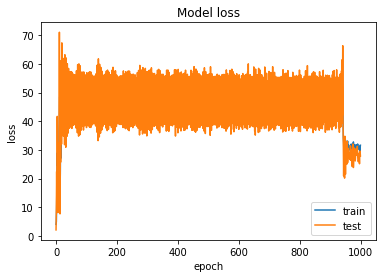

489.6258356332074
22.12749049560766
DN- 11  layers; 500 Units; LR- 0.05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 6s 2ms/sample - loss: 5.3432 - mean_squared_error: 48.3674 - val_loss: 16.4556 - val_mean_squared_error: 288.6271
Epoch 2/1000
2562/2562 [==============================] - 1s 447us/sample - loss: 8.8589 - mean_squared_error: 119.3135 - val_loss: 11.7003 - val_mean_squared_error: 149.9968
Epoch 3/1000
2562/2562 [==============================] - 1s 417us/sample - loss: 11.1011 - mean_squared_error: 168.4355 - val_loss: 22.0313 - val_mean_squared_error: 508.8084
Epoch 4/1000
2562/2562 [==============================] - 1s 449us/sample - loss: 11.4518 - mean_squared_error: 201.7214 - val_loss: 17.4129 - val_mean_squared_error: 322.0233
Epoch 5/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 10.1930 - mean_squared_error: 157.5704 - val_loss: 24.9642 - val_mean_squared_error:

2562/2562 [==============================] - 1s 398us/sample - loss: 24.6894 - mean_squared_error: 689.1597 - val_loss: 22.0520 - val_mean_squared_error: 509.7450
Epoch 47/1000
2562/2562 [==============================] - 1s 393us/sample - loss: 24.9073 - mean_squared_error: 701.6339 - val_loss: 21.3925 - val_mean_squared_error: 480.4314
Epoch 48/1000
2562/2562 [==============================] - 1s 390us/sample - loss: 24.7484 - mean_squared_error: 698.3002 - val_loss: 20.5942 - val_mean_squared_error: 446.1166
Epoch 49/1000
2562/2562 [==============================] - 1s 398us/sample - loss: 24.5684 - mean_squared_error: 691.4562 - val_loss: 19.7805 - val_mean_squared_error: 412.4496
Epoch 50/1000
2562/2562 [==============================] - 1s 406us/sample - loss: 24.2936 - mean_squared_error: 683.9670 - val_loss: 19.7710 - val_mean_squared_error: 412.0620
Epoch 51/1000
2562/2562 [==============================] - 1s 392us/sample - loss: 24.2085 - mean_squared_error: 675.5632 - val_l

2562/2562 [==============================] - 1s 449us/sample - loss: 24.9990 - mean_squared_error: 714.8679 - val_loss: 21.7489 - val_mean_squared_error: 496.1618
Epoch 93/1000
2562/2562 [==============================] - 1s 405us/sample - loss: 24.7164 - mean_squared_error: 698.2787 - val_loss: 21.4172 - val_mean_squared_error: 481.5145
Epoch 94/1000
2562/2562 [==============================] - 1s 421us/sample - loss: 24.6225 - mean_squared_error: 700.0500 - val_loss: 21.4969 - val_mean_squared_error: 485.0157
Epoch 95/1000
2562/2562 [==============================] - 1s 397us/sample - loss: 24.4969 - mean_squared_error: 686.3244 - val_loss: 22.6203 - val_mean_squared_error: 535.7009
Epoch 96/1000
2562/2562 [==============================] - 1s 403us/sample - loss: 24.6048 - mean_squared_error: 691.4399 - val_loss: 23.3414 - val_mean_squared_error: 569.5615
Epoch 97/1000
2562/2562 [==============================] - 1s 413us/sample - loss: 24.9196 - mean_squared_error: 707.0181 - val_l

2562/2562 [==============================] - 1s 394us/sample - loss: 25.2702 - mean_squared_error: 736.2341 - val_loss: 25.9777 - val_mean_squared_error: 702.2170
Epoch 139/1000
2562/2562 [==============================] - 1s 399us/sample - loss: 25.8096 - mean_squared_error: 761.7966 - val_loss: 24.5883 - val_mean_squared_error: 630.5744
Epoch 140/1000
2562/2562 [==============================] - 1s 401us/sample - loss: 25.2959 - mean_squared_error: 730.7886 - val_loss: 23.8640 - val_mean_squared_error: 594.7542
Epoch 141/1000
2562/2562 [==============================] - 1s 413us/sample - loss: 24.8861 - mean_squared_error: 711.6908 - val_loss: 24.1360 - val_mean_squared_error: 608.0850
Epoch 142/1000
2562/2562 [==============================] - 1s 404us/sample - loss: 24.9004 - mean_squared_error: 710.4972 - val_loss: 24.6792 - val_mean_squared_error: 635.1406
Epoch 143/1000
2562/2562 [==============================] - 1s 396us/sample - loss: 25.0428 - mean_squared_error: 719.8602 - 

2562/2562 [==============================] - 1s 465us/sample - loss: 25.0535 - mean_squared_error: 719.5198 - val_loss: 24.2270 - val_mean_squared_error: 612.5726
Epoch 185/1000
2562/2562 [==============================] - 1s 460us/sample - loss: 25.1772 - mean_squared_error: 728.1370 - val_loss: 24.0013 - val_mean_squared_error: 601.4662
Epoch 186/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 25.1709 - mean_squared_error: 726.7501 - val_loss: 24.3933 - val_mean_squared_error: 620.8285
Epoch 187/1000
2562/2562 [==============================] - 1s 423us/sample - loss: 24.8148 - mean_squared_error: 712.0710 - val_loss: 23.2801 - val_mean_squared_error: 566.6446
Epoch 188/1000
2562/2562 [==============================] - 1s 425us/sample - loss: 26.3286 - mean_squared_error: 811.6594 - val_loss: 14.4982 - val_mean_squared_error: 226.0955
Epoch 189/1000
2562/2562 [==============================] - 1s 423us/sample - loss: 22.3843 - mean_squared_error: 654.0245 - 

2562/2562 [==============================] - 1s 455us/sample - loss: 24.3093 - mean_squared_error: 688.2537 - val_loss: 22.3683 - val_mean_squared_error: 524.1116
Epoch 231/1000
2562/2562 [==============================] - 1s 424us/sample - loss: 24.5706 - mean_squared_error: 701.1132 - val_loss: 22.7807 - val_mean_squared_error: 543.1418
Epoch 232/1000
2562/2562 [==============================] - 1s 422us/sample - loss: 24.7919 - mean_squared_error: 713.7213 - val_loss: 23.5257 - val_mean_squared_error: 578.3824
Epoch 233/1000
2562/2562 [==============================] - 1s 448us/sample - loss: 24.9071 - mean_squared_error: 715.2896 - val_loss: 23.3245 - val_mean_squared_error: 568.7571
Epoch 234/1000
2562/2562 [==============================] - 1s 418us/sample - loss: 25.6314 - mean_squared_error: 759.0650 - val_loss: 20.2337 - val_mean_squared_error: 431.0367
Epoch 235/1000
2562/2562 [==============================] - 1s 417us/sample - loss: 24.3931 - mean_squared_error: 703.7150 - 

2562/2562 [==============================] - 1s 447us/sample - loss: 23.9555 - mean_squared_error: 677.9791 - val_loss: 21.4001 - val_mean_squared_error: 480.7645
Epoch 276/1000
2562/2562 [==============================] - 1s 431us/sample - loss: 24.8999 - mean_squared_error: 725.2113 - val_loss: 19.1540 - val_mean_squared_error: 387.4307
Epoch 277/1000
2562/2562 [==============================] - 1s 432us/sample - loss: 24.1545 - mean_squared_error: 705.5746 - val_loss: 19.1143 - val_mean_squared_error: 385.8707
Epoch 278/1000
2562/2562 [==============================] - 1s 443us/sample - loss: 23.8341 - mean_squared_error: 674.3992 - val_loss: 21.7253 - val_mean_squared_error: 495.1128
Epoch 279/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 24.4287 - mean_squared_error: 693.5265 - val_loss: 23.2609 - val_mean_squared_error: 565.7311
Epoch 280/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 24.7829 - mean_squared_error: 712.1332 - 

Epoch 321/1000
2562/2562 [==============================] - 1s 471us/sample - loss: 22.8398 - mean_squared_error: 642.7515 - val_loss: 21.4637 - val_mean_squared_error: 483.5531
Epoch 322/1000
2562/2562 [==============================] - 1s 467us/sample - loss: 24.1858 - mean_squared_error: 682.2963 - val_loss: 24.5054 - val_mean_squared_error: 626.4214
Epoch 323/1000
2562/2562 [==============================] - 1s 481us/sample - loss: 25.4754 - mean_squared_error: 749.6773 - val_loss: 22.4922 - val_mean_squared_error: 529.7905
Epoch 324/1000
2562/2562 [==============================] - 1s 468us/sample - loss: 25.1692 - mean_squared_error: 740.6037 - val_loss: 19.5274 - val_mean_squared_error: 402.2452
Epoch 325/1000
2562/2562 [==============================] - 1s 482us/sample - loss: 23.7882 - mean_squared_error: 675.3130 - val_loss: 21.8332 - val_mean_squared_error: 499.9231
Epoch 326/1000
2562/2562 [==============================] - 1s 501us/sample - loss: 24.1189 - mean_squared_err

2562/2562 [==============================] - 1s 565us/sample - loss: 24.4096 - mean_squared_error: 691.3734 - val_loss: 23.1870 - val_mean_squared_error: 562.2230
Epoch 368/1000
2562/2562 [==============================] - 1s 540us/sample - loss: 25.4566 - mean_squared_error: 751.5345 - val_loss: 20.7350 - val_mean_squared_error: 452.0775
Epoch 369/1000
2562/2562 [==============================] - 1s 563us/sample - loss: 24.5908 - mean_squared_error: 711.3904 - val_loss: 20.3547 - val_mean_squared_error: 436.0696
Epoch 370/1000
2562/2562 [==============================] - 1s 557us/sample - loss: 24.0235 - mean_squared_error: 680.1635 - val_loss: 21.9932 - val_mean_squared_error: 507.0934
Epoch 371/1000
2562/2562 [==============================] - 1s 541us/sample - loss: 24.3783 - mean_squared_error: 690.8482 - val_loss: 23.3473 - val_mean_squared_error: 569.8462
Epoch 372/1000
2562/2562 [==============================] - 1s 555us/sample - loss: 24.9393 - mean_squared_error: 718.0602 - 

2562/2562 [==============================] - 1s 419us/sample - loss: 24.9517 - mean_squared_error: 718.6191 - val_loss: 21.6938 - val_mean_squared_error: 493.7137
Epoch 414/1000
2562/2562 [==============================] - 1s 402us/sample - loss: 25.2168 - mean_squared_error: 748.2805 - val_loss: 18.5386 - val_mean_squared_error: 363.6173
Epoch 415/1000
2562/2562 [==============================] - 1s 400us/sample - loss: 23.6247 - mean_squared_error: 675.4150 - val_loss: 21.1308 - val_mean_squared_error: 469.0402
Epoch 416/1000
2562/2562 [==============================] - 1s 405us/sample - loss: 23.8397 - mean_squared_error: 667.1028 - val_loss: 23.3751 - val_mean_squared_error: 571.1699
Epoch 417/1000
2562/2562 [==============================] - 1s 406us/sample - loss: 25.1566 - mean_squared_error: 733.8070 - val_loss: 22.5038 - val_mean_squared_error: 530.3259
Epoch 418/1000
2562/2562 [==============================] - 1s 400us/sample - loss: 25.0674 - mean_squared_error: 733.3873 - 

2562/2562 [==============================] - 1s 376us/sample - loss: 24.8312 - mean_squared_error: 719.6801 - val_loss: 21.5109 - val_mean_squared_error: 485.6295
Epoch 460/1000
2562/2562 [==============================] - 1s 366us/sample - loss: 24.9211 - mean_squared_error: 728.6100 - val_loss: 18.7926 - val_mean_squared_error: 373.3565
Epoch 461/1000
2562/2562 [==============================] - 1s 367us/sample - loss: 23.7970 - mean_squared_error: 681.0800 - val_loss: 21.1952 - val_mean_squared_error: 471.8333
Epoch 462/1000
2562/2562 [==============================] - 1s 374us/sample - loss: 24.1177 - mean_squared_error: 675.9843 - val_loss: 24.5024 - val_mean_squared_error: 626.2688
Epoch 463/1000
2562/2562 [==============================] - 1s 385us/sample - loss: 24.9188 - mean_squared_error: 723.6565 - val_loss: 24.9610 - val_mean_squared_error: 649.4132
Epoch 464/1000
2562/2562 [==============================] - 1s 377us/sample - loss: 25.9284 - mean_squared_error: 773.6949 - 

2562/2562 [==============================] - 1s 414us/sample - loss: 12.0534 - mean_squared_error: 188.9634 - val_loss: 12.3930 - val_mean_squared_error: 167.3803
Epoch 506/1000
2562/2562 [==============================] - 1s 403us/sample - loss: 11.7682 - mean_squared_error: 178.6230 - val_loss: 13.0968 - val_mean_squared_error: 186.0243
Epoch 507/1000
2562/2562 [==============================] - 1s 407us/sample - loss: 12.2065 - mean_squared_error: 190.4061 - val_loss: 12.7260 - val_mean_squared_error: 176.0783
Epoch 508/1000
2562/2562 [==============================] - 1s 396us/sample - loss: 12.5285 - mean_squared_error: 197.1360 - val_loss: 12.2201 - val_mean_squared_error: 162.9503
Epoch 509/1000
2562/2562 [==============================] - 1s 396us/sample - loss: 11.9567 - mean_squared_error: 184.6647 - val_loss: 12.5394 - val_mean_squared_error: 171.1762
Epoch 510/1000
2562/2562 [==============================] - 1s 404us/sample - loss: 12.3857 - mean_squared_error: 193.4889 - 

2562/2562 [==============================] - 1s 399us/sample - loss: 11.9053 - mean_squared_error: 181.9438 - val_loss: 12.7259 - val_mean_squared_error: 176.0735
Epoch 552/1000
2562/2562 [==============================] - 1s 427us/sample - loss: 11.7973 - mean_squared_error: 177.4481 - val_loss: 13.2765 - val_mean_squared_error: 190.9426
Epoch 553/1000
2562/2562 [==============================] - 1s 393us/sample - loss: 12.2843 - mean_squared_error: 187.7978 - val_loss: 12.3514 - val_mean_squared_error: 166.3085
Epoch 554/1000
2562/2562 [==============================] - 1s 392us/sample - loss: 12.3014 - mean_squared_error: 187.4083 - val_loss: 13.0793 - val_mean_squared_error: 185.5479
Epoch 555/1000
2562/2562 [==============================] - 1s 412us/sample - loss: 12.3663 - mean_squared_error: 193.4879 - val_loss: 11.6120 - val_mean_squared_error: 147.8512
Epoch 556/1000
2562/2562 [==============================] - 1s 405us/sample - loss: 12.6320 - mean_squared_error: 198.0450 - 

Epoch 597/1000
2562/2562 [==============================] - 1s 449us/sample - loss: 12.7147 - mean_squared_error: 199.8558 - val_loss: 9.2378 - val_mean_squared_error: 95.9752
Epoch 598/1000
2562/2562 [==============================] - 1s 426us/sample - loss: 12.6000 - mean_squared_error: 197.3485 - val_loss: 9.7392 - val_mean_squared_error: 105.9915
Epoch 599/1000
2562/2562 [==============================] - 1s 413us/sample - loss: 12.3252 - mean_squared_error: 189.2045 - val_loss: 10.7399 - val_mean_squared_error: 127.4865
Epoch 600/1000
2562/2562 [==============================] - 1s 399us/sample - loss: 11.9914 - mean_squared_error: 183.6294 - val_loss: 11.2808 - val_mean_squared_error: 139.9382
Epoch 601/1000
2562/2562 [==============================] - 1s 408us/sample - loss: 12.0190 - mean_squared_error: 184.2777 - val_loss: 13.0623 - val_mean_squared_error: 185.0854
Epoch 602/1000
2562/2562 [==============================] - 1s 407us/sample - loss: 12.1119 - mean_squared_error:

2562/2562 [==============================] - 1s 419us/sample - loss: 12.9764 - mean_squared_error: 207.0221 - val_loss: 8.8792 - val_mean_squared_error: 89.1207
Epoch 642/1000
2562/2562 [==============================] - 1s 421us/sample - loss: 12.7216 - mean_squared_error: 201.9652 - val_loss: 7.0945 - val_mean_squared_error: 58.8272
Epoch 643/1000
2562/2562 [==============================] - 1s 432us/sample - loss: 12.9679 - mean_squared_error: 211.2531 - val_loss: 7.0820 - val_mean_squared_error: 58.6364
Epoch 644/1000
2562/2562 [==============================] - 1s 423us/sample - loss: 13.1137 - mean_squared_error: 215.7905 - val_loss: 8.0829 - val_mean_squared_error: 74.8168
Epoch 645/1000
2562/2562 [==============================] - 1s 418us/sample - loss: 13.0780 - mean_squared_error: 214.9663 - val_loss: 7.6260 - val_mean_squared_error: 67.1826
Epoch 646/1000
2562/2562 [==============================] - 1s 440us/sample - loss: 13.3135 - mean_squared_error: 222.9217 - val_loss: 

Epoch 686/1000
2562/2562 [==============================] - 1s 411us/sample - loss: 12.5540 - mean_squared_error: 189.7788 - val_loss: 11.7974 - val_mean_squared_error: 152.3760
Epoch 687/1000
2562/2562 [==============================] - 1s 408us/sample - loss: 12.5578 - mean_squared_error: 188.8797 - val_loss: 11.2611 - val_mean_squared_error: 139.4742
Epoch 688/1000
2562/2562 [==============================] - 1s 427us/sample - loss: 12.2968 - mean_squared_error: 184.4266 - val_loss: 12.7903 - val_mean_squared_error: 177.7821
Epoch 689/1000
2562/2562 [==============================] - 1s 421us/sample - loss: 12.5666 - mean_squared_error: 189.6059 - val_loss: 12.3978 - val_mean_squared_error: 167.5025
Epoch 690/1000
2562/2562 [==============================] - 1s 465us/sample - loss: 12.4981 - mean_squared_error: 188.5279 - val_loss: 11.5195 - val_mean_squared_error: 145.6186
Epoch 691/1000
2562/2562 [==============================] - 1s 416us/sample - loss: 12.3349 - mean_squared_err

2562/2562 [==============================] - 1s 411us/sample - loss: 12.6195 - mean_squared_error: 193.9012 - val_loss: 10.4453 - val_mean_squared_error: 120.9500
Epoch 733/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 12.3828 - mean_squared_error: 186.8963 - val_loss: 11.4074 - val_mean_squared_error: 142.9357
Epoch 734/1000
2562/2562 [==============================] - 1s 428us/sample - loss: 12.3052 - mean_squared_error: 184.7588 - val_loss: 12.6479 - val_mean_squared_error: 174.0183
Epoch 735/1000
2562/2562 [==============================] - 1s 474us/sample - loss: 12.2989 - mean_squared_error: 183.0751 - val_loss: 12.6648 - val_mean_squared_error: 174.4632
Epoch 736/1000
2562/2562 [==============================] - 1s 462us/sample - loss: 12.5823 - mean_squared_error: 190.6279 - val_loss: 12.9403 - val_mean_squared_error: 181.7923
Epoch 737/1000
2562/2562 [==============================] - 1s 446us/sample - loss: 13.0270 - mean_squared_error: 209.6718 - 

Epoch 778/1000
2562/2562 [==============================] - 1s 485us/sample - loss: 12.5798 - mean_squared_error: 193.5788 - val_loss: 11.4134 - val_mean_squared_error: 143.0802
Epoch 779/1000
2562/2562 [==============================] - 1s 487us/sample - loss: 12.7659 - mean_squared_error: 197.2561 - val_loss: 10.4020 - val_mean_squared_error: 120.0038
Epoch 780/1000
2562/2562 [==============================] - 1s 452us/sample - loss: 12.4688 - mean_squared_error: 189.6076 - val_loss: 11.4784 - val_mean_squared_error: 144.6326
Epoch 781/1000
2562/2562 [==============================] - 1s 452us/sample - loss: 12.3579 - mean_squared_error: 185.3314 - val_loss: 11.9548 - val_mean_squared_error: 156.2728
Epoch 782/1000
2562/2562 [==============================] - 1s 517us/sample - loss: 12.5254 - mean_squared_error: 189.6163 - val_loss: 11.9021 - val_mean_squared_error: 154.9629
Epoch 783/1000
2562/2562 [==============================] - 1s 428us/sample - loss: 12.3935 - mean_squared_err

2562/2562 [==============================] - 1s 445us/sample - loss: 12.7613 - mean_squared_error: 197.7422 - val_loss: 10.4280 - val_mean_squared_error: 120.5709
Epoch 824/1000
2562/2562 [==============================] - 1s 417us/sample - loss: 12.5878 - mean_squared_error: 193.2952 - val_loss: 11.6190 - val_mean_squared_error: 148.0195
Epoch 825/1000
2562/2562 [==============================] - 1s 407us/sample - loss: 12.3995 - mean_squared_error: 186.3334 - val_loss: 11.7469 - val_mean_squared_error: 151.1364
Epoch 826/1000
2562/2562 [==============================] - 1s 410us/sample - loss: 12.4070 - mean_squared_error: 187.2288 - val_loss: 12.8406 - val_mean_squared_error: 179.1220
Epoch 827/1000
2562/2562 [==============================] - 1s 438us/sample - loss: 12.6848 - mean_squared_error: 194.9701 - val_loss: 11.4549 - val_mean_squared_error: 144.0691
Epoch 828/1000
2562/2562 [==============================] - 1s 411us/sample - loss: 12.3784 - mean_squared_error: 186.4975 - 

2562/2562 [==============================] - 1s 419us/sample - loss: 12.6174 - mean_squared_error: 191.9294 - val_loss: 11.6823 - val_mean_squared_error: 149.5598
Epoch 870/1000
2562/2562 [==============================] - 1s 414us/sample - loss: 12.2229 - mean_squared_error: 183.0397 - val_loss: 13.0277 - val_mean_squared_error: 184.1483
Epoch 871/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 12.6717 - mean_squared_error: 192.9549 - val_loss: 11.4407 - val_mean_squared_error: 143.7303
Epoch 872/1000
2562/2562 [==============================] - 1s 423us/sample - loss: 12.4378 - mean_squared_error: 187.1405 - val_loss: 11.4428 - val_mean_squared_error: 143.7805
Epoch 873/1000
2562/2562 [==============================] - 1s 411us/sample - loss: 12.4773 - mean_squared_error: 188.3705 - val_loss: 12.1420 - val_mean_squared_error: 160.9717
Epoch 874/1000
2562/2562 [==============================] - 1s 411us/sample - loss: 12.4290 - mean_squared_error: 186.6666 - 

2562/2562 [==============================] - 1s 484us/sample - loss: 12.6521 - mean_squared_error: 193.0367 - val_loss: 11.0515 - val_mean_squared_error: 134.5865
Epoch 916/1000
2562/2562 [==============================] - 1s 447us/sample - loss: 12.3726 - mean_squared_error: 187.0181 - val_loss: 12.0309 - val_mean_squared_error: 158.1740
Epoch 917/1000
2562/2562 [==============================] - 1s 481us/sample - loss: 12.3767 - mean_squared_error: 185.8425 - val_loss: 12.1600 - val_mean_squared_error: 161.4269
Epoch 918/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 12.4292 - mean_squared_error: 187.7382 - val_loss: 11.8330 - val_mean_squared_error: 153.2545
Epoch 919/1000
2562/2562 [==============================] - 1s 420us/sample - loss: 12.5583 - mean_squared_error: 190.9884 - val_loss: 11.7902 - val_mean_squared_error: 152.1989
Epoch 920/1000
2562/2562 [==============================] - 1s 466us/sample - loss: 12.4902 - mean_squared_error: 189.7346 - 

2562/2562 [==============================] - 1s 436us/sample - loss: 12.3522 - mean_squared_error: 185.7473 - val_loss: 12.3247 - val_mean_squared_error: 165.6234
Epoch 962/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 12.4365 - mean_squared_error: 187.5867 - val_loss: 11.8662 - val_mean_squared_error: 154.0721
Epoch 963/1000
2562/2562 [==============================] - 1s 435us/sample - loss: 12.3957 - mean_squared_error: 186.6005 - val_loss: 12.1303 - val_mean_squared_error: 160.6748
Epoch 964/1000
2562/2562 [==============================] - 1s 431us/sample - loss: 12.5605 - mean_squared_error: 191.0338 - val_loss: 11.9912 - val_mean_squared_error: 157.1808
Epoch 965/1000
2562/2562 [==============================] - 1s 487us/sample - loss: 12.5094 - mean_squared_error: 189.0814 - val_loss: 11.7209 - val_mean_squared_error: 150.5008
Epoch 966/1000
2562/2562 [==============================] - 1s 432us/sample - loss: 12.3949 - mean_squared_error: 186.7789 - 

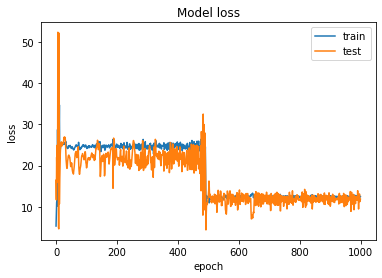

154.03650726364168
12.411144478396892
DN- 11  layers; 500 Units; LR- 2e-05 weight_decay- 1e-05
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 6s 2ms/sample - loss: 6.0671 - mean_squared_error: 43.6175 - val_loss: 6.0573 - val_mean_squared_error: 43.4179
Epoch 2/1000
2562/2562 [==============================] - 1s 514us/sample - loss: 5.9633 - mean_squared_error: 42.2494 - val_loss: 5.8559 - val_mean_squared_error: 40.8454
Epoch 3/1000
2562/2562 [==============================] - 1s 495us/sample - loss: 5.8050 - mean_squared_error: 40.2679 - val_loss: 5.6017 - val_mean_squared_error: 37.7161
Epoch 4/1000
2562/2562 [==============================] - 1s 482us/sample - loss: 5.6160 - mean_squared_error: 37.9503 - val_loss: 5.3186 - val_mean_squared_error: 34.3812
Epoch 5/1000
2562/2562 [==============================] - 1s 453us/sample - loss: 5.3929 - mean_squared_error: 35.3056 - val_loss: 5.0224 - val_mean_squared_error: 31.0664


Epoch 48/1000
2562/2562 [==============================] - 1s 527us/sample - loss: 0.5940 - mean_squared_error: 1.3991 - val_loss: 1.0495 - val_mean_squared_error: 3.0631
Epoch 49/1000
2562/2562 [==============================] - 1s 555us/sample - loss: 0.5838 - mean_squared_error: 1.3703 - val_loss: 1.0478 - val_mean_squared_error: 3.0567
Epoch 50/1000
2562/2562 [==============================] - 1s 556us/sample - loss: 0.5731 - mean_squared_error: 1.3454 - val_loss: 1.0469 - val_mean_squared_error: 3.0529
Epoch 51/1000
2562/2562 [==============================] - 1s 553us/sample - loss: 0.5831 - mean_squared_error: 1.3717 - val_loss: 1.0448 - val_mean_squared_error: 3.0448
Epoch 52/1000
2562/2562 [==============================] - 2s 603us/sample - loss: 0.5833 - mean_squared_error: 1.3682 - val_loss: 1.0424 - val_mean_squared_error: 3.0357
Epoch 53/1000
2562/2562 [==============================] - 2s 643us/sample - loss: 0.5839 - mean_squared_error: 1.3741 - val_loss: 1.0405 - val_m

Epoch 96/1000
2562/2562 [==============================] - 1s 520us/sample - loss: 0.5614 - mean_squared_error: 1.2835 - val_loss: 0.9962 - val_mean_squared_error: 2.8550
Epoch 97/1000
2562/2562 [==============================] - 1s 508us/sample - loss: 0.5625 - mean_squared_error: 1.2905 - val_loss: 0.9955 - val_mean_squared_error: 2.8525
Epoch 98/1000
2562/2562 [==============================] - 1s 512us/sample - loss: 0.5674 - mean_squared_error: 1.3238 - val_loss: 0.9914 - val_mean_squared_error: 2.8377
Epoch 99/1000
2562/2562 [==============================] - 1s 528us/sample - loss: 0.5505 - mean_squared_error: 1.2528 - val_loss: 0.9850 - val_mean_squared_error: 2.8145
Epoch 100/1000
2562/2562 [==============================] - 1s 490us/sample - loss: 0.5634 - mean_squared_error: 1.3177 - val_loss: 0.9843 - val_mean_squared_error: 2.8118
Epoch 101/1000
2562/2562 [==============================] - 1s 492us/sample - loss: 0.5686 - mean_squared_error: 1.3126 - val_loss: 0.9865 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 429us/sample - loss: 0.5477 - mean_squared_error: 1.2531 - val_loss: 0.9682 - val_mean_squared_error: 2.7483
Epoch 145/1000
2562/2562 [==============================] - 1s 413us/sample - loss: 0.5636 - mean_squared_error: 1.3106 - val_loss: 0.9699 - val_mean_squared_error: 2.7541
Epoch 146/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 0.5565 - mean_squared_error: 1.2850 - val_loss: 0.9657 - val_mean_squared_error: 2.7391
Epoch 147/1000
2562/2562 [==============================] - 1s 412us/sample - loss: 0.5484 - mean_squared_error: 1.2664 - val_loss: 0.9617 - val_mean_squared_error: 2.7248
Epoch 148/1000
2562/2562 [==============================] - 1s 414us/sample - loss: 0.5520 - mean_squared_error: 1.2717 - val_loss: 0.9599 - val_mean_squared_error: 2.7183
Epoch 149/1000
2562/2562 [==============================] - 1s 413us/sample - loss: 0.5488 - mean_squared_error: 1.2584 - val_loss: 0.9589 -

2562/2562 [==============================] - 1s 449us/sample - loss: 0.5525 - mean_squared_error: 1.2777 - val_loss: 0.9398 - val_mean_squared_error: 2.6441
Epoch 192/1000
2562/2562 [==============================] - 1s 456us/sample - loss: 0.5539 - mean_squared_error: 1.2783 - val_loss: 0.9385 - val_mean_squared_error: 2.6395
Epoch 193/1000
2562/2562 [==============================] - 1s 429us/sample - loss: 0.5453 - mean_squared_error: 1.2586 - val_loss: 0.9389 - val_mean_squared_error: 2.6409
Epoch 194/1000
2562/2562 [==============================] - 1s 441us/sample - loss: 0.5390 - mean_squared_error: 1.2338 - val_loss: 0.9399 - val_mean_squared_error: 2.6443
Epoch 195/1000
2562/2562 [==============================] - 1s 441us/sample - loss: 0.5451 - mean_squared_error: 1.2559 - val_loss: 0.9372 - val_mean_squared_error: 2.6347
Epoch 196/1000
2562/2562 [==============================] - 1s 449us/sample - loss: 0.5393 - mean_squared_error: 1.2307 - val_loss: 0.9327 - val_mean_squar

2562/2562 [==============================] - 1s 528us/sample - loss: 0.5395 - mean_squared_error: 1.2525 - val_loss: 0.9176 - val_mean_squared_error: 2.5644
Epoch 239/1000
2562/2562 [==============================] - 1s 502us/sample - loss: 0.5503 - mean_squared_error: 1.2794 - val_loss: 0.9140 - val_mean_squared_error: 2.5519
Epoch 240/1000
2562/2562 [==============================] - 1s 516us/sample - loss: 0.5559 - mean_squared_error: 1.2803 - val_loss: 0.9121 - val_mean_squared_error: 2.5452
Epoch 241/1000
2562/2562 [==============================] - 1s 517us/sample - loss: 0.5369 - mean_squared_error: 1.2240 - val_loss: 0.9107 - val_mean_squared_error: 2.5405
Epoch 242/1000
2562/2562 [==============================] - 1s 539us/sample - loss: 0.5376 - mean_squared_error: 1.2253 - val_loss: 0.9121 - val_mean_squared_error: 2.5454
Epoch 243/1000
2562/2562 [==============================] - 1s 521us/sample - loss: 0.5435 - mean_squared_error: 1.2382 - val_loss: 0.9130 - val_mean_squar

Epoch 286/1000
2562/2562 [==============================] - 1s 470us/sample - loss: 0.5336 - mean_squared_error: 1.2091 - val_loss: 0.8806 - val_mean_squared_error: 2.4354
Epoch 287/1000
2562/2562 [==============================] - 1s 461us/sample - loss: 0.5372 - mean_squared_error: 1.2257 - val_loss: 0.8832 - val_mean_squared_error: 2.4444
Epoch 288/1000
2562/2562 [==============================] - 1s 469us/sample - loss: 0.5430 - mean_squared_error: 1.2316 - val_loss: 0.8854 - val_mean_squared_error: 2.4519
Epoch 289/1000
2562/2562 [==============================] - 1s 471us/sample - loss: 0.5405 - mean_squared_error: 1.2409 - val_loss: 0.8888 - val_mean_squared_error: 2.4634
Epoch 290/1000
2562/2562 [==============================] - 1s 458us/sample - loss: 0.5485 - mean_squared_error: 1.2626 - val_loss: 0.8918 - val_mean_squared_error: 2.4738
Epoch 291/1000
2562/2562 [==============================] - 1s 445us/sample - loss: 0.5411 - mean_squared_error: 1.2362 - val_loss: 0.8945 -

2562/2562 [==============================] - 1s 434us/sample - loss: 0.5321 - mean_squared_error: 1.2093 - val_loss: 0.8803 - val_mean_squared_error: 2.4333
Epoch 334/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 0.5469 - mean_squared_error: 1.2682 - val_loss: 0.8841 - val_mean_squared_error: 2.4463
Epoch 335/1000
2562/2562 [==============================] - 1s 448us/sample - loss: 0.5397 - mean_squared_error: 1.2379 - val_loss: 0.8849 - val_mean_squared_error: 2.4491
Epoch 336/1000
2562/2562 [==============================] - 1s 448us/sample - loss: 0.5451 - mean_squared_error: 1.2528 - val_loss: 0.8843 - val_mean_squared_error: 2.4469
Epoch 337/1000
2562/2562 [==============================] - 1s 423us/sample - loss: 0.5443 - mean_squared_error: 1.2441 - val_loss: 0.8853 - val_mean_squared_error: 2.4505
Epoch 338/1000
2562/2562 [==============================] - 1s 426us/sample - loss: 0.5334 - mean_squared_error: 1.2061 - val_loss: 0.8849 - val_mean_squar

2562/2562 [==============================] - 1s 440us/sample - loss: 0.5365 - mean_squared_error: 1.2279 - val_loss: 0.8549 - val_mean_squared_error: 2.3458
Epoch 381/1000
2562/2562 [==============================] - 1s 425us/sample - loss: 0.5251 - mean_squared_error: 1.1884 - val_loss: 0.8536 - val_mean_squared_error: 2.3413
Epoch 382/1000
2562/2562 [==============================] - 1s 427us/sample - loss: 0.5344 - mean_squared_error: 1.2278 - val_loss: 0.8525 - val_mean_squared_error: 2.3378
Epoch 383/1000
2562/2562 [==============================] - 1s 441us/sample - loss: 0.5322 - mean_squared_error: 1.2108 - val_loss: 0.8514 - val_mean_squared_error: 2.3340
Epoch 384/1000
2562/2562 [==============================] - 1s 442us/sample - loss: 0.5410 - mean_squared_error: 1.2392 - val_loss: 0.8507 - val_mean_squared_error: 2.3315
Epoch 385/1000
2562/2562 [==============================] - 1s 432us/sample - loss: 0.5403 - mean_squared_error: 1.2360 - val_loss: 0.8503 - val_mean_squar

2562/2562 [==============================] - 1s 458us/sample - loss: 0.5257 - mean_squared_error: 1.1924 - val_loss: 0.8438 - val_mean_squared_error: 2.3074
Epoch 428/1000
2562/2562 [==============================] - 1s 440us/sample - loss: 0.5387 - mean_squared_error: 1.2476 - val_loss: 0.8453 - val_mean_squared_error: 2.3126
Epoch 429/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 0.5368 - mean_squared_error: 1.2272 - val_loss: 0.8458 - val_mean_squared_error: 2.3144
Epoch 430/1000
2562/2562 [==============================] - 1s 429us/sample - loss: 0.5414 - mean_squared_error: 1.2400 - val_loss: 0.8453 - val_mean_squared_error: 2.3125
Epoch 431/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 0.5331 - mean_squared_error: 1.2216 - val_loss: 0.8449 - val_mean_squared_error: 2.3111
Epoch 432/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 0.5427 - mean_squared_error: 1.2407 - val_loss: 0.8454 - val_mean_squar

Epoch 475/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 0.5294 - mean_squared_error: 1.2079 - val_loss: 0.8339 - val_mean_squared_error: 2.2738
Epoch 476/1000
2562/2562 [==============================] - 1s 436us/sample - loss: 0.5367 - mean_squared_error: 1.2191 - val_loss: 0.8330 - val_mean_squared_error: 2.2707
Epoch 477/1000
2562/2562 [==============================] - 1s 474us/sample - loss: 0.5267 - mean_squared_error: 1.1941 - val_loss: 0.8343 - val_mean_squared_error: 2.2749
Epoch 478/1000
2562/2562 [==============================] - 1s 442us/sample - loss: 0.5275 - mean_squared_error: 1.1971 - val_loss: 0.8364 - val_mean_squared_error: 2.2822
Epoch 479/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 0.5436 - mean_squared_error: 1.2485 - val_loss: 0.8397 - val_mean_squared_error: 2.2932
Epoch 480/1000
2562/2562 [==============================] - 1s 436us/sample - loss: 0.5276 - mean_squared_error: 1.2032 - val_loss: 0.8435 -

2562/2562 [==============================] - 1s 436us/sample - loss: 0.5261 - mean_squared_error: 1.1987 - val_loss: 0.8196 - val_mean_squared_error: 2.2252
Epoch 523/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 0.5393 - mean_squared_error: 1.2357 - val_loss: 0.8208 - val_mean_squared_error: 2.2291
Epoch 524/1000
2562/2562 [==============================] - 1s 427us/sample - loss: 0.5339 - mean_squared_error: 1.2266 - val_loss: 0.8216 - val_mean_squared_error: 2.2318
Epoch 525/1000
2562/2562 [==============================] - 1s 432us/sample - loss: 0.5330 - mean_squared_error: 1.2148 - val_loss: 0.8210 - val_mean_squared_error: 2.2298
Epoch 526/1000
2562/2562 [==============================] - 1s 438us/sample - loss: 0.5320 - mean_squared_error: 1.2188 - val_loss: 0.8208 - val_mean_squared_error: 2.2289
Epoch 527/1000
2562/2562 [==============================] - 1s 438us/sample - loss: 0.5366 - mean_squared_error: 1.2232 - val_loss: 0.8180 - val_mean_squar

Epoch 570/1000
2562/2562 [==============================] - 1s 428us/sample - loss: 0.5339 - mean_squared_error: 1.2059 - val_loss: 0.8072 - val_mean_squared_error: 2.1830
Epoch 571/1000
2562/2562 [==============================] - 1s 435us/sample - loss: 0.5298 - mean_squared_error: 1.2067 - val_loss: 0.8038 - val_mean_squared_error: 2.1715
Epoch 572/1000
2562/2562 [==============================] - 1s 465us/sample - loss: 0.5257 - mean_squared_error: 1.2022 - val_loss: 0.8008 - val_mean_squared_error: 2.1615
Epoch 573/1000
2562/2562 [==============================] - 1s 431us/sample - loss: 0.5347 - mean_squared_error: 1.2273 - val_loss: 0.7996 - val_mean_squared_error: 2.1576
Epoch 574/1000
2562/2562 [==============================] - 1s 427us/sample - loss: 0.5253 - mean_squared_error: 1.1964 - val_loss: 0.8003 - val_mean_squared_error: 2.1598
Epoch 575/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 0.5297 - mean_squared_error: 1.2170 - val_loss: 0.8016 -

2562/2562 [==============================] - 1s 436us/sample - loss: 0.5415 - mean_squared_error: 1.2405 - val_loss: 0.8065 - val_mean_squared_error: 2.1803
Epoch 618/1000
2562/2562 [==============================] - 1s 431us/sample - loss: 0.5285 - mean_squared_error: 1.1890 - val_loss: 0.8075 - val_mean_squared_error: 2.1837
Epoch 619/1000
2562/2562 [==============================] - 1s 428us/sample - loss: 0.5336 - mean_squared_error: 1.2185 - val_loss: 0.8068 - val_mean_squared_error: 2.1815
Epoch 620/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 0.5305 - mean_squared_error: 1.2064 - val_loss: 0.8066 - val_mean_squared_error: 2.1806
Epoch 621/1000
2562/2562 [==============================] - 1s 442us/sample - loss: 0.5261 - mean_squared_error: 1.2015 - val_loss: 0.8066 - val_mean_squared_error: 2.1807
Epoch 622/1000
2562/2562 [==============================] - 1s 425us/sample - loss: 0.5342 - mean_squared_error: 1.2116 - val_loss: 0.8064 - val_mean_squar

Epoch 665/1000
2562/2562 [==============================] - 1s 446us/sample - loss: 0.5300 - mean_squared_error: 1.2115 - val_loss: 0.7985 - val_mean_squared_error: 2.1533
Epoch 666/1000
2562/2562 [==============================] - 1s 436us/sample - loss: 0.5387 - mean_squared_error: 1.2320 - val_loss: 0.7971 - val_mean_squared_error: 2.1487
Epoch 667/1000
2562/2562 [==============================] - 1s 438us/sample - loss: 0.5268 - mean_squared_error: 1.2023 - val_loss: 0.7973 - val_mean_squared_error: 2.1495
Epoch 668/1000
2562/2562 [==============================] - 1s 441us/sample - loss: 0.5207 - mean_squared_error: 1.1769 - val_loss: 0.7978 - val_mean_squared_error: 2.1509
Epoch 669/1000
2562/2562 [==============================] - 1s 429us/sample - loss: 0.5290 - mean_squared_error: 1.2123 - val_loss: 0.7970 - val_mean_squared_error: 2.1483
Epoch 670/1000
2562/2562 [==============================] - 1s 441us/sample - loss: 0.5384 - mean_squared_error: 1.2336 - val_loss: 0.7966 -

2562/2562 [==============================] - 1s 436us/sample - loss: 0.5293 - mean_squared_error: 1.2055 - val_loss: 0.7859 - val_mean_squared_error: 2.1113
Epoch 713/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 0.5256 - mean_squared_error: 1.1952 - val_loss: 0.7869 - val_mean_squared_error: 2.1146
Epoch 714/1000
2562/2562 [==============================] - 1s 435us/sample - loss: 0.5323 - mean_squared_error: 1.2095 - val_loss: 0.7889 - val_mean_squared_error: 2.1212
Epoch 715/1000
2562/2562 [==============================] - 1s 449us/sample - loss: 0.5297 - mean_squared_error: 1.2156 - val_loss: 0.7906 - val_mean_squared_error: 2.1267
Epoch 716/1000
2562/2562 [==============================] - 1s 427us/sample - loss: 0.5226 - mean_squared_error: 1.1788 - val_loss: 0.7919 - val_mean_squared_error: 2.1310
Epoch 717/1000
2562/2562 [==============================] - 1s 446us/sample - loss: 0.5339 - mean_squared_error: 1.2226 - val_loss: 0.7921 - val_mean_squar

2562/2562 [==============================] - 1s 440us/sample - loss: 0.5398 - mean_squared_error: 1.2373 - val_loss: 0.7863 - val_mean_squared_error: 2.1122
Epoch 760/1000
2562/2562 [==============================] - 1s 437us/sample - loss: 0.5333 - mean_squared_error: 1.2206 - val_loss: 0.7864 - val_mean_squared_error: 2.1126
Epoch 761/1000
2562/2562 [==============================] - 1s 425us/sample - loss: 0.5253 - mean_squared_error: 1.2028 - val_loss: 0.7852 - val_mean_squared_error: 2.1088
Epoch 762/1000
2562/2562 [==============================] - 1s 426us/sample - loss: 0.5345 - mean_squared_error: 1.2175 - val_loss: 0.7842 - val_mean_squared_error: 2.1055
Epoch 763/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 0.5238 - mean_squared_error: 1.2008 - val_loss: 0.7808 - val_mean_squared_error: 2.0940
Epoch 764/1000
2562/2562 [==============================] - 1s 462us/sample - loss: 0.5345 - mean_squared_error: 1.2087 - val_loss: 0.7778 - val_mean_squar

Epoch 807/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 0.5290 - mean_squared_error: 1.2052 - val_loss: 0.7716 - val_mean_squared_error: 2.0634
Epoch 808/1000
2562/2562 [==============================] - 1s 443us/sample - loss: 0.5310 - mean_squared_error: 1.2172 - val_loss: 0.7714 - val_mean_squared_error: 2.0625
Epoch 809/1000
2562/2562 [==============================] - 1s 436us/sample - loss: 0.5177 - mean_squared_error: 1.1686 - val_loss: 0.7691 - val_mean_squared_error: 2.0548
Epoch 810/1000
2562/2562 [==============================] - 1s 425us/sample - loss: 0.5242 - mean_squared_error: 1.1875 - val_loss: 0.7666 - val_mean_squared_error: 2.0466
Epoch 811/1000
2562/2562 [==============================] - 1s 425us/sample - loss: 0.5262 - mean_squared_error: 1.2011 - val_loss: 0.7654 - val_mean_squared_error: 2.0428
Epoch 812/1000
2562/2562 [==============================] - 1s 438us/sample - loss: 0.5267 - mean_squared_error: 1.2016 - val_loss: 0.7667 -

2562/2562 [==============================] - 1s 448us/sample - loss: 0.5354 - mean_squared_error: 1.2164 - val_loss: 0.7701 - val_mean_squared_error: 2.0581
Epoch 855/1000
2562/2562 [==============================] - 1s 448us/sample - loss: 0.5236 - mean_squared_error: 1.1901 - val_loss: 0.7698 - val_mean_squared_error: 2.0573
Epoch 856/1000
2562/2562 [==============================] - 1s 426us/sample - loss: 0.5284 - mean_squared_error: 1.1999 - val_loss: 0.7711 - val_mean_squared_error: 2.0614
Epoch 857/1000
2562/2562 [==============================] - 1s 437us/sample - loss: 0.5270 - mean_squared_error: 1.1992 - val_loss: 0.7698 - val_mean_squared_error: 2.0573
Epoch 858/1000
2562/2562 [==============================] - 1s 438us/sample - loss: 0.5229 - mean_squared_error: 1.1772 - val_loss: 0.7681 - val_mean_squared_error: 2.0515
Epoch 859/1000
2562/2562 [==============================] - 1s 435us/sample - loss: 0.5290 - mean_squared_error: 1.1992 - val_loss: 0.7686 - val_mean_squar

Epoch 902/1000
2562/2562 [==============================] - 1s 443us/sample - loss: 0.5240 - mean_squared_error: 1.1962 - val_loss: 0.7635 - val_mean_squared_error: 2.0361
Epoch 903/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 0.5267 - mean_squared_error: 1.1951 - val_loss: 0.7631 - val_mean_squared_error: 2.0348
Epoch 904/1000
2562/2562 [==============================] - 1s 431us/sample - loss: 0.5231 - mean_squared_error: 1.1836 - val_loss: 0.7644 - val_mean_squared_error: 2.0392
Epoch 905/1000
2562/2562 [==============================] - 1s 472us/sample - loss: 0.5205 - mean_squared_error: 1.1907 - val_loss: 0.7662 - val_mean_squared_error: 2.0453
Epoch 906/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 0.5320 - mean_squared_error: 1.2264 - val_loss: 0.7647 - val_mean_squared_error: 2.0404
Epoch 907/1000
2562/2562 [==============================] - 1s 439us/sample - loss: 0.5241 - mean_squared_error: 1.1948 - val_loss: 0.7616 -

2562/2562 [==============================] - 1s 433us/sample - loss: 0.5198 - mean_squared_error: 1.1693 - val_loss: 0.7521 - val_mean_squared_error: 1.9985
Epoch 950/1000
2562/2562 [==============================] - 1s 421us/sample - loss: 0.5196 - mean_squared_error: 1.1689 - val_loss: 0.7511 - val_mean_squared_error: 1.9949
Epoch 951/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 0.5265 - mean_squared_error: 1.1910 - val_loss: 0.7517 - val_mean_squared_error: 1.9970
Epoch 952/1000
2562/2562 [==============================] - 1s 438us/sample - loss: 0.5251 - mean_squared_error: 1.1912 - val_loss: 0.7517 - val_mean_squared_error: 1.9970
Epoch 953/1000
2562/2562 [==============================] - 1s 428us/sample - loss: 0.5280 - mean_squared_error: 1.2038 - val_loss: 0.7493 - val_mean_squared_error: 1.9890
Epoch 954/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 0.5264 - mean_squared_error: 1.1981 - val_loss: 0.7473 - val_mean_squar

Epoch 997/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 0.5333 - mean_squared_error: 1.2188 - val_loss: 0.7547 - val_mean_squared_error: 2.0068
Epoch 998/1000
2562/2562 [==============================] - 1s 426us/sample - loss: 0.5202 - mean_squared_error: 1.1902 - val_loss: 0.7493 - val_mean_squared_error: 1.9890
Epoch 999/1000
2562/2562 [==============================] - 1s 429us/sample - loss: 0.5248 - mean_squared_error: 1.1841 - val_loss: 0.7467 - val_mean_squared_error: 1.9802
Epoch 1000/1000
2562/2562 [==============================] - 1s 469us/sample - loss: 0.5221 - mean_squared_error: 1.1798 - val_loss: 0.7459 - val_mean_squared_error: 1.9777


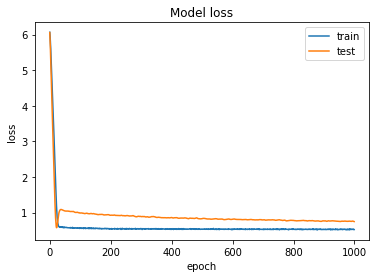

2.1993519309424596
1.4830212172934207
DN- 11  layers; 500 Units; LR- 2e-05 weight_decay- 0
Train on 2562 samples, validate on 641 samples
Epoch 1/1000
2562/2562 [==============================] - 6s 2ms/sample - loss: 5.9029 - mean_squared_error: 42.2536 - val_loss: 5.8648 - val_mean_squared_error: 41.7414
Epoch 2/1000
2562/2562 [==============================] - 1s 402us/sample - loss: 5.7910 - mean_squared_error: 40.8321 - val_loss: 5.6432 - val_mean_squared_error: 38.9730
Epoch 3/1000
2562/2562 [==============================] - 1s 415us/sample - loss: 5.6034 - mean_squared_error: 38.5199 - val_loss: 5.3617 - val_mean_squared_error: 35.6001
Epoch 4/1000
2562/2562 [==============================] - 1s 405us/sample - loss: 5.3944 - mean_squared_error: 36.0170 - val_loss: 5.0486 - val_mean_squared_error: 32.0330
Epoch 5/1000
2562/2562 [==============================] - 1s 397us/sample - loss: 5.1732 - mean_squared_error: 33.4595 - val_loss: 4.7221 - val_mean_squared_error: 28.5248
Epoc

Epoch 48/1000
2562/2562 [==============================] - 1s 403us/sample - loss: 0.5387 - mean_squared_error: 1.3906 - val_loss: 1.0017 - val_mean_squared_error: 3.0866
Epoch 49/1000
2562/2562 [==============================] - 1s 393us/sample - loss: 0.5279 - mean_squared_error: 1.3615 - val_loss: 0.9985 - val_mean_squared_error: 3.0740
Epoch 50/1000
2562/2562 [==============================] - 1s 399us/sample - loss: 0.5231 - mean_squared_error: 1.3493 - val_loss: 0.9949 - val_mean_squared_error: 3.0603
Epoch 51/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 0.5194 - mean_squared_error: 1.3623 - val_loss: 0.9933 - val_mean_squared_error: 3.0539
Epoch 52/1000
2562/2562 [==============================] - 1s 403us/sample - loss: 0.5118 - mean_squared_error: 1.3217 - val_loss: 0.9942 - val_mean_squared_error: 3.0569
Epoch 53/1000
2562/2562 [==============================] - 1s 393us/sample - loss: 0.5225 - mean_squared_error: 1.3596 - val_loss: 0.9929 - val_m

Epoch 96/1000
2562/2562 [==============================] - 1s 402us/sample - loss: 0.5040 - mean_squared_error: 1.2958 - val_loss: 0.9545 - val_mean_squared_error: 2.8983
Epoch 97/1000
2562/2562 [==============================] - 1s 403us/sample - loss: 0.5009 - mean_squared_error: 1.2872 - val_loss: 0.9468 - val_mean_squared_error: 2.8707
Epoch 98/1000
2562/2562 [==============================] - 1s 402us/sample - loss: 0.5089 - mean_squared_error: 1.3096 - val_loss: 0.9423 - val_mean_squared_error: 2.8541
Epoch 99/1000
2562/2562 [==============================] - 1s 439us/sample - loss: 0.5087 - mean_squared_error: 1.3075 - val_loss: 0.9413 - val_mean_squared_error: 2.8504
Epoch 100/1000
2562/2562 [==============================] - 1s 403us/sample - loss: 0.4945 - mean_squared_error: 1.2775 - val_loss: 0.9401 - val_mean_squared_error: 2.8462
Epoch 101/1000
2562/2562 [==============================] - 1s 404us/sample - loss: 0.4991 - mean_squared_error: 1.2900 - val_loss: 0.9409 - val

Epoch 144/1000
2562/2562 [==============================] - 1s 399us/sample - loss: 0.5015 - mean_squared_error: 1.2916 - val_loss: 0.8975 - val_mean_squared_error: 2.6893
Epoch 145/1000
2562/2562 [==============================] - 1s 403us/sample - loss: 0.4927 - mean_squared_error: 1.2661 - val_loss: 0.8953 - val_mean_squared_error: 2.6815
Epoch 146/1000
2562/2562 [==============================] - 1s 398us/sample - loss: 0.4993 - mean_squared_error: 1.2797 - val_loss: 0.8959 - val_mean_squared_error: 2.6836
Epoch 147/1000
2562/2562 [==============================] - 1s 399us/sample - loss: 0.4887 - mean_squared_error: 1.2630 - val_loss: 0.8963 - val_mean_squared_error: 2.6849
Epoch 148/1000
2562/2562 [==============================] - 1s 407us/sample - loss: 0.4985 - mean_squared_error: 1.2818 - val_loss: 0.8980 - val_mean_squared_error: 2.6905
Epoch 149/1000
2562/2562 [==============================] - 1s 391us/sample - loss: 0.4881 - mean_squared_error: 1.2492 - val_loss: 0.8983 -

2562/2562 [==============================] - 1s 436us/sample - loss: 0.4853 - mean_squared_error: 1.2474 - val_loss: 0.8777 - val_mean_squared_error: 2.6166
Epoch 192/1000
2562/2562 [==============================] - 1s 410us/sample - loss: 0.4997 - mean_squared_error: 1.2704 - val_loss: 0.8719 - val_mean_squared_error: 2.5964
Epoch 193/1000
2562/2562 [==============================] - 1s 401us/sample - loss: 0.4878 - mean_squared_error: 1.2370 - val_loss: 0.8672 - val_mean_squared_error: 2.5803
Epoch 194/1000
2562/2562 [==============================] - 1s 394us/sample - loss: 0.4911 - mean_squared_error: 1.2552 - val_loss: 0.8662 - val_mean_squared_error: 2.5767
Epoch 195/1000
2562/2562 [==============================] - 1s 392us/sample - loss: 0.4923 - mean_squared_error: 1.2620 - val_loss: 0.8685 - val_mean_squared_error: 2.5847
Epoch 196/1000
2562/2562 [==============================] - 1s 403us/sample - loss: 0.4899 - mean_squared_error: 1.2405 - val_loss: 0.8716 - val_mean_squar

Epoch 239/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 0.4853 - mean_squared_error: 1.2486 - val_loss: 0.8647 - val_mean_squared_error: 2.5695
Epoch 240/1000
2562/2562 [==============================] - 1s 394us/sample - loss: 0.4836 - mean_squared_error: 1.2402 - val_loss: 0.8651 - val_mean_squared_error: 2.5708
Epoch 241/1000
2562/2562 [==============================] - 1s 392us/sample - loss: 0.4926 - mean_squared_error: 1.2628 - val_loss: 0.8657 - val_mean_squared_error: 2.5730
Epoch 242/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 0.4984 - mean_squared_error: 1.2876 - val_loss: 0.8645 - val_mean_squared_error: 2.5687
Epoch 243/1000
2562/2562 [==============================] - 1s 392us/sample - loss: 0.4912 - mean_squared_error: 1.2625 - val_loss: 0.8635 - val_mean_squared_error: 2.5653
Epoch 244/1000
2562/2562 [==============================] - 1s 398us/sample - loss: 0.4934 - mean_squared_error: 1.2529 - val_loss: 0.8636 -

2562/2562 [==============================] - 1s 403us/sample - loss: 0.4820 - mean_squared_error: 1.2313 - val_loss: 0.8402 - val_mean_squared_error: 2.4838
Epoch 287/1000
2562/2562 [==============================] - 1s 406us/sample - loss: 0.4961 - mean_squared_error: 1.2741 - val_loss: 0.8409 - val_mean_squared_error: 2.4863
Epoch 288/1000
2562/2562 [==============================] - 1s 402us/sample - loss: 0.4854 - mean_squared_error: 1.2423 - val_loss: 0.8419 - val_mean_squared_error: 2.4896
Epoch 289/1000
2562/2562 [==============================] - 1s 398us/sample - loss: 0.4901 - mean_squared_error: 1.2412 - val_loss: 0.8410 - val_mean_squared_error: 2.4866
Epoch 290/1000
2562/2562 [==============================] - 1s 390us/sample - loss: 0.4975 - mean_squared_error: 1.2692 - val_loss: 0.8444 - val_mean_squared_error: 2.4981
Epoch 291/1000
2562/2562 [==============================] - 1s 400us/sample - loss: 0.4831 - mean_squared_error: 1.2408 - val_loss: 0.8475 - val_mean_squar

Epoch 334/1000
2562/2562 [==============================] - 1s 396us/sample - loss: 0.4830 - mean_squared_error: 1.2259 - val_loss: 0.8269 - val_mean_squared_error: 2.4376
Epoch 335/1000
2562/2562 [==============================] - 1s 398us/sample - loss: 0.4897 - mean_squared_error: 1.2700 - val_loss: 0.8264 - val_mean_squared_error: 2.4358
Epoch 336/1000
2562/2562 [==============================] - 1s 394us/sample - loss: 0.4842 - mean_squared_error: 1.2419 - val_loss: 0.8241 - val_mean_squared_error: 2.4281
Epoch 337/1000
2562/2562 [==============================] - 1s 397us/sample - loss: 0.4976 - mean_squared_error: 1.2659 - val_loss: 0.8231 - val_mean_squared_error: 2.4244
Epoch 338/1000
2562/2562 [==============================] - 1s 390us/sample - loss: 0.4818 - mean_squared_error: 1.2243 - val_loss: 0.8229 - val_mean_squared_error: 2.4237
Epoch 339/1000
2562/2562 [==============================] - 1s 397us/sample - loss: 0.4833 - mean_squared_error: 1.2464 - val_loss: 0.8201 -

2562/2562 [==============================] - 1s 403us/sample - loss: 0.4735 - mean_squared_error: 1.2078 - val_loss: 0.8231 - val_mean_squared_error: 2.4238
Epoch 382/1000
2562/2562 [==============================] - 1s 395us/sample - loss: 0.4755 - mean_squared_error: 1.2214 - val_loss: 0.8206 - val_mean_squared_error: 2.4154
Epoch 383/1000
2562/2562 [==============================] - 1s 397us/sample - loss: 0.4807 - mean_squared_error: 1.2245 - val_loss: 0.8171 - val_mean_squared_error: 2.4033
Epoch 384/1000
2562/2562 [==============================] - 1s 398us/sample - loss: 0.4747 - mean_squared_error: 1.2143 - val_loss: 0.8142 - val_mean_squared_error: 2.3936
Epoch 385/1000
2562/2562 [==============================] - 1s 399us/sample - loss: 0.4714 - mean_squared_error: 1.2053 - val_loss: 0.8119 - val_mean_squared_error: 2.3858
Epoch 386/1000
2562/2562 [==============================] - 1s 395us/sample - loss: 0.4803 - mean_squared_error: 1.2282 - val_loss: 0.8083 - val_mean_squar

Epoch 429/1000
2562/2562 [==============================] - 1s 414us/sample - loss: 0.4720 - mean_squared_error: 1.1920 - val_loss: 0.7987 - val_mean_squared_error: 2.3405
Epoch 430/1000
2562/2562 [==============================] - 1s 391us/sample - loss: 0.4810 - mean_squared_error: 1.2339 - val_loss: 0.7993 - val_mean_squared_error: 2.3428
Epoch 431/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 0.4793 - mean_squared_error: 1.2323 - val_loss: 0.8002 - val_mean_squared_error: 2.3455
Epoch 432/1000
2562/2562 [==============================] - 1s 397us/sample - loss: 0.4928 - mean_squared_error: 1.2542 - val_loss: 0.7986 - val_mean_squared_error: 2.3404
Epoch 433/1000
2562/2562 [==============================] - 1s 395us/sample - loss: 0.4850 - mean_squared_error: 1.2368 - val_loss: 0.7972 - val_mean_squared_error: 2.3354
Epoch 434/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 0.4887 - mean_squared_error: 1.2561 - val_loss: 0.7968 -

2562/2562 [==============================] - 1s 398us/sample - loss: 0.4824 - mean_squared_error: 1.2303 - val_loss: 0.7754 - val_mean_squared_error: 2.2618
Epoch 477/1000
2562/2562 [==============================] - 1s 398us/sample - loss: 0.4830 - mean_squared_error: 1.2447 - val_loss: 0.7763 - val_mean_squared_error: 2.2648
Epoch 478/1000
2562/2562 [==============================] - 1s 395us/sample - loss: 0.4757 - mean_squared_error: 1.2135 - val_loss: 0.7778 - val_mean_squared_error: 2.2699
Epoch 479/1000
2562/2562 [==============================] - 1s 393us/sample - loss: 0.4816 - mean_squared_error: 1.2331 - val_loss: 0.7809 - val_mean_squared_error: 2.2801
Epoch 480/1000
2562/2562 [==============================] - 1s 391us/sample - loss: 0.4689 - mean_squared_error: 1.1945 - val_loss: 0.7844 - val_mean_squared_error: 2.2920
Epoch 481/1000
2562/2562 [==============================] - 1s 402us/sample - loss: 0.4756 - mean_squared_error: 1.2082 - val_loss: 0.7850 - val_mean_squar

Epoch 524/1000
2562/2562 [==============================] - 1s 395us/sample - loss: 0.4820 - mean_squared_error: 1.2256 - val_loss: 0.7859 - val_mean_squared_error: 2.2970
Epoch 525/1000
2562/2562 [==============================] - 1s 399us/sample - loss: 0.4775 - mean_squared_error: 1.2235 - val_loss: 0.7846 - val_mean_squared_error: 2.2926
Epoch 526/1000
2562/2562 [==============================] - 1s 397us/sample - loss: 0.4774 - mean_squared_error: 1.2289 - val_loss: 0.7837 - val_mean_squared_error: 2.2894
Epoch 527/1000
2562/2562 [==============================] - 1s 395us/sample - loss: 0.4806 - mean_squared_error: 1.2252 - val_loss: 0.7799 - val_mean_squared_error: 2.2766
Epoch 528/1000
2562/2562 [==============================] - 1s 405us/sample - loss: 0.4699 - mean_squared_error: 1.1913 - val_loss: 0.7775 - val_mean_squared_error: 2.2686
Epoch 529/1000
2562/2562 [==============================] - 1s 391us/sample - loss: 0.4713 - mean_squared_error: 1.2003 - val_loss: 0.7738 -

2562/2562 [==============================] - 1s 400us/sample - loss: 0.4765 - mean_squared_error: 1.2093 - val_loss: 0.7597 - val_mean_squared_error: 2.2084
Epoch 572/1000
2562/2562 [==============================] - 1s 392us/sample - loss: 0.4771 - mean_squared_error: 1.2160 - val_loss: 0.7608 - val_mean_squared_error: 2.2122
Epoch 573/1000
2562/2562 [==============================] - 1s 400us/sample - loss: 0.4769 - mean_squared_error: 1.2183 - val_loss: 0.7626 - val_mean_squared_error: 2.2184
Epoch 574/1000
2562/2562 [==============================] - 1s 399us/sample - loss: 0.4772 - mean_squared_error: 1.2217 - val_loss: 0.7669 - val_mean_squared_error: 2.2326
Epoch 575/1000
2562/2562 [==============================] - 1s 404us/sample - loss: 0.4847 - mean_squared_error: 1.2432 - val_loss: 0.7711 - val_mean_squared_error: 2.2466
Epoch 576/1000
2562/2562 [==============================] - 1s 407us/sample - loss: 0.4858 - mean_squared_error: 1.2413 - val_loss: 0.7734 - val_mean_squar

2562/2562 [==============================] - 1s 413us/sample - loss: 0.4724 - mean_squared_error: 1.1980 - val_loss: 0.7553 - val_mean_squared_error: 2.1936
Epoch 619/1000
2562/2562 [==============================] - 1s 402us/sample - loss: 0.4733 - mean_squared_error: 1.2154 - val_loss: 0.7562 - val_mean_squared_error: 2.1965
Epoch 620/1000
2562/2562 [==============================] - 1s 397us/sample - loss: 0.4775 - mean_squared_error: 1.2218 - val_loss: 0.7572 - val_mean_squared_error: 2.1999
Epoch 621/1000
2562/2562 [==============================] - 1s 408us/sample - loss: 0.4761 - mean_squared_error: 1.2059 - val_loss: 0.7584 - val_mean_squared_error: 2.2041
Epoch 622/1000
2562/2562 [==============================] - 1s 408us/sample - loss: 0.4835 - mean_squared_error: 1.2421 - val_loss: 0.7587 - val_mean_squared_error: 2.2051
Epoch 623/1000
2562/2562 [==============================] - 1s 396us/sample - loss: 0.4766 - mean_squared_error: 1.2192 - val_loss: 0.7581 - val_mean_squar

2562/2562 [==============================] - 1s 394us/sample - loss: 0.4716 - mean_squared_error: 1.1978 - val_loss: 0.7534 - val_mean_squared_error: 2.1873
Epoch 666/1000
2562/2562 [==============================] - 1s 385us/sample - loss: 0.4717 - mean_squared_error: 1.1985 - val_loss: 0.7508 - val_mean_squared_error: 2.1787
Epoch 667/1000
2562/2562 [==============================] - 1s 405us/sample - loss: 0.4801 - mean_squared_error: 1.2320 - val_loss: 0.7501 - val_mean_squared_error: 2.1762
Epoch 668/1000
2562/2562 [==============================] - 1s 413us/sample - loss: 0.4807 - mean_squared_error: 1.2183 - val_loss: 0.7510 - val_mean_squared_error: 2.1791
Epoch 669/1000
2562/2562 [==============================] - 1s 395us/sample - loss: 0.4776 - mean_squared_error: 1.2129 - val_loss: 0.7554 - val_mean_squared_error: 2.1939
Epoch 670/1000
2562/2562 [==============================] - 1s 390us/sample - loss: 0.4708 - mean_squared_error: 1.1933 - val_loss: 0.7586 - val_mean_squar

Epoch 713/1000
2562/2562 [==============================] - 1s 400us/sample - loss: 0.4802 - mean_squared_error: 1.2185 - val_loss: 0.7397 - val_mean_squared_error: 2.1414
Epoch 714/1000
2562/2562 [==============================] - 1s 400us/sample - loss: 0.4681 - mean_squared_error: 1.2008 - val_loss: 0.7408 - val_mean_squared_error: 2.1452
Epoch 715/1000
2562/2562 [==============================] - 1s 398us/sample - loss: 0.4748 - mean_squared_error: 1.2231 - val_loss: 0.7422 - val_mean_squared_error: 2.1495
Epoch 716/1000
2562/2562 [==============================] - 1s 407us/sample - loss: 0.4755 - mean_squared_error: 1.2205 - val_loss: 0.7412 - val_mean_squared_error: 2.1464
Epoch 717/1000
2562/2562 [==============================] - 1s 389us/sample - loss: 0.4776 - mean_squared_error: 1.2270 - val_loss: 0.7425 - val_mean_squared_error: 2.1507
Epoch 718/1000
2562/2562 [==============================] - ETA: 0s - loss: 0.4840 - mean_squared_error: 1.23 - 1s 391us/sample - loss: 0.48

2562/2562 [==============================] - 1s 421us/sample - loss: 0.4805 - mean_squared_error: 1.2269 - val_loss: 0.7437 - val_mean_squared_error: 2.1547
Epoch 761/1000
2562/2562 [==============================] - 1s 411us/sample - loss: 0.4829 - mean_squared_error: 1.2414 - val_loss: 0.7452 - val_mean_squared_error: 2.1596
Epoch 762/1000
2562/2562 [==============================] - ETA: 0s - loss: 0.4727 - mean_squared_error: 1.21 - 1s 416us/sample - loss: 0.4719 - mean_squared_error: 1.2093 - val_loss: 0.7442 - val_mean_squared_error: 2.1564
Epoch 763/1000
2562/2562 [==============================] - 1s 408us/sample - loss: 0.4760 - mean_squared_error: 1.2274 - val_loss: 0.7424 - val_mean_squared_error: 2.1502
Epoch 764/1000
2562/2562 [==============================] - 1s 414us/sample - loss: 0.4780 - mean_squared_error: 1.2268 - val_loss: 0.7374 - val_mean_squared_error: 2.1336
Epoch 765/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 0.4742 - mean_squar

2562/2562 [==============================] - 1s 411us/sample - loss: 0.4761 - mean_squared_error: 1.2202 - val_loss: 0.7279 - val_mean_squared_error: 2.1021
Epoch 808/1000
2562/2562 [==============================] - 1s 431us/sample - loss: 0.4786 - mean_squared_error: 1.2201 - val_loss: 0.7235 - val_mean_squared_error: 2.0875
Epoch 809/1000
2562/2562 [==============================] - 1s 413us/sample - loss: 0.4620 - mean_squared_error: 1.1855 - val_loss: 0.7213 - val_mean_squared_error: 2.0800
Epoch 810/1000
2562/2562 [==============================] - 1s 413us/sample - loss: 0.4700 - mean_squared_error: 1.1997 - val_loss: 0.7192 - val_mean_squared_error: 2.0732
Epoch 811/1000
2562/2562 [==============================] - 1s 409us/sample - loss: 0.4834 - mean_squared_error: 1.2371 - val_loss: 0.7174 - val_mean_squared_error: 2.0671
Epoch 812/1000
2562/2562 [==============================] - 1s 413us/sample - loss: 0.4727 - mean_squared_error: 1.2053 - val_loss: 0.7157 - val_mean_squar

2562/2562 [==============================] - 1s 426us/sample - loss: 0.4646 - mean_squared_error: 1.1854 - val_loss: 0.7224 - val_mean_squared_error: 2.0835
Epoch 855/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 0.4752 - mean_squared_error: 1.2069 - val_loss: 0.7227 - val_mean_squared_error: 2.0845
Epoch 856/1000
2562/2562 [==============================] - ETA: 0s - loss: 0.4769 - mean_squared_error: 1.20 - 1s 431us/sample - loss: 0.4785 - mean_squared_error: 1.2079 - val_loss: 0.7223 - val_mean_squared_error: 2.0834
Epoch 857/1000
2562/2562 [==============================] - 1s 453us/sample - loss: 0.4766 - mean_squared_error: 1.2172 - val_loss: 0.7215 - val_mean_squared_error: 2.0808
Epoch 858/1000
2562/2562 [==============================] - 1s 495us/sample - loss: 0.4778 - mean_squared_error: 1.2291 - val_loss: 0.7211 - val_mean_squared_error: 2.0794
Epoch 859/1000
2562/2562 [==============================] - 1s 434us/sample - loss: 0.4742 - mean_squar

2562/2562 [==============================] - 1s 446us/sample - loss: 0.4780 - mean_squared_error: 1.2188 - val_loss: 0.7161 - val_mean_squared_error: 2.0628
Epoch 902/1000
2562/2562 [==============================] - 1s 453us/sample - loss: 0.4681 - mean_squared_error: 1.1861 - val_loss: 0.7143 - val_mean_squared_error: 2.0567
Epoch 903/1000
2562/2562 [==============================] - 1s 436us/sample - loss: 0.4727 - mean_squared_error: 1.2130 - val_loss: 0.7151 - val_mean_squared_error: 2.0595
Epoch 904/1000
2562/2562 [==============================] - 1s 420us/sample - loss: 0.4742 - mean_squared_error: 1.2102 - val_loss: 0.7166 - val_mean_squared_error: 2.0643
Epoch 905/1000
2562/2562 [==============================] - 1s 433us/sample - loss: 0.4662 - mean_squared_error: 1.1901 - val_loss: 0.7173 - val_mean_squared_error: 2.0666
Epoch 906/1000
2562/2562 [==============================] - 1s 438us/sample - loss: 0.4645 - mean_squared_error: 1.1837 - val_loss: 0.7170 - val_mean_squar

2562/2562 [==============================] - 1s 420us/sample - loss: 0.4814 - mean_squared_error: 1.2229 - val_loss: 0.7039 - val_mean_squared_error: 2.0222
Epoch 947/1000
2562/2562 [==============================] - 1s 414us/sample - loss: 0.4754 - mean_squared_error: 1.2181 - val_loss: 0.7054 - val_mean_squared_error: 2.0272
Epoch 948/1000
2562/2562 [==============================] - 1s 421us/sample - loss: 0.4659 - mean_squared_error: 1.1794 - val_loss: 0.7059 - val_mean_squared_error: 2.0288
Epoch 949/1000
2562/2562 [==============================] - 1s 420us/sample - loss: 0.4633 - mean_squared_error: 1.1834 - val_loss: 0.7071 - val_mean_squared_error: 2.0330
Epoch 950/1000
2562/2562 [==============================] - 1s 429us/sample - loss: 0.4610 - mean_squared_error: 1.1703 - val_loss: 0.7073 - val_mean_squared_error: 2.0335
Epoch 951/1000
2562/2562 [==============================] - 1s 425us/sample - loss: 0.4631 - mean_squared_error: 1.1841 - val_loss: 0.7059 - val_mean_squar

2562/2562 [==============================] - 1s 421us/sample - loss: 0.4750 - mean_squared_error: 1.2183 - val_loss: 0.7015 - val_mean_squared_error: 2.0142
Epoch 994/1000
2562/2562 [==============================] - 1s 415us/sample - loss: 0.4720 - mean_squared_error: 1.2122 - val_loss: 0.7036 - val_mean_squared_error: 2.0212
Epoch 995/1000
2562/2562 [==============================] - 1s 418us/sample - loss: 0.4719 - mean_squared_error: 1.2117 - val_loss: 0.7036 - val_mean_squared_error: 2.0211
Epoch 996/1000
2562/2562 [==============================] - 1s 422us/sample - loss: 0.4647 - mean_squared_error: 1.1880 - val_loss: 0.7009 - val_mean_squared_error: 2.0123
Epoch 997/1000
2562/2562 [==============================] - 1s 430us/sample - loss: 0.4787 - mean_squared_error: 1.2112 - val_loss: 0.6962 - val_mean_squared_error: 1.9968
Epoch 998/1000
2562/2562 [==============================] - 1s 416us/sample - loss: 0.4666 - mean_squared_error: 1.1915 - val_loss: 0.6926 - val_mean_squar

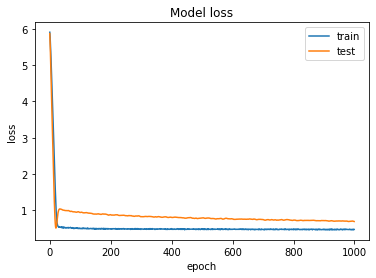

2.2021972675429744
1.483980211304374


In [18]:
#run for 5 hr overnight

layer_list = [8,9,10,11]
units_list = [300,500] #[100, 200, 300, 500]
init_learning_rate_list= [0.05,2e-5] #you can add more lr options when run on GPU
weight_decay_list=[0.00001, 0]
activation_func_list = ['relu'] #, 'tanh'

mse_deep = pd.DataFrame({"layer":"layer",
                         "units":"units",
                         "learning_rate":"learning_rate",
                         "weight_decay":"weight_decay",
                         "mse_score":"mse_score",
                         "rmse_score":"rmse_score"},index=[0])
i = 0

for layer in layer_list:
    for units in units_list:
        for learning_rate in init_learning_rate_list:
            for activation_func in activation_func_list:
                for weight_decay in weight_decay_list:
                    print("DN-",layer," layers;", units,'Units;',"LR-",learning_rate,"weight_decay-", weight_decay)  #,"activation_func-", activation_func
                    model = tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=layer, units=units,learning_rate=learning_rate,weight_decay=weight_decay)
                    y_pred_keras = model.predict(X_test_holdout)
                    mse_score=metrics.mean_squared_error(np.array(y_test_holdout), np.array(y_pred_keras))
                    print(mse_score)
                    rmse_score=math.sqrt(mse_score)
                    print(rmse_score)
                    mse_deep.loc[i]=[layer,units, learning_rate, weight_decay, mse_score, rmse_score]
                    i+=1

In [19]:
mse_deep

layer units learning_rate weight_decay mse_score rmse_score
0      8   300          0.05        1e-05    1.5552    1.24708
1      8   300          0.05            0    13.532    3.67859
2      8   300         2e-05        1e-05   1.88904    1.37442
3      8   300         2e-05            0   1.85531     1.3621
4      8   500          0.05        1e-05   137.774    11.7377
5      8   500          0.05            0   202.132    14.2173
6      8   500         2e-05        1e-05     2.004    1.41563
7      8   500         2e-05            0   2.12648    1.45825
8      9   300          0.05        1e-05   1.40082    1.18356
9      9   300          0.05            0   1.39606    1.18155
10     9   300         2e-05        1e-05    1.9101    1.38206
11     9   300         2e-05            0   1.86405     1.3653
12     9   500          0.05        1e-05   947.556    30.7824
13     9   500          0.05            0   113.737    10.6647
14     9   500         2e-05        1e-05   2.10081    1.44942
15     9   500         2e-05            0   2.06796    1.43804
16    10   300          0.05        1e-05   119.392    10.9267
17    10   300          0.05            0   12.9626    3.60036
18    10   300         2e-05        1e-05   1.96788    1.40281
19    10   300         2e-05            0   2.00948    1.41756
20    10   500          0.05        1e-05   992.923    31.5107
21    10   500          0.05            0   182.712    13.5171
22    10   500         2e-05        1e-05    2.0948    1.44734
23    10   500         2e-05            0   2.17722    1.47554
24    11   300          0.05        1e-05   1.29036    1.13594
25    11   300          0.05            0   153.763    12.4001
26    11   300         2e-05        1e-05   2.06576    1.43728
27    11   300         2e-05            0   2.05495    1.43351
28    11   500          0.05        1e-05   489.626    22.1275
29    11   500          0.05            0   154.037    12.4111
30    11   500         2e-05        1e-05   2.19935    1.48302
31    11   500         2e-05            0    2.2022    1.48398

Train on 2562 samples, validate on 641 samples
Epoch 1/100
2562/2562 [==============================] - 6s 2ms/sample - loss: 6.0810 - mean_squared_error: 44.5581 - val_loss: 6.1125 - val_mean_squared_error: 44.8892
Epoch 2/100
2562/2562 [==============================] - 1s 278us/sample - loss: 6.0470 - mean_squared_error: 44.0739 - val_loss: 5.9952 - val_mean_squared_error: 43.3572
Epoch 3/100
2562/2562 [==============================] - 1s 286us/sample - loss: 5.9195 - mean_squared_error: 42.4260 - val_loss: 5.8122 - val_mean_squared_error: 41.0320
Epoch 4/100
2562/2562 [==============================] - 1s 294us/sample - loss: 5.7824 - mean_squared_error: 40.6904 - val_loss: 5.6287 - val_mean_squared_error: 38.7677
Epoch 5/100
2562/2562 [==============================] - 1s 297us/sample - loss: 5.6253 - mean_squared_error: 38.7580 - val_loss: 5.4494 - val_mean_squared_error: 36.6080
Epoch 6/100
2562/2562 [==============================] - 1s 294us/sample - loss: 5.4723 - mean_squar

Epoch 49/100
2562/2562 [==============================] - 1s 285us/sample - loss: 0.5501 - mean_squared_error: 1.4311 - val_loss: 0.7017 - val_mean_squared_error: 2.0129
Epoch 50/100
2562/2562 [==============================] - 1s 282us/sample - loss: 0.5469 - mean_squared_error: 1.4271 - val_loss: 0.7121 - val_mean_squared_error: 2.0501
Epoch 51/100
2562/2562 [==============================] - 1s 288us/sample - loss: 0.5505 - mean_squared_error: 1.4164 - val_loss: 0.7204 - val_mean_squared_error: 2.0797
Epoch 52/100
2562/2562 [==============================] - 1s 284us/sample - loss: 0.5522 - mean_squared_error: 1.4410 - val_loss: 0.7278 - val_mean_squared_error: 2.1062
Epoch 53/100
2562/2562 [==============================] - 1s 281us/sample - loss: 0.5545 - mean_squared_error: 1.4454 - val_loss: 0.7346 - val_mean_squared_error: 2.1307
Epoch 54/100
2562/2562 [==============================] - 1s 298us/sample - loss: 0.5465 - mean_squared_error: 1.4151 - val_loss: 0.7392 - val_mean_sq

2562/2562 [==============================] - 1s 303us/sample - loss: 0.5249 - mean_squared_error: 1.3599 - val_loss: 0.7237 - val_mean_squared_error: 2.0977
Epoch 98/100
2562/2562 [==============================] - 1s 287us/sample - loss: 0.5235 - mean_squared_error: 1.3731 - val_loss: 0.7219 - val_mean_squared_error: 2.0915
Epoch 99/100
2562/2562 [==============================] - 1s 294us/sample - loss: 0.5203 - mean_squared_error: 1.3506 - val_loss: 0.7226 - val_mean_squared_error: 2.0941
Epoch 100/100
2562/2562 [==============================] - 1s 293us/sample - loss: 0.5339 - mean_squared_error: 1.3881 - val_loss: 0.7243 - val_mean_squared_error: 2.0999


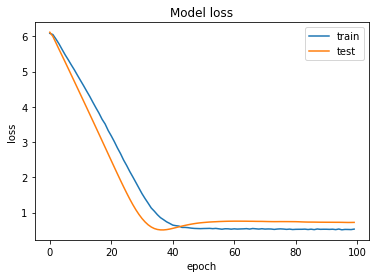

In [22]:
tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=8, units=300,learning_rate=2e-05,weight_decay=0,epochs=100)

Train on 2562 samples, validate on 641 samples
Epoch 1/37
2562/2562 [==============================] - 6s 2ms/sample - loss: 5.6579 - mean_squared_error: 39.1160 - val_loss: 5.5817 - val_mean_squared_error: 38.1327
Epoch 2/37
2562/2562 [==============================] - 1s 288us/sample - loss: 5.5796 - mean_squared_error: 38.1604 - val_loss: 5.4751 - val_mean_squared_error: 36.8522
Epoch 3/37
2562/2562 [==============================] - 1s 291us/sample - loss: 5.5113 - mean_squared_error: 37.3217 - val_loss: 5.3379 - val_mean_squared_error: 35.2391
Epoch 4/37
2562/2562 [==============================] - 1s 302us/sample - loss: 5.3969 - mean_squared_error: 35.9571 - val_loss: 5.1841 - val_mean_squared_error: 33.4762
Epoch 5/37
2562/2562 [==============================] - 1s 296us/sample - loss: 5.2594 - mean_squared_error: 34.3914 - val_loss: 5.0212 - val_mean_squared_error: 31.6610
Epoch 6/37
2562/2562 [==============================] - 1s 331us/sample - loss: 5.1260 - mean_squared_err

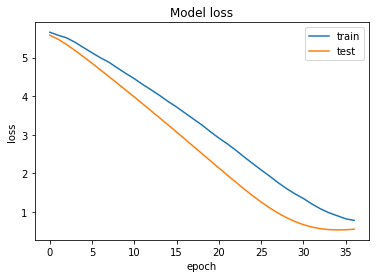

In [23]:
model =tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=8, units=300,learning_rate=2e-05,weight_decay=0,epochs=37)

In [24]:
y_pred_keras = model.predict(X_test_holdout)
mse_score=metrics.mean_squared_error(np.array(y_test_holdout), np.array(y_pred_keras))
print(mse_score)
rmse_score=math.sqrt(mse_score)
print(rmse_score)

1.5806914940484713
1.25725554047237
